# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 39875 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (    0 of 39875) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 39875) |              | Elapsed Time: 0:00:26 ETA: 1 day, 8:52:47

  0% (   25 of 39875) |                    | Elapsed Time: 0:00:26 ETA: 11:55:36

  0% (   42 of 39875) |                     | Elapsed Time: 0:00:27 ETA: 7:09:11

  0% (   59 of 39875) |                     | Elapsed Time: 0:00:27 ETA: 5:07:50

  0% (   76 of 39875) |                     | Elapsed Time: 0:00:27 ETA: 0:08:35

  0% (   93 of 39875) |                     | Elapsed Time: 0:00:27 ETA: 0:08:29

  0% (  111 of 39875) |                     | Elapsed Time: 0:00:28 ETA: 0:08:21

  0% (  127 of 39875) |                     | Elapsed Time: 0:00:28 ETA: 0:08:23

  0% (  143 of 39875) |                     | Elapsed Time: 0:00:28 ETA: 0:08:20

  0% (  159 of 39875) |                     | Elapsed Time: 0:00:28 ETA: 0:08:24

  0% (  175 of 39875) |                     | Elapsed Time: 0:00:28 ETA: 0:08:33

  0% (  191 of 39875) |                     | Elapsed Time: 0:00:29 ETA: 0:08:34

  0% (  202 of 39875) |                     | Elapsed Time: 0:00:29 ETA: 0:15:37

  0% (  219 of 39875) |                     | Elapsed Time: 0:00:30 ETA: 0:15:27

  0% (  235 of 39875) |                     | Elapsed Time: 0:00:30 ETA: 0:15:26

  0% (  253 of 39875) |                     | Elapsed Time: 0:00:30 ETA: 0:15:07

  0% (  270 of 39875) |                     | Elapsed Time: 0:00:30 ETA: 0:08:24

  0% (  286 of 39875) |                     | Elapsed Time: 0:00:30 ETA: 0:08:24

  0% (  302 of 39875) |                     | Elapsed Time: 0:00:31 ETA: 0:08:27

  0% (  320 of 39875) |                     | Elapsed Time: 0:00:31 ETA: 0:08:26

  0% (  336 of 39875) |                     | Elapsed Time: 0:00:31 ETA: 0:08:29

  0% (  353 of 39875) |                     | Elapsed Time: 0:00:31 ETA: 0:08:26

  0% (  370 of 39875) |                     | Elapsed Time: 0:00:32 ETA: 0:08:21

  0% (  386 of 39875) |                     | Elapsed Time: 0:00:32 ETA: 0:08:22

  1% (  402 of 39875) |                     | Elapsed Time: 0:00:32 ETA: 0:08:23

  1% (  419 of 39875) |                     | Elapsed Time: 0:00:32 ETA: 0:08:23

  1% (  435 of 39875) |                     | Elapsed Time: 0:00:32 ETA: 0:08:23

  1% (  452 of 39875) |                     | Elapsed Time: 0:00:33 ETA: 0:08:20

  1% (  469 of 39875) |                     | Elapsed Time: 0:00:33 ETA: 0:08:16

  1% (  485 of 39875) |                     | Elapsed Time: 0:00:33 ETA: 0:08:19

  1% (  507 of 39875) |                     | Elapsed Time: 0:00:33 ETA: 0:08:19

  1% (  524 of 39875) |                     | Elapsed Time: 0:00:34 ETA: 0:08:18

  1% (  540 of 39875) |                     | Elapsed Time: 0:00:34 ETA: 0:08:20

  1% (  556 of 39875) |                     | Elapsed Time: 0:00:34 ETA: 0:08:25

  1% (  572 of 39875) |                     | Elapsed Time: 0:00:34 ETA: 0:08:27

  1% (  587 of 39875) |                     | Elapsed Time: 0:00:34 ETA: 0:08:34

  1% (  604 of 39875) |                     | Elapsed Time: 0:00:35 ETA: 0:08:36

  1% (  620 of 39875) |                     | Elapsed Time: 0:00:35 ETA: 0:08:34

  1% (  636 of 39875) |                     | Elapsed Time: 0:00:35 ETA: 0:08:34

  1% (  652 of 39875) |                     | Elapsed Time: 0:00:35 ETA: 0:08:37

  1% (  668 of 39875) |                     | Elapsed Time: 0:00:35 ETA: 0:08:30

  1% (  684 of 39875) |                     | Elapsed Time: 0:00:36 ETA: 0:08:32

  1% (  701 of 39875) |                     | Elapsed Time: 0:00:36 ETA: 0:08:25

  1% (  717 of 39875) |                     | Elapsed Time: 0:00:36 ETA: 0:08:24

  1% (  734 of 39875) |                     | Elapsed Time: 0:00:36 ETA: 0:08:17

  1% (  750 of 39875) |                     | Elapsed Time: 0:00:36 ETA: 0:08:23

  1% (  766 of 39875) |                     | Elapsed Time: 0:00:37 ETA: 0:08:22

  1% (  782 of 39875) |                     | Elapsed Time: 0:00:37 ETA: 0:08:27

  2% (  798 of 39875) |                     | Elapsed Time: 0:00:37 ETA: 0:08:32

  2% (  814 of 39875) |                     | Elapsed Time: 0:00:37 ETA: 0:08:28

  2% (  830 of 39875) |                     | Elapsed Time: 0:00:37 ETA: 0:08:30

  2% (  846 of 39875) |                     | Elapsed Time: 0:00:38 ETA: 0:08:28

  2% (  862 of 39875) |                     | Elapsed Time: 0:00:38 ETA: 0:08:26

  2% (  878 of 39875) |                     | Elapsed Time: 0:00:38 ETA: 0:08:24

  2% (  894 of 39875) |                     | Elapsed Time: 0:00:38 ETA: 0:08:21

  2% (  910 of 39875) |                     | Elapsed Time: 0:00:39 ETA: 0:08:25

  2% (  926 of 39875) |                     | Elapsed Time: 0:00:39 ETA: 0:08:29

  2% (  942 of 39875) |                     | Elapsed Time: 0:00:39 ETA: 0:08:31

  2% (  958 of 39875) |                     | Elapsed Time: 0:00:39 ETA: 0:08:31

  2% (  976 of 39875) |                     | Elapsed Time: 0:00:39 ETA: 0:08:20

  2% (  997 of 39875) |                     | Elapsed Time: 0:00:40 ETA: 0:08:11

  2% ( 1014 of 39875) |                     | Elapsed Time: 0:00:40 ETA: 0:08:05

  2% ( 1032 of 39875) |                     | Elapsed Time: 0:00:40 ETA: 0:07:56

  2% ( 1049 of 39875) |                     | Elapsed Time: 0:00:40 ETA: 0:07:59

  2% ( 1066 of 39875) |                     | Elapsed Time: 0:00:41 ETA: 0:08:01

  2% ( 1084 of 39875) |                     | Elapsed Time: 0:00:41 ETA: 0:07:57

  2% ( 1102 of 39875) |                     | Elapsed Time: 0:00:41 ETA: 0:07:57

  2% ( 1120 of 39875) |                     | Elapsed Time: 0:00:41 ETA: 0:07:53

  2% ( 1137 of 39875) |                     | Elapsed Time: 0:00:41 ETA: 0:07:50

  2% ( 1154 of 39875) |                     | Elapsed Time: 0:00:42 ETA: 0:07:54

  2% ( 1172 of 39875) |                     | Elapsed Time: 0:00:42 ETA: 0:07:54

  2% ( 1190 of 39875) |                     | Elapsed Time: 0:00:42 ETA: 0:07:53

  3% ( 1208 of 39875) |                     | Elapsed Time: 0:00:42 ETA: 0:07:51

  3% ( 1225 of 39875) |                     | Elapsed Time: 0:00:42 ETA: 0:07:49

  3% ( 1242 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 0:07:52

  3% ( 1259 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 0:07:58

  3% ( 1277 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 0:07:59

  3% ( 1295 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 0:07:58

  3% ( 1312 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:07:57

  3% ( 1330 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:07:52

  3% ( 1347 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:07:56

  3% ( 1364 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:07:58

  3% ( 1382 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:07:53

  3% ( 1400 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:07:54

  3% ( 1418 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:07:51

  3% ( 1434 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:07:51

  3% ( 1451 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:07:52

  3% ( 1467 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:07:56

  3% ( 1484 of 39875) |                     | Elapsed Time: 0:00:46 ETA: 0:08:00

  3% ( 1505 of 39875) |                     | Elapsed Time: 0:00:46 ETA: 0:07:56

  3% ( 1522 of 39875) |                     | Elapsed Time: 0:00:46 ETA: 0:08:00

  3% ( 1540 of 39875) |                     | Elapsed Time: 0:00:46 ETA: 0:07:56

  3% ( 1558 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:07:52

  3% ( 1576 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:07:50

  3% ( 1594 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:07:49

  4% ( 1610 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:07:50

  4% ( 1626 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:07:55

  4% ( 1644 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:07:53

  4% ( 1661 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:07:57

  4% ( 1679 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:07:54

  4% ( 1697 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:07:47

  4% ( 1714 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:07:51

  4% ( 1730 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:07:55

  4% ( 1746 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:08:01

  4% ( 1763 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:08:03

  4% ( 1779 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:08:07

  4% ( 1795 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:08:08

  4% ( 1811 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:08:06

  4% ( 1828 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:08:11

  4% ( 1844 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:08:16

  4% ( 1861 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:08:08

  4% ( 1879 of 39875) |                     | Elapsed Time: 0:00:51 ETA: 0:08:04

  4% ( 1896 of 39875) |                     | Elapsed Time: 0:00:51 ETA: 0:08:03

  4% ( 1912 of 39875) |#                    | Elapsed Time: 0:00:51 ETA: 0:07:57

  4% ( 1929 of 39875) |#                    | Elapsed Time: 0:00:51 ETA: 0:07:51

  4% ( 1945 of 39875) |#                    | Elapsed Time: 0:00:51 ETA: 0:07:57

  4% ( 1963 of 39875) |#                    | Elapsed Time: 0:00:52 ETA: 0:07:58

  4% ( 1979 of 39875) |#                    | Elapsed Time: 0:00:52 ETA: 0:07:59

  5% ( 2002 of 39875) |#                    | Elapsed Time: 0:00:52 ETA: 0:08:03

  5% ( 2019 of 39875) |#                    | Elapsed Time: 0:00:52 ETA: 0:08:00

  5% ( 2037 of 39875) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:58

  5% ( 2055 of 39875) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:53

  5% ( 2073 of 39875) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:50

  5% ( 2091 of 39875) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:38

  5% ( 2107 of 39875) |#                    | Elapsed Time: 0:00:53 ETA: 0:07:51

  5% ( 2124 of 39875) |#                    | Elapsed Time: 0:00:54 ETA: 0:07:53

  5% ( 2140 of 39875) |#                    | Elapsed Time: 0:00:54 ETA: 0:07:59

  5% ( 2157 of 39875) |#                    | Elapsed Time: 0:00:54 ETA: 0:08:03

  5% ( 2182 of 39875) |#                    | Elapsed Time: 0:00:54 ETA: 0:07:51

  5% ( 2200 of 39875) |#                    | Elapsed Time: 0:00:55 ETA: 0:07:47

  5% ( 2216 of 39875) |#                    | Elapsed Time: 0:00:55 ETA: 0:07:45

  5% ( 2232 of 39875) |#                    | Elapsed Time: 0:00:55 ETA: 0:07:50

  5% ( 2245 of 39875) |#                    | Elapsed Time: 0:00:55 ETA: 0:08:22

  5% ( 2261 of 39875) |#                    | Elapsed Time: 0:00:55 ETA: 0:08:26

  5% ( 2277 of 39875) |#                    | Elapsed Time: 0:00:56 ETA: 0:08:35

  5% ( 2293 of 39875) |#                    | Elapsed Time: 0:00:56 ETA: 0:08:39

  5% ( 2310 of 39875) |#                    | Elapsed Time: 0:00:56 ETA: 0:08:05

  5% ( 2328 of 39875) |#                    | Elapsed Time: 0:00:56 ETA: 0:07:55

  5% ( 2344 of 39875) |#                    | Elapsed Time: 0:00:57 ETA: 0:07:54

  5% ( 2361 of 39875) |#                    | Elapsed Time: 0:00:57 ETA: 0:07:49

  5% ( 2377 of 39875) |#                    | Elapsed Time: 0:00:57 ETA: 0:07:46

  6% ( 2394 of 39875) |#                    | Elapsed Time: 0:00:57 ETA: 0:07:51

  6% ( 2410 of 39875) |#                    | Elapsed Time: 0:00:57 ETA: 0:07:56

  6% ( 2426 of 39875) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:01

  6% ( 2443 of 39875) |#                    | Elapsed Time: 0:00:58 ETA: 0:08:00

  6% ( 2461 of 39875) |#                    | Elapsed Time: 0:00:58 ETA: 0:07:50

  6% ( 2479 of 39875) |#                    | Elapsed Time: 0:00:58 ETA: 0:07:43

  6% ( 2502 of 39875) |#                    | Elapsed Time: 0:00:58 ETA: 0:07:30

  6% ( 2519 of 39875) |#                    | Elapsed Time: 0:00:59 ETA: 0:07:27

  6% ( 2537 of 39875) |#                    | Elapsed Time: 0:00:59 ETA: 0:07:29

  6% ( 2555 of 39875) |#                    | Elapsed Time: 0:00:59 ETA: 0:07:35

  6% ( 2573 of 39875) |#                    | Elapsed Time: 0:00:59 ETA: 0:07:39

  6% ( 2589 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:07:42

  6% ( 2605 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:07:53

  6% ( 2623 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:07:49

  6% ( 2641 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:07:42

  6% ( 2659 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:07:35

  6% ( 2677 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:07:20

  6% ( 2695 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:07:13

  6% ( 2713 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:07:14

  6% ( 2731 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:07:12

  6% ( 2749 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:07:13

  6% ( 2767 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:07:12

  6% ( 2785 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:07:12

  7% ( 2803 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:07:11

  7% ( 2821 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:07:10

  7% ( 2838 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:07:14

  7% ( 2856 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:07:14

  7% ( 2874 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:07:14

  7% ( 2892 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:07:19

  7% ( 2908 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:07:24

  7% ( 2923 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:07:41

  7% ( 2939 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:07:52

  7% ( 2955 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:08:02

  7% ( 2971 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:08:00

  7% ( 2991 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:07:52

  7% ( 3007 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:07:52

  7% ( 3022 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:07:56

  7% ( 3036 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:08:10

  7% ( 3050 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:08:26

  7% ( 3063 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:08:54

  7% ( 3077 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:09:14

  7% ( 3091 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:09:15

  7% ( 3105 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:09:15

  7% ( 3119 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:09:14

  7% ( 3133 of 39875) |#                    | Elapsed Time: 0:01:07 ETA: 0:09:10

  7% ( 3147 of 39875) |#                    | Elapsed Time: 0:01:07 ETA: 0:09:10

  7% ( 3161 of 39875) |#                    | Elapsed Time: 0:01:07 ETA: 0:09:09

  7% ( 3171 of 39875) |#                    | Elapsed Time: 0:01:08 ETA: 0:19:04

  7% ( 3185 of 39875) |#                    | Elapsed Time: 0:01:08 ETA: 0:19:03

  8% ( 3199 of 39875) |#                    | Elapsed Time: 0:01:08 ETA: 0:19:10

  8% ( 3213 of 39875) |#                    | Elapsed Time: 0:01:09 ETA: 0:19:13

  8% ( 3227 of 39875) |#                    | Elapsed Time: 0:01:09 ETA: 0:09:23

  8% ( 3241 of 39875) |#                    | Elapsed Time: 0:01:09 ETA: 0:09:22

  8% ( 3255 of 39875) |#                    | Elapsed Time: 0:01:09 ETA: 0:09:22

  8% ( 3269 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:23

  8% ( 3283 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:20

  8% ( 3297 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:24

  8% ( 3311 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:26

  8% ( 3325 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:16

  8% ( 3338 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:09:29

  8% ( 3352 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:09:23

  8% ( 3366 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:09:15

  8% ( 3380 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:09:18

  8% ( 3393 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:09:28

  8% ( 3409 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:09:08

  8% ( 3424 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:09:03

  8% ( 3439 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:50

  8% ( 3456 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:25

  8% ( 3472 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:08:17

  8% ( 3490 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:08:06

  8% ( 3505 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:08:00

  8% ( 3521 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:08:06

  8% ( 3537 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:07:59

  8% ( 3554 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:54

  8% ( 3571 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:49

  8% ( 3587 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:37

  9% ( 3603 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:38

  9% ( 3619 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:07:44

  9% ( 3635 of 39875) |#                    | Elapsed Time: 0:01:15 ETA: 0:07:58

  9% ( 3650 of 39875) |#                    | Elapsed Time: 0:01:15 ETA: 0:08:08

  9% ( 3667 of 39875) |#                    | Elapsed Time: 0:01:15 ETA: 0:08:05

  9% ( 3683 of 39875) |#                    | Elapsed Time: 0:01:15 ETA: 0:08:00

  9% ( 3700 of 39875) |#                    | Elapsed Time: 0:01:16 ETA: 0:07:56

  9% ( 3716 of 39875) |#                    | Elapsed Time: 0:01:16 ETA: 0:07:43

  9% ( 3733 of 39875) |#                    | Elapsed Time: 0:01:16 ETA: 0:07:43

  9% ( 3749 of 39875) |#                    | Elapsed Time: 0:01:16 ETA: 0:07:46

  9% ( 3765 of 39875) |#                    | Elapsed Time: 0:01:16 ETA: 0:07:45

  9% ( 3780 of 39875) |#                    | Elapsed Time: 0:01:17 ETA: 0:07:52

  9% ( 3797 of 39875) |#                    | Elapsed Time: 0:01:17 ETA: 0:07:54

  9% ( 3813 of 39875) |##                   | Elapsed Time: 0:01:17 ETA: 0:07:51

  9% ( 3829 of 39875) |##                   | Elapsed Time: 0:01:17 ETA: 0:07:49

  9% ( 3845 of 39875) |##                   | Elapsed Time: 0:01:17 ETA: 0:07:52

  9% ( 3861 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:07:43

  9% ( 3877 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:07:46

  9% ( 3893 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:07:45

  9% ( 3910 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:07:43

  9% ( 3927 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:07:37

  9% ( 3943 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:07:40

  9% ( 3961 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:07:34

  9% ( 3978 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:07:32

 10% ( 3996 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:07:29

 10% ( 4014 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:07:21

 10% ( 4030 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:07:24

 10% ( 4047 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:07:24

 10% ( 4063 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:07:29

 10% ( 4079 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:07:35

 10% ( 4095 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:07:36

 10% ( 4111 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:07:39

 10% ( 4127 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:07:38

 10% ( 4143 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:07:38

 10% ( 4159 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:07:37

 10% ( 4176 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:07:37

 10% ( 4192 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:07:38

 10% ( 4208 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:07:40

 10% ( 4224 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:07:40

 10% ( 4239 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:07:46

 10% ( 4255 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:00

 10% ( 4272 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:07:59

 10% ( 4287 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:06

 10% ( 4303 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:08:14

 10% ( 4321 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:07:51

 10% ( 4339 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:07:31

 10% ( 4357 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:07:24

 10% ( 4375 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:07:05

 11% ( 4392 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:06:59

 11% ( 4409 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:07:07

 11% ( 4426 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:07:13

 11% ( 4439 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:07:42

 11% ( 4454 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:08:03

 11% ( 4470 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:08:13

 11% ( 4486 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:27

 11% ( 4500 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:26

 11% ( 4515 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:24

 11% ( 4530 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:08:26

 11% ( 4544 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:08:28

 11% ( 4560 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:08:17

 11% ( 4576 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:08:06

 11% ( 4592 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:07:59

 11% ( 4608 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:07:48

 11% ( 4624 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:07:42

 11% ( 4640 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:07:42

 11% ( 4654 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:07:55

 11% ( 4668 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:08:15

 11% ( 4684 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:08:16

 11% ( 4700 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:08:17

 11% ( 4716 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:08:14

 11% ( 4732 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:07:50

 11% ( 4747 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:07:49

 11% ( 4764 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:07:45

 11% ( 4782 of 39875) |##                   | Elapsed Time: 0:01:30 ETA: 0:07:38

 12% ( 4798 of 39875) |##                   | Elapsed Time: 0:01:30 ETA: 0:07:35

 12% ( 4814 of 39875) |##                   | Elapsed Time: 0:01:30 ETA: 0:07:30

 12% ( 4830 of 39875) |##                   | Elapsed Time: 0:01:30 ETA: 0:07:30

 12% ( 4846 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:07:43

 12% ( 4862 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:07:53

 12% ( 4878 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:07:59

 12% ( 4894 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:08:01

 12% ( 4910 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:07:59

 12% ( 4926 of 39875) |##                   | Elapsed Time: 0:01:32 ETA: 0:07:58

 12% ( 4942 of 39875) |##                   | Elapsed Time: 0:01:32 ETA: 0:07:58

 12% ( 4958 of 39875) |##                   | Elapsed Time: 0:01:32 ETA: 0:07:56

 12% ( 4974 of 39875) |##                   | Elapsed Time: 0:01:32 ETA: 0:07:53

 12% ( 4993 of 39875) |##                   | Elapsed Time: 0:01:33 ETA: 0:07:54

 12% ( 5007 of 39875) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:04

 12% ( 5023 of 39875) |##                   | Elapsed Time: 0:01:33 ETA: 0:08:02

 12% ( 5041 of 39875) |##                   | Elapsed Time: 0:01:33 ETA: 0:07:50

 12% ( 5059 of 39875) |##                   | Elapsed Time: 0:01:33 ETA: 0:07:33

 12% ( 5077 of 39875) |##                   | Elapsed Time: 0:01:34 ETA: 0:07:20

 12% ( 5094 of 39875) |##                   | Elapsed Time: 0:01:34 ETA: 0:07:00

 12% ( 5112 of 39875) |##                   | Elapsed Time: 0:01:34 ETA: 0:07:00

 12% ( 5130 of 39875) |##                   | Elapsed Time: 0:01:34 ETA: 0:07:02

 12% ( 5145 of 39875) |##                   | Elapsed Time: 0:01:35 ETA: 0:07:18

 12% ( 5160 of 39875) |##                   | Elapsed Time: 0:01:35 ETA: 0:07:28

 12% ( 5176 of 39875) |##                   | Elapsed Time: 0:01:35 ETA: 0:07:41

 13% ( 5192 of 39875) |##                   | Elapsed Time: 0:01:35 ETA: 0:07:54

 13% ( 5207 of 39875) |##                   | Elapsed Time: 0:01:35 ETA: 0:08:09

 13% ( 5222 of 39875) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:01

 13% ( 5238 of 39875) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:02

 13% ( 5254 of 39875) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:02

 13% ( 5270 of 39875) |##                   | Elapsed Time: 0:01:36 ETA: 0:08:01

 13% ( 5286 of 39875) |##                   | Elapsed Time: 0:01:36 ETA: 0:07:55

 13% ( 5302 of 39875) |##                   | Elapsed Time: 0:01:37 ETA: 0:07:50

 13% ( 5318 of 39875) |##                   | Elapsed Time: 0:01:37 ETA: 0:07:48

 13% ( 5334 of 39875) |##                   | Elapsed Time: 0:01:37 ETA: 0:07:48

 13% ( 5350 of 39875) |##                   | Elapsed Time: 0:01:37 ETA: 0:07:43

 13% ( 5366 of 39875) |##                   | Elapsed Time: 0:01:38 ETA: 0:07:45

 13% ( 5382 of 39875) |##                   | Elapsed Time: 0:01:38 ETA: 0:07:44

 13% ( 5398 of 39875) |##                   | Elapsed Time: 0:01:38 ETA: 0:07:40

 13% ( 5414 of 39875) |##                   | Elapsed Time: 0:01:38 ETA: 0:07:42

 13% ( 5430 of 39875) |##                   | Elapsed Time: 0:01:38 ETA: 0:07:41

 13% ( 5446 of 39875) |##                   | Elapsed Time: 0:01:39 ETA: 0:07:41

 13% ( 5462 of 39875) |##                   | Elapsed Time: 0:01:39 ETA: 0:07:42

 13% ( 5483 of 39875) |##                   | Elapsed Time: 0:01:39 ETA: 0:07:43

 13% ( 5499 of 39875) |##                   | Elapsed Time: 0:01:39 ETA: 0:07:44

 13% ( 5515 of 39875) |##                   | Elapsed Time: 0:01:40 ETA: 0:07:45

 13% ( 5531 of 39875) |##                   | Elapsed Time: 0:01:40 ETA: 0:07:45

 13% ( 5547 of 39875) |##                   | Elapsed Time: 0:01:40 ETA: 0:07:49

 13% ( 5563 of 39875) |##                   | Elapsed Time: 0:01:40 ETA: 0:07:47

 13% ( 5579 of 39875) |##                   | Elapsed Time: 0:01:40 ETA: 0:07:45

 14% ( 5595 of 39875) |##                   | Elapsed Time: 0:01:41 ETA: 0:07:45

 14% ( 5611 of 39875) |##                   | Elapsed Time: 0:01:41 ETA: 0:07:41

 14% ( 5627 of 39875) |##                   | Elapsed Time: 0:01:41 ETA: 0:07:40

 14% ( 5643 of 39875) |##                   | Elapsed Time: 0:01:41 ETA: 0:07:40

 14% ( 5659 of 39875) |##                   | Elapsed Time: 0:01:41 ETA: 0:07:37

 14% ( 5675 of 39875) |##                   | Elapsed Time: 0:01:42 ETA: 0:07:35

 14% ( 5691 of 39875) |##                   | Elapsed Time: 0:01:42 ETA: 0:07:32

 14% ( 5707 of 39875) |###                  | Elapsed Time: 0:01:42 ETA: 0:07:29

 14% ( 5723 of 39875) |###                  | Elapsed Time: 0:01:42 ETA: 0:07:30

 14% ( 5738 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:07:33

 14% ( 5754 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:07:34

 14% ( 5770 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:07:34

 14% ( 5786 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:07:34

 14% ( 5802 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:07:27

 14% ( 5818 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:07:27

 14% ( 5834 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:07:26

 14% ( 5850 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:07:26

 14% ( 5866 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:07:27

 14% ( 5881 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:07:33

 14% ( 5897 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:07:36

 14% ( 5913 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:07:35

 14% ( 5929 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:07:36

 14% ( 5945 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:07:35

 14% ( 5961 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:07:29

 15% ( 5982 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:07:28

 15% ( 5998 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:07:28

 15% ( 6014 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:07:29

 15% ( 6030 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:07:27

 15% ( 6046 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:07:25

 15% ( 6062 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:07:26

 15% ( 6078 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:07:26

 15% ( 6094 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:07:27

 15% ( 6110 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:07:26

 15% ( 6126 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:07:31

 15% ( 6142 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:07:33

 15% ( 6158 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:07:33

 15% ( 6174 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:07:31

 15% ( 6189 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:07:36

 15% ( 6204 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:07:37

 15% ( 6220 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:07:34

 15% ( 6236 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:07:34

 15% ( 6252 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:07:34

 15% ( 6267 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:07:29

 15% ( 6283 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:07:31

 15% ( 6299 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:07:31

 15% ( 6315 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:07:30

 15% ( 6330 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:07:33

 15% ( 6346 of 39875) |###                  | Elapsed Time: 0:01:51 ETA: 0:07:33

 15% ( 6362 of 39875) |###                  | Elapsed Time: 0:01:51 ETA: 0:07:33

 15% ( 6378 of 39875) |###                  | Elapsed Time: 0:01:51 ETA: 0:07:33

 16% ( 6394 of 39875) |###                  | Elapsed Time: 0:01:51 ETA: 0:07:32

 16% ( 6410 of 39875) |###                  | Elapsed Time: 0:01:52 ETA: 0:07:26

 16% ( 6426 of 39875) |###                  | Elapsed Time: 0:01:52 ETA: 0:07:25

 16% ( 6442 of 39875) |###                  | Elapsed Time: 0:01:52 ETA: 0:07:24

 16% ( 6458 of 39875) |###                  | Elapsed Time: 0:01:52 ETA: 0:07:25

 16% ( 6480 of 39875) |###                  | Elapsed Time: 0:01:52 ETA: 0:07:19

 16% ( 6496 of 39875) |###                  | Elapsed Time: 0:01:53 ETA: 0:07:18

 16% ( 6512 of 39875) |###                  | Elapsed Time: 0:01:53 ETA: 0:07:20

 16% ( 6528 of 39875) |###                  | Elapsed Time: 0:01:53 ETA: 0:07:21

 16% ( 6544 of 39875) |###                  | Elapsed Time: 0:01:53 ETA: 0:07:23

 16% ( 6560 of 39875) |###                  | Elapsed Time: 0:01:54 ETA: 0:07:26

 16% ( 6576 of 39875) |###                  | Elapsed Time: 0:01:54 ETA: 0:07:26

 16% ( 6592 of 39875) |###                  | Elapsed Time: 0:01:54 ETA: 0:07:24

 16% ( 6608 of 39875) |###                  | Elapsed Time: 0:01:54 ETA: 0:07:24

 16% ( 6624 of 39875) |###                  | Elapsed Time: 0:01:54 ETA: 0:07:25

 16% ( 6640 of 39875) |###                  | Elapsed Time: 0:01:55 ETA: 0:07:26

 16% ( 6656 of 39875) |###                  | Elapsed Time: 0:01:55 ETA: 0:07:26

 16% ( 6672 of 39875) |###                  | Elapsed Time: 0:01:55 ETA: 0:07:26

 16% ( 6688 of 39875) |###                  | Elapsed Time: 0:01:55 ETA: 0:07:27

 16% ( 6704 of 39875) |###                  | Elapsed Time: 0:01:55 ETA: 0:07:26

 16% ( 6720 of 39875) |###                  | Elapsed Time: 0:01:56 ETA: 0:07:29

 16% ( 6736 of 39875) |###                  | Elapsed Time: 0:01:56 ETA: 0:07:32

 16% ( 6752 of 39875) |###                  | Elapsed Time: 0:01:56 ETA: 0:07:30

 16% ( 6768 of 39875) |###                  | Elapsed Time: 0:01:56 ETA: 0:07:30

 17% ( 6784 of 39875) |###                  | Elapsed Time: 0:01:57 ETA: 0:07:27

 17% ( 6800 of 39875) |###                  | Elapsed Time: 0:01:57 ETA: 0:07:25

 17% ( 6813 of 39875) |###                  | Elapsed Time: 0:01:58 ETA: 0:16:27

 17% ( 6828 of 39875) |###                  | Elapsed Time: 0:01:58 ETA: 0:16:40

 17% ( 6844 of 39875) |###                  | Elapsed Time: 0:01:58 ETA: 0:16:44

 17% ( 6860 of 39875) |###                  | Elapsed Time: 0:01:59 ETA: 0:16:47

 17% ( 6875 of 39875) |###                  | Elapsed Time: 0:01:59 ETA: 0:07:45

 17% ( 6890 of 39875) |###                  | Elapsed Time: 0:01:59 ETA: 0:07:42

 17% ( 6906 of 39875) |###                  | Elapsed Time: 0:01:59 ETA: 0:07:35

 17% ( 6921 of 39875) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:38

 17% ( 6937 of 39875) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:36

 17% ( 6953 of 39875) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:34

 17% ( 6969 of 39875) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:38

 17% ( 6986 of 39875) |###                  | Elapsed Time: 0:02:00 ETA: 0:07:39

 17% ( 7001 of 39875) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:37

 17% ( 7017 of 39875) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:35

 17% ( 7033 of 39875) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:32

 17% ( 7049 of 39875) |###                  | Elapsed Time: 0:02:01 ETA: 0:07:31

 17% ( 7064 of 39875) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:26

 17% ( 7080 of 39875) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:24

 17% ( 7096 of 39875) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:25

 17% ( 7111 of 39875) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:25

 17% ( 7127 of 39875) |###                  | Elapsed Time: 0:02:02 ETA: 0:07:21

 17% ( 7143 of 39875) |###                  | Elapsed Time: 0:02:03 ETA: 0:07:21

 17% ( 7159 of 39875) |###                  | Elapsed Time: 0:02:03 ETA: 0:07:20

 17% ( 7175 of 39875) |###                  | Elapsed Time: 0:02:03 ETA: 0:07:12

 18% ( 7191 of 39875) |###                  | Elapsed Time: 0:02:03 ETA: 0:07:14

 18% ( 7206 of 39875) |###                  | Elapsed Time: 0:02:03 ETA: 0:07:13

 18% ( 7222 of 39875) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:16

 18% ( 7238 of 39875) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:16

 18% ( 7254 of 39875) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:17

 18% ( 7270 of 39875) |###                  | Elapsed Time: 0:02:04 ETA: 0:07:16

 18% ( 7283 of 39875) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:25

 18% ( 7299 of 39875) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:25

 18% ( 7315 of 39875) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:24

 18% ( 7331 of 39875) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:25

 18% ( 7347 of 39875) |###                  | Elapsed Time: 0:02:05 ETA: 0:07:25

 18% ( 7363 of 39875) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:10

 18% ( 7379 of 39875) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:11

 18% ( 7395 of 39875) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:11

 18% ( 7411 of 39875) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:12

 18% ( 7427 of 39875) |###                  | Elapsed Time: 0:02:06 ETA: 0:07:11

 18% ( 7443 of 39875) |###                  | Elapsed Time: 0:02:07 ETA: 0:07:12

 18% ( 7459 of 39875) |###                  | Elapsed Time: 0:02:07 ETA: 0:07:14

 18% ( 7477 of 39875) |###                  | Elapsed Time: 0:02:07 ETA: 0:07:12

 18% ( 7493 of 39875) |###                  | Elapsed Time: 0:02:07 ETA: 0:07:11

 18% ( 7509 of 39875) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:08

 18% ( 7525 of 39875) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:06

 18% ( 7541 of 39875) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:05

 18% ( 7557 of 39875) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:04

 18% ( 7573 of 39875) |###                  | Elapsed Time: 0:02:08 ETA: 0:07:03

 19% ( 7589 of 39875) |###                  | Elapsed Time: 0:02:09 ETA: 0:07:06

 19% ( 7605 of 39875) |####                 | Elapsed Time: 0:02:09 ETA: 0:07:07

 19% ( 7621 of 39875) |####                 | Elapsed Time: 0:02:09 ETA: 0:07:07

 19% ( 7637 of 39875) |####                 | Elapsed Time: 0:02:09 ETA: 0:07:07

 19% ( 7653 of 39875) |####                 | Elapsed Time: 0:02:09 ETA: 0:07:05

 19% ( 7668 of 39875) |####                 | Elapsed Time: 0:02:10 ETA: 0:07:08

 19% ( 7684 of 39875) |####                 | Elapsed Time: 0:02:10 ETA: 0:07:07

 19% ( 7700 of 39875) |####                 | Elapsed Time: 0:02:10 ETA: 0:07:07

 19% ( 7716 of 39875) |####                 | Elapsed Time: 0:02:10 ETA: 0:07:08

 19% ( 7732 of 39875) |####                 | Elapsed Time: 0:02:10 ETA: 0:07:04

 19% ( 7748 of 39875) |####                 | Elapsed Time: 0:02:11 ETA: 0:07:03

 19% ( 7765 of 39875) |####                 | Elapsed Time: 0:02:11 ETA: 0:07:01

 19% ( 7781 of 39875) |####                 | Elapsed Time: 0:02:11 ETA: 0:07:00

 19% ( 7798 of 39875) |####                 | Elapsed Time: 0:02:11 ETA: 0:06:55

 19% ( 7815 of 39875) |####                 | Elapsed Time: 0:02:12 ETA: 0:06:47

 19% ( 7833 of 39875) |####                 | Elapsed Time: 0:02:12 ETA: 0:06:38

 19% ( 7851 of 39875) |####                 | Elapsed Time: 0:02:12 ETA: 0:06:34

 19% ( 7868 of 39875) |####                 | Elapsed Time: 0:02:12 ETA: 0:06:31

 19% ( 7886 of 39875) |####                 | Elapsed Time: 0:02:12 ETA: 0:06:31

 19% ( 7902 of 39875) |####                 | Elapsed Time: 0:02:13 ETA: 0:06:41

 19% ( 7920 of 39875) |####                 | Elapsed Time: 0:02:13 ETA: 0:06:42

 19% ( 7938 of 39875) |####                 | Elapsed Time: 0:02:13 ETA: 0:06:39

 19% ( 7955 of 39875) |####                 | Elapsed Time: 0:02:13 ETA: 0:06:39

 20% ( 7975 of 39875) |####                 | Elapsed Time: 0:02:13 ETA: 0:06:35

 20% ( 7992 of 39875) |####                 | Elapsed Time: 0:02:14 ETA: 0:06:34

 20% ( 8008 of 39875) |####                 | Elapsed Time: 0:02:14 ETA: 0:06:36

 20% ( 8024 of 39875) |####                 | Elapsed Time: 0:02:14 ETA: 0:06:41

 20% ( 8040 of 39875) |####                 | Elapsed Time: 0:02:14 ETA: 0:06:45

 20% ( 8056 of 39875) |####                 | Elapsed Time: 0:02:15 ETA: 0:06:52

 20% ( 8072 of 39875) |####                 | Elapsed Time: 0:02:15 ETA: 0:06:52

 20% ( 8089 of 39875) |####                 | Elapsed Time: 0:02:15 ETA: 0:06:51

 20% ( 8106 of 39875) |####                 | Elapsed Time: 0:02:15 ETA: 0:06:47

 20% ( 8122 of 39875) |####                 | Elapsed Time: 0:02:15 ETA: 0:06:46

 20% ( 8136 of 39875) |####                 | Elapsed Time: 0:02:16 ETA: 0:06:55

 20% ( 8151 of 39875) |####                 | Elapsed Time: 0:02:16 ETA: 0:07:02

 20% ( 8167 of 39875) |####                 | Elapsed Time: 0:02:16 ETA: 0:07:10

 20% ( 8183 of 39875) |####                 | Elapsed Time: 0:02:16 ETA: 0:07:14

 20% ( 8200 of 39875) |####                 | Elapsed Time: 0:02:16 ETA: 0:07:01

 20% ( 8218 of 39875) |####                 | Elapsed Time: 0:02:17 ETA: 0:06:49

 20% ( 8235 of 39875) |####                 | Elapsed Time: 0:02:17 ETA: 0:06:44

 20% ( 8251 of 39875) |####                 | Elapsed Time: 0:02:17 ETA: 0:06:43

 20% ( 8269 of 39875) |####                 | Elapsed Time: 0:02:17 ETA: 0:06:35

 20% ( 8286 of 39875) |####                 | Elapsed Time: 0:02:18 ETA: 0:06:38

 20% ( 8302 of 39875) |####                 | Elapsed Time: 0:02:18 ETA: 0:06:40

 20% ( 8318 of 39875) |####                 | Elapsed Time: 0:02:18 ETA: 0:06:45

 20% ( 8334 of 39875) |####                 | Elapsed Time: 0:02:18 ETA: 0:06:44

 20% ( 8351 of 39875) |####                 | Elapsed Time: 0:02:18 ETA: 0:06:49

 20% ( 8368 of 39875) |####                 | Elapsed Time: 0:02:19 ETA: 0:06:47

 21% ( 8386 of 39875) |####                 | Elapsed Time: 0:02:19 ETA: 0:06:40

 21% ( 8404 of 39875) |####                 | Elapsed Time: 0:02:19 ETA: 0:06:35

 21% ( 8421 of 39875) |####                 | Elapsed Time: 0:02:19 ETA: 0:06:29

 21% ( 8438 of 39875) |####                 | Elapsed Time: 0:02:19 ETA: 0:06:32

 21% ( 8454 of 39875) |####                 | Elapsed Time: 0:02:20 ETA: 0:06:35

 21% ( 8474 of 39875) |####                 | Elapsed Time: 0:02:20 ETA: 0:06:38

 21% ( 8492 of 39875) |####                 | Elapsed Time: 0:02:20 ETA: 0:06:36

 21% ( 8510 of 39875) |####                 | Elapsed Time: 0:02:20 ETA: 0:06:35

 21% ( 8526 of 39875) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:35

 21% ( 8542 of 39875) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:38

 21% ( 8559 of 39875) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:43

 21% ( 8576 of 39875) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:45

 21% ( 8592 of 39875) |####                 | Elapsed Time: 0:02:21 ETA: 0:06:47

 21% ( 8610 of 39875) |####                 | Elapsed Time: 0:02:22 ETA: 0:06:41

 21% ( 8627 of 39875) |####                 | Elapsed Time: 0:02:22 ETA: 0:06:40

 21% ( 8643 of 39875) |####                 | Elapsed Time: 0:02:22 ETA: 0:06:35

 21% ( 8660 of 39875) |####                 | Elapsed Time: 0:02:22 ETA: 0:06:35

 21% ( 8676 of 39875) |####                 | Elapsed Time: 0:02:23 ETA: 0:06:40

 21% ( 8692 of 39875) |####                 | Elapsed Time: 0:02:23 ETA: 0:06:41

 21% ( 8710 of 39875) |####                 | Elapsed Time: 0:02:23 ETA: 0:06:39

 21% ( 8727 of 39875) |####                 | Elapsed Time: 0:02:23 ETA: 0:06:34

 21% ( 8744 of 39875) |####                 | Elapsed Time: 0:02:23 ETA: 0:06:34

 21% ( 8761 of 39875) |####                 | Elapsed Time: 0:02:24 ETA: 0:06:29

 22% ( 8779 of 39875) |####                 | Elapsed Time: 0:02:24 ETA: 0:06:25

 22% ( 8796 of 39875) |####                 | Elapsed Time: 0:02:24 ETA: 0:06:26

 22% ( 8814 of 39875) |####                 | Elapsed Time: 0:02:24 ETA: 0:06:23

 22% ( 8831 of 39875) |####                 | Elapsed Time: 0:02:24 ETA: 0:06:20

 22% ( 8846 of 39875) |####                 | Elapsed Time: 0:02:25 ETA: 0:06:32

 22% ( 8862 of 39875) |####                 | Elapsed Time: 0:02:25 ETA: 0:06:35

 22% ( 8878 of 39875) |####                 | Elapsed Time: 0:02:25 ETA: 0:06:44

 22% ( 8895 of 39875) |####                 | Elapsed Time: 0:02:25 ETA: 0:06:46

 22% ( 8911 of 39875) |####                 | Elapsed Time: 0:02:25 ETA: 0:06:38

 22% ( 8928 of 39875) |####                 | Elapsed Time: 0:02:26 ETA: 0:06:37

 22% ( 8946 of 39875) |####                 | Elapsed Time: 0:02:26 ETA: 0:06:31

 22% ( 8964 of 39875) |####                 | Elapsed Time: 0:02:26 ETA: 0:06:24

 22% ( 8981 of 39875) |####                 | Elapsed Time: 0:02:26 ETA: 0:06:21

 22% ( 8997 of 39875) |####                 | Elapsed Time: 0:02:27 ETA: 0:06:23

 22% ( 9015 of 39875) |####                 | Elapsed Time: 0:02:27 ETA: 0:06:19

 22% ( 9033 of 39875) |####                 | Elapsed Time: 0:02:27 ETA: 0:06:17

 22% ( 9050 of 39875) |####                 | Elapsed Time: 0:02:27 ETA: 0:06:21

 22% ( 9067 of 39875) |####                 | Elapsed Time: 0:02:27 ETA: 0:06:22

 22% ( 9084 of 39875) |####                 | Elapsed Time: 0:02:28 ETA: 0:06:21

 22% ( 9101 of 39875) |####                 | Elapsed Time: 0:02:28 ETA: 0:06:27

 22% ( 9118 of 39875) |####                 | Elapsed Time: 0:02:28 ETA: 0:06:26

 22% ( 9135 of 39875) |####                 | Elapsed Time: 0:02:28 ETA: 0:06:31

 22% ( 9151 of 39875) |####                 | Elapsed Time: 0:02:28 ETA: 0:06:36

 22% ( 9167 of 39875) |####                 | Elapsed Time: 0:02:29 ETA: 0:06:37

 23% ( 9184 of 39875) |####                 | Elapsed Time: 0:02:29 ETA: 0:06:34

 23% ( 9201 of 39875) |####                 | Elapsed Time: 0:02:29 ETA: 0:06:34

 23% ( 9218 of 39875) |####                 | Elapsed Time: 0:02:29 ETA: 0:06:27

 23% ( 9234 of 39875) |####                 | Elapsed Time: 0:02:30 ETA: 0:06:30

 23% ( 9251 of 39875) |####                 | Elapsed Time: 0:02:30 ETA: 0:06:28

 23% ( 9269 of 39875) |####                 | Elapsed Time: 0:02:30 ETA: 0:06:24

 23% ( 9287 of 39875) |####                 | Elapsed Time: 0:02:30 ETA: 0:06:24

 23% ( 9303 of 39875) |####                 | Elapsed Time: 0:02:30 ETA: 0:06:24

 23% ( 9320 of 39875) |####                 | Elapsed Time: 0:02:31 ETA: 0:06:20

 23% ( 9337 of 39875) |####                 | Elapsed Time: 0:02:31 ETA: 0:06:22

 23% ( 9354 of 39875) |####                 | Elapsed Time: 0:02:31 ETA: 0:06:25

 23% ( 9371 of 39875) |####                 | Elapsed Time: 0:02:31 ETA: 0:06:26

 23% ( 9387 of 39875) |####                 | Elapsed Time: 0:02:31 ETA: 0:06:26

 23% ( 9405 of 39875) |####                 | Elapsed Time: 0:02:32 ETA: 0:06:25

 23% ( 9422 of 39875) |####                 | Elapsed Time: 0:02:32 ETA: 0:06:24

 23% ( 9439 of 39875) |####                 | Elapsed Time: 0:02:32 ETA: 0:06:25

 23% ( 9456 of 39875) |####                 | Elapsed Time: 0:02:32 ETA: 0:06:23

 23% ( 9480 of 39875) |####                 | Elapsed Time: 0:02:33 ETA: 0:06:19

 23% ( 9497 of 39875) |#####                | Elapsed Time: 0:02:33 ETA: 0:06:23

 23% ( 9514 of 39875) |#####                | Elapsed Time: 0:02:33 ETA: 0:06:22

 23% ( 9531 of 39875) |#####                | Elapsed Time: 0:02:33 ETA: 0:06:23

 23% ( 9548 of 39875) |#####                | Elapsed Time: 0:02:34 ETA: 0:06:24

 23% ( 9564 of 39875) |#####                | Elapsed Time: 0:02:34 ETA: 0:06:24

 24% ( 9581 of 39875) |#####                | Elapsed Time: 0:02:34 ETA: 0:06:27

 24% ( 9598 of 39875) |#####                | Elapsed Time: 0:02:34 ETA: 0:06:26

 24% ( 9614 of 39875) |#####                | Elapsed Time: 0:02:34 ETA: 0:06:27

 24% ( 9631 of 39875) |#####                | Elapsed Time: 0:02:35 ETA: 0:06:24

 24% ( 9647 of 39875) |#####                | Elapsed Time: 0:02:35 ETA: 0:06:26

 24% ( 9664 of 39875) |#####                | Elapsed Time: 0:02:35 ETA: 0:06:28

 24% ( 9681 of 39875) |#####                | Elapsed Time: 0:02:35 ETA: 0:06:25

 24% ( 9697 of 39875) |#####                | Elapsed Time: 0:02:35 ETA: 0:06:26

 24% ( 9713 of 39875) |#####                | Elapsed Time: 0:02:36 ETA: 0:06:25

 24% ( 9729 of 39875) |#####                | Elapsed Time: 0:02:36 ETA: 0:06:28

 24% ( 9746 of 39875) |#####                | Elapsed Time: 0:02:36 ETA: 0:06:28

 24% ( 9763 of 39875) |#####                | Elapsed Time: 0:02:36 ETA: 0:06:27

 24% ( 9779 of 39875) |#####                | Elapsed Time: 0:02:36 ETA: 0:06:24

 24% ( 9797 of 39875) |#####                | Elapsed Time: 0:02:37 ETA: 0:06:16

 24% ( 9815 of 39875) |#####                | Elapsed Time: 0:02:37 ETA: 0:06:13

 24% ( 9832 of 39875) |#####                | Elapsed Time: 0:02:37 ETA: 0:06:12

 24% ( 9848 of 39875) |#####                | Elapsed Time: 0:02:37 ETA: 0:06:14

 24% ( 9865 of 39875) |#####                | Elapsed Time: 0:02:38 ETA: 0:06:14

 24% ( 9881 of 39875) |#####                | Elapsed Time: 0:02:38 ETA: 0:06:19

 24% ( 9899 of 39875) |#####                | Elapsed Time: 0:02:38 ETA: 0:06:17

 24% ( 9916 of 39875) |#####                | Elapsed Time: 0:02:38 ETA: 0:06:18

 24% ( 9933 of 39875) |#####                | Elapsed Time: 0:02:38 ETA: 0:06:19

 24% ( 9949 of 39875) |#####                | Elapsed Time: 0:02:39 ETA: 0:06:21

 25% ( 9969 of 39875) |#####                | Elapsed Time: 0:02:39 ETA: 0:06:21

 25% ( 9986 of 39875) |#####                | Elapsed Time: 0:02:39 ETA: 0:06:24

 25% (10004 of 39875) |#####                | Elapsed Time: 0:02:39 ETA: 0:06:18

 25% (10022 of 39875) |#####                | Elapsed Time: 0:02:40 ETA: 0:06:13

 25% (10039 of 39875) |#####                | Elapsed Time: 0:02:40 ETA: 0:06:12

 25% (10057 of 39875) |#####                | Elapsed Time: 0:02:40 ETA: 0:06:05

 25% (10075 of 39875) |#####                | Elapsed Time: 0:02:40 ETA: 0:06:02

 25% (10093 of 39875) |#####                | Elapsed Time: 0:02:40 ETA: 0:06:03

 25% (10110 of 39875) |#####                | Elapsed Time: 0:02:41 ETA: 0:06:03

 25% (10128 of 39875) |#####                | Elapsed Time: 0:02:41 ETA: 0:06:01

 25% (10146 of 39875) |#####                | Elapsed Time: 0:02:41 ETA: 0:06:01

 25% (10164 of 39875) |#####                | Elapsed Time: 0:02:41 ETA: 0:05:58

 25% (10181 of 39875) |#####                | Elapsed Time: 0:02:41 ETA: 0:05:58

 25% (10198 of 39875) |#####                | Elapsed Time: 0:02:42 ETA: 0:06:01

 25% (10216 of 39875) |#####                | Elapsed Time: 0:02:42 ETA: 0:06:04

 25% (10234 of 39875) |#####                | Elapsed Time: 0:02:42 ETA: 0:06:03

 25% (10252 of 39875) |#####                | Elapsed Time: 0:02:42 ETA: 0:06:04

 25% (10270 of 39875) |#####                | Elapsed Time: 0:02:43 ETA: 0:06:00

 25% (10287 of 39875) |#####                | Elapsed Time: 0:02:43 ETA: 0:06:01

 25% (10304 of 39875) |#####                | Elapsed Time: 0:02:43 ETA: 0:06:02

 25% (10322 of 39875) |#####                | Elapsed Time: 0:02:43 ETA: 0:06:03

 25% (10340 of 39875) |#####                | Elapsed Time: 0:02:43 ETA: 0:06:04

 25% (10357 of 39875) |#####                | Elapsed Time: 0:02:44 ETA: 0:06:04

 26% (10375 of 39875) |#####                | Elapsed Time: 0:02:44 ETA: 0:06:03

 26% (10393 of 39875) |#####                | Elapsed Time: 0:02:44 ETA: 0:06:02

 26% (10410 of 39875) |#####                | Elapsed Time: 0:02:44 ETA: 0:06:00

 26% (10427 of 39875) |#####                | Elapsed Time: 0:02:44 ETA: 0:06:00

 26% (10445 of 39875) |#####                | Elapsed Time: 0:02:45 ETA: 0:06:00

 26% (10468 of 39875) |#####                | Elapsed Time: 0:02:45 ETA: 0:06:04

 26% (10486 of 39875) |#####                | Elapsed Time: 0:02:45 ETA: 0:06:04

 26% (10503 of 39875) |#####                | Elapsed Time: 0:02:45 ETA: 0:06:06

 26% (10520 of 39875) |#####                | Elapsed Time: 0:02:46 ETA: 0:06:07

 26% (10537 of 39875) |#####                | Elapsed Time: 0:02:46 ETA: 0:06:04

 26% (10553 of 39875) |#####                | Elapsed Time: 0:02:46 ETA: 0:06:09

 26% (10569 of 39875) |#####                | Elapsed Time: 0:02:46 ETA: 0:06:14

 26% (10585 of 39875) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:24

 26% (10600 of 39875) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:32

 26% (10617 of 39875) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:38

 26% (10633 of 39875) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:33

 26% (10649 of 39875) |#####                | Elapsed Time: 0:02:47 ETA: 0:06:28

 26% (10665 of 39875) |#####                | Elapsed Time: 0:02:48 ETA: 0:06:20

 26% (10682 of 39875) |#####                | Elapsed Time: 0:02:48 ETA: 0:06:16

 26% (10697 of 39875) |#####                | Elapsed Time: 0:02:48 ETA: 0:06:25

 26% (10712 of 39875) |#####                | Elapsed Time: 0:02:48 ETA: 0:06:26

 26% (10730 of 39875) |#####                | Elapsed Time: 0:02:48 ETA: 0:06:23

 26% (10748 of 39875) |#####                | Elapsed Time: 0:02:49 ETA: 0:06:21

 26% (10765 of 39875) |#####                | Elapsed Time: 0:02:49 ETA: 0:06:15

 27% (10783 of 39875) |#####                | Elapsed Time: 0:02:49 ETA: 0:06:02

 27% (10799 of 39875) |#####                | Elapsed Time: 0:02:49 ETA: 0:06:04

 27% (10815 of 39875) |#####                | Elapsed Time: 0:02:49 ETA: 0:06:08

 27% (10831 of 39875) |#####                | Elapsed Time: 0:02:50 ETA: 0:06:10

 27% (10847 of 39875) |#####                | Elapsed Time: 0:02:50 ETA: 0:06:13

 27% (10863 of 39875) |#####                | Elapsed Time: 0:02:50 ETA: 0:06:13

 27% (10879 of 39875) |#####                | Elapsed Time: 0:02:50 ETA: 0:06:10

 27% (10895 of 39875) |#####                | Elapsed Time: 0:02:51 ETA: 0:06:10

 27% (10911 of 39875) |#####                | Elapsed Time: 0:02:51 ETA: 0:06:10

 27% (10927 of 39875) |#####                | Elapsed Time: 0:02:51 ETA: 0:06:12

 27% (10943 of 39875) |#####                | Elapsed Time: 0:02:51 ETA: 0:06:11

 27% (10966 of 39875) |#####                | Elapsed Time: 0:02:51 ETA: 0:06:11

 27% (10983 of 39875) |#####                | Elapsed Time: 0:02:52 ETA: 0:06:09

 27% (10999 of 39875) |#####                | Elapsed Time: 0:02:52 ETA: 0:06:08

 27% (11015 of 39875) |#####                | Elapsed Time: 0:02:52 ETA: 0:06:09

 27% (11031 of 39875) |#####                | Elapsed Time: 0:02:52 ETA: 0:06:07

 27% (11047 of 39875) |#####                | Elapsed Time: 0:02:52 ETA: 0:06:11

 27% (11063 of 39875) |#####                | Elapsed Time: 0:02:53 ETA: 0:06:15

 27% (11079 of 39875) |#####                | Elapsed Time: 0:02:53 ETA: 0:06:14

 27% (11096 of 39875) |#####                | Elapsed Time: 0:02:53 ETA: 0:06:09

 27% (11114 of 39875) |#####                | Elapsed Time: 0:02:53 ETA: 0:06:01

 27% (11131 of 39875) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:54

 27% (11148 of 39875) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:51

 28% (11166 of 39875) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:45

 28% (11184 of 39875) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:45

 28% (11202 of 39875) |#####                | Elapsed Time: 0:02:54 ETA: 0:05:44

 28% (11220 of 39875) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:35

 28% (11238 of 39875) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:31

 28% (11256 of 39875) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:29

 28% (11274 of 39875) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:28

 28% (11292 of 39875) |#####                | Elapsed Time: 0:02:55 ETA: 0:05:28

 28% (11310 of 39875) |#####                | Elapsed Time: 0:02:56 ETA: 0:05:29

 28% (11327 of 39875) |#####                | Elapsed Time: 0:02:56 ETA: 0:05:35

 28% (11343 of 39875) |#####                | Elapsed Time: 0:02:56 ETA: 0:05:45

 28% (11351 of 39875) |#####                | Elapsed Time: 0:02:56 ETA: 0:05:52

 28% (11366 of 39875) |#####                | Elapsed Time: 0:02:58 ETA: 0:15:20

 28% (11381 of 39875) |#####                | Elapsed Time: 0:02:58 ETA: 0:16:03

 28% (11397 of 39875) |######               | Elapsed Time: 0:02:58 ETA: 0:16:22

 28% (11413 of 39875) |######               | Elapsed Time: 0:02:58 ETA: 0:16:20

 28% (11428 of 39875) |######               | Elapsed Time: 0:02:59 ETA: 0:06:39

 28% (11443 of 39875) |######               | Elapsed Time: 0:02:59 ETA: 0:06:31

 28% (11465 of 39875) |######               | Elapsed Time: 0:02:59 ETA: 0:06:30

 28% (11481 of 39875) |######               | Elapsed Time: 0:02:59 ETA: 0:06:33

 28% (11496 of 39875) |######               | Elapsed Time: 0:03:00 ETA: 0:06:35

 28% (11512 of 39875) |######               | Elapsed Time: 0:03:00 ETA: 0:06:34

 28% (11527 of 39875) |######               | Elapsed Time: 0:03:00 ETA: 0:06:38

 28% (11542 of 39875) |######               | Elapsed Time: 0:03:00 ETA: 0:06:41

 28% (11558 of 39875) |######               | Elapsed Time: 0:03:00 ETA: 0:06:40

 29% (11574 of 39875) |######               | Elapsed Time: 0:03:01 ETA: 0:06:37

 29% (11590 of 39875) |######               | Elapsed Time: 0:03:01 ETA: 0:06:35

 29% (11606 of 39875) |######               | Elapsed Time: 0:03:01 ETA: 0:06:29

 29% (11622 of 39875) |######               | Elapsed Time: 0:03:01 ETA: 0:06:29

 29% (11638 of 39875) |######               | Elapsed Time: 0:03:02 ETA: 0:06:30

 29% (11654 of 39875) |######               | Elapsed Time: 0:03:02 ETA: 0:06:30

 29% (11670 of 39875) |######               | Elapsed Time: 0:03:02 ETA: 0:06:29

 29% (11686 of 39875) |######               | Elapsed Time: 0:03:02 ETA: 0:06:28

 29% (11701 of 39875) |######               | Elapsed Time: 0:03:02 ETA: 0:06:29

 29% (11716 of 39875) |######               | Elapsed Time: 0:03:03 ETA: 0:06:28

 29% (11733 of 39875) |######               | Elapsed Time: 0:03:03 ETA: 0:06:21

 29% (11749 of 39875) |######               | Elapsed Time: 0:03:03 ETA: 0:06:20

 29% (11765 of 39875) |######               | Elapsed Time: 0:03:03 ETA: 0:06:14

 29% (11781 of 39875) |######               | Elapsed Time: 0:03:04 ETA: 0:06:11

 29% (11796 of 39875) |######               | Elapsed Time: 0:03:04 ETA: 0:06:19

 29% (11813 of 39875) |######               | Elapsed Time: 0:03:04 ETA: 0:06:13

 29% (11830 of 39875) |######               | Elapsed Time: 0:03:04 ETA: 0:06:09

 29% (11846 of 39875) |######               | Elapsed Time: 0:03:04 ETA: 0:06:12

 29% (11862 of 39875) |######               | Elapsed Time: 0:03:05 ETA: 0:06:08

 29% (11878 of 39875) |######               | Elapsed Time: 0:03:05 ETA: 0:06:11

 29% (11894 of 39875) |######               | Elapsed Time: 0:03:05 ETA: 0:06:15

 29% (11909 of 39875) |######               | Elapsed Time: 0:03:05 ETA: 0:06:22

 29% (11923 of 39875) |######               | Elapsed Time: 0:03:05 ETA: 0:06:35

 29% (11938 of 39875) |######               | Elapsed Time: 0:03:06 ETA: 0:06:36

 29% (11954 of 39875) |######               | Elapsed Time: 0:03:06 ETA: 0:06:35

 30% (11971 of 39875) |######               | Elapsed Time: 0:03:06 ETA: 0:06:37

 30% (11987 of 39875) |######               | Elapsed Time: 0:03:06 ETA: 0:06:25

 30% (12001 of 39875) |######               | Elapsed Time: 0:03:07 ETA: 0:06:24

 30% (12017 of 39875) |######               | Elapsed Time: 0:03:07 ETA: 0:06:24

 30% (12033 of 39875) |######               | Elapsed Time: 0:03:07 ETA: 0:06:22

 30% (12049 of 39875) |######               | Elapsed Time: 0:03:07 ETA: 0:06:21

 30% (12065 of 39875) |######               | Elapsed Time: 0:03:07 ETA: 0:06:12

 30% (12081 of 39875) |######               | Elapsed Time: 0:03:08 ETA: 0:06:11

 30% (12097 of 39875) |######               | Elapsed Time: 0:03:08 ETA: 0:06:09

 30% (12113 of 39875) |######               | Elapsed Time: 0:03:08 ETA: 0:06:07

 30% (12129 of 39875) |######               | Elapsed Time: 0:03:08 ETA: 0:06:06

 30% (12145 of 39875) |######               | Elapsed Time: 0:03:08 ETA: 0:06:05

 30% (12161 of 39875) |######               | Elapsed Time: 0:03:09 ETA: 0:06:06

 30% (12177 of 39875) |######               | Elapsed Time: 0:03:09 ETA: 0:06:07

 30% (12193 of 39875) |######               | Elapsed Time: 0:03:09 ETA: 0:06:07

 30% (12209 of 39875) |######               | Elapsed Time: 0:03:09 ETA: 0:06:06

 30% (12225 of 39875) |######               | Elapsed Time: 0:03:10 ETA: 0:06:06

 30% (12241 of 39875) |######               | Elapsed Time: 0:03:10 ETA: 0:06:08

 30% (12257 of 39875) |######               | Elapsed Time: 0:03:10 ETA: 0:06:08

 30% (12274 of 39875) |######               | Elapsed Time: 0:03:10 ETA: 0:06:04

 30% (12291 of 39875) |######               | Elapsed Time: 0:03:10 ETA: 0:06:00

 30% (12308 of 39875) |######               | Elapsed Time: 0:03:11 ETA: 0:05:52

 30% (12326 of 39875) |######               | Elapsed Time: 0:03:11 ETA: 0:05:45

 30% (12343 of 39875) |######               | Elapsed Time: 0:03:11 ETA: 0:05:44

 30% (12361 of 39875) |######               | Elapsed Time: 0:03:11 ETA: 0:05:43

 31% (12379 of 39875) |######               | Elapsed Time: 0:03:11 ETA: 0:05:41

 31% (12395 of 39875) |######               | Elapsed Time: 0:03:12 ETA: 0:05:41

 31% (12411 of 39875) |######               | Elapsed Time: 0:03:12 ETA: 0:05:44

 31% (12428 of 39875) |######               | Elapsed Time: 0:03:12 ETA: 0:05:44

 31% (12445 of 39875) |######               | Elapsed Time: 0:03:12 ETA: 0:05:45

 31% (12469 of 39875) |######               | Elapsed Time: 0:03:13 ETA: 0:05:44

 31% (12485 of 39875) |######               | Elapsed Time: 0:03:13 ETA: 0:05:44

 31% (12501 of 39875) |######               | Elapsed Time: 0:03:13 ETA: 0:05:43

 31% (12518 of 39875) |######               | Elapsed Time: 0:03:13 ETA: 0:05:43

 31% (12534 of 39875) |######               | Elapsed Time: 0:03:13 ETA: 0:05:45

 31% (12551 of 39875) |######               | Elapsed Time: 0:03:14 ETA: 0:05:44

 31% (12569 of 39875) |######               | Elapsed Time: 0:03:14 ETA: 0:05:41

 31% (12586 of 39875) |######               | Elapsed Time: 0:03:14 ETA: 0:05:39

 31% (12603 of 39875) |######               | Elapsed Time: 0:03:14 ETA: 0:05:37

 31% (12621 of 39875) |######               | Elapsed Time: 0:03:15 ETA: 0:05:34

 31% (12638 of 39875) |######               | Elapsed Time: 0:03:15 ETA: 0:05:34

 31% (12656 of 39875) |######               | Elapsed Time: 0:03:15 ETA: 0:05:35

 31% (12673 of 39875) |######               | Elapsed Time: 0:03:15 ETA: 0:05:36

 31% (12689 of 39875) |######               | Elapsed Time: 0:03:15 ETA: 0:05:39

 31% (12706 of 39875) |######               | Elapsed Time: 0:03:16 ETA: 0:05:38

 31% (12722 of 39875) |######               | Elapsed Time: 0:03:16 ETA: 0:05:40

 31% (12739 of 39875) |######               | Elapsed Time: 0:03:16 ETA: 0:05:41

 31% (12757 of 39875) |######               | Elapsed Time: 0:03:16 ETA: 0:05:40

 32% (12773 of 39875) |######               | Elapsed Time: 0:03:16 ETA: 0:05:43

 32% (12789 of 39875) |######               | Elapsed Time: 0:03:17 ETA: 0:05:47

 32% (12805 of 39875) |######               | Elapsed Time: 0:03:17 ETA: 0:05:48

 32% (12821 of 39875) |######               | Elapsed Time: 0:03:17 ETA: 0:05:58

 32% (12837 of 39875) |######               | Elapsed Time: 0:03:17 ETA: 0:05:56

 32% (12853 of 39875) |######               | Elapsed Time: 0:03:17 ETA: 0:06:02

 32% (12869 of 39875) |######               | Elapsed Time: 0:03:18 ETA: 0:06:02

 32% (12885 of 39875) |######               | Elapsed Time: 0:03:18 ETA: 0:06:02

 32% (12900 of 39875) |######               | Elapsed Time: 0:03:18 ETA: 0:06:06

 32% (12916 of 39875) |######               | Elapsed Time: 0:03:18 ETA: 0:06:06

 32% (12932 of 39875) |######               | Elapsed Time: 0:03:19 ETA: 0:06:06

 32% (12948 of 39875) |######               | Elapsed Time: 0:03:19 ETA: 0:06:00

 32% (12968 of 39875) |######               | Elapsed Time: 0:03:19 ETA: 0:05:52

 32% (12984 of 39875) |######               | Elapsed Time: 0:03:19 ETA: 0:05:47

 32% (13000 of 39875) |######               | Elapsed Time: 0:03:19 ETA: 0:05:45

 32% (13016 of 39875) |######               | Elapsed Time: 0:03:20 ETA: 0:05:44

 32% (13033 of 39875) |######               | Elapsed Time: 0:03:20 ETA: 0:05:44

 32% (13050 of 39875) |######               | Elapsed Time: 0:03:20 ETA: 0:05:41

 32% (13067 of 39875) |######               | Elapsed Time: 0:03:20 ETA: 0:05:40

 32% (13083 of 39875) |######               | Elapsed Time: 0:03:20 ETA: 0:05:36

 32% (13100 of 39875) |######               | Elapsed Time: 0:03:21 ETA: 0:05:37

 32% (13116 of 39875) |######               | Elapsed Time: 0:03:21 ETA: 0:05:41

 32% (13132 of 39875) |######               | Elapsed Time: 0:03:21 ETA: 0:05:52

 32% (13148 of 39875) |######               | Elapsed Time: 0:03:21 ETA: 0:05:54

 33% (13164 of 39875) |######               | Elapsed Time: 0:03:22 ETA: 0:05:56

 33% (13180 of 39875) |######               | Elapsed Time: 0:03:22 ETA: 0:06:00

 33% (13196 of 39875) |######               | Elapsed Time: 0:03:22 ETA: 0:05:56

 33% (13212 of 39875) |######               | Elapsed Time: 0:03:22 ETA: 0:05:57

 33% (13227 of 39875) |######               | Elapsed Time: 0:03:22 ETA: 0:06:00

 33% (13243 of 39875) |######               | Elapsed Time: 0:03:23 ETA: 0:06:00

 33% (13259 of 39875) |######               | Elapsed Time: 0:03:23 ETA: 0:06:03

 33% (13275 of 39875) |######               | Elapsed Time: 0:03:23 ETA: 0:06:01

 33% (13291 of 39875) |######               | Elapsed Time: 0:03:23 ETA: 0:05:56

 33% (13307 of 39875) |#######              | Elapsed Time: 0:03:23 ETA: 0:05:58

 33% (13323 of 39875) |#######              | Elapsed Time: 0:03:24 ETA: 0:05:48

 33% (13339 of 39875) |#######              | Elapsed Time: 0:03:24 ETA: 0:05:44

 33% (13355 of 39875) |#######              | Elapsed Time: 0:03:24 ETA: 0:05:48

 33% (13371 of 39875) |#######              | Elapsed Time: 0:03:24 ETA: 0:05:48

 33% (13387 of 39875) |#######              | Elapsed Time: 0:03:25 ETA: 0:05:49

 33% (13403 of 39875) |#######              | Elapsed Time: 0:03:25 ETA: 0:05:49

 33% (13419 of 39875) |#######              | Elapsed Time: 0:03:25 ETA: 0:05:49

 33% (13434 of 39875) |#######              | Elapsed Time: 0:03:25 ETA: 0:05:56

 33% (13450 of 39875) |#######              | Elapsed Time: 0:03:25 ETA: 0:05:55

 33% (13466 of 39875) |#######              | Elapsed Time: 0:03:26 ETA: 0:05:53

 33% (13480 of 39875) |#######              | Elapsed Time: 0:03:26 ETA: 0:06:04

 33% (13496 of 39875) |#######              | Elapsed Time: 0:03:26 ETA: 0:05:55

 33% (13512 of 39875) |#######              | Elapsed Time: 0:03:26 ETA: 0:05:52

 33% (13528 of 39875) |#######              | Elapsed Time: 0:03:26 ETA: 0:05:50

 33% (13544 of 39875) |#######              | Elapsed Time: 0:03:27 ETA: 0:05:45

 34% (13562 of 39875) |#######              | Elapsed Time: 0:03:27 ETA: 0:05:32

 34% (13577 of 39875) |#######              | Elapsed Time: 0:03:27 ETA: 0:05:34

 34% (13595 of 39875) |#######              | Elapsed Time: 0:03:27 ETA: 0:05:28

 34% (13613 of 39875) |#######              | Elapsed Time: 0:03:27 ETA: 0:05:22

 34% (13630 of 39875) |#######              | Elapsed Time: 0:03:28 ETA: 0:05:23

 34% (13647 of 39875) |#######              | Elapsed Time: 0:03:28 ETA: 0:05:21

 34% (13664 of 39875) |#######              | Elapsed Time: 0:03:28 ETA: 0:05:18

 34% (13681 of 39875) |#######              | Elapsed Time: 0:03:28 ETA: 0:05:20

 34% (13698 of 39875) |#######              | Elapsed Time: 0:03:29 ETA: 0:05:21

 34% (13715 of 39875) |#######              | Elapsed Time: 0:03:29 ETA: 0:05:24

 34% (13732 of 39875) |#######              | Elapsed Time: 0:03:29 ETA: 0:05:23

 34% (13747 of 39875) |#######              | Elapsed Time: 0:03:29 ETA: 0:05:36

 34% (13763 of 39875) |#######              | Elapsed Time: 0:03:29 ETA: 0:05:45

 34% (13779 of 39875) |#######              | Elapsed Time: 0:03:30 ETA: 0:05:44

 34% (13795 of 39875) |#######              | Elapsed Time: 0:03:30 ETA: 0:05:47

 34% (13812 of 39875) |#######              | Elapsed Time: 0:03:30 ETA: 0:05:47

 34% (13828 of 39875) |#######              | Elapsed Time: 0:03:30 ETA: 0:05:36

 34% (13844 of 39875) |#######              | Elapsed Time: 0:03:30 ETA: 0:05:34

 34% (13860 of 39875) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:33

 34% (13876 of 39875) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:34

 34% (13891 of 39875) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:40

 34% (13907 of 39875) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:39

 34% (13923 of 39875) |#######              | Elapsed Time: 0:03:31 ETA: 0:05:38

 34% (13939 of 39875) |#######              | Elapsed Time: 0:03:32 ETA: 0:05:40

 35% (13957 of 39875) |#######              | Elapsed Time: 0:03:32 ETA: 0:05:34

 35% (13975 of 39875) |#######              | Elapsed Time: 0:03:32 ETA: 0:05:28

 35% (13993 of 39875) |#######              | Elapsed Time: 0:03:32 ETA: 0:05:25

 35% (14011 of 39875) |#######              | Elapsed Time: 0:03:33 ETA: 0:05:20

 35% (14027 of 39875) |#######              | Elapsed Time: 0:03:33 ETA: 0:05:26

 35% (14043 of 39875) |#######              | Elapsed Time: 0:03:33 ETA: 0:05:34

 35% (14061 of 39875) |#######              | Elapsed Time: 0:03:33 ETA: 0:05:31

 35% (14079 of 39875) |#######              | Elapsed Time: 0:03:33 ETA: 0:05:27

 35% (14097 of 39875) |#######              | Elapsed Time: 0:03:34 ETA: 0:05:20

 35% (14114 of 39875) |#######              | Elapsed Time: 0:03:34 ETA: 0:05:12

 35% (14132 of 39875) |#######              | Elapsed Time: 0:03:34 ETA: 0:05:04

 35% (14149 of 39875) |#######              | Elapsed Time: 0:03:34 ETA: 0:05:08

 35% (14167 of 39875) |#######              | Elapsed Time: 0:03:34 ETA: 0:05:11

 35% (14183 of 39875) |#######              | Elapsed Time: 0:03:35 ETA: 0:05:17

 35% (14199 of 39875) |#######              | Elapsed Time: 0:03:35 ETA: 0:05:22

 35% (14215 of 39875) |#######              | Elapsed Time: 0:03:35 ETA: 0:05:29

 35% (14232 of 39875) |#######              | Elapsed Time: 0:03:35 ETA: 0:05:31

 35% (14249 of 39875) |#######              | Elapsed Time: 0:03:36 ETA: 0:05:27

 35% (14267 of 39875) |#######              | Elapsed Time: 0:03:36 ETA: 0:05:20

 35% (14285 of 39875) |#######              | Elapsed Time: 0:03:36 ETA: 0:05:18

 35% (14303 of 39875) |#######              | Elapsed Time: 0:03:36 ETA: 0:05:12

 35% (14321 of 39875) |#######              | Elapsed Time: 0:03:36 ETA: 0:05:10

 35% (14339 of 39875) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:10

 36% (14357 of 39875) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:09

 36% (14375 of 39875) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:07

 36% (14393 of 39875) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:06

 36% (14411 of 39875) |#######              | Elapsed Time: 0:03:37 ETA: 0:05:05

 36% (14427 of 39875) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:09

 36% (14444 of 39875) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:14

 36% (14464 of 39875) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:14

 36% (14480 of 39875) |#######              | Elapsed Time: 0:03:38 ETA: 0:05:20

 36% (14497 of 39875) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:19

 36% (14514 of 39875) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:18

 36% (14531 of 39875) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:17

 36% (14547 of 39875) |#######              | Elapsed Time: 0:03:39 ETA: 0:05:22

 36% (14564 of 39875) |#######              | Elapsed Time: 0:03:40 ETA: 0:05:43

 36% (14580 of 39875) |#######              | Elapsed Time: 0:03:40 ETA: 0:05:45

 36% (14597 of 39875) |#######              | Elapsed Time: 0:03:40 ETA: 0:05:49

 36% (14613 of 39875) |#######              | Elapsed Time: 0:03:40 ETA: 0:05:50

 36% (14631 of 39875) |#######              | Elapsed Time: 0:03:40 ETA: 0:05:43

 36% (14647 of 39875) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:20

 36% (14664 of 39875) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:16

 36% (14681 of 39875) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:14

 36% (14698 of 39875) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:11

 36% (14716 of 39875) |#######              | Elapsed Time: 0:03:41 ETA: 0:05:07

 36% (14730 of 39875) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:15

 36% (14746 of 39875) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:16

 37% (14762 of 39875) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:19

 37% (14778 of 39875) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:30

 37% (14794 of 39875) |#######              | Elapsed Time: 0:03:42 ETA: 0:05:27

 37% (14810 of 39875) |#######              | Elapsed Time: 0:03:43 ETA: 0:05:24

 37% (14826 of 39875) |#######              | Elapsed Time: 0:03:43 ETA: 0:05:26

 37% (14842 of 39875) |#######              | Elapsed Time: 0:03:43 ETA: 0:05:27

 37% (14858 of 39875) |#######              | Elapsed Time: 0:03:43 ETA: 0:05:30

 37% (14875 of 39875) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:28

 37% (14891 of 39875) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:27

 37% (14907 of 39875) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:26

 37% (14922 of 39875) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:30

 37% (14938 of 39875) |#######              | Elapsed Time: 0:03:44 ETA: 0:05:27

 37% (14962 of 39875) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:28

 37% (14979 of 39875) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:26

 37% (14995 of 39875) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:19

 37% (15011 of 39875) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:17

 37% (15028 of 39875) |#######              | Elapsed Time: 0:03:45 ETA: 0:05:16

 37% (15044 of 39875) |#######              | Elapsed Time: 0:03:46 ETA: 0:05:15

 37% (15060 of 39875) |#######              | Elapsed Time: 0:03:46 ETA: 0:05:16

 37% (15076 of 39875) |#######              | Elapsed Time: 0:03:46 ETA: 0:05:16

 37% (15093 of 39875) |#######              | Elapsed Time: 0:03:46 ETA: 0:05:17

 37% (15109 of 39875) |#######              | Elapsed Time: 0:03:47 ETA: 0:05:15

 37% (15126 of 39875) |#######              | Elapsed Time: 0:03:47 ETA: 0:05:15

 37% (15144 of 39875) |#######              | Elapsed Time: 0:03:47 ETA: 0:05:09

 38% (15162 of 39875) |#######              | Elapsed Time: 0:03:47 ETA: 0:05:03

 38% (15180 of 39875) |#######              | Elapsed Time: 0:03:47 ETA: 0:04:59

 38% (15198 of 39875) |########             | Elapsed Time: 0:03:48 ETA: 0:04:52

 38% (15216 of 39875) |########             | Elapsed Time: 0:03:48 ETA: 0:04:50

 38% (15234 of 39875) |########             | Elapsed Time: 0:03:48 ETA: 0:04:50

 38% (15250 of 39875) |########             | Elapsed Time: 0:03:48 ETA: 0:04:56

 38% (15268 of 39875) |########             | Elapsed Time: 0:03:48 ETA: 0:04:57

 38% (15284 of 39875) |########             | Elapsed Time: 0:03:49 ETA: 0:05:04

 38% (15301 of 39875) |########             | Elapsed Time: 0:03:49 ETA: 0:05:07

 38% (15318 of 39875) |########             | Elapsed Time: 0:03:49 ETA: 0:05:08

 38% (15335 of 39875) |########             | Elapsed Time: 0:03:49 ETA: 0:05:07

 38% (15353 of 39875) |########             | Elapsed Time: 0:03:49 ETA: 0:05:02

 38% (15370 of 39875) |########             | Elapsed Time: 0:03:50 ETA: 0:04:58

 38% (15388 of 39875) |########             | Elapsed Time: 0:03:50 ETA: 0:04:57

 38% (15404 of 39875) |########             | Elapsed Time: 0:03:50 ETA: 0:04:57

 38% (15420 of 39875) |########             | Elapsed Time: 0:03:50 ETA: 0:05:04

 38% (15436 of 39875) |########             | Elapsed Time: 0:03:51 ETA: 0:05:09

 38% (15452 of 39875) |########             | Elapsed Time: 0:03:51 ETA: 0:05:16

 38% (15468 of 39875) |########             | Elapsed Time: 0:03:51 ETA: 0:05:18

 38% (15484 of 39875) |########             | Elapsed Time: 0:03:51 ETA: 0:05:19

 38% (15499 of 39875) |########             | Elapsed Time: 0:03:51 ETA: 0:05:23

 38% (15514 of 39875) |########             | Elapsed Time: 0:03:52 ETA: 0:05:29

 38% (15529 of 39875) |########             | Elapsed Time: 0:03:52 ETA: 0:05:33

 38% (15546 of 39875) |########             | Elapsed Time: 0:03:52 ETA: 0:05:29

 39% (15564 of 39875) |########             | Elapsed Time: 0:03:52 ETA: 0:05:24

 39% (15581 of 39875) |########             | Elapsed Time: 0:03:52 ETA: 0:05:15

 39% (15597 of 39875) |########             | Elapsed Time: 0:03:53 ETA: 0:05:04

 39% (15614 of 39875) |########             | Elapsed Time: 0:03:53 ETA: 0:05:05

 39% (15632 of 39875) |########             | Elapsed Time: 0:03:53 ETA: 0:05:04

 39% (15648 of 39875) |########             | Elapsed Time: 0:03:53 ETA: 0:05:05

 39% (15664 of 39875) |########             | Elapsed Time: 0:03:54 ETA: 0:05:14

 39% (15680 of 39875) |########             | Elapsed Time: 0:03:54 ETA: 0:05:13

 39% (15695 of 39875) |########             | Elapsed Time: 0:03:54 ETA: 0:05:24

 39% (15711 of 39875) |########             | Elapsed Time: 0:03:54 ETA: 0:05:20

 39% (15728 of 39875) |########             | Elapsed Time: 0:03:54 ETA: 0:05:22

 39% (15745 of 39875) |########             | Elapsed Time: 0:03:55 ETA: 0:05:10

 39% (15763 of 39875) |########             | Elapsed Time: 0:03:55 ETA: 0:05:01

 39% (15781 of 39875) |########             | Elapsed Time: 0:03:55 ETA: 0:04:55

 39% (15797 of 39875) |########             | Elapsed Time: 0:03:55 ETA: 0:04:58

 39% (15815 of 39875) |########             | Elapsed Time: 0:03:55 ETA: 0:04:55

 39% (15832 of 39875) |########             | Elapsed Time: 0:03:56 ETA: 0:04:59

 39% (15848 of 39875) |########             | Elapsed Time: 0:03:56 ETA: 0:05:05

 39% (15865 of 39875) |########             | Elapsed Time: 0:03:56 ETA: 0:04:59

 39% (15882 of 39875) |########             | Elapsed Time: 0:03:56 ETA: 0:04:59

 39% (15900 of 39875) |########             | Elapsed Time: 0:03:56 ETA: 0:04:54

 39% (15918 of 39875) |########             | Elapsed Time: 0:03:57 ETA: 0:04:51

 39% (15935 of 39875) |########             | Elapsed Time: 0:03:57 ETA: 0:04:47

 40% (15959 of 39875) |########             | Elapsed Time: 0:03:57 ETA: 0:04:50

 40% (15976 of 39875) |########             | Elapsed Time: 0:03:57 ETA: 0:04:48

 40% (15993 of 39875) |########             | Elapsed Time: 0:03:58 ETA: 0:04:51

 40% (16011 of 39875) |########             | Elapsed Time: 0:03:58 ETA: 0:04:50

 40% (16029 of 39875) |########             | Elapsed Time: 0:03:58 ETA: 0:04:44

 40% (16047 of 39875) |########             | Elapsed Time: 0:03:58 ETA: 0:04:42

 40% (16065 of 39875) |########             | Elapsed Time: 0:03:58 ETA: 0:04:40

 40% (16082 of 39875) |########             | Elapsed Time: 0:03:59 ETA: 0:04:44

 40% (16099 of 39875) |########             | Elapsed Time: 0:03:59 ETA: 0:04:47

 40% (16117 of 39875) |########             | Elapsed Time: 0:03:59 ETA: 0:04:49

 40% (16135 of 39875) |########             | Elapsed Time: 0:03:59 ETA: 0:04:49

 40% (16153 of 39875) |########             | Elapsed Time: 0:04:00 ETA: 0:04:48

 40% (16170 of 39875) |########             | Elapsed Time: 0:04:00 ETA: 0:04:50

 40% (16187 of 39875) |########             | Elapsed Time: 0:04:00 ETA: 0:04:51

 40% (16205 of 39875) |########             | Elapsed Time: 0:04:00 ETA: 0:04:53

 40% (16221 of 39875) |########             | Elapsed Time: 0:04:00 ETA: 0:04:58

 40% (16238 of 39875) |########             | Elapsed Time: 0:04:01 ETA: 0:04:57

 40% (16256 of 39875) |########             | Elapsed Time: 0:04:01 ETA: 0:04:53

 40% (16272 of 39875) |########             | Elapsed Time: 0:04:01 ETA: 0:04:54

 40% (16288 of 39875) |########             | Elapsed Time: 0:04:01 ETA: 0:05:00

 40% (16302 of 39875) |########             | Elapsed Time: 0:04:01 ETA: 0:05:09

 40% (16316 of 39875) |########             | Elapsed Time: 0:04:02 ETA: 0:05:31

 40% (16329 of 39875) |########             | Elapsed Time: 0:04:02 ETA: 0:05:53

 40% (16342 of 39875) |########             | Elapsed Time: 0:04:02 ETA: 0:06:07

 41% (16356 of 39875) |########             | Elapsed Time: 0:04:02 ETA: 0:06:24

 41% (16370 of 39875) |########             | Elapsed Time: 0:04:03 ETA: 0:06:17

 41% (16384 of 39875) |########             | Elapsed Time: 0:04:03 ETA: 0:06:13

 41% (16401 of 39875) |########             | Elapsed Time: 0:04:03 ETA: 0:05:54

 41% (16419 of 39875) |########             | Elapsed Time: 0:04:03 ETA: 0:05:29

 41% (16434 of 39875) |########             | Elapsed Time: 0:04:03 ETA: 0:05:20

 41% (16449 of 39875) |########             | Elapsed Time: 0:04:04 ETA: 0:05:17

 41% (16465 of 39875) |########             | Elapsed Time: 0:04:04 ETA: 0:05:05

 41% (16481 of 39875) |########             | Elapsed Time: 0:04:04 ETA: 0:05:08

 41% (16497 of 39875) |########             | Elapsed Time: 0:04:04 ETA: 0:05:14

 41% (16513 of 39875) |########             | Elapsed Time: 0:04:04 ETA: 0:05:10

 41% (16529 of 39875) |########             | Elapsed Time: 0:04:05 ETA: 0:05:08

 41% (16544 of 39875) |########             | Elapsed Time: 0:04:05 ETA: 0:05:13

 41% (16559 of 39875) |########             | Elapsed Time: 0:04:05 ETA: 0:05:18

 41% (16575 of 39875) |########             | Elapsed Time: 0:04:05 ETA: 0:05:19

 41% (16591 of 39875) |########             | Elapsed Time: 0:04:06 ETA: 0:05:16

 41% (16607 of 39875) |########             | Elapsed Time: 0:04:06 ETA: 0:05:11

 41% (16623 of 39875) |########             | Elapsed Time: 0:04:06 ETA: 0:05:05

 41% (16639 of 39875) |########             | Elapsed Time: 0:04:06 ETA: 0:05:00

 41% (16655 of 39875) |########             | Elapsed Time: 0:04:06 ETA: 0:04:57

 41% (16672 of 39875) |########             | Elapsed Time: 0:04:07 ETA: 0:04:56

 41% (16688 of 39875) |########             | Elapsed Time: 0:04:07 ETA: 0:04:58

 41% (16704 of 39875) |########             | Elapsed Time: 0:04:07 ETA: 0:04:59

 41% (16721 of 39875) |########             | Elapsed Time: 0:04:07 ETA: 0:05:01

 41% (16737 of 39875) |########             | Elapsed Time: 0:04:07 ETA: 0:05:06

 42% (16753 of 39875) |########             | Elapsed Time: 0:04:08 ETA: 0:05:03

 42% (16768 of 39875) |########             | Elapsed Time: 0:04:08 ETA: 0:05:07

 42% (16784 of 39875) |########             | Elapsed Time: 0:04:08 ETA: 0:05:06

 42% (16800 of 39875) |########             | Elapsed Time: 0:04:08 ETA: 0:05:02

 42% (16817 of 39875) |########             | Elapsed Time: 0:04:08 ETA: 0:04:59

 42% (16834 of 39875) |########             | Elapsed Time: 0:04:09 ETA: 0:04:50

 42% (16852 of 39875) |########             | Elapsed Time: 0:04:09 ETA: 0:04:45

 42% (16869 of 39875) |########             | Elapsed Time: 0:04:09 ETA: 0:04:43

 42% (16887 of 39875) |########             | Elapsed Time: 0:04:09 ETA: 0:04:38

 42% (16905 of 39875) |########             | Elapsed Time: 0:04:10 ETA: 0:04:36

 42% (16912 of 39875) |########             | Elapsed Time: 0:04:10 ETA: 0:04:42

 42% (16921 of 39875) |########             | Elapsed Time: 0:04:12 ETA: 0:14:44

 42% (16936 of 39875) |########             | Elapsed Time: 0:04:12 ETA: 0:15:11

 42% (16955 of 39875) |########             | Elapsed Time: 0:04:12 ETA: 0:15:13

 42% (16971 of 39875) |########             | Elapsed Time: 0:04:12 ETA: 0:15:43

 42% (16987 of 39875) |########             | Elapsed Time: 0:04:12 ETA: 0:05:20

 42% (17003 of 39875) |########             | Elapsed Time: 0:04:13 ETA: 0:05:19

 42% (17019 of 39875) |########             | Elapsed Time: 0:04:13 ETA: 0:05:17

 42% (17034 of 39875) |########             | Elapsed Time: 0:04:13 ETA: 0:05:18

 42% (17050 of 39875) |########             | Elapsed Time: 0:04:13 ETA: 0:05:15

 42% (17066 of 39875) |########             | Elapsed Time: 0:04:14 ETA: 0:05:14

 42% (17082 of 39875) |########             | Elapsed Time: 0:04:14 ETA: 0:05:13

 42% (17098 of 39875) |#########            | Elapsed Time: 0:04:14 ETA: 0:05:08

 42% (17114 of 39875) |#########            | Elapsed Time: 0:04:14 ETA: 0:05:07

 42% (17130 of 39875) |#########            | Elapsed Time: 0:04:14 ETA: 0:05:04

 43% (17148 of 39875) |#########            | Elapsed Time: 0:04:15 ETA: 0:04:54

 43% (17166 of 39875) |#########            | Elapsed Time: 0:04:15 ETA: 0:04:45

 43% (17182 of 39875) |#########            | Elapsed Time: 0:04:15 ETA: 0:04:50

 43% (17198 of 39875) |#########            | Elapsed Time: 0:04:15 ETA: 0:04:48

 43% (17215 of 39875) |#########            | Elapsed Time: 0:04:16 ETA: 0:04:50

 43% (17232 of 39875) |#########            | Elapsed Time: 0:04:16 ETA: 0:04:52

 43% (17250 of 39875) |#########            | Elapsed Time: 0:04:16 ETA: 0:04:52

 43% (17268 of 39875) |#########            | Elapsed Time: 0:04:16 ETA: 0:04:36

 43% (17286 of 39875) |#########            | Elapsed Time: 0:04:16 ETA: 0:04:32

 43% (17304 of 39875) |#########            | Elapsed Time: 0:04:17 ETA: 0:04:25

 43% (17322 of 39875) |#########            | Elapsed Time: 0:04:17 ETA: 0:04:24

 43% (17340 of 39875) |#########            | Elapsed Time: 0:04:17 ETA: 0:04:24

 43% (17358 of 39875) |#########            | Elapsed Time: 0:04:17 ETA: 0:04:23

 43% (17375 of 39875) |#########            | Elapsed Time: 0:04:17 ETA: 0:04:26

 43% (17393 of 39875) |#########            | Elapsed Time: 0:04:18 ETA: 0:04:26

 43% (17411 of 39875) |#########            | Elapsed Time: 0:04:18 ETA: 0:04:26

 43% (17429 of 39875) |#########            | Elapsed Time: 0:04:18 ETA: 0:04:26

 43% (17446 of 39875) |#########            | Elapsed Time: 0:04:18 ETA: 0:04:26

 43% (17464 of 39875) |#########            | Elapsed Time: 0:04:18 ETA: 0:04:24

 43% (17482 of 39875) |#########            | Elapsed Time: 0:04:19 ETA: 0:04:23

 43% (17500 of 39875) |#########            | Elapsed Time: 0:04:19 ETA: 0:04:23

 43% (17518 of 39875) |#########            | Elapsed Time: 0:04:19 ETA: 0:04:21

 43% (17536 of 39875) |#########            | Elapsed Time: 0:04:19 ETA: 0:04:18

 44% (17553 of 39875) |#########            | Elapsed Time: 0:04:20 ETA: 0:04:23

 44% (17569 of 39875) |#########            | Elapsed Time: 0:04:20 ETA: 0:04:31

 44% (17585 of 39875) |#########            | Elapsed Time: 0:04:20 ETA: 0:04:40

 44% (17601 of 39875) |#########            | Elapsed Time: 0:04:20 ETA: 0:04:46

 44% (17617 of 39875) |#########            | Elapsed Time: 0:04:20 ETA: 0:04:50

 44% (17633 of 39875) |#########            | Elapsed Time: 0:04:21 ETA: 0:04:48

 44% (17650 of 39875) |#########            | Elapsed Time: 0:04:21 ETA: 0:04:41

 44% (17668 of 39875) |#########            | Elapsed Time: 0:04:21 ETA: 0:04:39

 44% (17685 of 39875) |#########            | Elapsed Time: 0:04:21 ETA: 0:04:38

 44% (17702 of 39875) |#########            | Elapsed Time: 0:04:21 ETA: 0:04:37

 44% (17719 of 39875) |#########            | Elapsed Time: 0:04:22 ETA: 0:04:36

 44% (17736 of 39875) |#########            | Elapsed Time: 0:04:22 ETA: 0:04:37

 44% (17753 of 39875) |#########            | Elapsed Time: 0:04:22 ETA: 0:04:39

 44% (17770 of 39875) |#########            | Elapsed Time: 0:04:22 ETA: 0:04:39

 44% (17787 of 39875) |#########            | Elapsed Time: 0:04:22 ETA: 0:04:39

 44% (17804 of 39875) |#########            | Elapsed Time: 0:04:23 ETA: 0:04:39

 44% (17821 of 39875) |#########            | Elapsed Time: 0:04:23 ETA: 0:04:35

 44% (17839 of 39875) |#########            | Elapsed Time: 0:04:23 ETA: 0:04:34

 44% (17855 of 39875) |#########            | Elapsed Time: 0:04:23 ETA: 0:04:36

 44% (17872 of 39875) |#########            | Elapsed Time: 0:04:24 ETA: 0:04:37

 44% (17888 of 39875) |#########            | Elapsed Time: 0:04:24 ETA: 0:04:42

 44% (17903 of 39875) |#########            | Elapsed Time: 0:04:24 ETA: 0:04:48

 44% (17918 of 39875) |#########            | Elapsed Time: 0:04:24 ETA: 0:04:53

 44% (17934 of 39875) |#########            | Elapsed Time: 0:04:24 ETA: 0:04:54

 45% (17952 of 39875) |#########            | Elapsed Time: 0:04:25 ETA: 0:04:55

 45% (17968 of 39875) |#########            | Elapsed Time: 0:04:25 ETA: 0:04:54

 45% (17984 of 39875) |#########            | Elapsed Time: 0:04:25 ETA: 0:04:47

 45% (18000 of 39875) |#########            | Elapsed Time: 0:04:25 ETA: 0:04:47

 45% (18017 of 39875) |#########            | Elapsed Time: 0:04:25 ETA: 0:04:43

 45% (18033 of 39875) |#########            | Elapsed Time: 0:04:26 ETA: 0:04:44

 45% (18049 of 39875) |#########            | Elapsed Time: 0:04:26 ETA: 0:04:46

 45% (18064 of 39875) |#########            | Elapsed Time: 0:04:26 ETA: 0:04:52

 45% (18079 of 39875) |#########            | Elapsed Time: 0:04:26 ETA: 0:04:56

 45% (18095 of 39875) |#########            | Elapsed Time: 0:04:27 ETA: 0:05:01

 45% (18110 of 39875) |#########            | Elapsed Time: 0:04:27 ETA: 0:05:03

 45% (18126 of 39875) |#########            | Elapsed Time: 0:04:27 ETA: 0:05:00

 45% (18142 of 39875) |#########            | Elapsed Time: 0:04:27 ETA: 0:04:57

 45% (18158 of 39875) |#########            | Elapsed Time: 0:04:27 ETA: 0:04:55

 45% (18174 of 39875) |#########            | Elapsed Time: 0:04:28 ETA: 0:04:54

 45% (18190 of 39875) |#########            | Elapsed Time: 0:04:28 ETA: 0:04:54

 45% (18206 of 39875) |#########            | Elapsed Time: 0:04:28 ETA: 0:04:51

 45% (18222 of 39875) |#########            | Elapsed Time: 0:04:28 ETA: 0:04:51

 45% (18238 of 39875) |#########            | Elapsed Time: 0:04:28 ETA: 0:04:52

 45% (18254 of 39875) |#########            | Elapsed Time: 0:04:29 ETA: 0:04:50

 45% (18270 of 39875) |#########            | Elapsed Time: 0:04:29 ETA: 0:04:50

 45% (18287 of 39875) |#########            | Elapsed Time: 0:04:29 ETA: 0:04:49

 45% (18305 of 39875) |#########            | Elapsed Time: 0:04:29 ETA: 0:04:38

 45% (18322 of 39875) |#########            | Elapsed Time: 0:04:30 ETA: 0:04:32

 45% (18340 of 39875) |#########            | Elapsed Time: 0:04:30 ETA: 0:04:25

 46% (18357 of 39875) |#########            | Elapsed Time: 0:04:30 ETA: 0:04:24

 46% (18374 of 39875) |#########            | Elapsed Time: 0:04:30 ETA: 0:04:21

 46% (18392 of 39875) |#########            | Elapsed Time: 0:04:30 ETA: 0:04:19

 46% (18407 of 39875) |#########            | Elapsed Time: 0:04:31 ETA: 0:04:31

 46% (18424 of 39875) |#########            | Elapsed Time: 0:04:31 ETA: 0:04:34

 46% (18443 of 39875) |#########            | Elapsed Time: 0:04:31 ETA: 0:04:27

 46% (18461 of 39875) |#########            | Elapsed Time: 0:04:31 ETA: 0:04:28

 46% (18478 of 39875) |#########            | Elapsed Time: 0:04:31 ETA: 0:04:24

 46% (18496 of 39875) |#########            | Elapsed Time: 0:04:32 ETA: 0:04:15

 46% (18514 of 39875) |#########            | Elapsed Time: 0:04:32 ETA: 0:04:13

 46% (18532 of 39875) |#########            | Elapsed Time: 0:04:32 ETA: 0:04:10

 46% (18550 of 39875) |#########            | Elapsed Time: 0:04:32 ETA: 0:04:08

 46% (18567 of 39875) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:05

 46% (18584 of 39875) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:11

 46% (18600 of 39875) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:19

 46% (18617 of 39875) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:24

 46% (18633 of 39875) |#########            | Elapsed Time: 0:04:33 ETA: 0:04:31

 46% (18649 of 39875) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:34

 46% (18665 of 39875) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:31

 46% (18682 of 39875) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:29

 46% (18698 of 39875) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:29

 46% (18715 of 39875) |#########            | Elapsed Time: 0:04:34 ETA: 0:04:29

 46% (18731 of 39875) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:29

 47% (18749 of 39875) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:27

 47% (18765 of 39875) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:31

 47% (18782 of 39875) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:28

 47% (18798 of 39875) |#########            | Elapsed Time: 0:04:35 ETA: 0:04:28

 47% (18814 of 39875) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:32

 47% (18832 of 39875) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:28

 47% (18849 of 39875) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:26

 47% (18867 of 39875) |#########            | Elapsed Time: 0:04:36 ETA: 0:04:24

 47% (18884 of 39875) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:22

 47% (18900 of 39875) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:21

 47% (18916 of 39875) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:24

 47% (18933 of 39875) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:26

 47% (18949 of 39875) |#########            | Elapsed Time: 0:04:37 ETA: 0:04:31

 47% (18966 of 39875) |#########            | Elapsed Time: 0:04:38 ETA: 0:04:28

 47% (18984 of 39875) |#########            | Elapsed Time: 0:04:38 ETA: 0:04:24

 47% (19000 of 39875) |##########           | Elapsed Time: 0:04:38 ETA: 0:04:23

 47% (19016 of 39875) |##########           | Elapsed Time: 0:04:38 ETA: 0:04:26

 47% (19032 of 39875) |##########           | Elapsed Time: 0:04:38 ETA: 0:04:28

 47% (19048 of 39875) |##########           | Elapsed Time: 0:04:39 ETA: 0:04:30

 47% (19064 of 39875) |##########           | Elapsed Time: 0:04:39 ETA: 0:04:32

 47% (19080 of 39875) |##########           | Elapsed Time: 0:04:39 ETA: 0:04:31

 47% (19096 of 39875) |##########           | Elapsed Time: 0:04:39 ETA: 0:04:29

 47% (19112 of 39875) |##########           | Elapsed Time: 0:04:39 ETA: 0:04:29

 47% (19128 of 39875) |##########           | Elapsed Time: 0:04:40 ETA: 0:04:29

 48% (19144 of 39875) |##########           | Elapsed Time: 0:04:40 ETA: 0:04:29

 48% (19160 of 39875) |##########           | Elapsed Time: 0:04:40 ETA: 0:04:28

 48% (19176 of 39875) |##########           | Elapsed Time: 0:04:40 ETA: 0:04:29

 48% (19192 of 39875) |##########           | Elapsed Time: 0:04:41 ETA: 0:04:29

 48% (19208 of 39875) |##########           | Elapsed Time: 0:04:41 ETA: 0:04:30

 48% (19224 of 39875) |##########           | Elapsed Time: 0:04:41 ETA: 0:04:33

 48% (19240 of 39875) |##########           | Elapsed Time: 0:04:41 ETA: 0:04:33

 48% (19256 of 39875) |##########           | Elapsed Time: 0:04:41 ETA: 0:04:34

 48% (19272 of 39875) |##########           | Elapsed Time: 0:04:42 ETA: 0:04:34

 48% (19288 of 39875) |##########           | Elapsed Time: 0:04:42 ETA: 0:04:35

 48% (19304 of 39875) |##########           | Elapsed Time: 0:04:42 ETA: 0:04:31

 48% (19319 of 39875) |##########           | Elapsed Time: 0:04:42 ETA: 0:04:35

 48% (19335 of 39875) |##########           | Elapsed Time: 0:04:42 ETA: 0:04:36

 48% (19352 of 39875) |##########           | Elapsed Time: 0:04:43 ETA: 0:04:33

 48% (19370 of 39875) |##########           | Elapsed Time: 0:04:43 ETA: 0:04:27

 48% (19388 of 39875) |##########           | Elapsed Time: 0:04:43 ETA: 0:04:18

 48% (19405 of 39875) |##########           | Elapsed Time: 0:04:43 ETA: 0:04:16

 48% (19421 of 39875) |##########           | Elapsed Time: 0:04:44 ETA: 0:04:15

 48% (19440 of 39875) |##########           | Elapsed Time: 0:04:44 ETA: 0:04:17

 48% (19456 of 39875) |##########           | Elapsed Time: 0:04:44 ETA: 0:04:21

 48% (19472 of 39875) |##########           | Elapsed Time: 0:04:44 ETA: 0:04:24

 48% (19488 of 39875) |##########           | Elapsed Time: 0:04:44 ETA: 0:04:23

 48% (19504 of 39875) |##########           | Elapsed Time: 0:04:45 ETA: 0:04:23

 48% (19520 of 39875) |##########           | Elapsed Time: 0:04:45 ETA: 0:04:23

 48% (19536 of 39875) |##########           | Elapsed Time: 0:04:45 ETA: 0:04:21

 49% (19553 of 39875) |##########           | Elapsed Time: 0:04:45 ETA: 0:04:19

 49% (19569 of 39875) |##########           | Elapsed Time: 0:04:45 ETA: 0:04:18

 49% (19585 of 39875) |##########           | Elapsed Time: 0:04:46 ETA: 0:04:17

 49% (19601 of 39875) |##########           | Elapsed Time: 0:04:46 ETA: 0:04:16

 49% (19618 of 39875) |##########           | Elapsed Time: 0:04:46 ETA: 0:04:16

 49% (19635 of 39875) |##########           | Elapsed Time: 0:04:46 ETA: 0:04:18

 49% (19651 of 39875) |##########           | Elapsed Time: 0:04:46 ETA: 0:04:17

 49% (19668 of 39875) |##########           | Elapsed Time: 0:04:47 ETA: 0:04:16

 49% (19684 of 39875) |##########           | Elapsed Time: 0:04:47 ETA: 0:04:18

 49% (19701 of 39875) |##########           | Elapsed Time: 0:04:47 ETA: 0:04:18

 49% (19717 of 39875) |##########           | Elapsed Time: 0:04:47 ETA: 0:04:16

 49% (19735 of 39875) |##########           | Elapsed Time: 0:04:48 ETA: 0:04:14

 49% (19750 of 39875) |##########           | Elapsed Time: 0:04:48 ETA: 0:04:20

 49% (19766 of 39875) |##########           | Elapsed Time: 0:04:48 ETA: 0:04:21

 49% (19782 of 39875) |##########           | Elapsed Time: 0:04:48 ETA: 0:04:26

 49% (19800 of 39875) |##########           | Elapsed Time: 0:04:48 ETA: 0:04:24

 49% (19816 of 39875) |##########           | Elapsed Time: 0:04:49 ETA: 0:04:32

 49% (19832 of 39875) |##########           | Elapsed Time: 0:04:49 ETA: 0:04:26

 49% (19848 of 39875) |##########           | Elapsed Time: 0:04:49 ETA: 0:04:28

 49% (19864 of 39875) |##########           | Elapsed Time: 0:04:49 ETA: 0:04:36

 49% (19880 of 39875) |##########           | Elapsed Time: 0:04:50 ETA: 0:04:37

 49% (19896 of 39875) |##########           | Elapsed Time: 0:04:50 ETA: 0:04:37

 49% (19912 of 39875) |##########           | Elapsed Time: 0:04:50 ETA: 0:04:36

 49% (19927 of 39875) |##########           | Elapsed Time: 0:04:50 ETA: 0:04:37

 50% (19946 of 39875) |##########           | Elapsed Time: 0:04:50 ETA: 0:04:36

 50% (19962 of 39875) |##########           | Elapsed Time: 0:04:51 ETA: 0:04:36

 50% (19978 of 39875) |##########           | Elapsed Time: 0:04:51 ETA: 0:04:35

 50% (19994 of 39875) |##########           | Elapsed Time: 0:04:51 ETA: 0:04:31

 50% (20012 of 39875) |##########           | Elapsed Time: 0:04:51 ETA: 0:04:23

 50% (20030 of 39875) |##########           | Elapsed Time: 0:04:52 ETA: 0:04:15

 50% (20048 of 39875) |##########           | Elapsed Time: 0:04:52 ETA: 0:04:07

 50% (20066 of 39875) |##########           | Elapsed Time: 0:04:52 ETA: 0:04:00

 50% (20084 of 39875) |##########           | Elapsed Time: 0:04:52 ETA: 0:03:59

 50% (20102 of 39875) |##########           | Elapsed Time: 0:04:52 ETA: 0:03:59

 50% (20120 of 39875) |##########           | Elapsed Time: 0:04:53 ETA: 0:03:59

 50% (20138 of 39875) |##########           | Elapsed Time: 0:04:53 ETA: 0:03:59

 50% (20156 of 39875) |##########           | Elapsed Time: 0:04:53 ETA: 0:04:00

 50% (20174 of 39875) |##########           | Elapsed Time: 0:04:53 ETA: 0:03:58

 50% (20191 of 39875) |##########           | Elapsed Time: 0:04:53 ETA: 0:03:58

 50% (20208 of 39875) |##########           | Elapsed Time: 0:04:54 ETA: 0:03:59

 50% (20226 of 39875) |##########           | Elapsed Time: 0:04:54 ETA: 0:03:58

 50% (20243 of 39875) |##########           | Elapsed Time: 0:04:54 ETA: 0:04:00

 50% (20259 of 39875) |##########           | Elapsed Time: 0:04:54 ETA: 0:04:09

 50% (20276 of 39875) |##########           | Elapsed Time: 0:04:55 ETA: 0:04:10

 50% (20292 of 39875) |##########           | Elapsed Time: 0:04:55 ETA: 0:04:13

 50% (20308 of 39875) |##########           | Elapsed Time: 0:04:55 ETA: 0:04:20

 50% (20324 of 39875) |##########           | Elapsed Time: 0:04:55 ETA: 0:04:15

 51% (20341 of 39875) |##########           | Elapsed Time: 0:04:55 ETA: 0:04:14

 51% (20359 of 39875) |##########           | Elapsed Time: 0:04:56 ETA: 0:04:07

 51% (20377 of 39875) |##########           | Elapsed Time: 0:04:56 ETA: 0:04:03

 51% (20395 of 39875) |##########           | Elapsed Time: 0:04:56 ETA: 0:03:59

 51% (20413 of 39875) |##########           | Elapsed Time: 0:04:56 ETA: 0:03:57

 51% (20436 of 39875) |##########           | Elapsed Time: 0:04:57 ETA: 0:03:56

 51% (20453 of 39875) |##########           | Elapsed Time: 0:04:57 ETA: 0:03:56

 51% (20470 of 39875) |##########           | Elapsed Time: 0:04:57 ETA: 0:03:56

 51% (20488 of 39875) |##########           | Elapsed Time: 0:04:57 ETA: 0:03:57

 51% (20506 of 39875) |##########           | Elapsed Time: 0:04:57 ETA: 0:03:57

 51% (20524 of 39875) |##########           | Elapsed Time: 0:04:58 ETA: 0:03:56

 51% (20542 of 39875) |##########           | Elapsed Time: 0:04:58 ETA: 0:03:54

 51% (20560 of 39875) |##########           | Elapsed Time: 0:04:58 ETA: 0:03:52

 51% (20578 of 39875) |##########           | Elapsed Time: 0:04:58 ETA: 0:03:52

 51% (20594 of 39875) |##########           | Elapsed Time: 0:04:58 ETA: 0:03:56

 51% (20611 of 39875) |##########           | Elapsed Time: 0:04:59 ETA: 0:04:00

 51% (20625 of 39875) |##########           | Elapsed Time: 0:04:59 ETA: 0:04:12

 51% (20639 of 39875) |##########           | Elapsed Time: 0:04:59 ETA: 0:04:22

 51% (20655 of 39875) |##########           | Elapsed Time: 0:04:59 ETA: 0:04:25

 51% (20671 of 39875) |##########           | Elapsed Time: 0:05:00 ETA: 0:04:23

 51% (20687 of 39875) |##########           | Elapsed Time: 0:05:00 ETA: 0:04:20

 51% (20704 of 39875) |##########           | Elapsed Time: 0:05:00 ETA: 0:04:11

 51% (20720 of 39875) |##########           | Elapsed Time: 0:05:00 ETA: 0:04:07

 52% (20737 of 39875) |##########           | Elapsed Time: 0:05:00 ETA: 0:04:05

 52% (20755 of 39875) |##########           | Elapsed Time: 0:05:01 ETA: 0:03:59

 52% (20772 of 39875) |##########           | Elapsed Time: 0:05:01 ETA: 0:03:59

 52% (20789 of 39875) |##########           | Elapsed Time: 0:05:01 ETA: 0:03:56

 52% (20807 of 39875) |##########           | Elapsed Time: 0:05:01 ETA: 0:03:53

 52% (20823 of 39875) |##########           | Elapsed Time: 0:05:01 ETA: 0:03:59

 52% (20840 of 39875) |##########           | Elapsed Time: 0:05:02 ETA: 0:04:01

 52% (20858 of 39875) |##########           | Elapsed Time: 0:05:02 ETA: 0:03:58

 52% (20875 of 39875) |##########           | Elapsed Time: 0:05:02 ETA: 0:03:59

 52% (20892 of 39875) |###########          | Elapsed Time: 0:05:02 ETA: 0:03:58

 52% (20908 of 39875) |###########          | Elapsed Time: 0:05:03 ETA: 0:03:55

 52% (20925 of 39875) |###########          | Elapsed Time: 0:05:03 ETA: 0:03:56

 52% (20944 of 39875) |###########          | Elapsed Time: 0:05:03 ETA: 0:04:01

 52% (20961 of 39875) |###########          | Elapsed Time: 0:05:03 ETA: 0:04:00

 52% (20978 of 39875) |###########          | Elapsed Time: 0:05:03 ETA: 0:03:59

 52% (20995 of 39875) |###########          | Elapsed Time: 0:05:04 ETA: 0:03:58

 52% (21011 of 39875) |###########          | Elapsed Time: 0:05:04 ETA: 0:03:55

 52% (21029 of 39875) |###########          | Elapsed Time: 0:05:04 ETA: 0:03:54

 52% (21047 of 39875) |###########          | Elapsed Time: 0:05:04 ETA: 0:03:50

 52% (21064 of 39875) |###########          | Elapsed Time: 0:05:04 ETA: 0:03:50

 52% (21080 of 39875) |###########          | Elapsed Time: 0:05:05 ETA: 0:03:50

 52% (21097 of 39875) |###########          | Elapsed Time: 0:05:05 ETA: 0:03:52

 52% (21115 of 39875) |###########          | Elapsed Time: 0:05:05 ETA: 0:03:54

 52% (21133 of 39875) |###########          | Elapsed Time: 0:05:05 ETA: 0:03:55

 53% (21148 of 39875) |###########          | Elapsed Time: 0:05:06 ETA: 0:04:02

 53% (21163 of 39875) |###########          | Elapsed Time: 0:05:06 ETA: 0:04:05

 53% (21179 of 39875) |###########          | Elapsed Time: 0:05:06 ETA: 0:04:13

 53% (21195 of 39875) |###########          | Elapsed Time: 0:05:06 ETA: 0:04:21

 53% (21210 of 39875) |###########          | Elapsed Time: 0:05:06 ETA: 0:04:33

 53% (21224 of 39875) |###########          | Elapsed Time: 0:05:07 ETA: 0:04:27

 53% (21239 of 39875) |###########          | Elapsed Time: 0:05:07 ETA: 0:04:30

 53% (21255 of 39875) |###########          | Elapsed Time: 0:05:07 ETA: 0:04:27

 53% (21272 of 39875) |###########          | Elapsed Time: 0:05:07 ETA: 0:04:20

 53% (21288 of 39875) |###########          | Elapsed Time: 0:05:07 ETA: 0:04:11

 53% (21305 of 39875) |###########          | Elapsed Time: 0:05:08 ETA: 0:04:02

 53% (21322 of 39875) |###########          | Elapsed Time: 0:05:08 ETA: 0:03:57

 53% (21338 of 39875) |###########          | Elapsed Time: 0:05:08 ETA: 0:03:58

 53% (21354 of 39875) |###########          | Elapsed Time: 0:05:08 ETA: 0:04:00

 53% (21370 of 39875) |###########          | Elapsed Time: 0:05:09 ETA: 0:04:01

 53% (21386 of 39875) |###########          | Elapsed Time: 0:05:09 ETA: 0:04:06

 53% (21403 of 39875) |###########          | Elapsed Time: 0:05:09 ETA: 0:04:04

 53% (21419 of 39875) |###########          | Elapsed Time: 0:05:09 ETA: 0:04:03

 53% (21442 of 39875) |###########          | Elapsed Time: 0:05:09 ETA: 0:03:59

 53% (21458 of 39875) |###########          | Elapsed Time: 0:05:10 ETA: 0:03:57

 53% (21473 of 39875) |###########          | Elapsed Time: 0:05:10 ETA: 0:04:00

 53% (21490 of 39875) |###########          | Elapsed Time: 0:05:10 ETA: 0:04:01

 53% (21506 of 39875) |###########          | Elapsed Time: 0:05:10 ETA: 0:04:00

 53% (21524 of 39875) |###########          | Elapsed Time: 0:05:11 ETA: 0:03:58

 54% (21542 of 39875) |###########          | Elapsed Time: 0:05:11 ETA: 0:03:49

 54% (21560 of 39875) |###########          | Elapsed Time: 0:05:11 ETA: 0:03:41

 54% (21577 of 39875) |###########          | Elapsed Time: 0:05:11 ETA: 0:03:38

 54% (21595 of 39875) |###########          | Elapsed Time: 0:05:11 ETA: 0:03:36

 54% (21611 of 39875) |###########          | Elapsed Time: 0:05:12 ETA: 0:03:40

 54% (21627 of 39875) |###########          | Elapsed Time: 0:05:12 ETA: 0:03:48

 54% (21645 of 39875) |###########          | Elapsed Time: 0:05:12 ETA: 0:03:49

 54% (21663 of 39875) |###########          | Elapsed Time: 0:05:12 ETA: 0:03:48

 54% (21680 of 39875) |###########          | Elapsed Time: 0:05:12 ETA: 0:03:48

 54% (21698 of 39875) |###########          | Elapsed Time: 0:05:13 ETA: 0:03:42

 54% (21716 of 39875) |###########          | Elapsed Time: 0:05:13 ETA: 0:03:43

 54% (21732 of 39875) |###########          | Elapsed Time: 0:05:13 ETA: 0:03:45

 54% (21748 of 39875) |###########          | Elapsed Time: 0:05:13 ETA: 0:03:48

 54% (21764 of 39875) |###########          | Elapsed Time: 0:05:14 ETA: 0:03:48

 54% (21781 of 39875) |###########          | Elapsed Time: 0:05:14 ETA: 0:03:51

 54% (21798 of 39875) |###########          | Elapsed Time: 0:05:14 ETA: 0:03:51

 54% (21816 of 39875) |###########          | Elapsed Time: 0:05:14 ETA: 0:03:44

 54% (21834 of 39875) |###########          | Elapsed Time: 0:05:14 ETA: 0:03:38

 54% (21848 of 39875) |###########          | Elapsed Time: 0:05:15 ETA: 0:03:44

 54% (21864 of 39875) |###########          | Elapsed Time: 0:05:15 ETA: 0:03:46

 54% (21880 of 39875) |###########          | Elapsed Time: 0:05:15 ETA: 0:03:51

 54% (21896 of 39875) |###########          | Elapsed Time: 0:05:15 ETA: 0:03:58

 54% (21912 of 39875) |###########          | Elapsed Time: 0:05:15 ETA: 0:03:54

 55% (21932 of 39875) |###########          | Elapsed Time: 0:05:16 ETA: 0:03:53

 55% (21948 of 39875) |###########          | Elapsed Time: 0:05:16 ETA: 0:03:53

 55% (21964 of 39875) |###########          | Elapsed Time: 0:05:16 ETA: 0:03:51

 55% (21980 of 39875) |###########          | Elapsed Time: 0:05:16 ETA: 0:03:50

 55% (21996 of 39875) |###########          | Elapsed Time: 0:05:17 ETA: 0:03:50

 55% (22012 of 39875) |###########          | Elapsed Time: 0:05:17 ETA: 0:03:50

 55% (22029 of 39875) |###########          | Elapsed Time: 0:05:17 ETA: 0:03:49

 55% (22045 of 39875) |###########          | Elapsed Time: 0:05:17 ETA: 0:03:49

 55% (22062 of 39875) |###########          | Elapsed Time: 0:05:17 ETA: 0:03:47

 55% (22079 of 39875) |###########          | Elapsed Time: 0:05:18 ETA: 0:03:45

 55% (22096 of 39875) |###########          | Elapsed Time: 0:05:18 ETA: 0:03:43

 55% (22112 of 39875) |###########          | Elapsed Time: 0:05:18 ETA: 0:03:44

 55% (22128 of 39875) |###########          | Elapsed Time: 0:05:18 ETA: 0:03:47

 55% (22144 of 39875) |###########          | Elapsed Time: 0:05:18 ETA: 0:03:50

 55% (22160 of 39875) |###########          | Elapsed Time: 0:05:19 ETA: 0:03:54

 55% (22176 of 39875) |###########          | Elapsed Time: 0:05:19 ETA: 0:03:58

 55% (22192 of 39875) |###########          | Elapsed Time: 0:05:19 ETA: 0:03:57

 55% (22208 of 39875) |###########          | Elapsed Time: 0:05:19 ETA: 0:03:56

 55% (22224 of 39875) |###########          | Elapsed Time: 0:05:19 ETA: 0:03:55

 55% (22240 of 39875) |###########          | Elapsed Time: 0:05:20 ETA: 0:03:55

 55% (22256 of 39875) |###########          | Elapsed Time: 0:05:20 ETA: 0:03:53

 55% (22272 of 39875) |###########          | Elapsed Time: 0:05:20 ETA: 0:03:51

 55% (22288 of 39875) |###########          | Elapsed Time: 0:05:20 ETA: 0:03:53

 55% (22304 of 39875) |###########          | Elapsed Time: 0:05:21 ETA: 0:03:49

 55% (22320 of 39875) |###########          | Elapsed Time: 0:05:21 ETA: 0:03:48

 56% (22336 of 39875) |###########          | Elapsed Time: 0:05:21 ETA: 0:03:47

 56% (22352 of 39875) |###########          | Elapsed Time: 0:05:21 ETA: 0:03:46

 56% (22369 of 39875) |###########          | Elapsed Time: 0:05:21 ETA: 0:03:45

 56% (22387 of 39875) |###########          | Elapsed Time: 0:05:22 ETA: 0:03:42

 56% (22404 of 39875) |###########          | Elapsed Time: 0:05:22 ETA: 0:03:41

 56% (22422 of 39875) |###########          | Elapsed Time: 0:05:22 ETA: 0:03:38

 56% (22439 of 39875) |###########          | Elapsed Time: 0:05:22 ETA: 0:03:37

 56% (22457 of 39875) |###########          | Elapsed Time: 0:05:22 ETA: 0:03:35

 56% (22475 of 39875) |###########          | Elapsed Time: 0:05:23 ETA: 0:03:35

 56% (22493 of 39875) |###########          | Elapsed Time: 0:05:23 ETA: 0:03:33

 56% (22511 of 39875) |###########          | Elapsed Time: 0:05:23 ETA: 0:03:33

 56% (22528 of 39875) |###########          | Elapsed Time: 0:05:23 ETA: 0:03:33

 56% (22546 of 39875) |###########          | Elapsed Time: 0:05:24 ETA: 0:03:32

 56% (22564 of 39875) |###########          | Elapsed Time: 0:05:24 ETA: 0:03:31

 56% (22582 of 39875) |###########          | Elapsed Time: 0:05:24 ETA: 0:03:31

 56% (22600 of 39875) |###########          | Elapsed Time: 0:05:24 ETA: 0:03:29

 56% (22618 of 39875) |###########          | Elapsed Time: 0:05:24 ETA: 0:03:30

 56% (22636 of 39875) |###########          | Elapsed Time: 0:05:25 ETA: 0:03:31

 56% (22654 of 39875) |###########          | Elapsed Time: 0:05:25 ETA: 0:03:30

 56% (22672 of 39875) |###########          | Elapsed Time: 0:05:25 ETA: 0:03:29

 56% (22690 of 39875) |###########          | Elapsed Time: 0:05:25 ETA: 0:03:28

 56% (22708 of 39875) |###########          | Elapsed Time: 0:05:26 ETA: 0:03:27

 56% (22726 of 39875) |###########          | Elapsed Time: 0:05:26 ETA: 0:03:26

 57% (22744 of 39875) |###########          | Elapsed Time: 0:05:26 ETA: 0:03:26

 57% (22761 of 39875) |###########          | Elapsed Time: 0:05:26 ETA: 0:03:28

 57% (22779 of 39875) |###########          | Elapsed Time: 0:05:26 ETA: 0:03:28

 57% (22797 of 39875) |############         | Elapsed Time: 0:05:27 ETA: 0:03:27

 57% (22815 of 39875) |############         | Elapsed Time: 0:05:27 ETA: 0:03:27

 57% (22832 of 39875) |############         | Elapsed Time: 0:05:27 ETA: 0:03:27

 57% (22850 of 39875) |############         | Elapsed Time: 0:05:27 ETA: 0:03:25

 57% (22867 of 39875) |############         | Elapsed Time: 0:05:27 ETA: 0:03:27

 57% (22885 of 39875) |############         | Elapsed Time: 0:05:28 ETA: 0:03:27

 57% (22903 of 39875) |############         | Elapsed Time: 0:05:28 ETA: 0:03:22

 57% (22921 of 39875) |############         | Elapsed Time: 0:05:28 ETA: 0:03:22

 57% (22938 of 39875) |############         | Elapsed Time: 0:05:28 ETA: 0:03:22

 57% (22956 of 39875) |############         | Elapsed Time: 0:05:29 ETA: 0:03:20

 57% (22973 of 39875) |############         | Elapsed Time: 0:05:29 ETA: 0:03:22

 57% (22988 of 39875) |############         | Elapsed Time: 0:05:29 ETA: 0:03:30

 57% (23004 of 39875) |############         | Elapsed Time: 0:05:29 ETA: 0:03:37

 57% (23019 of 39875) |############         | Elapsed Time: 0:05:29 ETA: 0:03:49

 57% (23035 of 39875) |############         | Elapsed Time: 0:05:30 ETA: 0:03:56

 57% (23051 of 39875) |############         | Elapsed Time: 0:05:30 ETA: 0:03:56

 57% (23067 of 39875) |############         | Elapsed Time: 0:05:30 ETA: 0:03:56

 57% (23083 of 39875) |############         | Elapsed Time: 0:05:30 ETA: 0:03:55

 57% (23099 of 39875) |############         | Elapsed Time: 0:05:30 ETA: 0:03:51

 57% (23116 of 39875) |############         | Elapsed Time: 0:05:31 ETA: 0:03:45

 58% (23134 of 39875) |############         | Elapsed Time: 0:05:31 ETA: 0:03:38

 58% (23152 of 39875) |############         | Elapsed Time: 0:05:31 ETA: 0:03:31

 58% (23169 of 39875) |############         | Elapsed Time: 0:05:31 ETA: 0:03:27

 58% (23185 of 39875) |############         | Elapsed Time: 0:05:32 ETA: 0:03:28

 58% (23202 of 39875) |############         | Elapsed Time: 0:05:32 ETA: 0:03:28

 58% (23220 of 39875) |############         | Elapsed Time: 0:05:32 ETA: 0:03:28

 58% (23236 of 39875) |############         | Elapsed Time: 0:05:32 ETA: 0:03:31

 58% (23252 of 39875) |############         | Elapsed Time: 0:05:32 ETA: 0:03:31

 58% (23268 of 39875) |############         | Elapsed Time: 0:05:33 ETA: 0:03:31

 58% (23285 of 39875) |############         | Elapsed Time: 0:05:33 ETA: 0:03:33

 58% (23301 of 39875) |############         | Elapsed Time: 0:05:33 ETA: 0:03:36

 58% (23315 of 39875) |############         | Elapsed Time: 0:05:33 ETA: 0:03:46

 58% (23329 of 39875) |############         | Elapsed Time: 0:05:33 ETA: 0:03:54

 58% (23342 of 39875) |############         | Elapsed Time: 0:05:34 ETA: 0:04:06

 58% (23356 of 39875) |############         | Elapsed Time: 0:05:34 ETA: 0:04:19

 58% (23370 of 39875) |############         | Elapsed Time: 0:05:34 ETA: 0:04:21

 58% (23384 of 39875) |############         | Elapsed Time: 0:05:34 ETA: 0:04:18

 58% (23398 of 39875) |############         | Elapsed Time: 0:05:35 ETA: 0:04:15

 58% (23415 of 39875) |############         | Elapsed Time: 0:05:35 ETA: 0:04:00

 58% (23435 of 39875) |############         | Elapsed Time: 0:05:35 ETA: 0:03:49

 58% (23452 of 39875) |############         | Elapsed Time: 0:05:35 ETA: 0:03:38

 58% (23470 of 39875) |############         | Elapsed Time: 0:05:35 ETA: 0:03:28

 58% (23488 of 39875) |############         | Elapsed Time: 0:05:36 ETA: 0:03:20

 58% (23505 of 39875) |############         | Elapsed Time: 0:05:36 ETA: 0:03:19

 58% (23521 of 39875) |############         | Elapsed Time: 0:05:36 ETA: 0:03:21

 59% (23537 of 39875) |############         | Elapsed Time: 0:05:36 ETA: 0:03:26

 59% (23553 of 39875) |############         | Elapsed Time: 0:05:37 ETA: 0:03:33

 59% (23569 of 39875) |############         | Elapsed Time: 0:05:37 ETA: 0:03:39

 59% (23585 of 39875) |############         | Elapsed Time: 0:05:37 ETA: 0:03:39

 59% (23601 of 39875) |############         | Elapsed Time: 0:05:37 ETA: 0:03:41

 59% (23617 of 39875) |############         | Elapsed Time: 0:05:37 ETA: 0:03:41

 59% (23634 of 39875) |############         | Elapsed Time: 0:05:38 ETA: 0:03:36

 59% (23652 of 39875) |############         | Elapsed Time: 0:05:38 ETA: 0:03:31

 59% (23670 of 39875) |############         | Elapsed Time: 0:05:38 ETA: 0:03:25

 59% (23688 of 39875) |############         | Elapsed Time: 0:05:38 ETA: 0:03:20

 59% (23706 of 39875) |############         | Elapsed Time: 0:05:38 ETA: 0:03:17

 59% (23724 of 39875) |############         | Elapsed Time: 0:05:39 ETA: 0:03:16

 59% (23742 of 39875) |############         | Elapsed Time: 0:05:39 ETA: 0:03:16

 59% (23751 of 39875) |############         | Elapsed Time: 0:05:39 ETA: 0:03:16

 59% (23761 of 39875) |############         | Elapsed Time: 0:05:41 ETA: 0:11:29

 59% (23777 of 39875) |############         | Elapsed Time: 0:05:42 ETA: 0:11:45

 59% (23793 of 39875) |############         | Elapsed Time: 0:05:42 ETA: 0:12:03

 59% (23809 of 39875) |############         | Elapsed Time: 0:05:42 ETA: 0:12:22

 59% (23825 of 39875) |############         | Elapsed Time: 0:05:42 ETA: 0:03:29

 59% (23841 of 39875) |############         | Elapsed Time: 0:05:42 ETA: 0:03:30

 59% (23857 of 39875) |############         | Elapsed Time: 0:05:43 ETA: 0:03:29

 59% (23873 of 39875) |############         | Elapsed Time: 0:05:43 ETA: 0:03:29

 59% (23889 of 39875) |############         | Elapsed Time: 0:05:43 ETA: 0:03:27

 59% (23905 of 39875) |############         | Elapsed Time: 0:05:43 ETA: 0:03:26

 60% (23925 of 39875) |############         | Elapsed Time: 0:05:44 ETA: 0:03:25

 60% (23941 of 39875) |############         | Elapsed Time: 0:05:44 ETA: 0:03:23

 60% (23957 of 39875) |############         | Elapsed Time: 0:05:44 ETA: 0:03:23

 60% (23973 of 39875) |############         | Elapsed Time: 0:05:44 ETA: 0:03:22

 60% (23989 of 39875) |############         | Elapsed Time: 0:05:44 ETA: 0:03:22

 60% (24005 of 39875) |############         | Elapsed Time: 0:05:45 ETA: 0:03:22

 60% (24021 of 39875) |############         | Elapsed Time: 0:05:45 ETA: 0:03:21

 60% (24037 of 39875) |############         | Elapsed Time: 0:05:45 ETA: 0:03:22

 60% (24053 of 39875) |############         | Elapsed Time: 0:05:45 ETA: 0:03:25

 60% (24069 of 39875) |############         | Elapsed Time: 0:05:45 ETA: 0:03:26

 60% (24085 of 39875) |############         | Elapsed Time: 0:05:46 ETA: 0:03:28

 60% (24101 of 39875) |############         | Elapsed Time: 0:05:46 ETA: 0:03:31

 60% (24117 of 39875) |############         | Elapsed Time: 0:05:46 ETA: 0:03:29

 60% (24135 of 39875) |############         | Elapsed Time: 0:05:46 ETA: 0:03:22

 60% (24152 of 39875) |############         | Elapsed Time: 0:05:46 ETA: 0:03:19

 60% (24169 of 39875) |############         | Elapsed Time: 0:05:47 ETA: 0:03:16

 60% (24186 of 39875) |############         | Elapsed Time: 0:05:47 ETA: 0:03:13

 60% (24204 of 39875) |############         | Elapsed Time: 0:05:47 ETA: 0:03:13

 60% (24221 of 39875) |############         | Elapsed Time: 0:05:47 ETA: 0:03:15

 60% (24239 of 39875) |############         | Elapsed Time: 0:05:48 ETA: 0:03:12

 60% (24257 of 39875) |############         | Elapsed Time: 0:05:48 ETA: 0:03:11

 60% (24275 of 39875) |############         | Elapsed Time: 0:05:48 ETA: 0:03:10

 60% (24293 of 39875) |############         | Elapsed Time: 0:05:48 ETA: 0:03:09

 60% (24311 of 39875) |############         | Elapsed Time: 0:05:48 ETA: 0:03:07

 61% (24329 of 39875) |############         | Elapsed Time: 0:05:49 ETA: 0:03:05

 61% (24347 of 39875) |############         | Elapsed Time: 0:05:49 ETA: 0:03:05

 61% (24364 of 39875) |############         | Elapsed Time: 0:05:49 ETA: 0:03:06

 61% (24381 of 39875) |############         | Elapsed Time: 0:05:49 ETA: 0:03:09

 61% (24397 of 39875) |############         | Elapsed Time: 0:05:49 ETA: 0:03:12

 61% (24413 of 39875) |############         | Elapsed Time: 0:05:50 ETA: 0:03:17

 61% (24432 of 39875) |############         | Elapsed Time: 0:05:50 ETA: 0:03:19

 61% (24448 of 39875) |############         | Elapsed Time: 0:05:50 ETA: 0:03:18

 61% (24464 of 39875) |############         | Elapsed Time: 0:05:50 ETA: 0:03:19

 61% (24481 of 39875) |############         | Elapsed Time: 0:05:51 ETA: 0:03:17

 61% (24497 of 39875) |############         | Elapsed Time: 0:05:51 ETA: 0:03:20

 61% (24515 of 39875) |############         | Elapsed Time: 0:05:51 ETA: 0:03:17

 61% (24533 of 39875) |############         | Elapsed Time: 0:05:51 ETA: 0:03:15

 61% (24550 of 39875) |############         | Elapsed Time: 0:05:51 ETA: 0:03:15

 61% (24568 of 39875) |############         | Elapsed Time: 0:05:52 ETA: 0:03:08

 61% (24586 of 39875) |############         | Elapsed Time: 0:05:52 ETA: 0:03:06

 61% (24604 of 39875) |############         | Elapsed Time: 0:05:52 ETA: 0:03:05

 61% (24622 of 39875) |############         | Elapsed Time: 0:05:52 ETA: 0:03:01

 61% (24640 of 39875) |############         | Elapsed Time: 0:05:52 ETA: 0:03:00

 61% (24658 of 39875) |############         | Elapsed Time: 0:05:53 ETA: 0:03:00

 61% (24676 of 39875) |############         | Elapsed Time: 0:05:53 ETA: 0:02:59

 61% (24694 of 39875) |#############        | Elapsed Time: 0:05:53 ETA: 0:03:00

 61% (24712 of 39875) |#############        | Elapsed Time: 0:05:53 ETA: 0:03:00

 62% (24729 of 39875) |#############        | Elapsed Time: 0:05:54 ETA: 0:03:01

 62% (24746 of 39875) |#############        | Elapsed Time: 0:05:54 ETA: 0:03:01

 62% (24763 of 39875) |#############        | Elapsed Time: 0:05:54 ETA: 0:03:04

 62% (24780 of 39875) |#############        | Elapsed Time: 0:05:54 ETA: 0:03:06

 62% (24796 of 39875) |#############        | Elapsed Time: 0:05:54 ETA: 0:03:07

 62% (24813 of 39875) |#############        | Elapsed Time: 0:05:55 ETA: 0:03:11

 62% (24830 of 39875) |#############        | Elapsed Time: 0:05:55 ETA: 0:03:09

 62% (24848 of 39875) |#############        | Elapsed Time: 0:05:55 ETA: 0:03:08

 62% (24866 of 39875) |#############        | Elapsed Time: 0:05:55 ETA: 0:03:03

 62% (24884 of 39875) |#############        | Elapsed Time: 0:05:55 ETA: 0:02:59

 62% (24902 of 39875) |#############        | Elapsed Time: 0:05:56 ETA: 0:02:56

 62% (24922 of 39875) |#############        | Elapsed Time: 0:05:56 ETA: 0:02:58

 62% (24940 of 39875) |#############        | Elapsed Time: 0:05:56 ETA: 0:03:00

 62% (24957 of 39875) |#############        | Elapsed Time: 0:05:56 ETA: 0:03:02

 62% (24974 of 39875) |#############        | Elapsed Time: 0:05:57 ETA: 0:03:03

 62% (24991 of 39875) |#############        | Elapsed Time: 0:05:57 ETA: 0:03:05

 62% (25009 of 39875) |#############        | Elapsed Time: 0:05:57 ETA: 0:03:04

 62% (25027 of 39875) |#############        | Elapsed Time: 0:05:57 ETA: 0:03:02

 62% (25045 of 39875) |#############        | Elapsed Time: 0:05:57 ETA: 0:02:59

 62% (25063 of 39875) |#############        | Elapsed Time: 0:05:58 ETA: 0:02:57

 62% (25081 of 39875) |#############        | Elapsed Time: 0:05:58 ETA: 0:02:57

 62% (25098 of 39875) |#############        | Elapsed Time: 0:05:58 ETA: 0:02:57

 62% (25114 of 39875) |#############        | Elapsed Time: 0:05:58 ETA: 0:03:01

 63% (25128 of 39875) |#############        | Elapsed Time: 0:05:58 ETA: 0:03:11

 63% (25142 of 39875) |#############        | Elapsed Time: 0:05:59 ETA: 0:03:18

 63% (25156 of 39875) |#############        | Elapsed Time: 0:05:59 ETA: 0:03:27

 63% (25171 of 39875) |#############        | Elapsed Time: 0:05:59 ETA: 0:03:29

 63% (25189 of 39875) |#############        | Elapsed Time: 0:05:59 ETA: 0:03:19

 63% (25207 of 39875) |#############        | Elapsed Time: 0:06:00 ETA: 0:03:10

 63% (25222 of 39875) |#############        | Elapsed Time: 0:06:00 ETA: 0:03:08

 63% (25240 of 39875) |#############        | Elapsed Time: 0:06:00 ETA: 0:02:59

 63% (25258 of 39875) |#############        | Elapsed Time: 0:06:00 ETA: 0:02:56

 63% (25274 of 39875) |#############        | Elapsed Time: 0:06:00 ETA: 0:03:00

 63% (25290 of 39875) |#############        | Elapsed Time: 0:06:01 ETA: 0:02:59

 63% (25306 of 39875) |#############        | Elapsed Time: 0:06:01 ETA: 0:03:03

 63% (25321 of 39875) |#############        | Elapsed Time: 0:06:01 ETA: 0:03:12

 63% (25337 of 39875) |#############        | Elapsed Time: 0:06:01 ETA: 0:03:19

 63% (25354 of 39875) |#############        | Elapsed Time: 0:06:01 ETA: 0:03:15

 63% (25372 of 39875) |#############        | Elapsed Time: 0:06:02 ETA: 0:03:10

 63% (25389 of 39875) |#############        | Elapsed Time: 0:06:02 ETA: 0:03:05

 63% (25405 of 39875) |#############        | Elapsed Time: 0:06:02 ETA: 0:03:04

 63% (25421 of 39875) |#############        | Elapsed Time: 0:06:02 ETA: 0:03:04

 63% (25438 of 39875) |#############        | Elapsed Time: 0:06:02 ETA: 0:03:03

 63% (25456 of 39875) |#############        | Elapsed Time: 0:06:03 ETA: 0:03:03

 63% (25471 of 39875) |#############        | Elapsed Time: 0:06:03 ETA: 0:03:06

 63% (25487 of 39875) |#############        | Elapsed Time: 0:06:03 ETA: 0:03:07

 63% (25503 of 39875) |#############        | Elapsed Time: 0:06:03 ETA: 0:03:10

 63% (25519 of 39875) |#############        | Elapsed Time: 0:06:04 ETA: 0:03:16

 64% (25533 of 39875) |#############        | Elapsed Time: 0:06:04 ETA: 0:03:25

 64% (25548 of 39875) |#############        | Elapsed Time: 0:06:04 ETA: 0:03:26

 64% (25564 of 39875) |#############        | Elapsed Time: 0:06:04 ETA: 0:03:25

 64% (25580 of 39875) |#############        | Elapsed Time: 0:06:04 ETA: 0:03:23

 64% (25594 of 39875) |#############        | Elapsed Time: 0:06:05 ETA: 0:03:21

 64% (25610 of 39875) |#############        | Elapsed Time: 0:06:05 ETA: 0:03:17

 64% (25625 of 39875) |#############        | Elapsed Time: 0:06:05 ETA: 0:03:18

 64% (25641 of 39875) |#############        | Elapsed Time: 0:06:05 ETA: 0:03:18

 64% (25658 of 39875) |#############        | Elapsed Time: 0:06:06 ETA: 0:03:16

 64% (25676 of 39875) |#############        | Elapsed Time: 0:06:06 ETA: 0:03:08

 64% (25694 of 39875) |#############        | Elapsed Time: 0:06:06 ETA: 0:03:03

 64% (25712 of 39875) |#############        | Elapsed Time: 0:06:06 ETA: 0:02:57

 64% (25730 of 39875) |#############        | Elapsed Time: 0:06:06 ETA: 0:02:52

 64% (25746 of 39875) |#############        | Elapsed Time: 0:06:07 ETA: 0:02:56

 64% (25762 of 39875) |#############        | Elapsed Time: 0:06:07 ETA: 0:02:59

 64% (25778 of 39875) |#############        | Elapsed Time: 0:06:07 ETA: 0:03:01

 64% (25794 of 39875) |#############        | Elapsed Time: 0:06:07 ETA: 0:03:04

 64% (25812 of 39875) |#############        | Elapsed Time: 0:06:07 ETA: 0:03:02

 64% (25829 of 39875) |#############        | Elapsed Time: 0:06:08 ETA: 0:02:58

 64% (25847 of 39875) |#############        | Elapsed Time: 0:06:08 ETA: 0:02:54

 64% (25864 of 39875) |#############        | Elapsed Time: 0:06:08 ETA: 0:02:52

 64% (25882 of 39875) |#############        | Elapsed Time: 0:06:08 ETA: 0:02:49

 64% (25899 of 39875) |#############        | Elapsed Time: 0:06:09 ETA: 0:02:51

 65% (25919 of 39875) |#############        | Elapsed Time: 0:06:09 ETA: 0:02:53

 65% (25935 of 39875) |#############        | Elapsed Time: 0:06:09 ETA: 0:02:54

 65% (25951 of 39875) |#############        | Elapsed Time: 0:06:09 ETA: 0:02:56

 65% (25969 of 39875) |#############        | Elapsed Time: 0:06:09 ETA: 0:02:58

 65% (25986 of 39875) |#############        | Elapsed Time: 0:06:10 ETA: 0:02:54

 65% (26002 of 39875) |#############        | Elapsed Time: 0:06:10 ETA: 0:02:54

 65% (26019 of 39875) |#############        | Elapsed Time: 0:06:10 ETA: 0:02:55

 65% (26035 of 39875) |#############        | Elapsed Time: 0:06:10 ETA: 0:02:55

 65% (26051 of 39875) |#############        | Elapsed Time: 0:06:10 ETA: 0:02:56

 65% (26068 of 39875) |#############        | Elapsed Time: 0:06:11 ETA: 0:02:55

 65% (26084 of 39875) |#############        | Elapsed Time: 0:06:11 ETA: 0:02:54

 65% (26101 of 39875) |#############        | Elapsed Time: 0:06:11 ETA: 0:02:54

 65% (26118 of 39875) |#############        | Elapsed Time: 0:06:11 ETA: 0:02:54

 65% (26134 of 39875) |#############        | Elapsed Time: 0:06:12 ETA: 0:02:54

 65% (26152 of 39875) |#############        | Elapsed Time: 0:06:12 ETA: 0:02:53

 65% (26168 of 39875) |#############        | Elapsed Time: 0:06:12 ETA: 0:02:53

 65% (26185 of 39875) |#############        | Elapsed Time: 0:06:12 ETA: 0:02:52

 65% (26203 of 39875) |#############        | Elapsed Time: 0:06:12 ETA: 0:02:51

 65% (26220 of 39875) |#############        | Elapsed Time: 0:06:13 ETA: 0:02:51

 65% (26237 of 39875) |#############        | Elapsed Time: 0:06:13 ETA: 0:02:51

 65% (26255 of 39875) |#############        | Elapsed Time: 0:06:13 ETA: 0:02:49

 65% (26273 of 39875) |#############        | Elapsed Time: 0:06:13 ETA: 0:02:49

 65% (26291 of 39875) |#############        | Elapsed Time: 0:06:13 ETA: 0:02:49

 65% (26309 of 39875) |#############        | Elapsed Time: 0:06:14 ETA: 0:02:48

 66% (26327 of 39875) |#############        | Elapsed Time: 0:06:14 ETA: 0:02:47

 66% (26344 of 39875) |#############        | Elapsed Time: 0:06:14 ETA: 0:02:47

 66% (26362 of 39875) |#############        | Elapsed Time: 0:06:14 ETA: 0:02:47

 66% (26379 of 39875) |#############        | Elapsed Time: 0:06:15 ETA: 0:02:46

 66% (26395 of 39875) |#############        | Elapsed Time: 0:06:15 ETA: 0:02:49

 66% (26418 of 39875) |#############        | Elapsed Time: 0:06:15 ETA: 0:02:48

 66% (26432 of 39875) |#############        | Elapsed Time: 0:06:15 ETA: 0:02:56

 66% (26449 of 39875) |#############        | Elapsed Time: 0:06:15 ETA: 0:02:55

 66% (26466 of 39875) |#############        | Elapsed Time: 0:06:16 ETA: 0:02:52

 66% (26482 of 39875) |#############        | Elapsed Time: 0:06:16 ETA: 0:02:54

 66% (26498 of 39875) |#############        | Elapsed Time: 0:06:16 ETA: 0:02:55

 66% (26514 of 39875) |#############        | Elapsed Time: 0:06:16 ETA: 0:02:53

 66% (26529 of 39875) |#############        | Elapsed Time: 0:06:17 ETA: 0:03:00

 66% (26544 of 39875) |#############        | Elapsed Time: 0:06:17 ETA: 0:03:07

 66% (26561 of 39875) |#############        | Elapsed Time: 0:06:17 ETA: 0:03:03

 66% (26579 of 39875) |#############        | Elapsed Time: 0:06:17 ETA: 0:02:57

 66% (26595 of 39875) |##############       | Elapsed Time: 0:06:17 ETA: 0:02:57

 66% (26611 of 39875) |##############       | Elapsed Time: 0:06:18 ETA: 0:02:55

 66% (26627 of 39875) |##############       | Elapsed Time: 0:06:18 ETA: 0:02:55

 66% (26643 of 39875) |##############       | Elapsed Time: 0:06:18 ETA: 0:03:00

 66% (26658 of 39875) |##############       | Elapsed Time: 0:06:18 ETA: 0:03:04

 66% (26674 of 39875) |##############       | Elapsed Time: 0:06:19 ETA: 0:03:02

 66% (26690 of 39875) |##############       | Elapsed Time: 0:06:19 ETA: 0:03:00

 66% (26706 of 39875) |##############       | Elapsed Time: 0:06:19 ETA: 0:02:57

 67% (26722 of 39875) |##############       | Elapsed Time: 0:06:19 ETA: 0:02:54

 67% (26738 of 39875) |##############       | Elapsed Time: 0:06:19 ETA: 0:02:53

 67% (26754 of 39875) |##############       | Elapsed Time: 0:06:20 ETA: 0:02:52

 67% (26769 of 39875) |##############       | Elapsed Time: 0:06:20 ETA: 0:02:56

 67% (26784 of 39875) |##############       | Elapsed Time: 0:06:20 ETA: 0:02:57

 67% (26802 of 39875) |##############       | Elapsed Time: 0:06:20 ETA: 0:02:54

 67% (26819 of 39875) |##############       | Elapsed Time: 0:06:20 ETA: 0:02:50

 67% (26833 of 39875) |##############       | Elapsed Time: 0:06:21 ETA: 0:02:57

 67% (26846 of 39875) |##############       | Elapsed Time: 0:06:21 ETA: 0:03:02

 67% (26858 of 39875) |##############       | Elapsed Time: 0:06:21 ETA: 0:03:13

 67% (26876 of 39875) |##############       | Elapsed Time: 0:06:21 ETA: 0:03:38

 67% (26889 of 39875) |##############       | Elapsed Time: 0:06:22 ETA: 0:03:36

 67% (26902 of 39875) |##############       | Elapsed Time: 0:06:22 ETA: 0:03:35

 67% (26916 of 39875) |##############       | Elapsed Time: 0:06:22 ETA: 0:03:35

 67% (26928 of 39875) |##############       | Elapsed Time: 0:06:22 ETA: 0:03:34

 67% (26940 of 39875) |##############       | Elapsed Time: 0:06:22 ETA: 0:03:34

 67% (26953 of 39875) |##############       | Elapsed Time: 0:06:23 ETA: 0:03:37

 67% (26966 of 39875) |##############       | Elapsed Time: 0:06:23 ETA: 0:03:36

 67% (26982 of 39875) |##############       | Elapsed Time: 0:06:23 ETA: 0:03:23

 67% (26997 of 39875) |##############       | Elapsed Time: 0:06:23 ETA: 0:03:15

 67% (27013 of 39875) |##############       | Elapsed Time: 0:06:24 ETA: 0:03:04

 67% (27029 of 39875) |##############       | Elapsed Time: 0:06:24 ETA: 0:02:54

 67% (27047 of 39875) |##############       | Elapsed Time: 0:06:24 ETA: 0:02:44

 67% (27065 of 39875) |##############       | Elapsed Time: 0:06:24 ETA: 0:02:41

 67% (27083 of 39875) |##############       | Elapsed Time: 0:06:24 ETA: 0:02:39

 67% (27101 of 39875) |##############       | Elapsed Time: 0:06:25 ETA: 0:02:36

 68% (27119 of 39875) |##############       | Elapsed Time: 0:06:25 ETA: 0:02:35

 68% (27136 of 39875) |##############       | Elapsed Time: 0:06:25 ETA: 0:02:34

 68% (27154 of 39875) |##############       | Elapsed Time: 0:06:25 ETA: 0:02:32

 68% (27171 of 39875) |##############       | Elapsed Time: 0:06:25 ETA: 0:02:34

 68% (27188 of 39875) |##############       | Elapsed Time: 0:06:26 ETA: 0:02:35

 68% (27205 of 39875) |##############       | Elapsed Time: 0:06:26 ETA: 0:02:36

 68% (27221 of 39875) |##############       | Elapsed Time: 0:06:26 ETA: 0:02:39

 68% (27237 of 39875) |##############       | Elapsed Time: 0:06:26 ETA: 0:02:42

 68% (27253 of 39875) |##############       | Elapsed Time: 0:06:27 ETA: 0:02:42

 68% (27277 of 39875) |##############       | Elapsed Time: 0:06:27 ETA: 0:02:41

 68% (27293 of 39875) |##############       | Elapsed Time: 0:06:27 ETA: 0:02:41

 68% (27309 of 39875) |##############       | Elapsed Time: 0:06:27 ETA: 0:02:40

 68% (27326 of 39875) |##############       | Elapsed Time: 0:06:27 ETA: 0:02:38

 68% (27341 of 39875) |##############       | Elapsed Time: 0:06:28 ETA: 0:02:43

 68% (27358 of 39875) |##############       | Elapsed Time: 0:06:28 ETA: 0:02:42

 68% (27376 of 39875) |##############       | Elapsed Time: 0:06:28 ETA: 0:02:38

 68% (27394 of 39875) |##############       | Elapsed Time: 0:06:28 ETA: 0:02:36

 68% (27415 of 39875) |##############       | Elapsed Time: 0:06:29 ETA: 0:02:32

 68% (27433 of 39875) |##############       | Elapsed Time: 0:06:29 ETA: 0:02:26

 68% (27451 of 39875) |##############       | Elapsed Time: 0:06:29 ETA: 0:02:27

 68% (27468 of 39875) |##############       | Elapsed Time: 0:06:29 ETA: 0:02:29

 68% (27486 of 39875) |##############       | Elapsed Time: 0:06:29 ETA: 0:02:28

 68% (27504 of 39875) |##############       | Elapsed Time: 0:06:30 ETA: 0:02:27

 69% (27520 of 39875) |##############       | Elapsed Time: 0:06:30 ETA: 0:02:28

 69% (27538 of 39875) |##############       | Elapsed Time: 0:06:30 ETA: 0:02:28

 69% (27556 of 39875) |##############       | Elapsed Time: 0:06:30 ETA: 0:02:30

 69% (27572 of 39875) |##############       | Elapsed Time: 0:06:30 ETA: 0:02:34

 69% (27589 of 39875) |##############       | Elapsed Time: 0:06:31 ETA: 0:02:35

 69% (27605 of 39875) |##############       | Elapsed Time: 0:06:31 ETA: 0:02:37

 69% (27622 of 39875) |##############       | Elapsed Time: 0:06:31 ETA: 0:02:40

 69% (27640 of 39875) |##############       | Elapsed Time: 0:06:31 ETA: 0:02:35

 69% (27658 of 39875) |##############       | Elapsed Time: 0:06:32 ETA: 0:02:35

 69% (27674 of 39875) |##############       | Elapsed Time: 0:06:32 ETA: 0:02:35

 69% (27692 of 39875) |##############       | Elapsed Time: 0:06:32 ETA: 0:02:32

 69% (27708 of 39875) |##############       | Elapsed Time: 0:06:32 ETA: 0:02:34

 69% (27724 of 39875) |##############       | Elapsed Time: 0:06:32 ETA: 0:02:36

 69% (27740 of 39875) |##############       | Elapsed Time: 0:06:33 ETA: 0:02:39

 69% (27756 of 39875) |##############       | Elapsed Time: 0:06:33 ETA: 0:02:41

 69% (27773 of 39875) |##############       | Elapsed Time: 0:06:33 ETA: 0:02:39

 69% (27789 of 39875) |##############       | Elapsed Time: 0:06:33 ETA: 0:02:39

 69% (27807 of 39875) |##############       | Elapsed Time: 0:06:33 ETA: 0:02:33

 69% (27825 of 39875) |##############       | Elapsed Time: 0:06:34 ETA: 0:02:27

 69% (27841 of 39875) |##############       | Elapsed Time: 0:06:34 ETA: 0:02:28

 69% (27858 of 39875) |##############       | Elapsed Time: 0:06:34 ETA: 0:02:25

 69% (27874 of 39875) |##############       | Elapsed Time: 0:06:34 ETA: 0:02:26

 69% (27889 of 39875) |##############       | Elapsed Time: 0:06:35 ETA: 0:02:32

 69% (27904 of 39875) |##############       | Elapsed Time: 0:06:35 ETA: 0:02:38

 70% (27922 of 39875) |##############       | Elapsed Time: 0:06:35 ETA: 0:02:38

 70% (27940 of 39875) |##############       | Elapsed Time: 0:06:35 ETA: 0:02:34

 70% (27958 of 39875) |##############       | Elapsed Time: 0:06:35 ETA: 0:02:29

 70% (27976 of 39875) |##############       | Elapsed Time: 0:06:36 ETA: 0:02:25

 70% (27994 of 39875) |##############       | Elapsed Time: 0:06:36 ETA: 0:02:19

 70% (28012 of 39875) |##############       | Elapsed Time: 0:06:36 ETA: 0:02:20

 70% (28030 of 39875) |##############       | Elapsed Time: 0:06:36 ETA: 0:02:21

 70% (28048 of 39875) |##############       | Elapsed Time: 0:06:36 ETA: 0:02:20

 70% (28066 of 39875) |##############       | Elapsed Time: 0:06:37 ETA: 0:02:20

 70% (28084 of 39875) |##############       | Elapsed Time: 0:06:37 ETA: 0:02:20

 70% (28102 of 39875) |##############       | Elapsed Time: 0:06:37 ETA: 0:02:20

 70% (28120 of 39875) |##############       | Elapsed Time: 0:06:37 ETA: 0:02:20

 70% (28138 of 39875) |##############       | Elapsed Time: 0:06:38 ETA: 0:02:20

 70% (28156 of 39875) |##############       | Elapsed Time: 0:06:38 ETA: 0:02:20

 70% (28172 of 39875) |##############       | Elapsed Time: 0:06:38 ETA: 0:02:23

 70% (28189 of 39875) |##############       | Elapsed Time: 0:06:38 ETA: 0:02:25

 70% (28205 of 39875) |##############       | Elapsed Time: 0:06:38 ETA: 0:02:30

 70% (28220 of 39875) |##############       | Elapsed Time: 0:06:39 ETA: 0:02:37

 70% (28236 of 39875) |##############       | Elapsed Time: 0:06:39 ETA: 0:02:38

 70% (28252 of 39875) |##############       | Elapsed Time: 0:06:39 ETA: 0:02:36

 70% (28268 of 39875) |##############       | Elapsed Time: 0:06:39 ETA: 0:02:36

 70% (28284 of 39875) |##############       | Elapsed Time: 0:06:39 ETA: 0:02:33

 70% (28300 of 39875) |##############       | Elapsed Time: 0:06:40 ETA: 0:02:32

 71% (28317 of 39875) |##############       | Elapsed Time: 0:06:40 ETA: 0:02:32

 71% (28333 of 39875) |##############       | Elapsed Time: 0:06:40 ETA: 0:02:32

 71% (28348 of 39875) |##############       | Elapsed Time: 0:06:40 ETA: 0:02:34

 71% (28362 of 39875) |##############       | Elapsed Time: 0:06:41 ETA: 0:02:38

 71% (28378 of 39875) |##############       | Elapsed Time: 0:06:41 ETA: 0:02:37

 71% (28394 of 39875) |##############       | Elapsed Time: 0:06:41 ETA: 0:02:36

 71% (28411 of 39875) |##############       | Elapsed Time: 0:06:41 ETA: 0:02:34

 71% (28427 of 39875) |##############       | Elapsed Time: 0:06:41 ETA: 0:02:33

 71% (28444 of 39875) |##############       | Elapsed Time: 0:06:42 ETA: 0:02:27

 71% (28460 of 39875) |##############       | Elapsed Time: 0:06:42 ETA: 0:02:30

 71% (28476 of 39875) |##############       | Elapsed Time: 0:06:42 ETA: 0:02:30

 71% (28493 of 39875) |###############      | Elapsed Time: 0:06:42 ETA: 0:02:27

 71% (28511 of 39875) |###############      | Elapsed Time: 0:06:42 ETA: 0:02:26

 71% (28527 of 39875) |###############      | Elapsed Time: 0:06:43 ETA: 0:02:23

 71% (28543 of 39875) |###############      | Elapsed Time: 0:06:43 ETA: 0:02:21

 71% (28559 of 39875) |###############      | Elapsed Time: 0:06:43 ETA: 0:02:24

 71% (28576 of 39875) |###############      | Elapsed Time: 0:06:43 ETA: 0:02:24

 71% (28593 of 39875) |###############      | Elapsed Time: 0:06:43 ETA: 0:02:24

 71% (28609 of 39875) |###############      | Elapsed Time: 0:06:44 ETA: 0:02:24

 71% (28625 of 39875) |###############      | Elapsed Time: 0:06:44 ETA: 0:02:20

 71% (28643 of 39875) |###############      | Elapsed Time: 0:06:44 ETA: 0:02:19

 71% (28660 of 39875) |###############      | Elapsed Time: 0:06:44 ETA: 0:02:21

 71% (28678 of 39875) |###############      | Elapsed Time: 0:06:45 ETA: 0:02:19

 71% (28693 of 39875) |###############      | Elapsed Time: 0:06:45 ETA: 0:02:22

 71% (28707 of 39875) |###############      | Elapsed Time: 0:06:45 ETA: 0:02:28

 72% (28721 of 39875) |###############      | Elapsed Time: 0:06:45 ETA: 0:02:35

 72% (28735 of 39875) |###############      | Elapsed Time: 0:06:45 ETA: 0:02:42

 72% (28749 of 39875) |###############      | Elapsed Time: 0:06:46 ETA: 0:02:49

 72% (28763 of 39875) |###############      | Elapsed Time: 0:06:46 ETA: 0:02:49

 72% (28779 of 39875) |###############      | Elapsed Time: 0:06:46 ETA: 0:02:43

 72% (28796 of 39875) |###############      | Elapsed Time: 0:06:46 ETA: 0:02:35

 72% (28814 of 39875) |###############      | Elapsed Time: 0:06:46 ETA: 0:02:26

 72% (28832 of 39875) |###############      | Elapsed Time: 0:06:47 ETA: 0:02:17

 72% (28849 of 39875) |###############      | Elapsed Time: 0:06:47 ETA: 0:02:13

 72% (28866 of 39875) |###############      | Elapsed Time: 0:06:47 ETA: 0:02:12

 72% (28883 of 39875) |###############      | Elapsed Time: 0:06:47 ETA: 0:02:14

 72% (28901 of 39875) |###############      | Elapsed Time: 0:06:48 ETA: 0:02:15

 72% (28919 of 39875) |###############      | Elapsed Time: 0:06:48 ETA: 0:02:16

 72% (28937 of 39875) |###############      | Elapsed Time: 0:06:48 ETA: 0:02:14

 72% (28955 of 39875) |###############      | Elapsed Time: 0:06:48 ETA: 0:02:12

 72% (28971 of 39875) |###############      | Elapsed Time: 0:06:48 ETA: 0:02:14

 72% (28989 of 39875) |###############      | Elapsed Time: 0:06:49 ETA: 0:02:13

 72% (29007 of 39875) |###############      | Elapsed Time: 0:06:49 ETA: 0:02:13

 72% (29023 of 39875) |###############      | Elapsed Time: 0:06:49 ETA: 0:02:15

 72% (29040 of 39875) |###############      | Elapsed Time: 0:06:49 ETA: 0:02:15

 72% (29058 of 39875) |###############      | Elapsed Time: 0:06:49 ETA: 0:02:13

 72% (29076 of 39875) |###############      | Elapsed Time: 0:06:50 ETA: 0:02:13

 72% (29092 of 39875) |###############      | Elapsed Time: 0:06:50 ETA: 0:02:14

 73% (29109 of 39875) |###############      | Elapsed Time: 0:06:50 ETA: 0:02:12

 73% (29125 of 39875) |###############      | Elapsed Time: 0:06:50 ETA: 0:02:16

 73% (29136 of 39875) |###############      | Elapsed Time: 0:06:51 ETA: 0:02:40

 73% (29151 of 39875) |###############      | Elapsed Time: 0:06:51 ETA: 0:02:46

 73% (29169 of 39875) |###############      | Elapsed Time: 0:06:51 ETA: 0:02:41

 73% (29187 of 39875) |###############      | Elapsed Time: 0:06:51 ETA: 0:02:36

 73% (29203 of 39875) |###############      | Elapsed Time: 0:06:51 ETA: 0:02:15

 73% (29219 of 39875) |###############      | Elapsed Time: 0:06:52 ETA: 0:02:11

 73% (29235 of 39875) |###############      | Elapsed Time: 0:06:52 ETA: 0:02:15

 73% (29250 of 39875) |###############      | Elapsed Time: 0:06:52 ETA: 0:02:21

 73% (29265 of 39875) |###############      | Elapsed Time: 0:06:52 ETA: 0:02:26

 73% (29284 of 39875) |###############      | Elapsed Time: 0:06:53 ETA: 0:02:18

 73% (29300 of 39875) |###############      | Elapsed Time: 0:06:53 ETA: 0:02:18

 73% (29316 of 39875) |###############      | Elapsed Time: 0:06:53 ETA: 0:02:16

 73% (29333 of 39875) |###############      | Elapsed Time: 0:06:53 ETA: 0:02:13

 73% (29349 of 39875) |###############      | Elapsed Time: 0:06:53 ETA: 0:02:14

 73% (29366 of 39875) |###############      | Elapsed Time: 0:06:54 ETA: 0:02:13

 73% (29383 of 39875) |###############      | Elapsed Time: 0:06:54 ETA: 0:02:10

 73% (29399 of 39875) |###############      | Elapsed Time: 0:06:54 ETA: 0:02:13

 73% (29416 of 39875) |###############      | Elapsed Time: 0:06:54 ETA: 0:02:13

 73% (29434 of 39875) |###############      | Elapsed Time: 0:06:54 ETA: 0:02:12

 73% (29452 of 39875) |###############      | Elapsed Time: 0:06:55 ETA: 0:02:13

 73% (29470 of 39875) |###############      | Elapsed Time: 0:06:55 ETA: 0:02:11

 73% (29488 of 39875) |###############      | Elapsed Time: 0:06:55 ETA: 0:02:08

 73% (29505 of 39875) |###############      | Elapsed Time: 0:06:55 ETA: 0:02:07

 74% (29522 of 39875) |###############      | Elapsed Time: 0:06:56 ETA: 0:02:08

 74% (29540 of 39875) |###############      | Elapsed Time: 0:06:56 ETA: 0:02:07

 74% (29556 of 39875) |###############      | Elapsed Time: 0:06:56 ETA: 0:02:09

 74% (29572 of 39875) |###############      | Elapsed Time: 0:06:56 ETA: 0:02:10

 74% (29589 of 39875) |###############      | Elapsed Time: 0:06:56 ETA: 0:02:09

 74% (29606 of 39875) |###############      | Elapsed Time: 0:06:57 ETA: 0:02:09

 74% (29622 of 39875) |###############      | Elapsed Time: 0:06:57 ETA: 0:02:09

 74% (29640 of 39875) |###############      | Elapsed Time: 0:06:57 ETA: 0:02:07

 74% (29657 of 39875) |###############      | Elapsed Time: 0:06:57 ETA: 0:02:06

 74% (29673 of 39875) |###############      | Elapsed Time: 0:06:57 ETA: 0:02:10

 74% (29690 of 39875) |###############      | Elapsed Time: 0:06:58 ETA: 0:02:09

 74% (29708 of 39875) |###############      | Elapsed Time: 0:06:58 ETA: 0:02:08

 74% (29724 of 39875) |###############      | Elapsed Time: 0:06:58 ETA: 0:02:09

 74% (29740 of 39875) |###############      | Elapsed Time: 0:06:58 ETA: 0:02:11

 74% (29758 of 39875) |###############      | Elapsed Time: 0:06:59 ETA: 0:02:07

 74% (29776 of 39875) |###############      | Elapsed Time: 0:06:59 ETA: 0:02:06

 74% (29794 of 39875) |###############      | Elapsed Time: 0:06:59 ETA: 0:02:05

 74% (29811 of 39875) |###############      | Elapsed Time: 0:06:59 ETA: 0:02:01

 74% (29829 of 39875) |###############      | Elapsed Time: 0:06:59 ETA: 0:01:59

 74% (29847 of 39875) |###############      | Elapsed Time: 0:07:00 ETA: 0:01:59

 74% (29865 of 39875) |###############      | Elapsed Time: 0:07:00 ETA: 0:02:00

 74% (29883 of 39875) |###############      | Elapsed Time: 0:07:00 ETA: 0:01:59

 75% (29907 of 39875) |###############      | Elapsed Time: 0:07:00 ETA: 0:01:59

 75% (29925 of 39875) |###############      | Elapsed Time: 0:07:01 ETA: 0:01:59

 75% (29943 of 39875) |###############      | Elapsed Time: 0:07:01 ETA: 0:01:59

 75% (29961 of 39875) |###############      | Elapsed Time: 0:07:01 ETA: 0:01:59

 75% (29979 of 39875) |###############      | Elapsed Time: 0:07:01 ETA: 0:01:59

 75% (29997 of 39875) |###############      | Elapsed Time: 0:07:01 ETA: 0:01:59

 75% (30015 of 39875) |###############      | Elapsed Time: 0:07:02 ETA: 0:01:59

 75% (30033 of 39875) |###############      | Elapsed Time: 0:07:02 ETA: 0:01:58

 75% (30051 of 39875) |###############      | Elapsed Time: 0:07:02 ETA: 0:01:58

 75% (30069 of 39875) |###############      | Elapsed Time: 0:07:02 ETA: 0:01:57

 75% (30087 of 39875) |###############      | Elapsed Time: 0:07:02 ETA: 0:01:57

 75% (30104 of 39875) |###############      | Elapsed Time: 0:07:03 ETA: 0:01:58

 75% (30120 of 39875) |###############      | Elapsed Time: 0:07:03 ETA: 0:02:01

 75% (30136 of 39875) |###############      | Elapsed Time: 0:07:03 ETA: 0:02:05

 75% (30153 of 39875) |###############      | Elapsed Time: 0:07:03 ETA: 0:02:06

 75% (30170 of 39875) |###############      | Elapsed Time: 0:07:04 ETA: 0:02:06

 75% (30187 of 39875) |###############      | Elapsed Time: 0:07:04 ETA: 0:02:06

 75% (30204 of 39875) |###############      | Elapsed Time: 0:07:04 ETA: 0:02:02

 75% (30220 of 39875) |###############      | Elapsed Time: 0:07:04 ETA: 0:02:02

 75% (30238 of 39875) |###############      | Elapsed Time: 0:07:04 ETA: 0:02:00

 75% (30254 of 39875) |###############      | Elapsed Time: 0:07:05 ETA: 0:02:00

 75% (30270 of 39875) |###############      | Elapsed Time: 0:07:05 ETA: 0:02:01

 75% (30287 of 39875) |###############      | Elapsed Time: 0:07:05 ETA: 0:02:02

 75% (30304 of 39875) |###############      | Elapsed Time: 0:07:05 ETA: 0:02:01

 76% (30320 of 39875) |###############      | Elapsed Time: 0:07:05 ETA: 0:02:01

 76% (30335 of 39875) |###############      | Elapsed Time: 0:07:06 ETA: 0:02:04

 76% (30351 of 39875) |###############      | Elapsed Time: 0:07:06 ETA: 0:02:03

 76% (30368 of 39875) |###############      | Elapsed Time: 0:07:06 ETA: 0:02:04

 76% (30385 of 39875) |################     | Elapsed Time: 0:07:06 ETA: 0:02:04

 76% (30405 of 39875) |################     | Elapsed Time: 0:07:07 ETA: 0:02:03

 76% (30421 of 39875) |################     | Elapsed Time: 0:07:07 ETA: 0:02:00

 76% (30439 of 39875) |################     | Elapsed Time: 0:07:07 ETA: 0:01:59

 76% (30457 of 39875) |################     | Elapsed Time: 0:07:07 ETA: 0:01:56

 76% (30475 of 39875) |################     | Elapsed Time: 0:07:07 ETA: 0:01:56

 76% (30491 of 39875) |################     | Elapsed Time: 0:07:08 ETA: 0:01:57

 76% (30509 of 39875) |################     | Elapsed Time: 0:07:08 ETA: 0:01:56

 76% (30523 of 39875) |################     | Elapsed Time: 0:07:08 ETA: 0:01:59

 76% (30539 of 39875) |################     | Elapsed Time: 0:07:08 ETA: 0:02:03

 76% (30557 of 39875) |################     | Elapsed Time: 0:07:08 ETA: 0:02:00

 76% (30575 of 39875) |################     | Elapsed Time: 0:07:09 ETA: 0:02:00

 76% (30592 of 39875) |################     | Elapsed Time: 0:07:09 ETA: 0:01:58

 76% (30610 of 39875) |################     | Elapsed Time: 0:07:09 ETA: 0:01:55

 76% (30628 of 39875) |################     | Elapsed Time: 0:07:09 ETA: 0:01:53

 76% (30646 of 39875) |################     | Elapsed Time: 0:07:10 ETA: 0:01:52

 76% (30664 of 39875) |################     | Elapsed Time: 0:07:10 ETA: 0:01:52

 76% (30682 of 39875) |################     | Elapsed Time: 0:07:10 ETA: 0:01:51

 76% (30700 of 39875) |################     | Elapsed Time: 0:07:10 ETA: 0:01:50

 77% (30715 of 39875) |################     | Elapsed Time: 0:07:10 ETA: 0:01:53

 77% (30731 of 39875) |################     | Elapsed Time: 0:07:11 ETA: 0:01:56

 77% (30747 of 39875) |################     | Elapsed Time: 0:07:11 ETA: 0:01:57

 77% (30764 of 39875) |################     | Elapsed Time: 0:07:11 ETA: 0:01:58

 77% (30781 of 39875) |################     | Elapsed Time: 0:07:11 ETA: 0:02:00

 77% (30799 of 39875) |################     | Elapsed Time: 0:07:12 ETA: 0:01:53

 77% (30816 of 39875) |################     | Elapsed Time: 0:07:12 ETA: 0:01:54

 77% (30831 of 39875) |################     | Elapsed Time: 0:07:12 ETA: 0:01:56

 77% (30848 of 39875) |################     | Elapsed Time: 0:07:12 ETA: 0:01:56

 77% (30865 of 39875) |################     | Elapsed Time: 0:07:12 ETA: 0:01:57

 77% (30882 of 39875) |################     | Elapsed Time: 0:07:13 ETA: 0:01:57

 77% (30904 of 39875) |################     | Elapsed Time: 0:07:13 ETA: 0:01:52

 77% (30922 of 39875) |################     | Elapsed Time: 0:07:13 ETA: 0:01:49

 77% (30940 of 39875) |################     | Elapsed Time: 0:07:13 ETA: 0:01:49

 77% (30958 of 39875) |################     | Elapsed Time: 0:07:14 ETA: 0:01:48

 77% (30976 of 39875) |################     | Elapsed Time: 0:07:14 ETA: 0:01:47

 77% (30994 of 39875) |################     | Elapsed Time: 0:07:14 ETA: 0:01:46

 77% (31012 of 39875) |################     | Elapsed Time: 0:07:14 ETA: 0:01:46

 77% (31028 of 39875) |################     | Elapsed Time: 0:07:14 ETA: 0:01:48

 77% (31045 of 39875) |################     | Elapsed Time: 0:07:15 ETA: 0:01:49

 77% (31062 of 39875) |################     | Elapsed Time: 0:07:15 ETA: 0:01:50

 77% (31080 of 39875) |################     | Elapsed Time: 0:07:15 ETA: 0:01:50

 77% (31094 of 39875) |################     | Elapsed Time: 0:07:15 ETA: 0:01:53

 78% (31111 of 39875) |################     | Elapsed Time: 0:07:15 ETA: 0:01:53

 78% (31129 of 39875) |################     | Elapsed Time: 0:07:16 ETA: 0:01:53

 78% (31147 of 39875) |################     | Elapsed Time: 0:07:16 ETA: 0:01:52

 78% (31165 of 39875) |################     | Elapsed Time: 0:07:16 ETA: 0:01:47

 78% (31182 of 39875) |################     | Elapsed Time: 0:07:16 ETA: 0:01:45

 78% (31197 of 39875) |################     | Elapsed Time: 0:07:17 ETA: 0:01:48

 78% (31212 of 39875) |################     | Elapsed Time: 0:07:17 ETA: 0:01:52

 78% (31229 of 39875) |################     | Elapsed Time: 0:07:17 ETA: 0:01:52

 78% (31243 of 39875) |################     | Elapsed Time: 0:07:17 ETA: 0:01:59

 78% (31259 of 39875) |################     | Elapsed Time: 0:07:17 ETA: 0:01:59

 78% (31275 of 39875) |################     | Elapsed Time: 0:07:18 ETA: 0:01:55

 78% (31291 of 39875) |################     | Elapsed Time: 0:07:18 ETA: 0:01:53

 78% (31306 of 39875) |################     | Elapsed Time: 0:07:18 ETA: 0:01:55

 78% (31322 of 39875) |################     | Elapsed Time: 0:07:18 ETA: 0:01:52

 78% (31340 of 39875) |################     | Elapsed Time: 0:07:18 ETA: 0:01:51

 78% (31357 of 39875) |################     | Elapsed Time: 0:07:19 ETA: 0:01:49

 78% (31375 of 39875) |################     | Elapsed Time: 0:07:19 ETA: 0:01:45

 78% (31393 of 39875) |################     | Elapsed Time: 0:07:19 ETA: 0:01:40

 78% (31411 of 39875) |################     | Elapsed Time: 0:07:19 ETA: 0:01:39

 78% (31429 of 39875) |################     | Elapsed Time: 0:07:19 ETA: 0:01:39

 78% (31445 of 39875) |################     | Elapsed Time: 0:07:20 ETA: 0:01:42

 78% (31463 of 39875) |################     | Elapsed Time: 0:07:20 ETA: 0:01:43

 78% (31481 of 39875) |################     | Elapsed Time: 0:07:20 ETA: 0:01:43

 78% (31496 of 39875) |################     | Elapsed Time: 0:07:20 ETA: 0:01:45

 79% (31513 of 39875) |################     | Elapsed Time: 0:07:21 ETA: 0:01:45

 79% (31530 of 39875) |################     | Elapsed Time: 0:07:21 ETA: 0:01:45

 79% (31546 of 39875) |################     | Elapsed Time: 0:07:21 ETA: 0:01:47

 79% (31563 of 39875) |################     | Elapsed Time: 0:07:21 ETA: 0:01:46

 79% (31581 of 39875) |################     | Elapsed Time: 0:07:21 ETA: 0:01:46

 79% (31598 of 39875) |################     | Elapsed Time: 0:07:22 ETA: 0:01:43

 79% (31614 of 39875) |################     | Elapsed Time: 0:07:22 ETA: 0:01:46

 79% (31628 of 39875) |################     | Elapsed Time: 0:07:22 ETA: 0:01:47

 79% (31643 of 39875) |################     | Elapsed Time: 0:07:22 ETA: 0:01:50

 79% (31659 of 39875) |################     | Elapsed Time: 0:07:22 ETA: 0:01:51

 79% (31676 of 39875) |################     | Elapsed Time: 0:07:23 ETA: 0:01:52

 79% (31694 of 39875) |################     | Elapsed Time: 0:07:23 ETA: 0:01:47

 79% (31712 of 39875) |################     | Elapsed Time: 0:07:23 ETA: 0:01:43

 79% (31728 of 39875) |################     | Elapsed Time: 0:07:23 ETA: 0:01:42

 79% (31745 of 39875) |################     | Elapsed Time: 0:07:24 ETA: 0:01:41

 79% (31761 of 39875) |################     | Elapsed Time: 0:07:24 ETA: 0:01:43

 79% (31776 of 39875) |################     | Elapsed Time: 0:07:24 ETA: 0:01:46

 79% (31792 of 39875) |################     | Elapsed Time: 0:07:24 ETA: 0:01:46

 79% (31808 of 39875) |################     | Elapsed Time: 0:07:24 ETA: 0:01:49

 79% (31824 of 39875) |################     | Elapsed Time: 0:07:25 ETA: 0:01:49

 79% (31840 of 39875) |################     | Elapsed Time: 0:07:25 ETA: 0:01:48

 79% (31858 of 39875) |################     | Elapsed Time: 0:07:25 ETA: 0:01:45

 79% (31876 of 39875) |################     | Elapsed Time: 0:07:25 ETA: 0:01:41

 80% (31900 of 39875) |################     | Elapsed Time: 0:07:26 ETA: 0:01:37

 80% (31916 of 39875) |################     | Elapsed Time: 0:07:26 ETA: 0:01:37

 80% (31930 of 39875) |################     | Elapsed Time: 0:07:26 ETA: 0:01:40

 80% (31946 of 39875) |################     | Elapsed Time: 0:07:26 ETA: 0:01:43

 80% (31962 of 39875) |################     | Elapsed Time: 0:07:26 ETA: 0:01:45

 80% (31978 of 39875) |################     | Elapsed Time: 0:07:27 ETA: 0:01:47

 80% (31994 of 39875) |################     | Elapsed Time: 0:07:27 ETA: 0:01:44

 80% (32009 of 39875) |################     | Elapsed Time: 0:07:27 ETA: 0:01:43

 80% (32025 of 39875) |################     | Elapsed Time: 0:07:27 ETA: 0:01:44

 80% (32041 of 39875) |################     | Elapsed Time: 0:07:27 ETA: 0:01:44

 80% (32059 of 39875) |################     | Elapsed Time: 0:07:28 ETA: 0:01:42

 80% (32077 of 39875) |################     | Elapsed Time: 0:07:28 ETA: 0:01:42

 80% (32094 of 39875) |################     | Elapsed Time: 0:07:28 ETA: 0:01:40

 80% (32111 of 39875) |################     | Elapsed Time: 0:07:28 ETA: 0:01:39

 80% (32128 of 39875) |################     | Elapsed Time: 0:07:29 ETA: 0:01:39

 80% (32144 of 39875) |################     | Elapsed Time: 0:07:29 ETA: 0:01:40

 80% (32162 of 39875) |################     | Elapsed Time: 0:07:29 ETA: 0:01:37

 80% (32178 of 39875) |################     | Elapsed Time: 0:07:29 ETA: 0:01:37

 80% (32193 of 39875) |################     | Elapsed Time: 0:07:29 ETA: 0:01:39

 80% (32208 of 39875) |################     | Elapsed Time: 0:07:33 ETA: 0:06:50

 80% (32224 of 39875) |################     | Elapsed Time: 0:07:33 ETA: 0:06:55

 80% (32238 of 39875) |################     | Elapsed Time: 0:07:33 ETA: 0:07:12

 80% (32253 of 39875) |################     | Elapsed Time: 0:07:33 ETA: 0:07:18

 80% (32271 of 39875) |################     | Elapsed Time: 0:07:33 ETA: 0:01:42

 80% (32287 of 39875) |#################    | Elapsed Time: 0:07:34 ETA: 0:01:43

 81% (32303 of 39875) |#################    | Elapsed Time: 0:07:34 ETA: 0:01:42

 81% (32318 of 39875) |#################    | Elapsed Time: 0:07:34 ETA: 0:01:40

 81% (32335 of 39875) |#################    | Elapsed Time: 0:07:34 ETA: 0:01:39

 81% (32349 of 39875) |#################    | Elapsed Time: 0:07:34 ETA: 0:01:41

 81% (32365 of 39875) |#################    | Elapsed Time: 0:07:35 ETA: 0:01:42

 81% (32380 of 39875) |#################    | Elapsed Time: 0:07:35 ETA: 0:01:42

 81% (32399 of 39875) |#################    | Elapsed Time: 0:07:35 ETA: 0:01:45

 81% (32414 of 39875) |#################    | Elapsed Time: 0:07:35 ETA: 0:01:48

 81% (32430 of 39875) |#################    | Elapsed Time: 0:07:36 ETA: 0:01:46

 81% (32446 of 39875) |#################    | Elapsed Time: 0:07:36 ETA: 0:01:43

 81% (32463 of 39875) |#################    | Elapsed Time: 0:07:36 ETA: 0:01:40

 81% (32481 of 39875) |#################    | Elapsed Time: 0:07:36 ETA: 0:01:34

 81% (32499 of 39875) |#################    | Elapsed Time: 0:07:36 ETA: 0:01:31

 81% (32516 of 39875) |#################    | Elapsed Time: 0:07:37 ETA: 0:01:31

 81% (32534 of 39875) |#################    | Elapsed Time: 0:07:37 ETA: 0:01:29

 81% (32548 of 39875) |#################    | Elapsed Time: 0:07:37 ETA: 0:01:32

 81% (32562 of 39875) |#################    | Elapsed Time: 0:07:37 ETA: 0:01:36

 81% (32578 of 39875) |#################    | Elapsed Time: 0:07:38 ETA: 0:01:39

 81% (32592 of 39875) |#################    | Elapsed Time: 0:07:38 ETA: 0:01:44

 81% (32605 of 39875) |#################    | Elapsed Time: 0:07:38 ETA: 0:01:52

 81% (32618 of 39875) |#################    | Elapsed Time: 0:07:38 ETA: 0:01:53

 81% (32634 of 39875) |#################    | Elapsed Time: 0:07:38 ETA: 0:01:49

 81% (32649 of 39875) |#################    | Elapsed Time: 0:07:39 ETA: 0:01:50

 81% (32665 of 39875) |#################    | Elapsed Time: 0:07:39 ETA: 0:01:46

 81% (32680 of 39875) |#################    | Elapsed Time: 0:07:39 ETA: 0:01:41

 81% (32694 of 39875) |#################    | Elapsed Time: 0:07:39 ETA: 0:01:42

 82% (32710 of 39875) |#################    | Elapsed Time: 0:07:39 ETA: 0:01:42

 82% (32726 of 39875) |#################    | Elapsed Time: 0:07:40 ETA: 0:01:41

 82% (32743 of 39875) |#################    | Elapsed Time: 0:07:40 ETA: 0:01:38

 82% (32761 of 39875) |#################    | Elapsed Time: 0:07:40 ETA: 0:01:34

 82% (32779 of 39875) |#################    | Elapsed Time: 0:07:40 ETA: 0:01:29

 82% (32795 of 39875) |#################    | Elapsed Time: 0:07:41 ETA: 0:01:28

 82% (32810 of 39875) |#################    | Elapsed Time: 0:07:41 ETA: 0:01:28

 82% (32828 of 39875) |#################    | Elapsed Time: 0:07:41 ETA: 0:01:28

 82% (32845 of 39875) |#################    | Elapsed Time: 0:07:41 ETA: 0:01:28

 82% (32861 of 39875) |#################    | Elapsed Time: 0:07:41 ETA: 0:01:28

 82% (32877 of 39875) |#################    | Elapsed Time: 0:07:42 ETA: 0:01:29

 82% (32897 of 39875) |#################    | Elapsed Time: 0:07:42 ETA: 0:01:30

 82% (32911 of 39875) |#################    | Elapsed Time: 0:07:42 ETA: 0:01:36

 82% (32927 of 39875) |#################    | Elapsed Time: 0:07:42 ETA: 0:01:38

 82% (32943 of 39875) |#################    | Elapsed Time: 0:07:43 ETA: 0:01:37

 82% (32959 of 39875) |#################    | Elapsed Time: 0:07:43 ETA: 0:01:36

 82% (32974 of 39875) |#################    | Elapsed Time: 0:07:43 ETA: 0:01:34

 82% (32987 of 39875) |#################    | Elapsed Time: 0:07:43 ETA: 0:01:37

 82% (33004 of 39875) |#################    | Elapsed Time: 0:07:43 ETA: 0:01:33

 82% (33021 of 39875) |#################    | Elapsed Time: 0:07:44 ETA: 0:01:33

 82% (33037 of 39875) |#################    | Elapsed Time: 0:07:44 ETA: 0:01:31

 82% (33050 of 39875) |#################    | Elapsed Time: 0:07:44 ETA: 0:01:33

 82% (33063 of 39875) |#################    | Elapsed Time: 0:07:44 ETA: 0:01:36

 82% (33076 of 39875) |#################    | Elapsed Time: 0:07:44 ETA: 0:01:42

 82% (33093 of 39875) |#################    | Elapsed Time: 0:07:45 ETA: 0:01:42

 83% (33110 of 39875) |#################    | Elapsed Time: 0:07:45 ETA: 0:01:40

 83% (33127 of 39875) |#################    | Elapsed Time: 0:07:45 ETA: 0:01:32

 83% (33144 of 39875) |#################    | Elapsed Time: 0:07:45 ETA: 0:01:26

 83% (33160 of 39875) |#################    | Elapsed Time: 0:07:46 ETA: 0:01:25

 83% (33176 of 39875) |#################    | Elapsed Time: 0:07:46 ETA: 0:01:25

 83% (33192 of 39875) |#################    | Elapsed Time: 0:07:46 ETA: 0:01:26

 83% (33208 of 39875) |#################    | Elapsed Time: 0:07:46 ETA: 0:01:27

 83% (33224 of 39875) |#################    | Elapsed Time: 0:07:46 ETA: 0:01:28

 83% (33240 of 39875) |#################    | Elapsed Time: 0:07:47 ETA: 0:01:27

 83% (33255 of 39875) |#################    | Elapsed Time: 0:07:47 ETA: 0:01:28

 83% (33271 of 39875) |#################    | Elapsed Time: 0:07:47 ETA: 0:01:28

 83% (33289 of 39875) |#################    | Elapsed Time: 0:07:47 ETA: 0:01:25

 83% (33306 of 39875) |#################    | Elapsed Time: 0:07:47 ETA: 0:01:22

 83% (33324 of 39875) |#################    | Elapsed Time: 0:07:48 ETA: 0:01:21

 83% (33342 of 39875) |#################    | Elapsed Time: 0:07:48 ETA: 0:01:17

 83% (33360 of 39875) |#################    | Elapsed Time: 0:07:48 ETA: 0:01:17

 83% (33377 of 39875) |#################    | Elapsed Time: 0:07:48 ETA: 0:01:17

 83% (33396 of 39875) |#################    | Elapsed Time: 0:07:49 ETA: 0:01:19

 83% (33410 of 39875) |#################    | Elapsed Time: 0:07:49 ETA: 0:01:22

 83% (33425 of 39875) |#################    | Elapsed Time: 0:07:49 ETA: 0:01:26

 83% (33442 of 39875) |#################    | Elapsed Time: 0:07:49 ETA: 0:01:27

 83% (33459 of 39875) |#################    | Elapsed Time: 0:07:49 ETA: 0:01:26

 83% (33475 of 39875) |#################    | Elapsed Time: 0:07:50 ETA: 0:01:26

 83% (33492 of 39875) |#################    | Elapsed Time: 0:07:50 ETA: 0:01:24

 84% (33509 of 39875) |#################    | Elapsed Time: 0:07:50 ETA: 0:01:22

 84% (33527 of 39875) |#################    | Elapsed Time: 0:07:50 ETA: 0:01:22

 84% (33541 of 39875) |#################    | Elapsed Time: 0:07:50 ETA: 0:01:24

 84% (33555 of 39875) |#################    | Elapsed Time: 0:07:51 ETA: 0:01:25

 84% (33570 of 39875) |#################    | Elapsed Time: 0:07:51 ETA: 0:01:27

 84% (33586 of 39875) |#################    | Elapsed Time: 0:07:51 ETA: 0:01:29

 84% (33602 of 39875) |#################    | Elapsed Time: 0:07:51 ETA: 0:01:27

 84% (33619 of 39875) |#################    | Elapsed Time: 0:07:52 ETA: 0:01:23

 84% (33637 of 39875) |#################    | Elapsed Time: 0:07:52 ETA: 0:01:18

 84% (33654 of 39875) |#################    | Elapsed Time: 0:07:52 ETA: 0:01:19

 84% (33669 of 39875) |#################    | Elapsed Time: 0:07:52 ETA: 0:01:20

 84% (33685 of 39875) |#################    | Elapsed Time: 0:07:52 ETA: 0:01:21

 84% (33702 of 39875) |#################    | Elapsed Time: 0:07:53 ETA: 0:01:23

 84% (33717 of 39875) |#################    | Elapsed Time: 0:07:53 ETA: 0:01:25

 84% (33734 of 39875) |#################    | Elapsed Time: 0:07:53 ETA: 0:01:23

 84% (33751 of 39875) |#################    | Elapsed Time: 0:07:53 ETA: 0:01:20

 84% (33769 of 39875) |#################    | Elapsed Time: 0:07:53 ETA: 0:01:18

 84% (33785 of 39875) |#################    | Elapsed Time: 0:07:54 ETA: 0:01:16

 84% (33801 of 39875) |#################    | Elapsed Time: 0:07:54 ETA: 0:01:16

 84% (33816 of 39875) |#################    | Elapsed Time: 0:07:54 ETA: 0:01:18

 84% (33832 of 39875) |#################    | Elapsed Time: 0:07:54 ETA: 0:01:20

 84% (33847 of 39875) |#################    | Elapsed Time: 0:07:55 ETA: 0:01:22

 84% (33863 of 39875) |#################    | Elapsed Time: 0:07:55 ETA: 0:01:21

 84% (33881 of 39875) |#################    | Elapsed Time: 0:07:55 ETA: 0:01:20

 85% (33902 of 39875) |#################    | Elapsed Time: 0:07:55 ETA: 0:01:18

 85% (33918 of 39875) |#################    | Elapsed Time: 0:07:55 ETA: 0:01:16

 85% (33936 of 39875) |#################    | Elapsed Time: 0:07:56 ETA: 0:01:14

 85% (33953 of 39875) |#################    | Elapsed Time: 0:07:56 ETA: 0:01:13

 85% (33970 of 39875) |#################    | Elapsed Time: 0:07:56 ETA: 0:01:14

 85% (33986 of 39875) |#################    | Elapsed Time: 0:07:56 ETA: 0:01:13

 85% (34002 of 39875) |#################    | Elapsed Time: 0:07:56 ETA: 0:01:13

 85% (34017 of 39875) |#################    | Elapsed Time: 0:07:57 ETA: 0:01:15

 85% (34033 of 39875) |#################    | Elapsed Time: 0:07:57 ETA: 0:01:16

 85% (34049 of 39875) |#################    | Elapsed Time: 0:07:57 ETA: 0:01:16

 85% (34065 of 39875) |#################    | Elapsed Time: 0:07:57 ETA: 0:01:17

 85% (34081 of 39875) |#################    | Elapsed Time: 0:07:58 ETA: 0:01:17

 85% (34098 of 39875) |#################    | Elapsed Time: 0:07:58 ETA: 0:01:15

 85% (34116 of 39875) |#################    | Elapsed Time: 0:07:58 ETA: 0:01:14

 85% (34134 of 39875) |#################    | Elapsed Time: 0:07:58 ETA: 0:01:12

 85% (34152 of 39875) |#################    | Elapsed Time: 0:07:58 ETA: 0:01:09

 85% (34170 of 39875) |#################    | Elapsed Time: 0:07:59 ETA: 0:01:08

 85% (34188 of 39875) |##################   | Elapsed Time: 0:07:59 ETA: 0:01:07

 85% (34205 of 39875) |##################   | Elapsed Time: 0:07:59 ETA: 0:01:08

 85% (34223 of 39875) |##################   | Elapsed Time: 0:07:59 ETA: 0:01:07

 85% (34239 of 39875) |##################   | Elapsed Time: 0:07:59 ETA: 0:01:09

 85% (34256 of 39875) |##################   | Elapsed Time: 0:08:00 ETA: 0:01:10

 85% (34270 of 39875) |##################   | Elapsed Time: 0:08:00 ETA: 0:01:13

 85% (34288 of 39875) |##################   | Elapsed Time: 0:08:00 ETA: 0:01:12

 86% (34305 of 39875) |##################   | Elapsed Time: 0:08:00 ETA: 0:01:12

 86% (34323 of 39875) |##################   | Elapsed Time: 0:08:01 ETA: 0:01:11

 86% (34341 of 39875) |##################   | Elapsed Time: 0:08:01 ETA: 0:01:08

 86% (34357 of 39875) |##################   | Elapsed Time: 0:08:01 ETA: 0:01:08

 86% (34371 of 39875) |##################   | Elapsed Time: 0:08:01 ETA: 0:01:10

 86% (34393 of 39875) |##################   | Elapsed Time: 0:08:01 ETA: 0:01:11

 86% (34408 of 39875) |##################   | Elapsed Time: 0:08:02 ETA: 0:01:13

 86% (34424 of 39875) |##################   | Elapsed Time: 0:08:02 ETA: 0:01:13

 86% (34441 of 39875) |##################   | Elapsed Time: 0:08:02 ETA: 0:01:11

 86% (34456 of 39875) |##################   | Elapsed Time: 0:08:02 ETA: 0:01:12

 86% (34473 of 39875) |##################   | Elapsed Time: 0:08:03 ETA: 0:01:10

 86% (34489 of 39875) |##################   | Elapsed Time: 0:08:03 ETA: 0:01:10

 86% (34504 of 39875) |##################   | Elapsed Time: 0:08:03 ETA: 0:01:12

 86% (34520 of 39875) |##################   | Elapsed Time: 0:08:03 ETA: 0:01:12

 86% (34536 of 39875) |##################   | Elapsed Time: 0:08:03 ETA: 0:01:11

 86% (34552 of 39875) |##################   | Elapsed Time: 0:08:04 ETA: 0:01:12

 86% (34569 of 39875) |##################   | Elapsed Time: 0:08:04 ETA: 0:01:10

 86% (34587 of 39875) |##################   | Elapsed Time: 0:08:04 ETA: 0:01:07

 86% (34605 of 39875) |##################   | Elapsed Time: 0:08:04 ETA: 0:01:04

 86% (34622 of 39875) |##################   | Elapsed Time: 0:08:04 ETA: 0:01:03

 86% (34640 of 39875) |##################   | Elapsed Time: 0:08:05 ETA: 0:01:02

 86% (34656 of 39875) |##################   | Elapsed Time: 0:08:05 ETA: 0:01:03

 86% (34672 of 39875) |##################   | Elapsed Time: 0:08:05 ETA: 0:01:05

 86% (34687 of 39875) |##################   | Elapsed Time: 0:08:05 ETA: 0:01:07

 87% (34703 of 39875) |##################   | Elapsed Time: 0:08:05 ETA: 0:01:07

 87% (34719 of 39875) |##################   | Elapsed Time: 0:08:06 ETA: 0:01:07

 87% (34736 of 39875) |##################   | Elapsed Time: 0:08:06 ETA: 0:01:06

 87% (34752 of 39875) |##################   | Elapsed Time: 0:08:06 ETA: 0:01:05

 87% (34769 of 39875) |##################   | Elapsed Time: 0:08:06 ETA: 0:01:05

 87% (34786 of 39875) |##################   | Elapsed Time: 0:08:07 ETA: 0:01:04

 87% (34803 of 39875) |##################   | Elapsed Time: 0:08:07 ETA: 0:01:04

 87% (34820 of 39875) |##################   | Elapsed Time: 0:08:07 ETA: 0:01:04

 87% (34834 of 39875) |##################   | Elapsed Time: 0:08:07 ETA: 0:01:05

 87% (34850 of 39875) |##################   | Elapsed Time: 0:08:07 ETA: 0:01:05

 87% (34867 of 39875) |##################   | Elapsed Time: 0:08:08 ETA: 0:01:05

 87% (34891 of 39875) |##################   | Elapsed Time: 0:08:08 ETA: 0:01:06

 87% (34908 of 39875) |##################   | Elapsed Time: 0:08:08 ETA: 0:01:04

 87% (34926 of 39875) |##################   | Elapsed Time: 0:08:08 ETA: 0:01:01

 87% (34944 of 39875) |##################   | Elapsed Time: 0:08:09 ETA: 0:01:00

 87% (34962 of 39875) |##################   | Elapsed Time: 0:08:09 ETA: 0:00:59

 87% (34978 of 39875) |##################   | Elapsed Time: 0:08:09 ETA: 0:00:58

 87% (34993 of 39875) |##################   | Elapsed Time: 0:08:09 ETA: 0:01:01

 87% (35009 of 39875) |##################   | Elapsed Time: 0:08:09 ETA: 0:01:02

 87% (35026 of 39875) |##################   | Elapsed Time: 0:08:10 ETA: 0:01:03

 87% (35044 of 39875) |##################   | Elapsed Time: 0:08:10 ETA: 0:01:02

 87% (35062 of 39875) |##################   | Elapsed Time: 0:08:10 ETA: 0:00:59

 87% (35079 of 39875) |##################   | Elapsed Time: 0:08:10 ETA: 0:00:59

 88% (35093 of 39875) |##################   | Elapsed Time: 0:08:10 ETA: 0:01:00

 88% (35109 of 39875) |##################   | Elapsed Time: 0:08:11 ETA: 0:01:02

 88% (35125 of 39875) |##################   | Elapsed Time: 0:08:11 ETA: 0:01:03

 88% (35143 of 39875) |##################   | Elapsed Time: 0:08:11 ETA: 0:01:03

 88% (35160 of 39875) |##################   | Elapsed Time: 0:08:11 ETA: 0:01:01

 88% (35177 of 39875) |##################   | Elapsed Time: 0:08:12 ETA: 0:00:59

 88% (35194 of 39875) |##################   | Elapsed Time: 0:08:12 ETA: 0:00:57

 88% (35212 of 39875) |##################   | Elapsed Time: 0:08:12 ETA: 0:00:56

 88% (35230 of 39875) |##################   | Elapsed Time: 0:08:12 ETA: 0:00:54

 88% (35246 of 39875) |##################   | Elapsed Time: 0:08:12 ETA: 0:00:55

 88% (35261 of 39875) |##################   | Elapsed Time: 0:08:13 ETA: 0:00:57

 88% (35278 of 39875) |##################   | Elapsed Time: 0:08:13 ETA: 0:00:57

 88% (35296 of 39875) |##################   | Elapsed Time: 0:08:13 ETA: 0:00:57

 88% (35313 of 39875) |##################   | Elapsed Time: 0:08:13 ETA: 0:00:58

 88% (35328 of 39875) |##################   | Elapsed Time: 0:08:13 ETA: 0:00:58

 88% (35345 of 39875) |##################   | Elapsed Time: 0:08:14 ETA: 0:00:57

 88% (35363 of 39875) |##################   | Elapsed Time: 0:08:14 ETA: 0:00:56

 88% (35382 of 39875) |##################   | Elapsed Time: 0:08:14 ETA: 0:00:55

 88% (35398 of 39875) |##################   | Elapsed Time: 0:08:14 ETA: 0:00:55

 88% (35415 of 39875) |##################   | Elapsed Time: 0:08:14 ETA: 0:00:53

 88% (35432 of 39875) |##################   | Elapsed Time: 0:08:15 ETA: 0:00:53

 88% (35448 of 39875) |##################   | Elapsed Time: 0:08:15 ETA: 0:00:56

 88% (35465 of 39875) |##################   | Elapsed Time: 0:08:15 ETA: 0:00:56

 88% (35481 of 39875) |##################   | Elapsed Time: 0:08:15 ETA: 0:00:56

 89% (35497 of 39875) |##################   | Elapsed Time: 0:08:16 ETA: 0:00:57

 89% (35514 of 39875) |##################   | Elapsed Time: 0:08:16 ETA: 0:00:57

 89% (35531 of 39875) |##################   | Elapsed Time: 0:08:16 ETA: 0:00:57

 89% (35547 of 39875) |##################   | Elapsed Time: 0:08:16 ETA: 0:00:56

 89% (35564 of 39875) |##################   | Elapsed Time: 0:08:16 ETA: 0:00:55

 89% (35582 of 39875) |##################   | Elapsed Time: 0:08:17 ETA: 0:00:53

 89% (35599 of 39875) |##################   | Elapsed Time: 0:08:17 ETA: 0:00:53

 89% (35616 of 39875) |##################   | Elapsed Time: 0:08:17 ETA: 0:00:53

 89% (35633 of 39875) |##################   | Elapsed Time: 0:08:17 ETA: 0:00:52

 89% (35650 of 39875) |##################   | Elapsed Time: 0:08:17 ETA: 0:00:53

 89% (35668 of 39875) |##################   | Elapsed Time: 0:08:18 ETA: 0:00:52

 89% (35684 of 39875) |##################   | Elapsed Time: 0:08:18 ETA: 0:00:53

 89% (35699 of 39875) |##################   | Elapsed Time: 0:08:18 ETA: 0:00:53

 89% (35716 of 39875) |##################   | Elapsed Time: 0:08:18 ETA: 0:00:53

 89% (35734 of 39875) |##################   | Elapsed Time: 0:08:19 ETA: 0:00:53

 89% (35749 of 39875) |##################   | Elapsed Time: 0:08:19 ETA: 0:00:54

 89% (35765 of 39875) |##################   | Elapsed Time: 0:08:19 ETA: 0:00:53

 89% (35783 of 39875) |##################   | Elapsed Time: 0:08:19 ETA: 0:00:52

 89% (35801 of 39875) |##################   | Elapsed Time: 0:08:19 ETA: 0:00:51

 89% (35818 of 39875) |##################   | Elapsed Time: 0:08:20 ETA: 0:00:50

 89% (35834 of 39875) |##################   | Elapsed Time: 0:08:20 ETA: 0:00:51

 89% (35849 of 39875) |##################   | Elapsed Time: 0:08:20 ETA: 0:00:52

 89% (35863 of 39875) |##################   | Elapsed Time: 0:08:20 ETA: 0:00:55

 89% (35876 of 39875) |##################   | Elapsed Time: 0:08:20 ETA: 0:00:58

 90% (35897 of 39875) |##################   | Elapsed Time: 0:08:21 ETA: 0:00:58

 90% (35913 of 39875) |##################   | Elapsed Time: 0:08:21 ETA: 0:00:56

 90% (35931 of 39875) |##################   | Elapsed Time: 0:08:21 ETA: 0:00:54

 90% (35949 of 39875) |##################   | Elapsed Time: 0:08:21 ETA: 0:00:50

 90% (35962 of 39875) |##################   | Elapsed Time: 0:08:22 ETA: 0:00:50

 90% (35978 of 39875) |##################   | Elapsed Time: 0:08:22 ETA: 0:00:50

 90% (35995 of 39875) |##################   | Elapsed Time: 0:08:22 ETA: 0:00:49

 90% (36013 of 39875) |##################   | Elapsed Time: 0:08:22 ETA: 0:00:50

 90% (36030 of 39875) |##################   | Elapsed Time: 0:08:22 ETA: 0:00:49

 90% (36046 of 39875) |##################   | Elapsed Time: 0:08:23 ETA: 0:00:49

 90% (36064 of 39875) |##################   | Elapsed Time: 0:08:23 ETA: 0:00:48

 90% (36080 of 39875) |###################  | Elapsed Time: 0:08:23 ETA: 0:00:49

 90% (36097 of 39875) |###################  | Elapsed Time: 0:08:23 ETA: 0:00:49

 90% (36113 of 39875) |###################  | Elapsed Time: 0:08:24 ETA: 0:00:48

 90% (36129 of 39875) |###################  | Elapsed Time: 0:08:24 ETA: 0:00:48

 90% (36145 of 39875) |###################  | Elapsed Time: 0:08:24 ETA: 0:00:48

 90% (36161 of 39875) |###################  | Elapsed Time: 0:08:24 ETA: 0:00:48

 90% (36177 of 39875) |###################  | Elapsed Time: 0:08:24 ETA: 0:00:49

 90% (36192 of 39875) |###################  | Elapsed Time: 0:08:25 ETA: 0:00:50

 90% (36210 of 39875) |###################  | Elapsed Time: 0:08:25 ETA: 0:00:49

 90% (36226 of 39875) |###################  | Elapsed Time: 0:08:25 ETA: 0:00:48

 90% (36244 of 39875) |###################  | Elapsed Time: 0:08:25 ETA: 0:00:46

 90% (36260 of 39875) |###################  | Elapsed Time: 0:08:25 ETA: 0:00:45

 90% (36277 of 39875) |###################  | Elapsed Time: 0:08:26 ETA: 0:00:45

 91% (36293 of 39875) |###################  | Elapsed Time: 0:08:26 ETA: 0:00:46

 91% (36310 of 39875) |###################  | Elapsed Time: 0:08:26 ETA: 0:00:45

 91% (36327 of 39875) |###################  | Elapsed Time: 0:08:26 ETA: 0:00:45

 91% (36343 of 39875) |###################  | Elapsed Time: 0:08:27 ETA: 0:00:44

 91% (36359 of 39875) |###################  | Elapsed Time: 0:08:27 ETA: 0:00:43

 91% (36375 of 39875) |###################  | Elapsed Time: 0:08:27 ETA: 0:00:44

 91% (36394 of 39875) |###################  | Elapsed Time: 0:08:27 ETA: 0:00:44

 91% (36412 of 39875) |###################  | Elapsed Time: 0:08:27 ETA: 0:00:44

 91% (36428 of 39875) |###################  | Elapsed Time: 0:08:28 ETA: 0:00:44

 91% (36444 of 39875) |###################  | Elapsed Time: 0:08:28 ETA: 0:00:45

 91% (36460 of 39875) |###################  | Elapsed Time: 0:08:28 ETA: 0:00:44

 91% (36474 of 39875) |###################  | Elapsed Time: 0:08:28 ETA: 0:00:46

 91% (36492 of 39875) |###################  | Elapsed Time: 0:08:28 ETA: 0:00:45

 91% (36510 of 39875) |###################  | Elapsed Time: 0:08:29 ETA: 0:00:43

 91% (36528 of 39875) |###################  | Elapsed Time: 0:08:29 ETA: 0:00:42

 91% (36546 of 39875) |###################  | Elapsed Time: 0:08:29 ETA: 0:00:40

 91% (36564 of 39875) |###################  | Elapsed Time: 0:08:29 ETA: 0:00:40

 91% (36582 of 39875) |###################  | Elapsed Time: 0:08:30 ETA: 0:00:39

 91% (36598 of 39875) |###################  | Elapsed Time: 0:08:30 ETA: 0:00:40

 91% (36613 of 39875) |###################  | Elapsed Time: 0:08:30 ETA: 0:00:41

 91% (36629 of 39875) |###################  | Elapsed Time: 0:08:30 ETA: 0:00:42

 91% (36645 of 39875) |###################  | Elapsed Time: 0:08:30 ETA: 0:00:42

 91% (36660 of 39875) |###################  | Elapsed Time: 0:08:31 ETA: 0:00:43

 91% (36676 of 39875) |###################  | Elapsed Time: 0:08:31 ETA: 0:00:43

 92% (36692 of 39875) |###################  | Elapsed Time: 0:08:31 ETA: 0:00:42

 92% (36708 of 39875) |###################  | Elapsed Time: 0:08:31 ETA: 0:00:42

 92% (36724 of 39875) |###################  | Elapsed Time: 0:08:31 ETA: 0:00:41

 92% (36740 of 39875) |###################  | Elapsed Time: 0:08:32 ETA: 0:00:40

 92% (36757 of 39875) |###################  | Elapsed Time: 0:08:32 ETA: 0:00:40

 92% (36771 of 39875) |###################  | Elapsed Time: 0:08:32 ETA: 0:00:41

 92% (36785 of 39875) |###################  | Elapsed Time: 0:08:32 ETA: 0:00:43

 92% (36800 of 39875) |###################  | Elapsed Time: 0:08:33 ETA: 0:00:44

 92% (36814 of 39875) |###################  | Elapsed Time: 0:08:33 ETA: 0:00:45

 92% (36830 of 39875) |###################  | Elapsed Time: 0:08:33 ETA: 0:00:45

 92% (36846 of 39875) |###################  | Elapsed Time: 0:08:33 ETA: 0:00:42

 92% (36863 of 39875) |###################  | Elapsed Time: 0:08:33 ETA: 0:00:40

 92% (36885 of 39875) |###################  | Elapsed Time: 0:08:34 ETA: 0:00:39

 92% (36902 of 39875) |###################  | Elapsed Time: 0:08:34 ETA: 0:00:38

 92% (36918 of 39875) |###################  | Elapsed Time: 0:08:34 ETA: 0:00:37

 92% (36934 of 39875) |###################  | Elapsed Time: 0:08:34 ETA: 0:00:37

 92% (36949 of 39875) |###################  | Elapsed Time: 0:08:35 ETA: 0:00:38

 92% (36967 of 39875) |###################  | Elapsed Time: 0:08:35 ETA: 0:00:37

 92% (36985 of 39875) |###################  | Elapsed Time: 0:08:35 ETA: 0:00:36

 92% (37003 of 39875) |###################  | Elapsed Time: 0:08:35 ETA: 0:00:35

 92% (37018 of 39875) |###################  | Elapsed Time: 0:08:35 ETA: 0:00:36

 92% (37031 of 39875) |###################  | Elapsed Time: 0:08:36 ETA: 0:00:38

 92% (37047 of 39875) |###################  | Elapsed Time: 0:08:36 ETA: 0:00:39

 92% (37064 of 39875) |###################  | Elapsed Time: 0:08:36 ETA: 0:00:40

 92% (37080 of 39875) |###################  | Elapsed Time: 0:08:36 ETA: 0:00:39

 93% (37096 of 39875) |###################  | Elapsed Time: 0:08:37 ETA: 0:00:38

 93% (37113 of 39875) |###################  | Elapsed Time: 0:08:37 ETA: 0:00:35

 93% (37129 of 39875) |###################  | Elapsed Time: 0:08:37 ETA: 0:00:35

 93% (37146 of 39875) |###################  | Elapsed Time: 0:08:37 ETA: 0:00:35

 93% (37163 of 39875) |###################  | Elapsed Time: 0:08:37 ETA: 0:00:34

 93% (37181 of 39875) |###################  | Elapsed Time: 0:08:38 ETA: 0:00:33

 93% (37198 of 39875) |###################  | Elapsed Time: 0:08:38 ETA: 0:00:33

 93% (37214 of 39875) |###################  | Elapsed Time: 0:08:38 ETA: 0:00:33

 93% (37230 of 39875) |###################  | Elapsed Time: 0:08:38 ETA: 0:00:33

 93% (37246 of 39875) |###################  | Elapsed Time: 0:08:38 ETA: 0:00:33

 93% (37262 of 39875) |###################  | Elapsed Time: 0:08:39 ETA: 0:00:34

 93% (37279 of 39875) |###################  | Elapsed Time: 0:08:39 ETA: 0:00:34

 93% (37298 of 39875) |###################  | Elapsed Time: 0:08:39 ETA: 0:00:33

 93% (37314 of 39875) |###################  | Elapsed Time: 0:08:39 ETA: 0:00:32

 93% (37330 of 39875) |###################  | Elapsed Time: 0:08:39 ETA: 0:00:33

 93% (37346 of 39875) |###################  | Elapsed Time: 0:08:40 ETA: 0:00:32

 93% (37362 of 39875) |###################  | Elapsed Time: 0:08:40 ETA: 0:00:32

 93% (37383 of 39875) |###################  | Elapsed Time: 0:08:40 ETA: 0:00:32

 93% (37399 of 39875) |###################  | Elapsed Time: 0:08:40 ETA: 0:00:32

 93% (37417 of 39875) |###################  | Elapsed Time: 0:08:41 ETA: 0:00:31

 93% (37435 of 39875) |###################  | Elapsed Time: 0:08:41 ETA: 0:00:30

 93% (37454 of 39875) |###################  | Elapsed Time: 0:08:41 ETA: 0:00:29

 93% (37468 of 39875) |###################  | Elapsed Time: 0:08:41 ETA: 0:00:29

 94% (37484 of 39875) |###################  | Elapsed Time: 0:08:41 ETA: 0:00:30

 94% (37498 of 39875) |###################  | Elapsed Time: 0:08:42 ETA: 0:00:31

 94% (37514 of 39875) |###################  | Elapsed Time: 0:08:42 ETA: 0:00:32

 94% (37532 of 39875) |###################  | Elapsed Time: 0:08:42 ETA: 0:00:32

 94% (37548 of 39875) |###################  | Elapsed Time: 0:08:42 ETA: 0:00:31

 94% (37565 of 39875) |###################  | Elapsed Time: 0:08:43 ETA: 0:00:30

 94% (37582 of 39875) |###################  | Elapsed Time: 0:08:43 ETA: 0:00:29

 94% (37598 of 39875) |###################  | Elapsed Time: 0:08:43 ETA: 0:00:29

 94% (37614 of 39875) |###################  | Elapsed Time: 0:08:43 ETA: 0:00:29

 94% (37630 of 39875) |###################  | Elapsed Time: 0:08:43 ETA: 0:00:29

 94% (37646 of 39875) |###################  | Elapsed Time: 0:08:44 ETA: 0:00:28

 94% (37664 of 39875) |###################  | Elapsed Time: 0:08:44 ETA: 0:00:28

 94% (37681 of 39875) |###################  | Elapsed Time: 0:08:44 ETA: 0:00:28

 94% (37697 of 39875) |###################  | Elapsed Time: 0:08:44 ETA: 0:00:27

 94% (37713 of 39875) |###################  | Elapsed Time: 0:08:44 ETA: 0:00:27

 94% (37730 of 39875) |###################  | Elapsed Time: 0:08:45 ETA: 0:00:27

 94% (37746 of 39875) |###################  | Elapsed Time: 0:08:45 ETA: 0:00:27

 94% (37763 of 39875) |###################  | Elapsed Time: 0:08:45 ETA: 0:00:26

 94% (37779 of 39875) |###################  | Elapsed Time: 0:08:45 ETA: 0:00:26

 94% (37794 of 39875) |###################  | Elapsed Time: 0:08:45 ETA: 0:00:27

 94% (37810 of 39875) |###################  | Elapsed Time: 0:08:46 ETA: 0:00:27

 94% (37827 of 39875) |###################  | Elapsed Time: 0:08:46 ETA: 0:00:26

 94% (37843 of 39875) |###################  | Elapsed Time: 0:08:46 ETA: 0:00:26

 94% (37859 of 39875) |###################  | Elapsed Time: 0:08:46 ETA: 0:00:25

 95% (37882 of 39875) |###################  | Elapsed Time: 0:08:47 ETA: 0:00:25

 95% (37898 of 39875) |###################  | Elapsed Time: 0:08:47 ETA: 0:00:25

 95% (37914 of 39875) |###################  | Elapsed Time: 0:08:47 ETA: 0:00:25

 95% (37932 of 39875) |###################  | Elapsed Time: 0:08:47 ETA: 0:00:24

 95% (37950 of 39875) |###################  | Elapsed Time: 0:08:47 ETA: 0:00:24

 95% (37966 of 39875) |###################  | Elapsed Time: 0:08:48 ETA: 0:00:24

 95% (37984 of 39875) |#################### | Elapsed Time: 0:08:48 ETA: 0:00:23

 95% (38001 of 39875) |#################### | Elapsed Time: 0:08:48 ETA: 0:00:23

 95% (38016 of 39875) |#################### | Elapsed Time: 0:08:48 ETA: 0:00:23

 95% (38032 of 39875) |#################### | Elapsed Time: 0:08:49 ETA: 0:00:23

 95% (38049 of 39875) |#################### | Elapsed Time: 0:08:49 ETA: 0:00:23

 95% (38065 of 39875) |#################### | Elapsed Time: 0:08:49 ETA: 0:00:23

 95% (38081 of 39875) |#################### | Elapsed Time: 0:08:49 ETA: 0:00:23

 95% (38099 of 39875) |#################### | Elapsed Time: 0:08:49 ETA: 0:00:22

 95% (38115 of 39875) |#################### | Elapsed Time: 0:08:50 ETA: 0:00:22

 95% (38129 of 39875) |#################### | Elapsed Time: 0:08:50 ETA: 0:00:22

 95% (38143 of 39875) |#################### | Elapsed Time: 0:08:50 ETA: 0:00:23

 95% (38159 of 39875) |#################### | Elapsed Time: 0:08:50 ETA: 0:00:23

 95% (38176 of 39875) |#################### | Elapsed Time: 0:08:50 ETA: 0:00:23

 95% (38193 of 39875) |#################### | Elapsed Time: 0:08:51 ETA: 0:00:22

 95% (38209 of 39875) |#################### | Elapsed Time: 0:08:51 ETA: 0:00:22

 95% (38225 of 39875) |#################### | Elapsed Time: 0:08:51 ETA: 0:00:21

 95% (38241 of 39875) |#################### | Elapsed Time: 0:08:51 ETA: 0:00:21

 95% (38257 of 39875) |#################### | Elapsed Time: 0:08:52 ETA: 0:00:21

 95% (38273 of 39875) |#################### | Elapsed Time: 0:08:52 ETA: 0:00:21

 96% (38289 of 39875) |#################### | Elapsed Time: 0:08:52 ETA: 0:00:20

 96% (38306 of 39875) |#################### | Elapsed Time: 0:08:52 ETA: 0:00:20

 96% (38322 of 39875) |#################### | Elapsed Time: 0:08:52 ETA: 0:00:20

 96% (38338 of 39875) |#################### | Elapsed Time: 0:08:53 ETA: 0:00:19

 96% (38354 of 39875) |#################### | Elapsed Time: 0:08:53 ETA: 0:00:19

 96% (38370 of 39875) |#################### | Elapsed Time: 0:08:53 ETA: 0:00:19

 96% (38388 of 39875) |#################### | Elapsed Time: 0:08:53 ETA: 0:00:19

 96% (38404 of 39875) |#################### | Elapsed Time: 0:08:53 ETA: 0:00:19

 96% (38420 of 39875) |#################### | Elapsed Time: 0:08:54 ETA: 0:00:19

 96% (38437 of 39875) |#################### | Elapsed Time: 0:08:54 ETA: 0:00:18

 96% (38453 of 39875) |#################### | Elapsed Time: 0:08:54 ETA: 0:00:18

 96% (38469 of 39875) |#################### | Elapsed Time: 0:08:54 ETA: 0:00:18

 96% (38485 of 39875) |#################### | Elapsed Time: 0:08:55 ETA: 0:00:18

 96% (38501 of 39875) |#################### | Elapsed Time: 0:08:55 ETA: 0:00:18

 96% (38519 of 39875) |#################### | Elapsed Time: 0:08:55 ETA: 0:00:17

 96% (38537 of 39875) |#################### | Elapsed Time: 0:08:55 ETA: 0:00:16

 96% (38554 of 39875) |#################### | Elapsed Time: 0:08:55 ETA: 0:00:16

 96% (38570 of 39875) |#################### | Elapsed Time: 0:08:56 ETA: 0:00:16

 96% (38587 of 39875) |#################### | Elapsed Time: 0:08:56 ETA: 0:00:15

 96% (38604 of 39875) |#################### | Elapsed Time: 0:08:56 ETA: 0:00:15

 96% (38620 of 39875) |#################### | Elapsed Time: 0:08:56 ETA: 0:00:16

 96% (38636 of 39875) |#################### | Elapsed Time: 0:08:56 ETA: 0:00:16

 96% (38652 of 39875) |#################### | Elapsed Time: 0:08:57 ETA: 0:00:16

 96% (38669 of 39875) |#################### | Elapsed Time: 0:08:57 ETA: 0:00:15

 97% (38685 of 39875) |#################### | Elapsed Time: 0:08:57 ETA: 0:00:15

 97% (38698 of 39875) |#################### | Elapsed Time: 0:08:57 ETA: 0:00:15

 97% (38713 of 39875) |#################### | Elapsed Time: 0:08:58 ETA: 0:00:15

 97% (38729 of 39875) |#################### | Elapsed Time: 0:08:58 ETA: 0:00:15

 97% (38744 of 39875) |#################### | Elapsed Time: 0:08:58 ETA: 0:00:16

 97% (38759 of 39875) |#################### | Elapsed Time: 0:08:58 ETA: 0:00:16

 97% (38776 of 39875) |#################### | Elapsed Time: 0:08:58 ETA: 0:00:15

 97% (38793 of 39875) |#################### | Elapsed Time: 0:08:59 ETA: 0:00:14

 97% (38808 of 39875) |#################### | Elapsed Time: 0:08:59 ETA: 0:00:14

 97% (38825 of 39875) |#################### | Elapsed Time: 0:08:59 ETA: 0:00:14

 97% (38841 of 39875) |#################### | Elapsed Time: 0:08:59 ETA: 0:00:13

 97% (38856 of 39875) |#################### | Elapsed Time: 0:08:59 ETA: 0:00:13

 97% (38879 of 39875) |#################### | Elapsed Time: 0:09:00 ETA: 0:00:13

 97% (38896 of 39875) |#################### | Elapsed Time: 0:09:00 ETA: 0:00:12

 97% (38914 of 39875) |#################### | Elapsed Time: 0:09:00 ETA: 0:00:12

 97% (38930 of 39875) |#################### | Elapsed Time: 0:09:00 ETA: 0:00:12

 97% (38947 of 39875) |#################### | Elapsed Time: 0:09:01 ETA: 0:00:11

 97% (38964 of 39875) |#################### | Elapsed Time: 0:09:01 ETA: 0:00:11

 97% (38979 of 39875) |#################### | Elapsed Time: 0:09:01 ETA: 0:00:11

 97% (38995 of 39875) |#################### | Elapsed Time: 0:09:01 ETA: 0:00:11

 97% (39012 of 39875) |#################### | Elapsed Time: 0:09:01 ETA: 0:00:11

 97% (39028 of 39875) |#################### | Elapsed Time: 0:09:02 ETA: 0:00:11

 97% (39042 of 39875) |#################### | Elapsed Time: 0:09:02 ETA: 0:00:11

 97% (39058 of 39875) |#################### | Elapsed Time: 0:09:02 ETA: 0:00:11

 97% (39074 of 39875) |#################### | Elapsed Time: 0:09:02 ETA: 0:00:10

 98% (39091 of 39875) |#################### | Elapsed Time: 0:09:03 ETA: 0:00:10

 98% (39108 of 39875) |#################### | Elapsed Time: 0:09:03 ETA: 0:00:10

 98% (39124 of 39875) |#################### | Elapsed Time: 0:09:03 ETA: 0:00:09

 98% (39141 of 39875) |#################### | Elapsed Time: 0:09:03 ETA: 0:00:09

 98% (39158 of 39875) |#################### | Elapsed Time: 0:09:03 ETA: 0:00:09

 98% (39175 of 39875) |#################### | Elapsed Time: 0:09:04 ETA: 0:00:08

 98% (39191 of 39875) |#################### | Elapsed Time: 0:09:04 ETA: 0:00:08

 98% (39206 of 39875) |#################### | Elapsed Time: 0:09:04 ETA: 0:00:08

 98% (39222 of 39875) |#################### | Elapsed Time: 0:09:04 ETA: 0:00:08

 98% (39238 of 39875) |#################### | Elapsed Time: 0:09:04 ETA: 0:00:08

 98% (39254 of 39875) |#################### | Elapsed Time: 0:09:05 ETA: 0:00:08

 98% (39269 of 39875) |#################### | Elapsed Time: 0:09:05 ETA: 0:00:08

 98% (39284 of 39875) |#################### | Elapsed Time: 0:09:05 ETA: 0:00:08

 98% (39300 of 39875) |#################### | Elapsed Time: 0:09:05 ETA: 0:00:07

 98% (39317 of 39875) |#################### | Elapsed Time: 0:09:06 ETA: 0:00:07

 98% (39332 of 39875) |#################### | Elapsed Time: 0:09:06 ETA: 0:00:07

 98% (39348 of 39875) |#################### | Elapsed Time: 0:09:06 ETA: 0:00:06

 98% (39364 of 39875) |#################### | Elapsed Time: 0:09:06 ETA: 0:00:06

 98% (39384 of 39875) |#################### | Elapsed Time: 0:09:06 ETA: 0:00:06

 98% (39401 of 39875) |#################### | Elapsed Time: 0:09:07 ETA: 0:00:06

 98% (39416 of 39875) |#################### | Elapsed Time: 0:09:07 ETA: 0:00:06

 98% (39434 of 39875) |#################### | Elapsed Time: 0:09:07 ETA: 0:00:05

 98% (39450 of 39875) |#################### | Elapsed Time: 0:09:07 ETA: 0:00:05

 98% (39466 of 39875) |#################### | Elapsed Time: 0:09:08 ETA: 0:00:05

 99% (39483 of 39875) |#################### | Elapsed Time: 0:09:08 ETA: 0:00:05

 99% (39500 of 39875) |#################### | Elapsed Time: 0:09:08 ETA: 0:00:04

 99% (39517 of 39875) |#################### | Elapsed Time: 0:09:08 ETA: 0:00:04

 99% (39533 of 39875) |#################### | Elapsed Time: 0:09:08 ETA: 0:00:04

 99% (39550 of 39875) |#################### | Elapsed Time: 0:09:09 ETA: 0:00:04

 99% (39566 of 39875) |#################### | Elapsed Time: 0:09:09 ETA: 0:00:04

 99% (39583 of 39875) |#################### | Elapsed Time: 0:09:09 ETA: 0:00:03

 99% (39599 of 39875) |#################### | Elapsed Time: 0:09:09 ETA: 0:00:03

 99% (39613 of 39875) |#################### | Elapsed Time: 0:09:09 ETA: 0:00:03

 99% (39630 of 39875) |#################### | Elapsed Time: 0:09:10 ETA: 0:00:03

 99% (39646 of 39875) |#################### | Elapsed Time: 0:09:10 ETA: 0:00:03

 99% (39660 of 39875) |#################### | Elapsed Time: 0:09:10 ETA: 0:00:02

 99% (39677 of 39875) |#################### | Elapsed Time: 0:09:10 ETA: 0:00:02

 99% (39693 of 39875) |#################### | Elapsed Time: 0:09:10 ETA: 0:00:02

 99% (39711 of 39875) |#################### | Elapsed Time: 0:09:11 ETA: 0:00:02

 99% (39728 of 39875) |#################### | Elapsed Time: 0:09:11 ETA: 0:00:01

 99% (39743 of 39875) |#################### | Elapsed Time: 0:09:11 ETA: 0:00:01

 99% (39759 of 39875) |#################### | Elapsed Time: 0:09:11 ETA: 0:00:01

 99% (39774 of 39875) |#################### | Elapsed Time: 0:09:12 ETA: 0:00:01

 99% (39790 of 39875) |#################### | Elapsed Time: 0:09:12 ETA: 0:00:01

 99% (39804 of 39875) |#################### | Elapsed Time: 0:09:12 ETA: 0:00:00

 99% (39819 of 39875) |#################### | Elapsed Time: 0:09:12 ETA: 0:00:00

 99% (39834 of 39875) |#################### | Elapsed Time: 0:09:12 ETA: 0:00:00

 99% (39849 of 39875) |#################### | Elapsed Time: 0:09:13 ETA: 0:00:00

 99% (39866 of 39875) |#################### | Elapsed Time: 0:09:13 ETA: 0:00:00

100% (39875 of 39875) |####################| Elapsed Time: 0:09:13 Time: 0:09:13


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | ns. | **  | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | ns. | **  | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |


H_00 | ns. | *** | ns. | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *** | ns. | **  | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *** | *** |


H_00 | *** | ns. | ns. | *** |


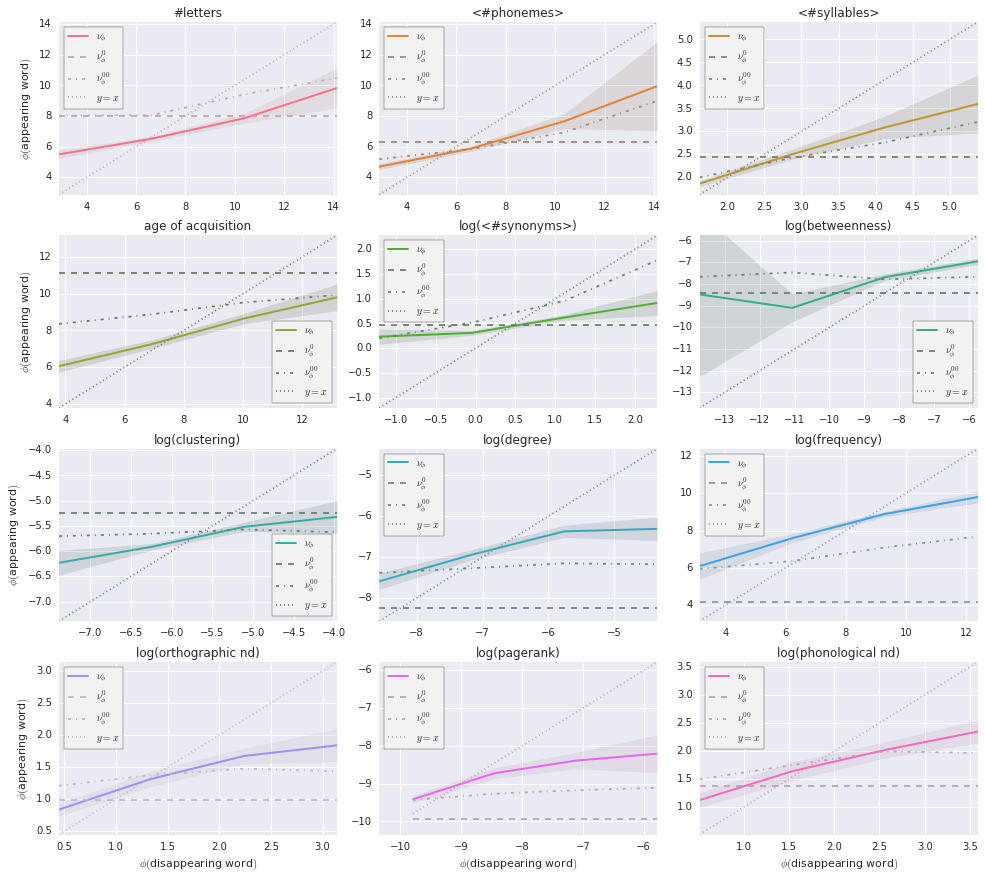

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

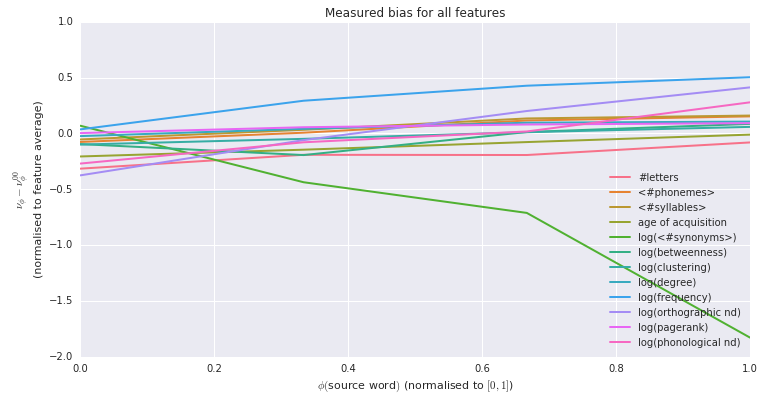

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | *** | ns. | **  | **  |


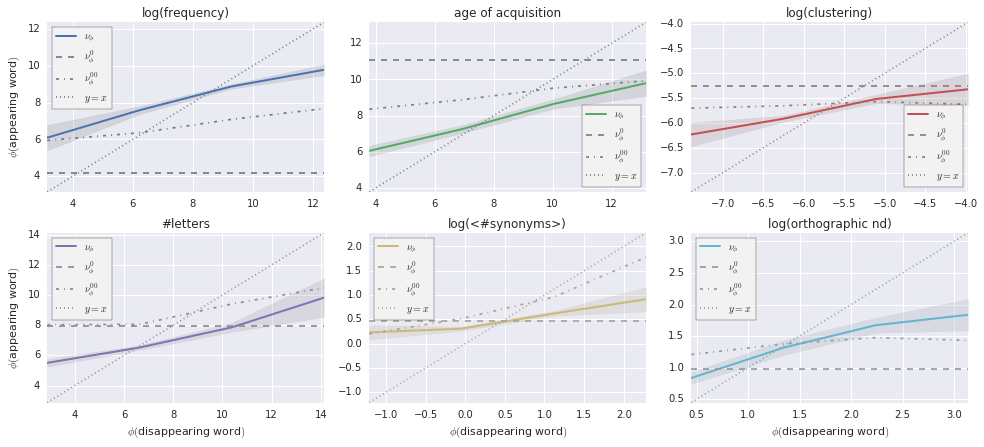

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

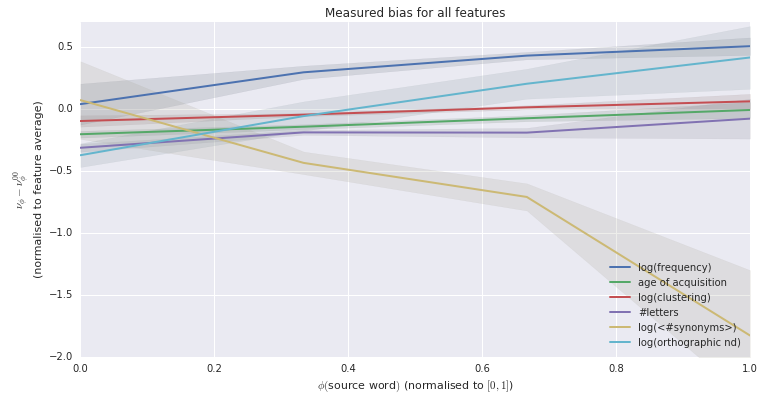

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | ns. | ns. | **  |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | *   | **  |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | *** | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | **  | **  |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *** | *** |


H_00 | *** | ns. | ns. | *** |


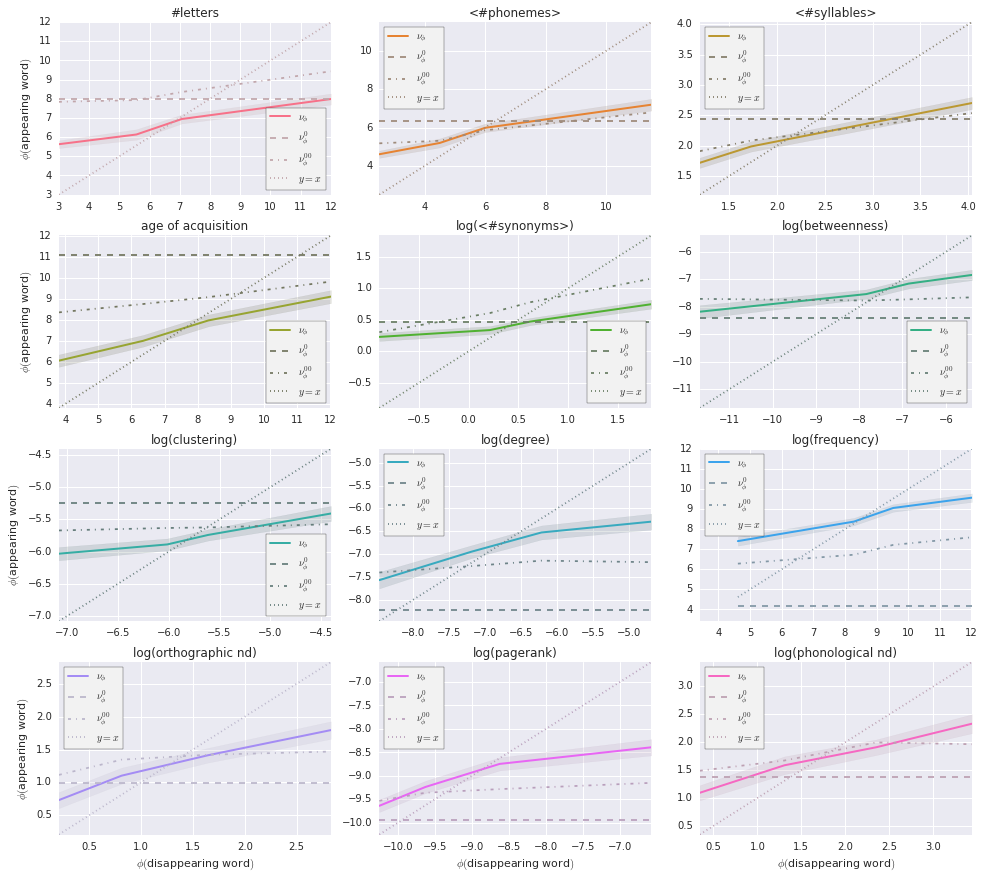

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

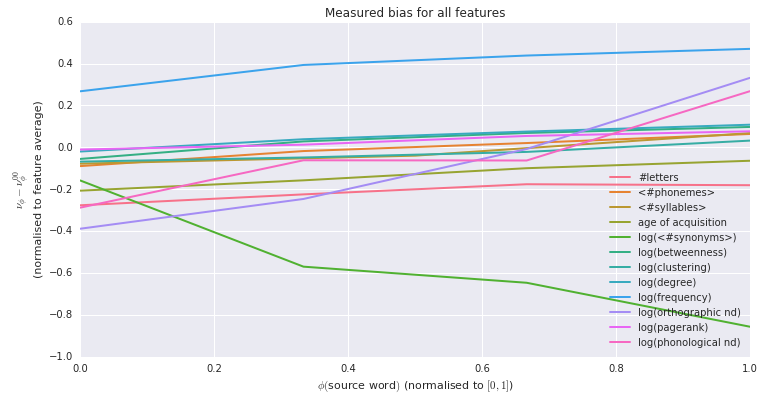

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | *** | **  | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | ns. | *** | *** |
H_00 | *** | *** | ns. | *** |


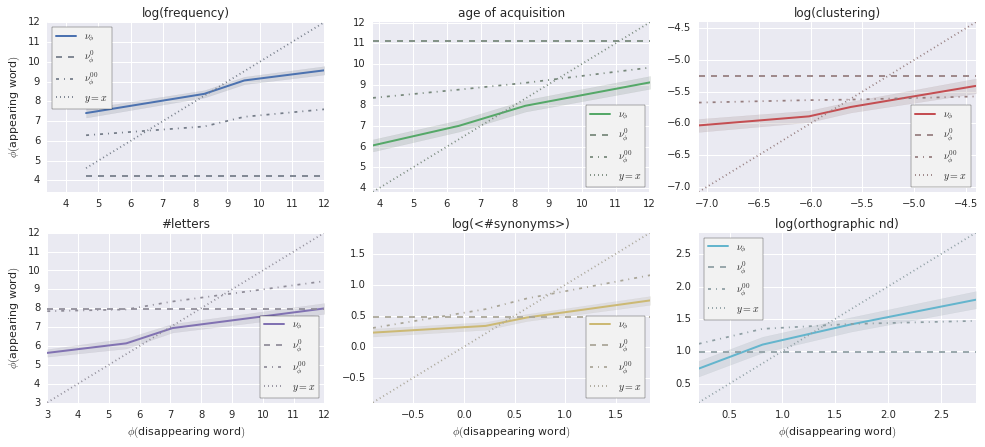

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

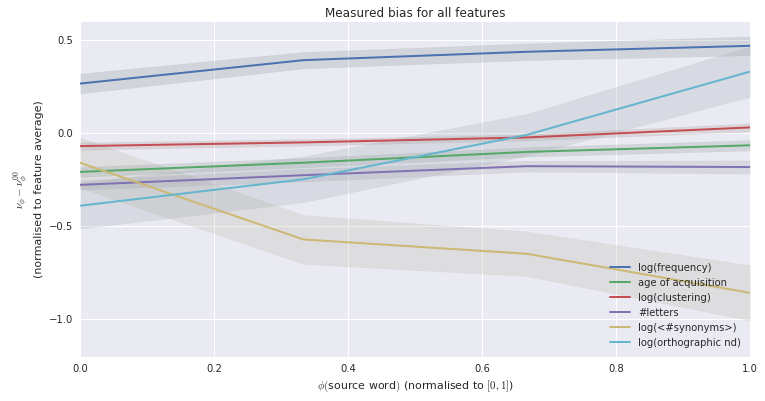

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | ns. | *   | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | ns. | **  |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | ns. | **  | ns. | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | ns. | *   |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *   | *** | **  |
H_00 | *** | *** | *   | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | *   | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |


H_00 | **  | *** | ns. | ns. |


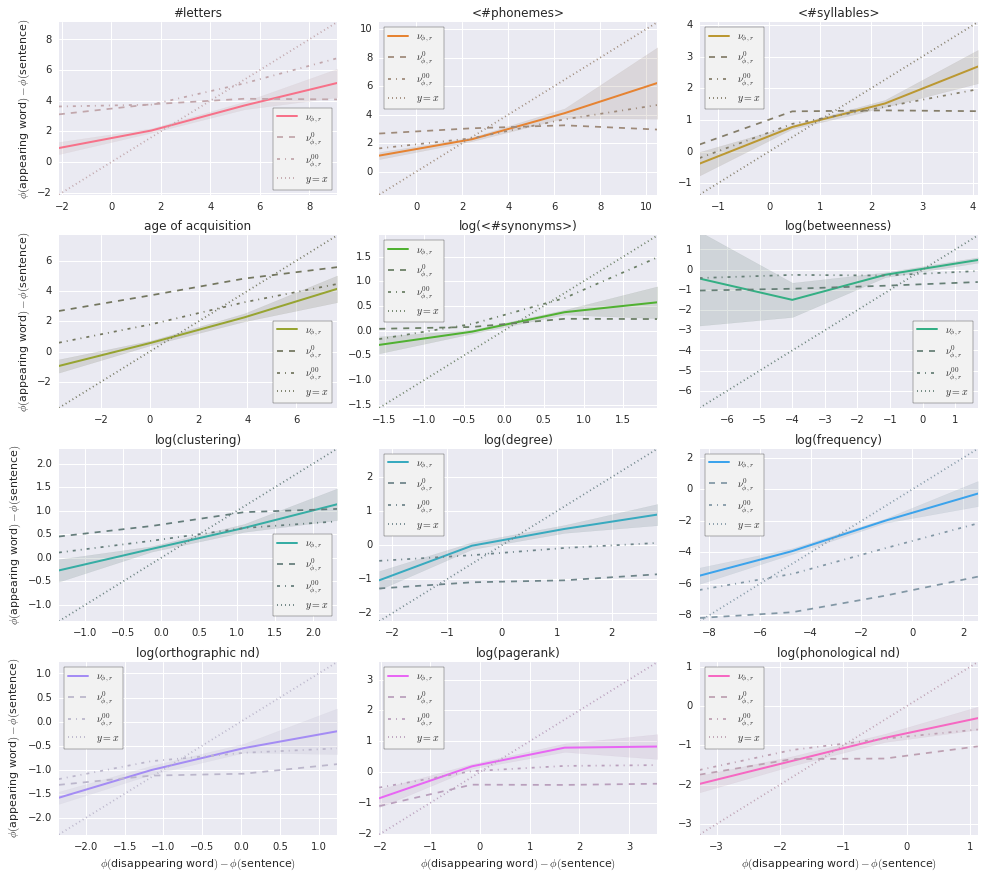

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

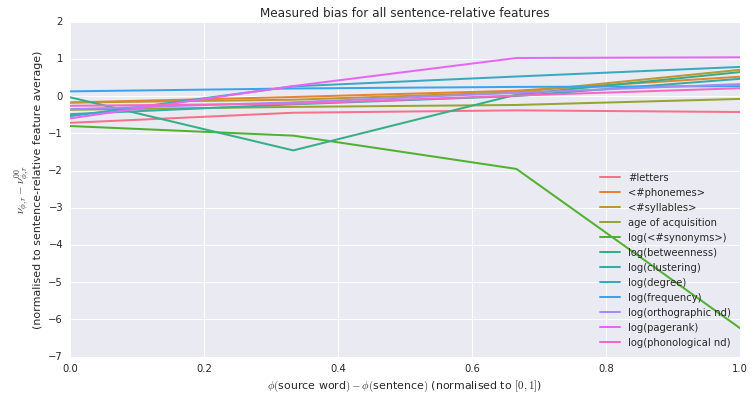

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | **  | *** | ns. | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *   | *** | **  |
H_00 | *** | *** | *   | ns. |


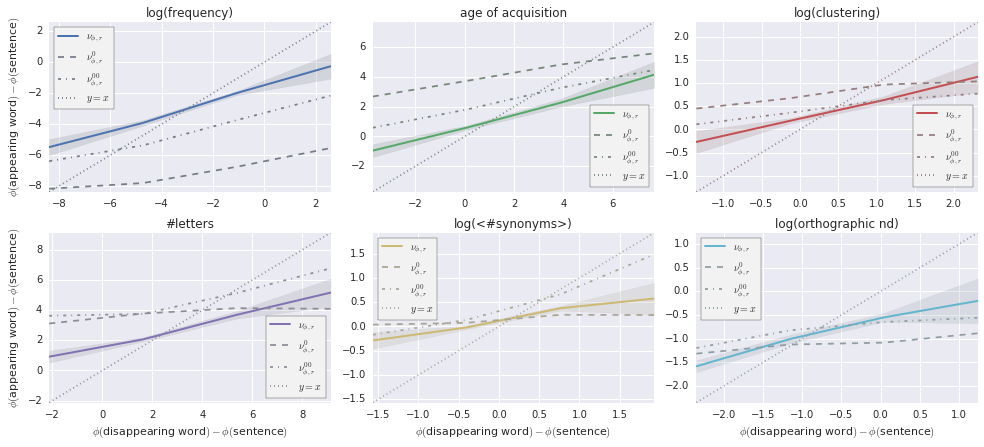

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

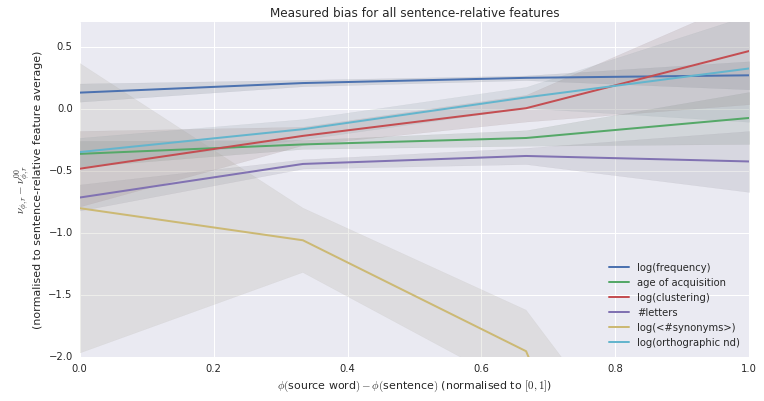

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | ns. | *** | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |


H_00 | *   | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | *** | *** |
H_00 | *** | **  | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | *** | *** |


H_00 | *** | **  | ns. | *   |


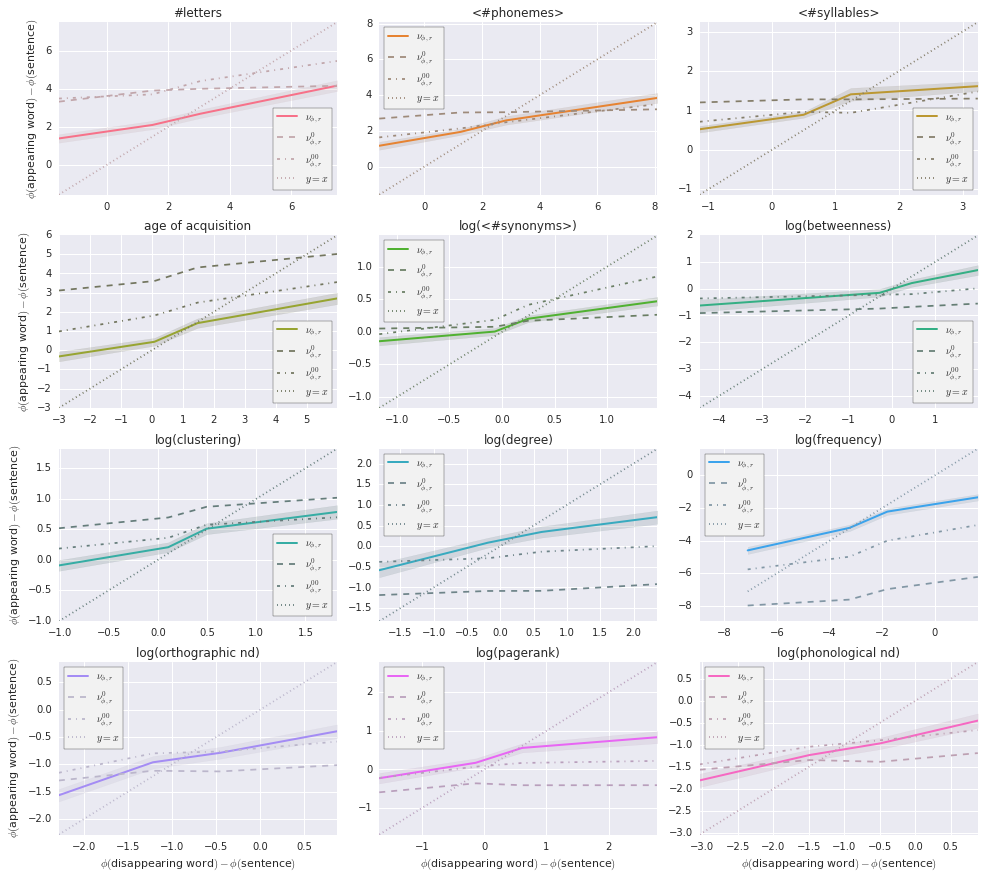

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

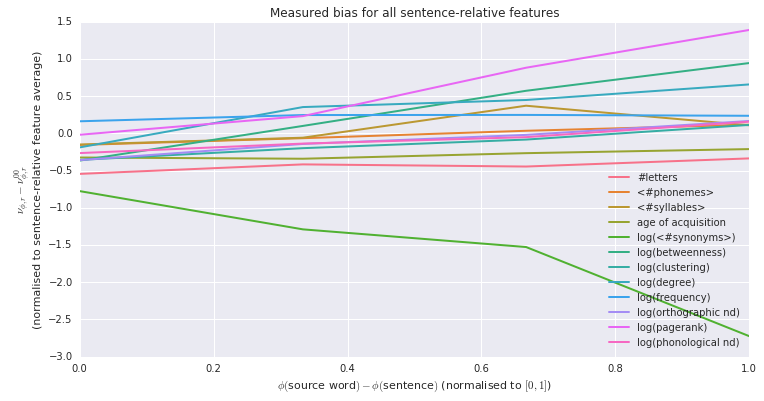

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | **  | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | **  | *** | *** |
H_00 | *** | **  | ns. | **  |


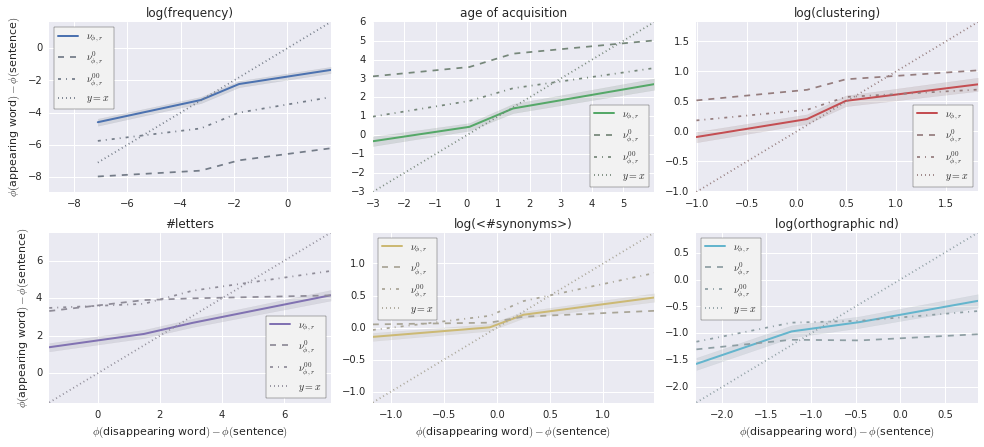

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

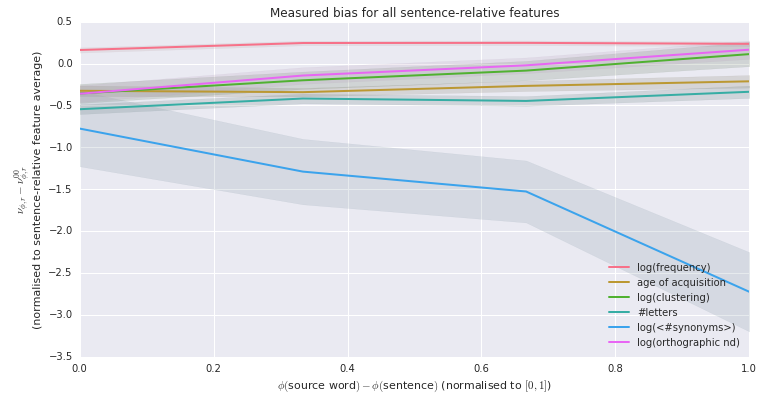

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


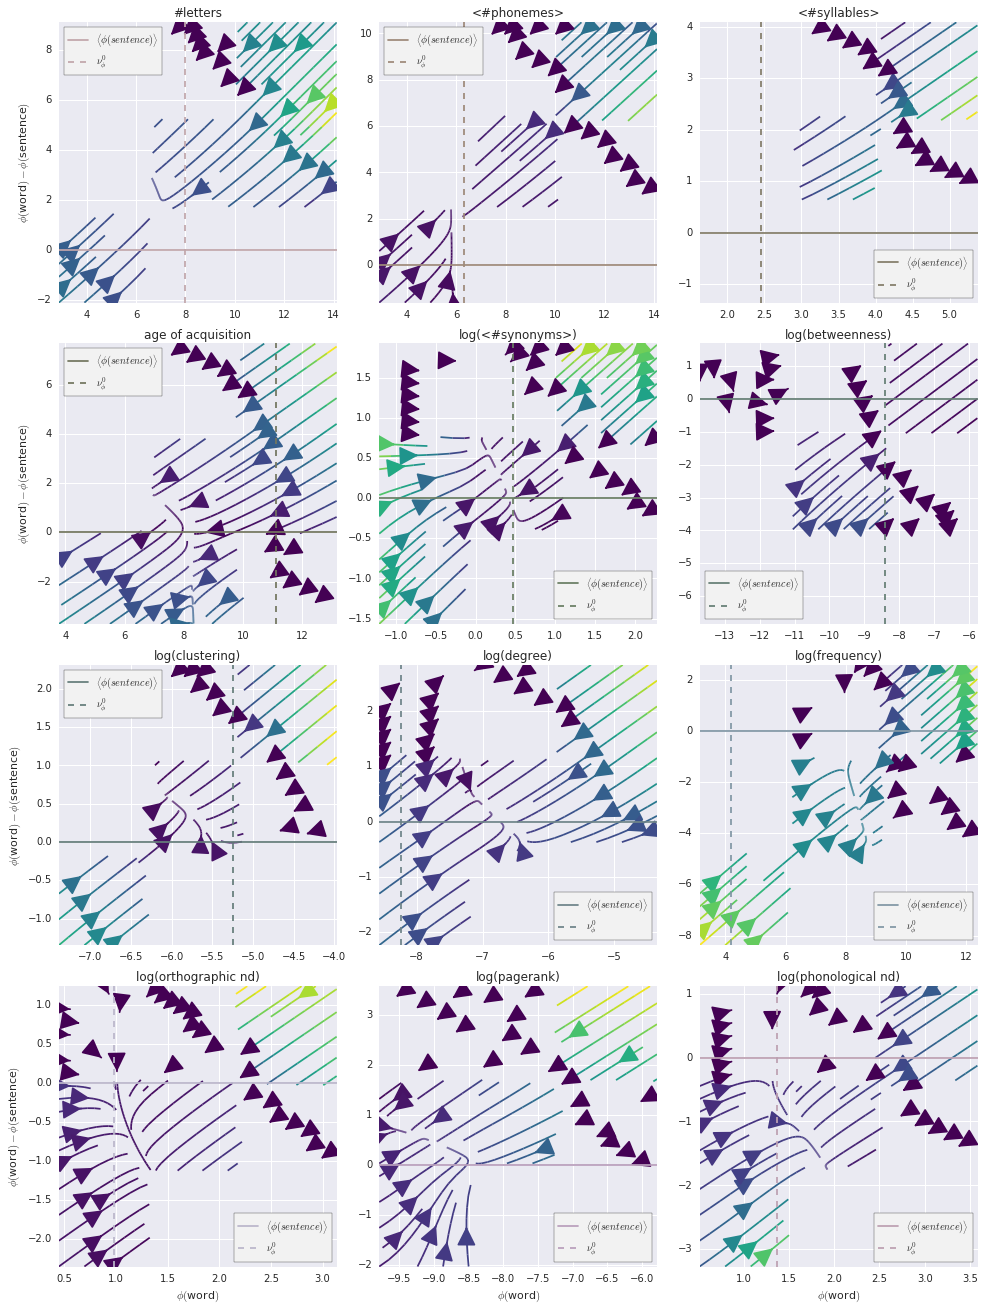

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


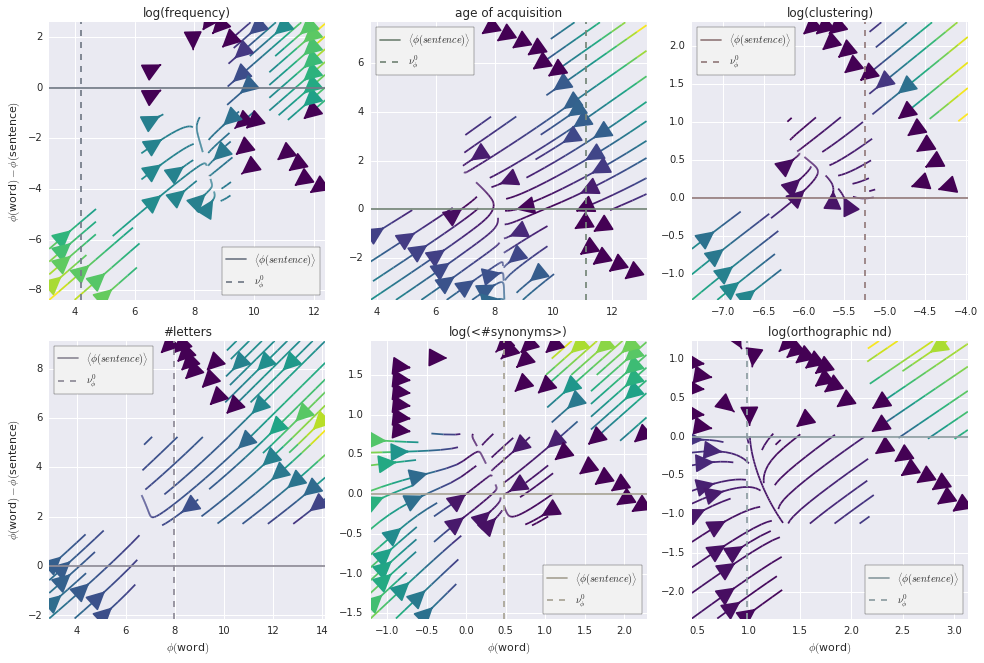

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.55502294  0.17267444  0.07161956  0.06521569  0.03225433  0.02935426
  0.01982183  0.01778344  0.01528559  0.00879764]

We're plotting variation for the first 3 components:


aoa  betweenness  clustering    degree  frequency  \
Component-0 -0.495983     0.215799   -0.076269  0.216337   0.225148   
Component-1  0.374635    -0.405534    0.140260 -0.299004  -0.261974   
Component-2  0.656900     0.628446   -0.103045  0.216350  -0.184906   

             letters_count  orthographic_density  pagerank  phonemes_count  \
Component-0      -0.459887              0.192592  0.249676       -0.435075   
Component-1      -0.411493              0.139908 -0.292163       -0.429618   
Component-2      -0.126580              0.031159  0.222963       -0.052857   

             phonological_density  syllables_count  synonyms_count  
Component-0              0.270379        -0.175185        0.010494  
Component-1              0.186461        -0.154245        0.009605  
Component-2              0.091591        -0.056113       -0.029739

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 39875) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    7 of 39875) |            | Elapsed Time: 0:00:42 ETA: 2 days, 19:23:41

  0% (   27 of 39875) |                    | Elapsed Time: 0:00:42 ETA: 17:33:04

  0% (   52 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 9:09:03

  0% (   77 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 6:12:25

  0% (  103 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 0:06:09

  0% (  127 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 0:05:29

  0% (  151 of 39875) |                     | Elapsed Time: 0:00:43 ETA: 0:05:29

  0% (  175 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:05:29

  0% (  199 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:05:34

  0% (  224 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:05:34

  0% (  249 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:05:37

  0% (  273 of 39875) |                     | Elapsed Time: 0:00:44 ETA: 0:05:41

  0% (  296 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:05:43

  0% (  321 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:05:43

  0% (  346 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:05:41

  0% (  372 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:05:38

  0% (  396 of 39875) |                     | Elapsed Time: 0:00:45 ETA: 0:05:36

  1% (  422 of 39875) |                     | Elapsed Time: 0:00:46 ETA: 0:05:26

  1% (  448 of 39875) |                     | Elapsed Time: 0:00:46 ETA: 0:05:25

  1% (  473 of 39875) |                     | Elapsed Time: 0:00:46 ETA: 0:05:26

  1% (  499 of 39875) |                     | Elapsed Time: 0:00:46 ETA: 0:05:29

  1% (  523 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:05:34

  1% (  546 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:05:42

  1% (  568 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:05:53

  1% (  591 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:05:54

  1% (  615 of 39875) |                     | Elapsed Time: 0:00:47 ETA: 0:05:58

  1% (  638 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:06:02

  1% (  660 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:06:00

  1% (  682 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:06:02

  1% (  706 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:05:56

  1% (  731 of 39875) |                     | Elapsed Time: 0:00:48 ETA: 0:05:51

  1% (  753 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:05:49

  1% (  777 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:05:45

  2% (  801 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:05:44

  2% (  825 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:05:44

  2% (  849 of 39875) |                     | Elapsed Time: 0:00:49 ETA: 0:05:44

  2% (  874 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:05:42

  2% (  898 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:05:37

  2% (  922 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:05:39

  2% (  947 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:05:33

  2% (  974 of 39875) |                     | Elapsed Time: 0:00:50 ETA: 0:05:25

  2% ( 1011 of 39875) |                     | Elapsed Time: 0:00:51 ETA: 0:05:16

  2% ( 1036 of 39875) |                     | Elapsed Time: 0:00:51 ETA: 0:05:14

  2% ( 1062 of 39875) |                     | Elapsed Time: 0:00:51 ETA: 0:05:07

  2% ( 1090 of 39875) |                     | Elapsed Time: 0:00:51 ETA: 0:05:03

  2% ( 1118 of 39875) |                     | Elapsed Time: 0:00:52 ETA: 0:05:00

  2% ( 1145 of 39875) |                     | Elapsed Time: 0:00:52 ETA: 0:05:01

  2% ( 1171 of 39875) |                     | Elapsed Time: 0:00:52 ETA: 0:04:57

  3% ( 1209 of 39875) |                     | Elapsed Time: 0:00:52 ETA: 0:05:01

  3% ( 1234 of 39875) |                     | Elapsed Time: 0:00:53 ETA: 0:05:07

  3% ( 1260 of 39875) |                     | Elapsed Time: 0:00:53 ETA: 0:05:10

  3% ( 1287 of 39875) |                     | Elapsed Time: 0:00:53 ETA: 0:05:08

  3% ( 1313 of 39875) |                     | Elapsed Time: 0:00:53 ETA: 0:05:08

  3% ( 1340 of 39875) |                     | Elapsed Time: 0:00:53 ETA: 0:05:06

  3% ( 1365 of 39875) |                     | Elapsed Time: 0:00:54 ETA: 0:05:08

  3% ( 1391 of 39875) |                     | Elapsed Time: 0:00:54 ETA: 0:05:09

  3% ( 1418 of 39875) |                     | Elapsed Time: 0:00:54 ETA: 0:05:09

  3% ( 1442 of 39875) |                     | Elapsed Time: 0:00:54 ETA: 0:05:13

  3% ( 1467 of 39875) |                     | Elapsed Time: 0:00:54 ETA: 0:05:17

  3% ( 1496 of 39875) |                     | Elapsed Time: 0:00:55 ETA: 0:05:14

  3% ( 1521 of 39875) |                     | Elapsed Time: 0:00:55 ETA: 0:05:16

  3% ( 1547 of 39875) |                     | Elapsed Time: 0:00:55 ETA: 0:05:14

  3% ( 1573 of 39875) |                     | Elapsed Time: 0:00:55 ETA: 0:05:10

  4% ( 1599 of 39875) |                     | Elapsed Time: 0:00:55 ETA: 0:05:08

  4% ( 1624 of 39875) |                     | Elapsed Time: 0:00:56 ETA: 0:05:11

  4% ( 1649 of 39875) |                     | Elapsed Time: 0:00:56 ETA: 0:05:11

  4% ( 1674 of 39875) |                     | Elapsed Time: 0:00:56 ETA: 0:05:12

  4% ( 1701 of 39875) |                     | Elapsed Time: 0:00:56 ETA: 0:05:11

  4% ( 1726 of 39875) |                     | Elapsed Time: 0:00:57 ETA: 0:05:12

  4% ( 1748 of 39875) |                     | Elapsed Time: 0:00:57 ETA: 0:05:18

  4% ( 1772 of 39875) |                     | Elapsed Time: 0:00:57 ETA: 0:05:22

  4% ( 1797 of 39875) |                     | Elapsed Time: 0:00:57 ETA: 0:05:25

  4% ( 1822 of 39875) |                     | Elapsed Time: 0:00:57 ETA: 0:05:27

  4% ( 1846 of 39875) |                     | Elapsed Time: 0:00:58 ETA: 0:05:25

  4% ( 1872 of 39875) |                     | Elapsed Time: 0:00:58 ETA: 0:05:16

  4% ( 1897 of 39875) |                     | Elapsed Time: 0:00:58 ETA: 0:05:13

  4% ( 1922 of 39875) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:12

  4% ( 1947 of 39875) |#                    | Elapsed Time: 0:00:58 ETA: 0:05:13

  4% ( 1971 of 39875) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:16

  5% ( 2006 of 39875) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:20

  5% ( 2031 of 39875) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:19

  5% ( 2057 of 39875) |#                    | Elapsed Time: 0:00:59 ETA: 0:05:16

  5% ( 2082 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:05:12

  5% ( 2106 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:05:12

  5% ( 2131 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:05:12

  5% ( 2155 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:05:20

  5% ( 2181 of 39875) |#                    | Elapsed Time: 0:01:00 ETA: 0:05:19

  5% ( 2206 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:05:18

  5% ( 2230 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:05:17

  5% ( 2257 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:05:08

  5% ( 2286 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:04:57

  5% ( 2316 of 39875) |#                    | Elapsed Time: 0:01:01 ETA: 0:04:45

  5% ( 2345 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:04:38

  5% ( 2373 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:04:26

  6% ( 2402 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:04:27

  6% ( 2431 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:04:25

  6% ( 2462 of 39875) |#                    | Elapsed Time: 0:01:02 ETA: 0:04:23

  6% ( 2493 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:04:18

  6% ( 2523 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:04:14

  6% ( 2554 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:04:10

  6% ( 2586 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:04:07

  6% ( 2613 of 39875) |#                    | Elapsed Time: 0:01:03 ETA: 0:04:14

  6% ( 2644 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:04:15

  6% ( 2675 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:04:14

  6% ( 2706 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:04:15

  6% ( 2736 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:04:09

  6% ( 2767 of 39875) |#                    | Elapsed Time: 0:01:04 ETA: 0:04:08

  7% ( 2798 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:04:08

  7% ( 2829 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:04:08

  7% ( 2860 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:04:08

  7% ( 2890 of 39875) |#                    | Elapsed Time: 0:01:05 ETA: 0:04:10

  7% ( 2915 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:04:20

  7% ( 2943 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:04:25

  7% ( 2972 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:04:28

  7% ( 3006 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:04:32

  7% ( 3026 of 39875) |#                    | Elapsed Time: 0:01:06 ETA: 0:04:42

  7% ( 3040 of 39875) |#                    | Elapsed Time: 0:01:07 ETA: 0:05:26

  7% ( 3054 of 39875) |#                    | Elapsed Time: 0:01:07 ETA: 0:06:21

  7% ( 3068 of 39875) |#                    | Elapsed Time: 0:01:07 ETA: 0:07:38

  7% ( 3082 of 39875) |#                    | Elapsed Time: 0:01:07 ETA: 0:09:44

  7% ( 3096 of 39875) |#                    | Elapsed Time: 0:01:08 ETA: 0:09:45

  7% ( 3110 of 39875) |#                    | Elapsed Time: 0:01:08 ETA: 0:09:45

  7% ( 3124 of 39875) |#                    | Elapsed Time: 0:01:08 ETA: 0:09:46

  7% ( 3138 of 39875) |#                    | Elapsed Time: 0:01:08 ETA: 0:09:42

  7% ( 3152 of 39875) |#                    | Elapsed Time: 0:01:08 ETA: 0:09:43

  7% ( 3166 of 39875) |#                    | Elapsed Time: 0:01:09 ETA: 0:09:44

  7% ( 3180 of 39875) |#                    | Elapsed Time: 0:01:09 ETA: 0:09:42

  8% ( 3194 of 39875) |#                    | Elapsed Time: 0:01:09 ETA: 0:09:41

  8% ( 3208 of 39875) |#                    | Elapsed Time: 0:01:09 ETA: 0:09:42

  8% ( 3222 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:39

  8% ( 3236 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:37

  8% ( 3250 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:39

  8% ( 3264 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:39

  8% ( 3278 of 39875) |#                    | Elapsed Time: 0:01:10 ETA: 0:09:34

  8% ( 3298 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:49

  8% ( 3312 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:49

  8% ( 3326 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:47

  8% ( 3340 of 39875) |#                    | Elapsed Time: 0:01:11 ETA: 0:08:47

  8% ( 3354 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:50

  8% ( 3369 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:09:31

  8% ( 3383 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:09:36

  8% ( 3408 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:08:05

  8% ( 3434 of 39875) |#                    | Elapsed Time: 0:01:12 ETA: 0:06:50

  8% ( 3460 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:05:52

  8% ( 3490 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:05:08

  8% ( 3518 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:04:40

  8% ( 3544 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:04:42

  8% ( 3571 of 39875) |#                    | Elapsed Time: 0:01:13 ETA: 0:04:42

  9% ( 3597 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:04:43

  9% ( 3623 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:04:49

  9% ( 3648 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:04:52

  9% ( 3673 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:04:58

  9% ( 3697 of 39875) |#                    | Elapsed Time: 0:01:14 ETA: 0:05:01

  9% ( 3724 of 39875) |#                    | Elapsed Time: 0:01:15 ETA: 0:04:57

  9% ( 3750 of 39875) |#                    | Elapsed Time: 0:01:15 ETA: 0:04:53

  9% ( 3776 of 39875) |#                    | Elapsed Time: 0:01:15 ETA: 0:04:48

  9% ( 3803 of 39875) |##                   | Elapsed Time: 0:01:15 ETA: 0:04:43

  9% ( 3830 of 39875) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:39

  9% ( 3858 of 39875) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:39

  9% ( 3884 of 39875) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:41

  9% ( 3910 of 39875) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:42

  9% ( 3938 of 39875) |##                   | Elapsed Time: 0:01:16 ETA: 0:04:40

  9% ( 3966 of 39875) |##                   | Elapsed Time: 0:01:17 ETA: 0:04:39

 10% ( 4002 of 39875) |##                   | Elapsed Time: 0:01:17 ETA: 0:04:38

 10% ( 4027 of 39875) |##                   | Elapsed Time: 0:01:17 ETA: 0:04:36

 10% ( 4051 of 39875) |##                   | Elapsed Time: 0:01:17 ETA: 0:04:43

 10% ( 4078 of 39875) |##                   | Elapsed Time: 0:01:17 ETA: 0:04:44

 10% ( 4105 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:04:45

 10% ( 4132 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:04:46

 10% ( 4159 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:04:35

 10% ( 4186 of 39875) |##                   | Elapsed Time: 0:01:18 ETA: 0:04:33

 10% ( 4213 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:04:32

 10% ( 4239 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:04:35

 10% ( 4270 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:04:59

 10% ( 4286 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:05:38

 10% ( 4309 of 39875) |##                   | Elapsed Time: 0:01:19 ETA: 0:05:52

 10% ( 4337 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:05:41

 10% ( 4365 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:05:16

 11% ( 4395 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:04:49

 11% ( 4425 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:04:11

 11% ( 4453 of 39875) |##                   | Elapsed Time: 0:01:20 ETA: 0:04:14

 11% ( 4486 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:04:17

 11% ( 4512 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:04:24

 11% ( 4538 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:04:35

 11% ( 4570 of 39875) |##                   | Elapsed Time: 0:01:21 ETA: 0:04:25

 11% ( 4605 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:04:08

 11% ( 4640 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:03:48

 11% ( 4658 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:04:02

 11% ( 4678 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:04:21

 11% ( 4700 of 39875) |##                   | Elapsed Time: 0:01:22 ETA: 0:04:47

 11% ( 4722 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:05:30

 11% ( 4743 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:06:05

 11% ( 4770 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:05:26

 12% ( 4798 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:05:07

 12% ( 4821 of 39875) |##                   | Elapsed Time: 0:01:23 ETA: 0:05:06

 12% ( 4839 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:05:12

 12% ( 4857 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:05:18

 12% ( 4877 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:05:53

 12% ( 4895 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:06:24

 12% ( 4913 of 39875) |##                   | Elapsed Time: 0:01:24 ETA: 0:06:26

 12% ( 4932 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:06:26

 12% ( 4951 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:06:28

 12% ( 4971 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:06:24

 12% ( 4996 of 39875) |##                   | Elapsed Time: 0:01:25 ETA: 0:06:17

 12% ( 5025 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:05:36

 12% ( 5059 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:04:52

 12% ( 5093 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:04:19

 12% ( 5123 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:03:57

 12% ( 5144 of 39875) |##                   | Elapsed Time: 0:01:26 ETA: 0:03:57

 12% ( 5163 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:04:26

 12% ( 5183 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:05:02

 13% ( 5203 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:05:47

 13% ( 5222 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:06:04

 13% ( 5243 of 39875) |##                   | Elapsed Time: 0:01:27 ETA: 0:06:01

 13% ( 5264 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:05:58

 13% ( 5287 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:05:46

 13% ( 5307 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:05:43

 13% ( 5328 of 39875) |##                   | Elapsed Time: 0:01:28 ETA: 0:05:42

 13% ( 5349 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:05:43

 13% ( 5371 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:05:51

 13% ( 5392 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:05:55

 13% ( 5413 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:05:57

 13% ( 5434 of 39875) |##                   | Elapsed Time: 0:01:29 ETA: 0:05:55

 13% ( 5455 of 39875) |##                   | Elapsed Time: 0:01:30 ETA: 0:05:55

 13% ( 5483 of 39875) |##                   | Elapsed Time: 0:01:30 ETA: 0:05:56

 13% ( 5503 of 39875) |##                   | Elapsed Time: 0:01:30 ETA: 0:05:53

 13% ( 5523 of 39875) |##                   | Elapsed Time: 0:01:30 ETA: 0:05:52

 13% ( 5543 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:05:53

 13% ( 5564 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:05:52

 14% ( 5585 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:05:55

 14% ( 5606 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:05:54

 14% ( 5626 of 39875) |##                   | Elapsed Time: 0:01:31 ETA: 0:05:54

 14% ( 5647 of 39875) |##                   | Elapsed Time: 0:01:32 ETA: 0:05:50

 14% ( 5667 of 39875) |##                   | Elapsed Time: 0:01:32 ETA: 0:05:51

 14% ( 5687 of 39875) |##                   | Elapsed Time: 0:01:32 ETA: 0:05:55

 14% ( 5707 of 39875) |###                  | Elapsed Time: 0:01:32 ETA: 0:06:00

 14% ( 5728 of 39875) |###                  | Elapsed Time: 0:01:32 ETA: 0:05:57

 14% ( 5749 of 39875) |###                  | Elapsed Time: 0:01:33 ETA: 0:05:56

 14% ( 5770 of 39875) |###                  | Elapsed Time: 0:01:33 ETA: 0:05:55

 14% ( 5791 of 39875) |###                  | Elapsed Time: 0:01:33 ETA: 0:05:53

 14% ( 5812 of 39875) |###                  | Elapsed Time: 0:01:33 ETA: 0:05:54

 14% ( 5833 of 39875) |###                  | Elapsed Time: 0:01:34 ETA: 0:05:56

 14% ( 5854 of 39875) |###                  | Elapsed Time: 0:01:34 ETA: 0:05:53

 14% ( 5875 of 39875) |###                  | Elapsed Time: 0:01:34 ETA: 0:05:50

 14% ( 5895 of 39875) |###                  | Elapsed Time: 0:01:34 ETA: 0:05:49

 14% ( 5915 of 39875) |###                  | Elapsed Time: 0:01:34 ETA: 0:05:49

 14% ( 5937 of 39875) |###                  | Elapsed Time: 0:01:35 ETA: 0:05:43

 14% ( 5957 of 39875) |###                  | Elapsed Time: 0:01:35 ETA: 0:05:44

 15% ( 5982 of 39875) |###                  | Elapsed Time: 0:01:35 ETA: 0:05:43

 15% ( 6003 of 39875) |###                  | Elapsed Time: 0:01:35 ETA: 0:05:41

 15% ( 6024 of 39875) |###                  | Elapsed Time: 0:01:35 ETA: 0:05:39

 15% ( 6044 of 39875) |###                  | Elapsed Time: 0:01:36 ETA: 0:05:43

 15% ( 6064 of 39875) |###                  | Elapsed Time: 0:01:36 ETA: 0:05:44

 15% ( 6084 of 39875) |###                  | Elapsed Time: 0:01:36 ETA: 0:05:46

 15% ( 6107 of 39875) |###                  | Elapsed Time: 0:01:36 ETA: 0:05:38

 15% ( 6128 of 39875) |###                  | Elapsed Time: 0:01:37 ETA: 0:05:38

 15% ( 6148 of 39875) |###                  | Elapsed Time: 0:01:37 ETA: 0:05:37

 15% ( 6168 of 39875) |###                  | Elapsed Time: 0:01:37 ETA: 0:05:37

 15% ( 6189 of 39875) |###                  | Elapsed Time: 0:01:37 ETA: 0:05:37

 15% ( 6211 of 39875) |###                  | Elapsed Time: 0:01:37 ETA: 0:05:37

 15% ( 6231 of 39875) |###                  | Elapsed Time: 0:01:38 ETA: 0:05:35

 15% ( 6250 of 39875) |###                  | Elapsed Time: 0:01:38 ETA: 0:05:38

 15% ( 6271 of 39875) |###                  | Elapsed Time: 0:01:38 ETA: 0:05:39

 15% ( 6291 of 39875) |###                  | Elapsed Time: 0:01:38 ETA: 0:05:43

 15% ( 6311 of 39875) |###                  | Elapsed Time: 0:01:38 ETA: 0:05:46

 15% ( 6331 of 39875) |###                  | Elapsed Time: 0:01:39 ETA: 0:05:46

 15% ( 6351 of 39875) |###                  | Elapsed Time: 0:01:39 ETA: 0:05:43

 15% ( 6371 of 39875) |###                  | Elapsed Time: 0:01:39 ETA: 0:05:45

 16% ( 6391 of 39875) |###                  | Elapsed Time: 0:01:39 ETA: 0:05:49

 16% ( 6412 of 39875) |###                  | Elapsed Time: 0:01:39 ETA: 0:05:46

 16% ( 6432 of 39875) |###                  | Elapsed Time: 0:01:40 ETA: 0:05:45

 16% ( 6452 of 39875) |###                  | Elapsed Time: 0:01:40 ETA: 0:05:45

 16% ( 6480 of 39875) |###                  | Elapsed Time: 0:01:40 ETA: 0:05:44

 16% ( 6500 of 39875) |###                  | Elapsed Time: 0:01:40 ETA: 0:05:44

 16% ( 6520 of 39875) |###                  | Elapsed Time: 0:01:41 ETA: 0:05:47

 16% ( 6540 of 39875) |###                  | Elapsed Time: 0:01:41 ETA: 0:05:48

 16% ( 6560 of 39875) |###                  | Elapsed Time: 0:01:41 ETA: 0:05:48

 16% ( 6580 of 39875) |###                  | Elapsed Time: 0:01:41 ETA: 0:05:45

 16% ( 6600 of 39875) |###                  | Elapsed Time: 0:01:41 ETA: 0:05:46

 16% ( 6621 of 39875) |###                  | Elapsed Time: 0:01:42 ETA: 0:05:42

 16% ( 6641 of 39875) |###                  | Elapsed Time: 0:01:42 ETA: 0:05:41

 16% ( 6661 of 39875) |###                  | Elapsed Time: 0:01:42 ETA: 0:05:45

 16% ( 6681 of 39875) |###                  | Elapsed Time: 0:01:42 ETA: 0:05:47

 16% ( 6701 of 39875) |###                  | Elapsed Time: 0:01:42 ETA: 0:05:47

 16% ( 6721 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:05:51

 16% ( 6743 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:05:42

 16% ( 6763 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:05:40

 17% ( 6783 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:05:37

 17% ( 6803 of 39875) |###                  | Elapsed Time: 0:01:43 ETA: 0:05:35

 17% ( 6823 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:05:40

 17% ( 6844 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:05:41

 17% ( 6864 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:05:42

 17% ( 6885 of 39875) |###                  | Elapsed Time: 0:01:44 ETA: 0:05:41

 17% ( 6907 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:36

 17% ( 6927 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:39

 17% ( 6946 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:40

 17% ( 6966 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:43

 17% ( 6989 of 39875) |###                  | Elapsed Time: 0:01:45 ETA: 0:05:46

 17% ( 7009 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:05:49

 17% ( 7029 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:05:49

 17% ( 7049 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:05:46

 17% ( 7069 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:05:46

 17% ( 7089 of 39875) |###                  | Elapsed Time: 0:01:46 ETA: 0:05:46

 17% ( 7109 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:05:46

 17% ( 7129 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:05:46

 17% ( 7149 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:05:46

 17% ( 7169 of 39875) |###                  | Elapsed Time: 0:01:47 ETA: 0:05:46

 18% ( 7189 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:05:45

 18% ( 7209 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:05:45

 18% ( 7229 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:05:45

 18% ( 7249 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:05:43

 18% ( 7269 of 39875) |###                  | Elapsed Time: 0:01:48 ETA: 0:05:42

 18% ( 7289 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:39

 18% ( 7309 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:38

 18% ( 7329 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:37

 18% ( 7349 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:37

 18% ( 7369 of 39875) |###                  | Elapsed Time: 0:01:49 ETA: 0:05:35

 18% ( 7389 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:05:35

 18% ( 7409 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:05:35

 18% ( 7431 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:05:30

 18% ( 7453 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:05:25

 18% ( 7477 of 39875) |###                  | Elapsed Time: 0:01:50 ETA: 0:05:23

 18% ( 7497 of 39875) |###                  | Elapsed Time: 0:01:51 ETA: 0:05:22

 18% ( 7517 of 39875) |###                  | Elapsed Time: 0:01:51 ETA: 0:05:24

 18% ( 7537 of 39875) |###                  | Elapsed Time: 0:01:51 ETA: 0:05:29

 18% ( 7560 of 39875) |###                  | Elapsed Time: 0:01:51 ETA: 0:05:25

 19% ( 7580 of 39875) |###                  | Elapsed Time: 0:01:52 ETA: 0:05:27

 19% ( 7600 of 39875) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:25

 19% ( 7620 of 39875) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:23

 19% ( 7640 of 39875) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:28

 19% ( 7660 of 39875) |####                 | Elapsed Time: 0:01:52 ETA: 0:05:32

 19% ( 7680 of 39875) |####                 | Elapsed Time: 0:01:53 ETA: 0:05:32

 19% ( 7700 of 39875) |####                 | Elapsed Time: 0:01:53 ETA: 0:05:32

 19% ( 7720 of 39875) |####                 | Elapsed Time: 0:01:53 ETA: 0:05:31

 19% ( 7740 of 39875) |####                 | Elapsed Time: 0:01:53 ETA: 0:05:30

 19% ( 7763 of 39875) |####                 | Elapsed Time: 0:01:53 ETA: 0:05:21

 19% ( 7788 of 39875) |####                 | Elapsed Time: 0:01:54 ETA: 0:05:06

 19% ( 7814 of 39875) |####                 | Elapsed Time: 0:01:54 ETA: 0:04:49

 19% ( 7841 of 39875) |####                 | Elapsed Time: 0:01:54 ETA: 0:04:33

 19% ( 7867 of 39875) |####                 | Elapsed Time: 0:01:54 ETA: 0:04:21

 19% ( 7891 of 39875) |####                 | Elapsed Time: 0:01:54 ETA: 0:04:23

 19% ( 7917 of 39875) |####                 | Elapsed Time: 0:01:55 ETA: 0:04:23

 19% ( 7942 of 39875) |####                 | Elapsed Time: 0:01:55 ETA: 0:04:28

 20% ( 7975 of 39875) |####                 | Elapsed Time: 0:01:55 ETA: 0:04:26

 20% ( 8000 of 39875) |####                 | Elapsed Time: 0:01:55 ETA: 0:04:28

 20% ( 8026 of 39875) |####                 | Elapsed Time: 0:01:56 ETA: 0:04:20

 20% ( 8050 of 39875) |####                 | Elapsed Time: 0:01:56 ETA: 0:04:22

 20% ( 8075 of 39875) |####                 | Elapsed Time: 0:01:56 ETA: 0:04:25

 20% ( 8100 of 39875) |####                 | Elapsed Time: 0:01:56 ETA: 0:04:26

 20% ( 8120 of 39875) |####                 | Elapsed Time: 0:01:56 ETA: 0:04:38

 20% ( 8141 of 39875) |####                 | Elapsed Time: 0:01:57 ETA: 0:04:52

 20% ( 8161 of 39875) |####                 | Elapsed Time: 0:01:57 ETA: 0:05:05

 20% ( 8184 of 39875) |####                 | Elapsed Time: 0:01:57 ETA: 0:05:14

 20% ( 8207 of 39875) |####                 | Elapsed Time: 0:01:57 ETA: 0:05:10

 20% ( 8232 of 39875) |####                 | Elapsed Time: 0:01:57 ETA: 0:04:47

 20% ( 8255 of 39875) |####                 | Elapsed Time: 0:01:58 ETA: 0:04:47

 20% ( 8281 of 39875) |####                 | Elapsed Time: 0:01:58 ETA: 0:04:35

 20% ( 8303 of 39875) |####                 | Elapsed Time: 0:01:58 ETA: 0:04:30

 20% ( 8325 of 39875) |####                 | Elapsed Time: 0:01:58 ETA: 0:04:44

 20% ( 8345 of 39875) |####                 | Elapsed Time: 0:01:58 ETA: 0:04:52

 20% ( 8370 of 39875) |####                 | Elapsed Time: 0:01:59 ETA: 0:04:51

 21% ( 8396 of 39875) |####                 | Elapsed Time: 0:01:59 ETA: 0:04:46

 21% ( 8422 of 39875) |####                 | Elapsed Time: 0:01:59 ETA: 0:04:33

 21% ( 8448 of 39875) |####                 | Elapsed Time: 0:01:59 ETA: 0:04:28

 21% ( 8474 of 39875) |####                 | Elapsed Time: 0:02:00 ETA: 0:04:23

 21% ( 8501 of 39875) |####                 | Elapsed Time: 0:02:00 ETA: 0:04:20

 21% ( 8526 of 39875) |####                 | Elapsed Time: 0:02:00 ETA: 0:04:20

 21% ( 8549 of 39875) |####                 | Elapsed Time: 0:02:00 ETA: 0:04:26

 21% ( 8568 of 39875) |####                 | Elapsed Time: 0:02:00 ETA: 0:04:42

 21% ( 8592 of 39875) |####                 | Elapsed Time: 0:02:01 ETA: 0:04:52

 21% ( 8616 of 39875) |####                 | Elapsed Time: 0:02:01 ETA: 0:04:54

 21% ( 8640 of 39875) |####                 | Elapsed Time: 0:02:01 ETA: 0:04:51

 21% ( 8663 of 39875) |####                 | Elapsed Time: 0:02:01 ETA: 0:04:39

 21% ( 8682 of 39875) |####                 | Elapsed Time: 0:02:01 ETA: 0:04:47

 21% ( 8706 of 39875) |####                 | Elapsed Time: 0:02:02 ETA: 0:04:49

 21% ( 8730 of 39875) |####                 | Elapsed Time: 0:02:02 ETA: 0:04:50

 21% ( 8752 of 39875) |####                 | Elapsed Time: 0:02:02 ETA: 0:04:47

 22% ( 8779 of 39875) |####                 | Elapsed Time: 0:02:02 ETA: 0:04:37

 22% ( 8804 of 39875) |####                 | Elapsed Time: 0:02:03 ETA: 0:04:21

 22% ( 8828 of 39875) |####                 | Elapsed Time: 0:02:03 ETA: 0:04:26

 22% ( 8853 of 39875) |####                 | Elapsed Time: 0:02:03 ETA: 0:04:25

 22% ( 8875 of 39875) |####                 | Elapsed Time: 0:02:03 ETA: 0:04:27

 22% ( 8902 of 39875) |####                 | Elapsed Time: 0:02:03 ETA: 0:04:24

 22% ( 8925 of 39875) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:32

 22% ( 8952 of 39875) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:23

 22% ( 8985 of 39875) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:13

 22% ( 9007 of 39875) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:16

 22% ( 9033 of 39875) |####                 | Elapsed Time: 0:02:04 ETA: 0:04:11

 22% ( 9055 of 39875) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:22

 22% ( 9080 of 39875) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:25

 22% ( 9102 of 39875) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:29

 22% ( 9121 of 39875) |####                 | Elapsed Time: 0:02:05 ETA: 0:04:53

 22% ( 9142 of 39875) |####                 | Elapsed Time: 0:02:06 ETA: 0:04:57

 22% ( 9163 of 39875) |####                 | Elapsed Time: 0:02:06 ETA: 0:05:06

 23% ( 9186 of 39875) |####                 | Elapsed Time: 0:02:06 ETA: 0:04:56

 23% ( 9208 of 39875) |####                 | Elapsed Time: 0:02:06 ETA: 0:04:55

 23% ( 9232 of 39875) |####                 | Elapsed Time: 0:02:06 ETA: 0:04:48

 23% ( 9258 of 39875) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:27

 23% ( 9284 of 39875) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:14

 23% ( 9308 of 39875) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:12

 23% ( 9334 of 39875) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:12

 23% ( 9358 of 39875) |####                 | Elapsed Time: 0:02:07 ETA: 0:04:11

 23% ( 9383 of 39875) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:13

 23% ( 9410 of 39875) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:09

 23% ( 9433 of 39875) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:12

 23% ( 9471 of 39875) |####                 | Elapsed Time: 0:02:08 ETA: 0:04:09

 23% ( 9496 of 39875) |#####                | Elapsed Time: 0:02:08 ETA: 0:04:10

 23% ( 9521 of 39875) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:11

 23% ( 9544 of 39875) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:17

 23% ( 9567 of 39875) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:20

 24% ( 9591 of 39875) |#####                | Elapsed Time: 0:02:09 ETA: 0:04:21

 24% ( 9616 of 39875) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:27

 24% ( 9642 of 39875) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:17

 24% ( 9667 of 39875) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:16

 24% ( 9692 of 39875) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:08

 24% ( 9714 of 39875) |#####                | Elapsed Time: 0:02:10 ETA: 0:04:13

 24% ( 9738 of 39875) |#####                | Elapsed Time: 0:02:11 ETA: 0:04:17

 24% ( 9761 of 39875) |#####                | Elapsed Time: 0:02:11 ETA: 0:04:22

 24% ( 9785 of 39875) |#####                | Elapsed Time: 0:02:11 ETA: 0:04:20

 24% ( 9811 of 39875) |#####                | Elapsed Time: 0:02:11 ETA: 0:04:16

 24% ( 9836 of 39875) |#####                | Elapsed Time: 0:02:11 ETA: 0:04:13

 24% ( 9863 of 39875) |#####                | Elapsed Time: 0:02:12 ETA: 0:04:06

 24% ( 9890 of 39875) |#####                | Elapsed Time: 0:02:12 ETA: 0:03:57

 24% ( 9916 of 39875) |#####                | Elapsed Time: 0:02:12 ETA: 0:03:57

 24% ( 9938 of 39875) |#####                | Elapsed Time: 0:02:12 ETA: 0:04:07

 25% ( 9969 of 39875) |#####                | Elapsed Time: 0:02:13 ETA: 0:04:08

 25% ( 9994 of 39875) |#####                | Elapsed Time: 0:02:13 ETA: 0:04:19

 25% (10020 of 39875) |#####                | Elapsed Time: 0:02:13 ETA: 0:04:21

 25% (10043 of 39875) |#####                | Elapsed Time: 0:02:13 ETA: 0:04:15

 25% (10069 of 39875) |#####                | Elapsed Time: 0:02:13 ETA: 0:04:15

 25% (10095 of 39875) |#####                | Elapsed Time: 0:02:14 ETA: 0:04:05

 25% (10122 of 39875) |#####                | Elapsed Time: 0:02:14 ETA: 0:03:57

 25% (10148 of 39875) |#####                | Elapsed Time: 0:02:14 ETA: 0:03:57

 25% (10174 of 39875) |#####                | Elapsed Time: 0:02:14 ETA: 0:03:51

 25% (10201 of 39875) |#####                | Elapsed Time: 0:02:14 ETA: 0:03:50

 25% (10228 of 39875) |#####                | Elapsed Time: 0:02:15 ETA: 0:03:49

 25% (10252 of 39875) |#####                | Elapsed Time: 0:02:15 ETA: 0:03:53

 25% (10276 of 39875) |#####                | Elapsed Time: 0:02:15 ETA: 0:04:00

 25% (10300 of 39875) |#####                | Elapsed Time: 0:02:15 ETA: 0:04:08

 25% (10326 of 39875) |#####                | Elapsed Time: 0:02:15 ETA: 0:04:12

 25% (10351 of 39875) |#####                | Elapsed Time: 0:02:16 ETA: 0:04:20

 26% (10376 of 39875) |#####                | Elapsed Time: 0:02:16 ETA: 0:04:17

 26% (10400 of 39875) |#####                | Elapsed Time: 0:02:16 ETA: 0:04:09

 26% (10426 of 39875) |#####                | Elapsed Time: 0:02:16 ETA: 0:04:07

 26% (10453 of 39875) |#####                | Elapsed Time: 0:02:16 ETA: 0:04:04

 26% (10480 of 39875) |#####                | Elapsed Time: 0:02:17 ETA: 0:04:03

 26% (10505 of 39875) |#####                | Elapsed Time: 0:02:17 ETA: 0:04:07

 26% (10529 of 39875) |#####                | Elapsed Time: 0:02:17 ETA: 0:04:12

 26% (10550 of 39875) |#####                | Elapsed Time: 0:02:17 ETA: 0:04:22

 26% (10567 of 39875) |#####                | Elapsed Time: 0:02:18 ETA: 0:04:44

 26% (10584 of 39875) |#####                | Elapsed Time: 0:02:18 ETA: 0:05:07

 26% (10601 of 39875) |#####                | Elapsed Time: 0:02:18 ETA: 0:05:41

 26% (10624 of 39875) |#####                | Elapsed Time: 0:02:18 ETA: 0:05:49

 26% (10641 of 39875) |#####                | Elapsed Time: 0:02:18 ETA: 0:05:39

 26% (10665 of 39875) |#####                | Elapsed Time: 0:02:19 ETA: 0:05:19

 26% (10690 of 39875) |#####                | Elapsed Time: 0:02:19 ETA: 0:04:49

 26% (10702 of 39875) |#####                | Elapsed Time: 0:02:19 ETA: 0:05:28

 26% (10727 of 39875) |#####                | Elapsed Time: 0:02:19 ETA: 0:05:16

 26% (10755 of 39875) |#####                | Elapsed Time: 0:02:20 ETA: 0:04:48

 27% (10781 of 39875) |#####                | Elapsed Time: 0:02:20 ETA: 0:04:42

 27% (10806 of 39875) |#####                | Elapsed Time: 0:02:20 ETA: 0:04:11

 27% (10832 of 39875) |#####                | Elapsed Time: 0:02:20 ETA: 0:03:50

 27% (10860 of 39875) |#####                | Elapsed Time: 0:02:20 ETA: 0:03:48

 27% (10886 of 39875) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:45

 27% (10914 of 39875) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:38

 27% (10941 of 39875) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:39

 27% (10980 of 39875) |#####                | Elapsed Time: 0:02:21 ETA: 0:03:37

 27% (11005 of 39875) |#####                | Elapsed Time: 0:02:22 ETA: 0:03:45

 27% (11030 of 39875) |#####                | Elapsed Time: 0:02:22 ETA: 0:03:48

 27% (11053 of 39875) |#####                | Elapsed Time: 0:02:22 ETA: 0:03:58

 27% (11071 of 39875) |#####                | Elapsed Time: 0:02:22 ETA: 0:04:16

 27% (11094 of 39875) |#####                | Elapsed Time: 0:02:22 ETA: 0:04:35

 27% (11129 of 39875) |#####                | Elapsed Time: 0:02:23 ETA: 0:04:02

 27% (11158 of 39875) |#####                | Elapsed Time: 0:02:23 ETA: 0:03:52

 28% (11187 of 39875) |#####                | Elapsed Time: 0:02:23 ETA: 0:03:36

 28% (11217 of 39875) |#####                | Elapsed Time: 0:02:23 ETA: 0:03:18

 28% (11247 of 39875) |#####                | Elapsed Time: 0:02:23 ETA: 0:03:21

 28% (11277 of 39875) |#####                | Elapsed Time: 0:02:24 ETA: 0:03:24

 28% (11308 of 39875) |#####                | Elapsed Time: 0:02:24 ETA: 0:03:21

 28% (11341 of 39875) |#####                | Elapsed Time: 0:02:24 ETA: 0:03:15

 28% (11371 of 39875) |#####                | Elapsed Time: 0:02:24 ETA: 0:03:13

 28% (11404 of 39875) |######               | Elapsed Time: 0:02:24 ETA: 0:03:08

 28% (11435 of 39875) |######               | Elapsed Time: 0:02:25 ETA: 0:03:05

 28% (11465 of 39875) |######               | Elapsed Time: 0:02:25 ETA: 0:03:09

 28% (11496 of 39875) |######               | Elapsed Time: 0:02:25 ETA: 0:03:10

 28% (11526 of 39875) |######               | Elapsed Time: 0:02:25 ETA: 0:03:10

 28% (11556 of 39875) |######               | Elapsed Time: 0:02:25 ETA: 0:03:14

 29% (11586 of 39875) |######               | Elapsed Time: 0:02:26 ETA: 0:03:14

 29% (11615 of 39875) |######               | Elapsed Time: 0:02:26 ETA: 0:03:15

 29% (11645 of 39875) |######               | Elapsed Time: 0:02:26 ETA: 0:03:17

 29% (11675 of 39875) |######               | Elapsed Time: 0:02:26 ETA: 0:03:17

 29% (11707 of 39875) |######               | Elapsed Time: 0:02:27 ETA: 0:03:14

 29% (11741 of 39875) |######               | Elapsed Time: 0:02:27 ETA: 0:03:08

 29% (11774 of 39875) |######               | Elapsed Time: 0:02:27 ETA: 0:03:02

 29% (11808 of 39875) |######               | Elapsed Time: 0:02:27 ETA: 0:02:57

 29% (11842 of 39875) |######               | Elapsed Time: 0:02:27 ETA: 0:02:53

 29% (11875 of 39875) |######               | Elapsed Time: 0:02:28 ETA: 0:02:54

 29% (11919 of 39875) |######               | Elapsed Time: 0:02:28 ETA: 0:02:59

 29% (11939 of 39875) |######               | Elapsed Time: 0:02:28 ETA: 0:03:20

 30% (11963 of 39875) |######               | Elapsed Time: 0:02:28 ETA: 0:03:46

 30% (11983 of 39875) |######               | Elapsed Time: 0:02:29 ETA: 0:04:18

 30% (12003 of 39875) |######               | Elapsed Time: 0:02:29 ETA: 0:04:52

 30% (12023 of 39875) |######               | Elapsed Time: 0:02:29 ETA: 0:05:04

 30% (12043 of 39875) |######               | Elapsed Time: 0:02:29 ETA: 0:05:03

 30% (12062 of 39875) |######               | Elapsed Time: 0:02:29 ETA: 0:05:04

 30% (12082 of 39875) |######               | Elapsed Time: 0:02:30 ETA: 0:05:04

 30% (12101 of 39875) |######               | Elapsed Time: 0:02:30 ETA: 0:05:04

 30% (12121 of 39875) |######               | Elapsed Time: 0:02:30 ETA: 0:05:04

 30% (12141 of 39875) |######               | Elapsed Time: 0:02:30 ETA: 0:05:04

 30% (12161 of 39875) |######               | Elapsed Time: 0:02:31 ETA: 0:05:03

 30% (12181 of 39875) |######               | Elapsed Time: 0:02:31 ETA: 0:05:02

 30% (12201 of 39875) |######               | Elapsed Time: 0:02:31 ETA: 0:05:02

 30% (12221 of 39875) |######               | Elapsed Time: 0:02:31 ETA: 0:05:01

 30% (12241 of 39875) |######               | Elapsed Time: 0:02:31 ETA: 0:05:01

 30% (12268 of 39875) |######               | Elapsed Time: 0:02:32 ETA: 0:04:37

 30% (12294 of 39875) |######               | Elapsed Time: 0:02:32 ETA: 0:04:20

 30% (12320 of 39875) |######               | Elapsed Time: 0:02:32 ETA: 0:04:03

 30% (12349 of 39875) |######               | Elapsed Time: 0:02:32 ETA: 0:03:43

 31% (12377 of 39875) |######               | Elapsed Time: 0:02:32 ETA: 0:03:36

 31% (12403 of 39875) |######               | Elapsed Time: 0:02:33 ETA: 0:03:34

 31% (12430 of 39875) |######               | Elapsed Time: 0:02:33 ETA: 0:03:28

 31% (12461 of 39875) |######               | Elapsed Time: 0:02:33 ETA: 0:03:32

 31% (12486 of 39875) |######               | Elapsed Time: 0:02:33 ETA: 0:03:35

 31% (12512 of 39875) |######               | Elapsed Time: 0:02:34 ETA: 0:03:34

 31% (12537 of 39875) |######               | Elapsed Time: 0:02:34 ETA: 0:03:40

 31% (12564 of 39875) |######               | Elapsed Time: 0:02:34 ETA: 0:03:37

 31% (12591 of 39875) |######               | Elapsed Time: 0:02:34 ETA: 0:03:36

 31% (12619 of 39875) |######               | Elapsed Time: 0:02:34 ETA: 0:03:31

 31% (12644 of 39875) |######               | Elapsed Time: 0:02:35 ETA: 0:03:32

 31% (12670 of 39875) |######               | Elapsed Time: 0:02:35 ETA: 0:03:32

 31% (12692 of 39875) |######               | Elapsed Time: 0:02:35 ETA: 0:03:42

 31% (12716 of 39875) |######               | Elapsed Time: 0:02:35 ETA: 0:03:47

 31% (12740 of 39875) |######               | Elapsed Time: 0:02:35 ETA: 0:03:54

 32% (12765 of 39875) |######               | Elapsed Time: 0:02:36 ETA: 0:03:55

 32% (12787 of 39875) |######               | Elapsed Time: 0:02:36 ETA: 0:04:00

 32% (12809 of 39875) |######               | Elapsed Time: 0:02:36 ETA: 0:04:03

 32% (12831 of 39875) |######               | Elapsed Time: 0:02:36 ETA: 0:04:04

 32% (12853 of 39875) |######               | Elapsed Time: 0:02:36 ETA: 0:04:18

 32% (12875 of 39875) |######               | Elapsed Time: 0:02:37 ETA: 0:04:23

 32% (12897 of 39875) |######               | Elapsed Time: 0:02:37 ETA: 0:04:24

 32% (12918 of 39875) |######               | Elapsed Time: 0:02:37 ETA: 0:04:27

 32% (12944 of 39875) |######               | Elapsed Time: 0:02:37 ETA: 0:04:15

 32% (12976 of 39875) |######               | Elapsed Time: 0:02:38 ETA: 0:03:49

 32% (13009 of 39875) |######               | Elapsed Time: 0:02:38 ETA: 0:03:26

 32% (13049 of 39875) |######               | Elapsed Time: 0:02:38 ETA: 0:03:10

 32% (13073 of 39875) |######               | Elapsed Time: 0:02:38 ETA: 0:03:13

 32% (13097 of 39875) |######               | Elapsed Time: 0:02:38 ETA: 0:03:27

 32% (13122 of 39875) |######               | Elapsed Time: 0:02:39 ETA: 0:03:42

 32% (13144 of 39875) |######               | Elapsed Time: 0:02:39 ETA: 0:03:55

 33% (13166 of 39875) |######               | Elapsed Time: 0:02:39 ETA: 0:04:03

 33% (13189 of 39875) |######               | Elapsed Time: 0:02:39 ETA: 0:04:02

 33% (13214 of 39875) |######               | Elapsed Time: 0:02:40 ETA: 0:04:03

 33% (13237 of 39875) |######               | Elapsed Time: 0:02:40 ETA: 0:03:59

 33% (13260 of 39875) |######               | Elapsed Time: 0:02:40 ETA: 0:03:55

 33% (13285 of 39875) |######               | Elapsed Time: 0:02:40 ETA: 0:03:47

 33% (13311 of 39875) |#######              | Elapsed Time: 0:02:40 ETA: 0:03:40

 33% (13337 of 39875) |#######              | Elapsed Time: 0:02:41 ETA: 0:03:39

 33% (13363 of 39875) |#######              | Elapsed Time: 0:02:41 ETA: 0:03:35

 33% (13389 of 39875) |#######              | Elapsed Time: 0:02:41 ETA: 0:03:34

 33% (13415 of 39875) |#######              | Elapsed Time: 0:02:41 ETA: 0:03:32

 33% (13440 of 39875) |#######              | Elapsed Time: 0:02:41 ETA: 0:03:33

 33% (13471 of 39875) |#######              | Elapsed Time: 0:02:42 ETA: 0:03:32

 33% (13497 of 39875) |#######              | Elapsed Time: 0:02:42 ETA: 0:03:32

 33% (13522 of 39875) |#######              | Elapsed Time: 0:02:42 ETA: 0:03:33

 33% (13549 of 39875) |#######              | Elapsed Time: 0:02:42 ETA: 0:03:31

 34% (13579 of 39875) |#######              | Elapsed Time: 0:02:42 ETA: 0:03:20

 34% (13612 of 39875) |#######              | Elapsed Time: 0:02:43 ETA: 0:03:06

 34% (13645 of 39875) |#######              | Elapsed Time: 0:02:43 ETA: 0:02:57

 34% (13675 of 39875) |#######              | Elapsed Time: 0:02:43 ETA: 0:02:53

 34% (13706 of 39875) |#######              | Elapsed Time: 0:02:43 ETA: 0:02:51

 34% (13737 of 39875) |#######              | Elapsed Time: 0:02:43 ETA: 0:02:51

 34% (13763 of 39875) |#######              | Elapsed Time: 0:02:44 ETA: 0:03:01

 34% (13787 of 39875) |#######              | Elapsed Time: 0:02:44 ETA: 0:03:09

 34% (13811 of 39875) |#######              | Elapsed Time: 0:02:44 ETA: 0:03:23

 34% (13835 of 39875) |#######              | Elapsed Time: 0:02:44 ETA: 0:03:37

 34% (13869 of 39875) |#######              | Elapsed Time: 0:02:45 ETA: 0:03:49

 34% (13892 of 39875) |#######              | Elapsed Time: 0:02:45 ETA: 0:03:51

 34% (13916 of 39875) |#######              | Elapsed Time: 0:02:45 ETA: 0:03:52

 35% (13957 of 39875) |#######              | Elapsed Time: 0:02:45 ETA: 0:03:38

 35% (13989 of 39875) |#######              | Elapsed Time: 0:02:46 ETA: 0:03:21

 35% (14020 of 39875) |#######              | Elapsed Time: 0:02:46 ETA: 0:03:10

 35% (14034 of 39875) |#######              | Elapsed Time: 0:02:46 ETA: 0:03:28

 35% (14059 of 39875) |#######              | Elapsed Time: 0:02:46 ETA: 0:03:28

 35% (14091 of 39875) |#######              | Elapsed Time: 0:02:46 ETA: 0:03:30

 35% (14123 of 39875) |#######              | Elapsed Time: 0:02:47 ETA: 0:03:28

 35% (14152 of 39875) |#######              | Elapsed Time: 0:02:47 ETA: 0:03:11

 35% (14178 of 39875) |#######              | Elapsed Time: 0:02:47 ETA: 0:02:56

 35% (14205 of 39875) |#######              | Elapsed Time: 0:02:47 ETA: 0:03:03

 35% (14239 of 39875) |#######              | Elapsed Time: 0:02:47 ETA: 0:03:00

 35% (14273 of 39875) |#######              | Elapsed Time: 0:02:48 ETA: 0:02:57

 35% (14307 of 39875) |#######              | Elapsed Time: 0:02:48 ETA: 0:02:50

 35% (14341 of 39875) |#######              | Elapsed Time: 0:02:48 ETA: 0:02:39

 36% (14374 of 39875) |#######              | Elapsed Time: 0:02:48 ETA: 0:02:37

 36% (14407 of 39875) |#######              | Elapsed Time: 0:02:48 ETA: 0:02:38

 36% (14440 of 39875) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:39

 36% (14471 of 39875) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:39

 36% (14505 of 39875) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:39

 36% (14538 of 39875) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:38

 36% (14569 of 39875) |#######              | Elapsed Time: 0:02:49 ETA: 0:02:40

 36% (14597 of 39875) |#######              | Elapsed Time: 0:02:50 ETA: 0:02:45

 36% (14625 of 39875) |#######              | Elapsed Time: 0:02:50 ETA: 0:02:52

 36% (14653 of 39875) |#######              | Elapsed Time: 0:02:50 ETA: 0:03:01

 36% (14680 of 39875) |#######              | Elapsed Time: 0:02:50 ETA: 0:03:09

 36% (14707 of 39875) |#######              | Elapsed Time: 0:02:51 ETA: 0:03:13

 36% (14729 of 39875) |#######              | Elapsed Time: 0:02:51 ETA: 0:03:20

 36% (14750 of 39875) |#######              | Elapsed Time: 0:02:51 ETA: 0:03:33

 37% (14770 of 39875) |#######              | Elapsed Time: 0:02:51 ETA: 0:03:51

 37% (14787 of 39875) |#######              | Elapsed Time: 0:02:51 ETA: 0:04:15

 37% (14803 of 39875) |#######              | Elapsed Time: 0:02:52 ETA: 0:04:56

 37% (14819 of 39875) |#######              | Elapsed Time: 0:02:52 ETA: 0:05:10

 37% (14834 of 39875) |#######              | Elapsed Time: 0:02:52 ETA: 0:05:43

 37% (14854 of 39875) |#######              | Elapsed Time: 0:02:52 ETA: 0:05:22

 37% (14882 of 39875) |#######              | Elapsed Time: 0:02:52 ETA: 0:04:42

 37% (14908 of 39875) |#######              | Elapsed Time: 0:02:53 ETA: 0:04:09

 37% (14924 of 39875) |#######              | Elapsed Time: 0:02:53 ETA: 0:04:01

 37% (14944 of 39875) |#######              | Elapsed Time: 0:02:53 ETA: 0:03:49

 37% (14964 of 39875) |#######              | Elapsed Time: 0:02:53 ETA: 0:04:08

 37% (14984 of 39875) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:33

 37% (15004 of 39875) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:27

 37% (15024 of 39875) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:28

 37% (15044 of 39875) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:27

 37% (15063 of 39875) |#######              | Elapsed Time: 0:02:54 ETA: 0:04:28

 37% (15083 of 39875) |#######              | Elapsed Time: 0:02:55 ETA: 0:04:28

 37% (15103 of 39875) |#######              | Elapsed Time: 0:02:55 ETA: 0:04:28

 37% (15128 of 39875) |#######              | Elapsed Time: 0:02:55 ETA: 0:04:12

 38% (15156 of 39875) |#######              | Elapsed Time: 0:02:55 ETA: 0:03:49

 38% (15184 of 39875) |#######              | Elapsed Time: 0:02:55 ETA: 0:03:30

 38% (15212 of 39875) |########             | Elapsed Time: 0:02:56 ETA: 0:03:13

 38% (15240 of 39875) |########             | Elapsed Time: 0:02:56 ETA: 0:03:01

 38% (15269 of 39875) |########             | Elapsed Time: 0:02:56 ETA: 0:03:00

 38% (15297 of 39875) |########             | Elapsed Time: 0:02:56 ETA: 0:02:59

 38% (15325 of 39875) |########             | Elapsed Time: 0:02:57 ETA: 0:02:59

 38% (15355 of 39875) |########             | Elapsed Time: 0:02:57 ETA: 0:02:56

 38% (15385 of 39875) |########             | Elapsed Time: 0:02:57 ETA: 0:02:55

 38% (15414 of 39875) |########             | Elapsed Time: 0:02:57 ETA: 0:02:54

 38% (15437 of 39875) |########             | Elapsed Time: 0:02:57 ETA: 0:03:03

 38% (15464 of 39875) |########             | Elapsed Time: 0:02:58 ETA: 0:03:11

 38% (15488 of 39875) |########             | Elapsed Time: 0:02:58 ETA: 0:03:21

 38% (15509 of 39875) |########             | Elapsed Time: 0:02:58 ETA: 0:03:40

 38% (15523 of 39875) |########             | Elapsed Time: 0:02:58 ETA: 0:04:07

 38% (15549 of 39875) |########             | Elapsed Time: 0:02:58 ETA: 0:04:00

 39% (15571 of 39875) |########             | Elapsed Time: 0:02:59 ETA: 0:04:05

 39% (15592 of 39875) |########             | Elapsed Time: 0:02:59 ETA: 0:04:12

 39% (15621 of 39875) |########             | Elapsed Time: 0:02:59 ETA: 0:03:35

 39% (15645 of 39875) |########             | Elapsed Time: 0:02:59 ETA: 0:03:24

 39% (15672 of 39875) |########             | Elapsed Time: 0:02:59 ETA: 0:03:24

 39% (15695 of 39875) |########             | Elapsed Time: 0:03:00 ETA: 0:03:26

 39% (15725 of 39875) |########             | Elapsed Time: 0:03:00 ETA: 0:03:11

 39% (15754 of 39875) |########             | Elapsed Time: 0:03:00 ETA: 0:03:10

 39% (15783 of 39875) |########             | Elapsed Time: 0:03:00 ETA: 0:03:04

 39% (15806 of 39875) |########             | Elapsed Time: 0:03:01 ETA: 0:03:00

 39% (15831 of 39875) |########             | Elapsed Time: 0:03:01 ETA: 0:03:06

 39% (15859 of 39875) |########             | Elapsed Time: 0:03:01 ETA: 0:03:09

 39% (15879 of 39875) |########             | Elapsed Time: 0:03:01 ETA: 0:03:24

 39% (15902 of 39875) |########             | Elapsed Time: 0:03:01 ETA: 0:03:27

 39% (15926 of 39875) |########             | Elapsed Time: 0:03:02 ETA: 0:03:28

 39% (15942 of 39875) |########             | Elapsed Time: 0:03:02 ETA: 0:03:56

 40% (15962 of 39875) |########             | Elapsed Time: 0:03:02 ETA: 0:04:10

 40% (15982 of 39875) |########             | Elapsed Time: 0:03:02 ETA: 0:04:15

 40% (16012 of 39875) |########             | Elapsed Time: 0:03:02 ETA: 0:03:53

 40% (16044 of 39875) |########             | Elapsed Time: 0:03:03 ETA: 0:03:25

 40% (16075 of 39875) |########             | Elapsed Time: 0:03:03 ETA: 0:02:59

 40% (16105 of 39875) |########             | Elapsed Time: 0:03:03 ETA: 0:02:49

 40% (16136 of 39875) |########             | Elapsed Time: 0:03:03 ETA: 0:02:36

 40% (16167 of 39875) |########             | Elapsed Time: 0:03:03 ETA: 0:02:38

 40% (16199 of 39875) |########             | Elapsed Time: 0:03:04 ETA: 0:02:38

 40% (16228 of 39875) |########             | Elapsed Time: 0:03:04 ETA: 0:02:39

 40% (16257 of 39875) |########             | Elapsed Time: 0:03:04 ETA: 0:02:41

 40% (16280 of 39875) |########             | Elapsed Time: 0:03:04 ETA: 0:02:52

 40% (16302 of 39875) |########             | Elapsed Time: 0:03:05 ETA: 0:03:09

 40% (16315 of 39875) |########             | Elapsed Time: 0:03:05 ETA: 0:03:46

 40% (16328 of 39875) |########             | Elapsed Time: 0:03:05 ETA: 0:04:30

 40% (16341 of 39875) |########             | Elapsed Time: 0:03:05 ETA: 0:05:15

 41% (16353 of 39875) |########             | Elapsed Time: 0:03:05 ETA: 0:06:51

 41% (16365 of 39875) |########             | Elapsed Time: 0:03:06 ETA: 0:06:59

 41% (16380 of 39875) |########             | Elapsed Time: 0:03:06 ETA: 0:06:42

 41% (16405 of 39875) |########             | Elapsed Time: 0:03:06 ETA: 0:05:35

 41% (16449 of 39875) |########             | Elapsed Time: 0:03:06 ETA: 0:04:15

 41% (16479 of 39875) |########             | Elapsed Time: 0:03:07 ETA: 0:03:23

 41% (16510 of 39875) |########             | Elapsed Time: 0:03:07 ETA: 0:02:55

 41% (16538 of 39875) |########             | Elapsed Time: 0:03:07 ETA: 0:02:38

 41% (16554 of 39875) |########             | Elapsed Time: 0:03:07 ETA: 0:02:58

 41% (16573 of 39875) |########             | Elapsed Time: 0:03:07 ETA: 0:03:18

 41% (16592 of 39875) |########             | Elapsed Time: 0:03:08 ETA: 0:03:41

 41% (16613 of 39875) |########             | Elapsed Time: 0:03:08 ETA: 0:04:07

 41% (16633 of 39875) |########             | Elapsed Time: 0:03:08 ETA: 0:04:10

 41% (16655 of 39875) |########             | Elapsed Time: 0:03:08 ETA: 0:04:00

 41% (16677 of 39875) |########             | Elapsed Time: 0:03:08 ETA: 0:03:53

 41% (16697 of 39875) |########             | Elapsed Time: 0:03:09 ETA: 0:03:56

 41% (16721 of 39875) |########             | Elapsed Time: 0:03:09 ETA: 0:03:45

 42% (16749 of 39875) |########             | Elapsed Time: 0:03:09 ETA: 0:03:31

 42% (16780 of 39875) |########             | Elapsed Time: 0:03:09 ETA: 0:03:12

 42% (16807 of 39875) |########             | Elapsed Time: 0:03:09 ETA: 0:03:01

 42% (16831 of 39875) |########             | Elapsed Time: 0:03:10 ETA: 0:02:55

 42% (16856 of 39875) |########             | Elapsed Time: 0:03:10 ETA: 0:02:57

 42% (16898 of 39875) |########             | Elapsed Time: 0:03:10 ETA: 0:02:59

 42% (16925 of 39875) |########             | Elapsed Time: 0:03:10 ETA: 0:03:00

 42% (16947 of 39875) |########             | Elapsed Time: 0:03:11 ETA: 0:03:09

 42% (16977 of 39875) |########             | Elapsed Time: 0:03:11 ETA: 0:03:01

 42% (17007 of 39875) |########             | Elapsed Time: 0:03:11 ETA: 0:02:55

 42% (17038 of 39875) |########             | Elapsed Time: 0:03:11 ETA: 0:02:54

 42% (17070 of 39875) |########             | Elapsed Time: 0:03:11 ETA: 0:02:35

 42% (17102 of 39875) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:33

 42% (17133 of 39875) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:31

 43% (17164 of 39875) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:30

 43% (17194 of 39875) |#########            | Elapsed Time: 0:03:12 ETA: 0:02:31

 43% (17223 of 39875) |#########            | Elapsed Time: 0:03:13 ETA: 0:02:34

 43% (17251 of 39875) |#########            | Elapsed Time: 0:03:13 ETA: 0:02:39

 43% (17279 of 39875) |#########            | Elapsed Time: 0:03:13 ETA: 0:02:42

 43% (17307 of 39875) |#########            | Elapsed Time: 0:03:13 ETA: 0:02:46

 43% (17334 of 39875) |#########            | Elapsed Time: 0:03:13 ETA: 0:02:49

 43% (17361 of 39875) |#########            | Elapsed Time: 0:03:14 ETA: 0:02:50

 43% (17388 of 39875) |#########            | Elapsed Time: 0:03:14 ETA: 0:02:51

 43% (17414 of 39875) |#########            | Elapsed Time: 0:03:14 ETA: 0:02:54

 43% (17446 of 39875) |#########            | Elapsed Time: 0:03:14 ETA: 0:02:56

 43% (17472 of 39875) |#########            | Elapsed Time: 0:03:14 ETA: 0:02:57

 43% (17498 of 39875) |#########            | Elapsed Time: 0:03:15 ETA: 0:02:57

 43% (17527 of 39875) |#########            | Elapsed Time: 0:03:15 ETA: 0:02:52

 44% (17552 of 39875) |#########            | Elapsed Time: 0:03:15 ETA: 0:02:54

 44% (17580 of 39875) |#########            | Elapsed Time: 0:03:15 ETA: 0:02:52

 44% (17606 of 39875) |#########            | Elapsed Time: 0:03:16 ETA: 0:02:53

 44% (17632 of 39875) |#########            | Elapsed Time: 0:03:16 ETA: 0:02:54

 44% (17658 of 39875) |#########            | Elapsed Time: 0:03:16 ETA: 0:03:00

 44% (17684 of 39875) |#########            | Elapsed Time: 0:03:16 ETA: 0:02:59

 44% (17711 of 39875) |#########            | Elapsed Time: 0:03:16 ETA: 0:02:58

 44% (17735 of 39875) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:01

 44% (17755 of 39875) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:09

 44% (17774 of 39875) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:21

 44% (17794 of 39875) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:33

 44% (17814 of 39875) |#########            | Elapsed Time: 0:03:17 ETA: 0:03:50

 44% (17834 of 39875) |#########            | Elapsed Time: 0:03:18 ETA: 0:03:53

 44% (17854 of 39875) |#########            | Elapsed Time: 0:03:18 ETA: 0:03:53

 44% (17874 of 39875) |#########            | Elapsed Time: 0:03:18 ETA: 0:03:51

 44% (17914 of 39875) |#########            | Elapsed Time: 0:03:18 ETA: 0:03:26

 45% (17944 of 39875) |#########            | Elapsed Time: 0:03:19 ETA: 0:03:13

 45% (17983 of 39875) |#########            | Elapsed Time: 0:03:19 ETA: 0:02:55

 45% (18013 of 39875) |#########            | Elapsed Time: 0:03:19 ETA: 0:02:46

 45% (18036 of 39875) |#########            | Elapsed Time: 0:03:19 ETA: 0:02:49

 45% (18062 of 39875) |#########            | Elapsed Time: 0:03:19 ETA: 0:02:50

 45% (18089 of 39875) |#########            | Elapsed Time: 0:03:20 ETA: 0:02:49

 45% (18116 of 39875) |#########            | Elapsed Time: 0:03:20 ETA: 0:02:51

 45% (18143 of 39875) |#########            | Elapsed Time: 0:03:20 ETA: 0:02:54

 45% (18171 of 39875) |#########            | Elapsed Time: 0:03:20 ETA: 0:02:45

 45% (18199 of 39875) |#########            | Elapsed Time: 0:03:21 ETA: 0:02:44

 45% (18226 of 39875) |#########            | Elapsed Time: 0:03:21 ETA: 0:02:43

 45% (18254 of 39875) |#########            | Elapsed Time: 0:03:21 ETA: 0:02:42

 45% (18276 of 39875) |#########            | Elapsed Time: 0:03:21 ETA: 0:02:50

 45% (18304 of 39875) |#########            | Elapsed Time: 0:03:21 ETA: 0:02:50

 45% (18331 of 39875) |#########            | Elapsed Time: 0:03:22 ETA: 0:02:51

 46% (18364 of 39875) |#########            | Elapsed Time: 0:03:22 ETA: 0:02:43

 46% (18395 of 39875) |#########            | Elapsed Time: 0:03:22 ETA: 0:02:39

 46% (18416 of 39875) |#########            | Elapsed Time: 0:03:22 ETA: 0:02:44

 46% (18443 of 39875) |#########            | Elapsed Time: 0:03:22 ETA: 0:02:44

 46% (18469 of 39875) |#########            | Elapsed Time: 0:03:23 ETA: 0:02:50

 46% (18498 of 39875) |#########            | Elapsed Time: 0:03:23 ETA: 0:02:51

 46% (18527 of 39875) |#########            | Elapsed Time: 0:03:23 ETA: 0:02:46

 46% (18556 of 39875) |#########            | Elapsed Time: 0:03:23 ETA: 0:02:38

 46% (18584 of 39875) |#########            | Elapsed Time: 0:03:23 ETA: 0:02:36

 46% (18606 of 39875) |#########            | Elapsed Time: 0:03:24 ETA: 0:02:43

 46% (18626 of 39875) |#########            | Elapsed Time: 0:03:24 ETA: 0:02:55

 46% (18646 of 39875) |#########            | Elapsed Time: 0:03:24 ETA: 0:03:11

 46% (18666 of 39875) |#########            | Elapsed Time: 0:03:24 ETA: 0:03:29

 46% (18686 of 39875) |#########            | Elapsed Time: 0:03:25 ETA: 0:03:44

 46% (18706 of 39875) |#########            | Elapsed Time: 0:03:25 ETA: 0:03:44

 46% (18726 of 39875) |#########            | Elapsed Time: 0:03:25 ETA: 0:03:43

 47% (18751 of 39875) |#########            | Elapsed Time: 0:03:25 ETA: 0:03:31

 47% (18775 of 39875) |#########            | Elapsed Time: 0:03:25 ETA: 0:03:21

 47% (18794 of 39875) |#########            | Elapsed Time: 0:03:26 ETA: 0:03:21

 47% (18817 of 39875) |#########            | Elapsed Time: 0:03:26 ETA: 0:03:17

 47% (18845 of 39875) |#########            | Elapsed Time: 0:03:26 ETA: 0:03:06

 47% (18873 of 39875) |#########            | Elapsed Time: 0:03:26 ETA: 0:03:01

 47% (18900 of 39875) |#########            | Elapsed Time: 0:03:26 ETA: 0:02:52

 47% (18941 of 39875) |#########            | Elapsed Time: 0:03:27 ETA: 0:02:37

 47% (18969 of 39875) |#########            | Elapsed Time: 0:03:27 ETA: 0:02:34

 47% (18994 of 39875) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:36

 47% (19020 of 39875) |##########           | Elapsed Time: 0:03:27 ETA: 0:02:39

 47% (19045 of 39875) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:43

 47% (19071 of 39875) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:48

 47% (19097 of 39875) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:50

 47% (19123 of 39875) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:48

 48% (19150 of 39875) |##########           | Elapsed Time: 0:03:28 ETA: 0:02:45

 48% (19180 of 39875) |##########           | Elapsed Time: 0:03:29 ETA: 0:02:38

 48% (19213 of 39875) |##########           | Elapsed Time: 0:03:29 ETA: 0:02:28

 48% (19232 of 39875) |##########           | Elapsed Time: 0:03:29 ETA: 0:02:38

 48% (19250 of 39875) |##########           | Elapsed Time: 0:03:29 ETA: 0:02:51

 48% (19271 of 39875) |##########           | Elapsed Time: 0:03:29 ETA: 0:03:02

 48% (19298 of 39875) |##########           | Elapsed Time: 0:03:30 ETA: 0:03:15

 48% (19323 of 39875) |##########           | Elapsed Time: 0:03:30 ETA: 0:03:16

 48% (19352 of 39875) |##########           | Elapsed Time: 0:03:30 ETA: 0:02:55

 48% (19381 of 39875) |##########           | Elapsed Time: 0:03:30 ETA: 0:02:37

 48% (19410 of 39875) |##########           | Elapsed Time: 0:03:30 ETA: 0:02:32

 48% (19440 of 39875) |##########           | Elapsed Time: 0:03:31 ETA: 0:02:29

 48% (19468 of 39875) |##########           | Elapsed Time: 0:03:31 ETA: 0:02:28

 48% (19496 of 39875) |##########           | Elapsed Time: 0:03:31 ETA: 0:02:33

 48% (19524 of 39875) |##########           | Elapsed Time: 0:03:31 ETA: 0:02:34

 49% (19551 of 39875) |##########           | Elapsed Time: 0:03:32 ETA: 0:02:34

 49% (19579 of 39875) |##########           | Elapsed Time: 0:03:32 ETA: 0:02:34

 49% (19605 of 39875) |##########           | Elapsed Time: 0:03:32 ETA: 0:02:34

 49% (19631 of 39875) |##########           | Elapsed Time: 0:03:32 ETA: 0:02:34

 49% (19659 of 39875) |##########           | Elapsed Time: 0:03:32 ETA: 0:02:34

 49% (19686 of 39875) |##########           | Elapsed Time: 0:03:33 ETA: 0:02:34

 49% (19710 of 39875) |##########           | Elapsed Time: 0:03:33 ETA: 0:02:38

 49% (19738 of 39875) |##########           | Elapsed Time: 0:03:33 ETA: 0:02:37

 49% (19769 of 39875) |##########           | Elapsed Time: 0:03:33 ETA: 0:02:31

 49% (19798 of 39875) |##########           | Elapsed Time: 0:03:33 ETA: 0:02:30

 49% (19829 of 39875) |##########           | Elapsed Time: 0:03:34 ETA: 0:02:24

 49% (19849 of 39875) |##########           | Elapsed Time: 0:03:34 ETA: 0:02:31

 49% (19869 of 39875) |##########           | Elapsed Time: 0:03:34 ETA: 0:02:42

 49% (19889 of 39875) |##########           | Elapsed Time: 0:03:34 ETA: 0:02:58

 49% (19909 of 39875) |##########           | Elapsed Time: 0:03:34 ETA: 0:03:16

 50% (19938 of 39875) |##########           | Elapsed Time: 0:03:35 ETA: 0:03:28

 50% (19958 of 39875) |##########           | Elapsed Time: 0:03:35 ETA: 0:03:29

 50% (19978 of 39875) |##########           | Elapsed Time: 0:03:35 ETA: 0:03:29

 50% (20006 of 39875) |##########           | Elapsed Time: 0:03:35 ETA: 0:03:14

 50% (20034 of 39875) |##########           | Elapsed Time: 0:03:36 ETA: 0:03:00

 50% (20062 of 39875) |##########           | Elapsed Time: 0:03:36 ETA: 0:02:45

 50% (20090 of 39875) |##########           | Elapsed Time: 0:03:36 ETA: 0:02:32

 50% (20118 of 39875) |##########           | Elapsed Time: 0:03:36 ETA: 0:02:26

 50% (20146 of 39875) |##########           | Elapsed Time: 0:03:36 ETA: 0:02:25

 50% (20174 of 39875) |##########           | Elapsed Time: 0:03:37 ETA: 0:02:24

 50% (20202 of 39875) |##########           | Elapsed Time: 0:03:37 ETA: 0:02:24

 50% (20233 of 39875) |##########           | Elapsed Time: 0:03:37 ETA: 0:02:20

 50% (20251 of 39875) |##########           | Elapsed Time: 0:03:37 ETA: 0:02:35

 50% (20276 of 39875) |##########           | Elapsed Time: 0:03:38 ETA: 0:02:38

 50% (20308 of 39875) |##########           | Elapsed Time: 0:03:38 ETA: 0:02:34

 51% (20337 of 39875) |##########           | Elapsed Time: 0:03:38 ETA: 0:02:33

 51% (20365 of 39875) |##########           | Elapsed Time: 0:03:38 ETA: 0:02:30

 51% (20391 of 39875) |##########           | Elapsed Time: 0:03:38 ETA: 0:02:19

 51% (20417 of 39875) |##########           | Elapsed Time: 0:03:39 ETA: 0:02:25

 51% (20449 of 39875) |##########           | Elapsed Time: 0:03:39 ETA: 0:02:31

 51% (20471 of 39875) |##########           | Elapsed Time: 0:03:39 ETA: 0:02:39

 51% (20494 of 39875) |##########           | Elapsed Time: 0:03:39 ETA: 0:02:45

 51% (20517 of 39875) |##########           | Elapsed Time: 0:03:39 ETA: 0:02:50

 51% (20541 of 39875) |##########           | Elapsed Time: 0:03:40 ETA: 0:02:54

 51% (20564 of 39875) |##########           | Elapsed Time: 0:03:40 ETA: 0:02:56

 51% (20587 of 39875) |##########           | Elapsed Time: 0:03:40 ETA: 0:02:54

 51% (20615 of 39875) |##########           | Elapsed Time: 0:03:40 ETA: 0:02:46

 51% (20631 of 39875) |##########           | Elapsed Time: 0:03:40 ETA: 0:02:59

 51% (20648 of 39875) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:10

 51% (20671 of 39875) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:09

 51% (20699 of 39875) |##########           | Elapsed Time: 0:03:41 ETA: 0:03:00

 51% (20724 of 39875) |##########           | Elapsed Time: 0:03:41 ETA: 0:02:57

 52% (20752 of 39875) |##########           | Elapsed Time: 0:03:42 ETA: 0:02:37

 52% (20782 of 39875) |##########           | Elapsed Time: 0:03:42 ETA: 0:02:26

 52% (20810 of 39875) |##########           | Elapsed Time: 0:03:42 ETA: 0:02:19

 52% (20828 of 39875) |##########           | Elapsed Time: 0:03:42 ETA: 0:02:35

 52% (20856 of 39875) |##########           | Elapsed Time: 0:03:42 ETA: 0:02:31

 52% (20881 of 39875) |##########           | Elapsed Time: 0:03:43 ETA: 0:02:36

 52% (20908 of 39875) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:40

 52% (20935 of 39875) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:41

 52% (20958 of 39875) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:39

 52% (20980 of 39875) |###########          | Elapsed Time: 0:03:43 ETA: 0:02:47

 52% (21002 of 39875) |###########          | Elapsed Time: 0:03:44 ETA: 0:02:55

 52% (21027 of 39875) |###########          | Elapsed Time: 0:03:44 ETA: 0:02:55

 52% (21054 of 39875) |###########          | Elapsed Time: 0:03:44 ETA: 0:02:45

 52% (21079 of 39875) |###########          | Elapsed Time: 0:03:44 ETA: 0:02:41

 52% (21111 of 39875) |###########          | Elapsed Time: 0:03:45 ETA: 0:02:27

 53% (21141 of 39875) |###########          | Elapsed Time: 0:03:45 ETA: 0:02:17

 53% (21168 of 39875) |###########          | Elapsed Time: 0:03:45 ETA: 0:02:17

 53% (21191 of 39875) |###########          | Elapsed Time: 0:03:45 ETA: 0:02:21

 53% (21210 of 39875) |###########          | Elapsed Time: 0:03:45 ETA: 0:02:33

 53% (21227 of 39875) |###########          | Elapsed Time: 0:03:46 ETA: 0:02:56

 53% (21245 of 39875) |###########          | Elapsed Time: 0:03:46 ETA: 0:03:19

 53% (21270 of 39875) |###########          | Elapsed Time: 0:03:46 ETA: 0:03:18

 53% (21299 of 39875) |###########          | Elapsed Time: 0:03:46 ETA: 0:03:05

 53% (21327 of 39875) |###########          | Elapsed Time: 0:03:46 ETA: 0:02:41

 53% (21351 of 39875) |###########          | Elapsed Time: 0:03:47 ETA: 0:02:29

 53% (21371 of 39875) |###########          | Elapsed Time: 0:03:47 ETA: 0:02:29

 53% (21392 of 39875) |###########          | Elapsed Time: 0:03:47 ETA: 0:02:41

 53% (21416 of 39875) |###########          | Elapsed Time: 0:03:47 ETA: 0:02:51

 53% (21446 of 39875) |###########          | Elapsed Time: 0:03:47 ETA: 0:02:51

 53% (21466 of 39875) |###########          | Elapsed Time: 0:03:48 ETA: 0:02:55

 53% (21490 of 39875) |###########          | Elapsed Time: 0:03:48 ETA: 0:02:46

 53% (21513 of 39875) |###########          | Elapsed Time: 0:03:48 ETA: 0:02:49

 54% (21542 of 39875) |###########          | Elapsed Time: 0:03:48 ETA: 0:02:37

 54% (21571 of 39875) |###########          | Elapsed Time: 0:03:49 ETA: 0:02:29

 54% (21596 of 39875) |###########          | Elapsed Time: 0:03:49 ETA: 0:02:22

 54% (21622 of 39875) |###########          | Elapsed Time: 0:03:49 ETA: 0:02:20

 54% (21648 of 39875) |###########          | Elapsed Time: 0:03:49 ETA: 0:02:20

 54% (21674 of 39875) |###########          | Elapsed Time: 0:03:49 ETA: 0:02:28

 54% (21700 of 39875) |###########          | Elapsed Time: 0:03:50 ETA: 0:02:29

 54% (21725 of 39875) |###########          | Elapsed Time: 0:03:50 ETA: 0:02:28

 54% (21756 of 39875) |###########          | Elapsed Time: 0:03:50 ETA: 0:02:22

 54% (21780 of 39875) |###########          | Elapsed Time: 0:03:50 ETA: 0:02:23

 54% (21811 of 39875) |###########          | Elapsed Time: 0:03:50 ETA: 0:02:15

 54% (21841 of 39875) |###########          | Elapsed Time: 0:03:51 ETA: 0:02:09

 54% (21863 of 39875) |###########          | Elapsed Time: 0:03:51 ETA: 0:02:18

 54% (21885 of 39875) |###########          | Elapsed Time: 0:03:51 ETA: 0:02:21

 54% (21905 of 39875) |###########          | Elapsed Time: 0:03:51 ETA: 0:02:31

 55% (21932 of 39875) |###########          | Elapsed Time: 0:03:52 ETA: 0:02:48

 55% (21952 of 39875) |###########          | Elapsed Time: 0:03:52 ETA: 0:02:58

 55% (21972 of 39875) |###########          | Elapsed Time: 0:03:52 ETA: 0:03:01

 55% (21992 of 39875) |###########          | Elapsed Time: 0:03:52 ETA: 0:03:02

 55% (22012 of 39875) |###########          | Elapsed Time: 0:03:52 ETA: 0:03:01

 55% (22032 of 39875) |###########          | Elapsed Time: 0:03:53 ETA: 0:03:01

 55% (22053 of 39875) |###########          | Elapsed Time: 0:03:53 ETA: 0:03:00

 55% (22073 of 39875) |###########          | Elapsed Time: 0:03:53 ETA: 0:02:59

 55% (22094 of 39875) |###########          | Elapsed Time: 0:03:53 ETA: 0:02:58

 55% (22116 of 39875) |###########          | Elapsed Time: 0:03:53 ETA: 0:02:55

 55% (22142 of 39875) |###########          | Elapsed Time: 0:03:54 ETA: 0:02:46

 55% (22168 of 39875) |###########          | Elapsed Time: 0:03:54 ETA: 0:02:38

 55% (22194 of 39875) |###########          | Elapsed Time: 0:03:54 ETA: 0:02:31

 55% (22217 of 39875) |###########          | Elapsed Time: 0:03:54 ETA: 0:02:28

 55% (22245 of 39875) |###########          | Elapsed Time: 0:03:54 ETA: 0:02:23

 55% (22278 of 39875) |###########          | Elapsed Time: 0:03:55 ETA: 0:02:14

 55% (22311 of 39875) |###########          | Elapsed Time: 0:03:55 ETA: 0:02:06

 56% (22347 of 39875) |###########          | Elapsed Time: 0:03:55 ETA: 0:01:54

 56% (22375 of 39875) |###########          | Elapsed Time: 0:03:55 ETA: 0:01:52

 56% (22399 of 39875) |###########          | Elapsed Time: 0:03:55 ETA: 0:01:58

 56% (22430 of 39875) |###########          | Elapsed Time: 0:03:56 ETA: 0:02:06

 56% (22454 of 39875) |###########          | Elapsed Time: 0:03:56 ETA: 0:02:17

 56% (22478 of 39875) |###########          | Elapsed Time: 0:03:56 ETA: 0:02:27

 56% (22501 of 39875) |###########          | Elapsed Time: 0:03:56 ETA: 0:02:28

 56% (22525 of 39875) |###########          | Elapsed Time: 0:03:57 ETA: 0:02:28

 56% (22549 of 39875) |###########          | Elapsed Time: 0:03:57 ETA: 0:02:28

 56% (22573 of 39875) |###########          | Elapsed Time: 0:03:57 ETA: 0:02:28

 56% (22597 of 39875) |###########          | Elapsed Time: 0:03:57 ETA: 0:02:28

 56% (22621 of 39875) |###########          | Elapsed Time: 0:03:57 ETA: 0:02:28

 56% (22645 of 39875) |###########          | Elapsed Time: 0:03:58 ETA: 0:02:28

 56% (22669 of 39875) |###########          | Elapsed Time: 0:03:58 ETA: 0:02:30

 56% (22693 of 39875) |###########          | Elapsed Time: 0:03:58 ETA: 0:02:30

 56% (22717 of 39875) |###########          | Elapsed Time: 0:03:58 ETA: 0:02:30

 57% (22741 of 39875) |###########          | Elapsed Time: 0:03:58 ETA: 0:02:29

 57% (22768 of 39875) |###########          | Elapsed Time: 0:03:59 ETA: 0:02:24

 57% (22798 of 39875) |############         | Elapsed Time: 0:03:59 ETA: 0:02:16

 57% (22827 of 39875) |############         | Elapsed Time: 0:03:59 ETA: 0:02:10

 57% (22852 of 39875) |############         | Elapsed Time: 0:03:59 ETA: 0:02:09

 57% (22882 of 39875) |############         | Elapsed Time: 0:03:59 ETA: 0:02:03

 57% (22914 of 39875) |############         | Elapsed Time: 0:04:00 ETA: 0:02:01

 57% (22945 of 39875) |############         | Elapsed Time: 0:04:00 ETA: 0:01:59

 57% (22974 of 39875) |############         | Elapsed Time: 0:04:00 ETA: 0:01:58

 57% (23004 of 39875) |############         | Elapsed Time: 0:04:00 ETA: 0:01:54

 57% (23034 of 39875) |############         | Elapsed Time: 0:04:00 ETA: 0:01:54

 57% (23062 of 39875) |############         | Elapsed Time: 0:04:01 ETA: 0:01:57

 57% (23091 of 39875) |############         | Elapsed Time: 0:04:01 ETA: 0:02:01

 57% (23121 of 39875) |############         | Elapsed Time: 0:04:01 ETA: 0:01:59

 58% (23155 of 39875) |############         | Elapsed Time: 0:04:01 ETA: 0:01:55

 58% (23182 of 39875) |############         | Elapsed Time: 0:04:02 ETA: 0:01:56

 58% (23210 of 39875) |############         | Elapsed Time: 0:04:02 ETA: 0:01:57

 58% (23247 of 39875) |############         | Elapsed Time: 0:04:02 ETA: 0:02:02

 58% (23273 of 39875) |############         | Elapsed Time: 0:04:02 ETA: 0:02:10

 58% (23300 of 39875) |############         | Elapsed Time: 0:04:02 ETA: 0:02:11

 58% (23321 of 39875) |############         | Elapsed Time: 0:04:03 ETA: 0:02:19

 58% (23342 of 39875) |############         | Elapsed Time: 0:04:03 ETA: 0:02:25

 58% (23360 of 39875) |############         | Elapsed Time: 0:04:03 ETA: 0:02:37

 58% (23378 of 39875) |############         | Elapsed Time: 0:04:03 ETA: 0:02:52

 58% (23394 of 39875) |############         | Elapsed Time: 0:04:04 ETA: 0:03:09

 58% (23427 of 39875) |############         | Elapsed Time: 0:04:04 ETA: 0:03:04

 58% (23450 of 39875) |############         | Elapsed Time: 0:04:04 ETA: 0:02:51

 58% (23483 of 39875) |############         | Elapsed Time: 0:04:04 ETA: 0:02:28

 58% (23511 of 39875) |############         | Elapsed Time: 0:04:04 ETA: 0:02:13

 59% (23539 of 39875) |############         | Elapsed Time: 0:04:05 ETA: 0:02:03

 59% (23567 of 39875) |############         | Elapsed Time: 0:04:05 ETA: 0:01:57

 59% (23595 of 39875) |############         | Elapsed Time: 0:04:05 ETA: 0:01:57

 59% (23625 of 39875) |############         | Elapsed Time: 0:04:05 ETA: 0:01:57

 59% (23659 of 39875) |############         | Elapsed Time: 0:04:05 ETA: 0:01:52

 59% (23693 of 39875) |############         | Elapsed Time: 0:04:06 ETA: 0:01:47

 59% (23727 of 39875) |############         | Elapsed Time: 0:04:06 ETA: 0:01:43

 59% (23761 of 39875) |############         | Elapsed Time: 0:04:06 ETA: 0:01:40

 59% (23795 of 39875) |############         | Elapsed Time: 0:04:06 ETA: 0:01:39

 59% (23829 of 39875) |############         | Elapsed Time: 0:04:07 ETA: 0:01:39

 59% (23862 of 39875) |############         | Elapsed Time: 0:04:07 ETA: 0:01:39

 59% (23896 of 39875) |############         | Elapsed Time: 0:04:07 ETA: 0:01:38

 60% (23942 of 39875) |############         | Elapsed Time: 0:04:07 ETA: 0:01:38

 60% (23976 of 39875) |############         | Elapsed Time: 0:04:07 ETA: 0:01:38

 60% (24010 of 39875) |############         | Elapsed Time: 0:04:08 ETA: 0:01:38

 60% (24042 of 39875) |############         | Elapsed Time: 0:04:08 ETA: 0:01:39

 60% (24069 of 39875) |############         | Elapsed Time: 0:04:08 ETA: 0:01:43

 60% (24096 of 39875) |############         | Elapsed Time: 0:04:08 ETA: 0:01:50

 60% (24119 of 39875) |############         | Elapsed Time: 0:04:08 ETA: 0:01:59

 60% (24147 of 39875) |############         | Elapsed Time: 0:04:09 ETA: 0:02:05

 60% (24170 of 39875) |############         | Elapsed Time: 0:04:09 ETA: 0:02:10

 60% (24192 of 39875) |############         | Elapsed Time: 0:04:09 ETA: 0:02:15

 60% (24215 of 39875) |############         | Elapsed Time: 0:04:09 ETA: 0:02:15

 60% (24238 of 39875) |############         | Elapsed Time: 0:04:10 ETA: 0:02:18

 60% (24263 of 39875) |############         | Elapsed Time: 0:04:10 ETA: 0:02:18

 60% (24288 of 39875) |############         | Elapsed Time: 0:04:10 ETA: 0:02:16

 60% (24312 of 39875) |############         | Elapsed Time: 0:04:10 ETA: 0:02:14

 61% (24337 of 39875) |############         | Elapsed Time: 0:04:10 ETA: 0:02:12

 61% (24361 of 39875) |############         | Elapsed Time: 0:04:11 ETA: 0:02:11

 61% (24386 of 39875) |############         | Elapsed Time: 0:04:11 ETA: 0:02:10

 61% (24407 of 39875) |############         | Elapsed Time: 0:04:11 ETA: 0:02:14

 61% (24435 of 39875) |############         | Elapsed Time: 0:04:11 ETA: 0:02:16

 61% (24461 of 39875) |############         | Elapsed Time: 0:04:11 ETA: 0:02:15

 61% (24489 of 39875) |############         | Elapsed Time: 0:04:12 ETA: 0:02:10

 61% (24516 of 39875) |############         | Elapsed Time: 0:04:12 ETA: 0:02:08

 61% (24543 of 39875) |############         | Elapsed Time: 0:04:12 ETA: 0:02:02

 61% (24575 of 39875) |############         | Elapsed Time: 0:04:12 ETA: 0:01:51

 61% (24607 of 39875) |############         | Elapsed Time: 0:04:12 ETA: 0:01:48

 61% (24639 of 39875) |############         | Elapsed Time: 0:04:13 ETA: 0:01:43

 61% (24671 of 39875) |############         | Elapsed Time: 0:04:13 ETA: 0:01:39

 61% (24703 of 39875) |#############        | Elapsed Time: 0:04:13 ETA: 0:01:38

 62% (24735 of 39875) |#############        | Elapsed Time: 0:04:13 ETA: 0:01:38

 62% (24765 of 39875) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:39

 62% (24792 of 39875) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:42

 62% (24819 of 39875) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:45

 62% (24848 of 39875) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:47

 62% (24876 of 39875) |#############        | Elapsed Time: 0:04:14 ETA: 0:01:51

 62% (24909 of 39875) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:45

 62% (24933 of 39875) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:50

 62% (24956 of 39875) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:55

 62% (24984 of 39875) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:55

 62% (25012 of 39875) |#############        | Elapsed Time: 0:04:15 ETA: 0:01:58

 62% (25040 of 39875) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:58

 62% (25068 of 39875) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:51

 62% (25095 of 39875) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:50

 63% (25124 of 39875) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:49

 63% (25147 of 39875) |#############        | Elapsed Time: 0:04:16 ETA: 0:01:53

 63% (25173 of 39875) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:57

 63% (25203 of 39875) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:53

 63% (25229 of 39875) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:55

 63% (25261 of 39875) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:49

 63% (25286 of 39875) |#############        | Elapsed Time: 0:04:17 ETA: 0:01:47

 63% (25310 of 39875) |#############        | Elapsed Time: 0:04:18 ETA: 0:01:52

 63% (25334 of 39875) |#############        | Elapsed Time: 0:04:18 ETA: 0:01:53

 63% (25361 of 39875) |#############        | Elapsed Time: 0:04:18 ETA: 0:01:57

 63% (25389 of 39875) |#############        | Elapsed Time: 0:04:18 ETA: 0:01:57

 63% (25421 of 39875) |#############        | Elapsed Time: 0:04:19 ETA: 0:01:58

 63% (25443 of 39875) |#############        | Elapsed Time: 0:04:19 ETA: 0:02:02

 63% (25472 of 39875) |#############        | Elapsed Time: 0:04:19 ETA: 0:01:57

 63% (25498 of 39875) |#############        | Elapsed Time: 0:04:19 ETA: 0:01:59

 64% (25523 of 39875) |#############        | Elapsed Time: 0:04:19 ETA: 0:02:01

 64% (25549 of 39875) |#############        | Elapsed Time: 0:04:20 ETA: 0:01:54

 64% (25574 of 39875) |#############        | Elapsed Time: 0:04:20 ETA: 0:01:53

 64% (25600 of 39875) |#############        | Elapsed Time: 0:04:20 ETA: 0:01:55

 64% (25623 of 39875) |#############        | Elapsed Time: 0:04:20 ETA: 0:01:58

 64% (25641 of 39875) |#############        | Elapsed Time: 0:04:21 ETA: 0:02:08

 64% (25672 of 39875) |#############        | Elapsed Time: 0:04:21 ETA: 0:02:01

 64% (25706 of 39875) |#############        | Elapsed Time: 0:04:21 ETA: 0:01:52

 64% (25740 of 39875) |#############        | Elapsed Time: 0:04:21 ETA: 0:01:45

 64% (25773 of 39875) |#############        | Elapsed Time: 0:04:21 ETA: 0:01:33

 64% (25796 of 39875) |#############        | Elapsed Time: 0:04:22 ETA: 0:01:33

 64% (25822 of 39875) |#############        | Elapsed Time: 0:04:22 ETA: 0:01:39

 64% (25848 of 39875) |#############        | Elapsed Time: 0:04:22 ETA: 0:01:45

 64% (25881 of 39875) |#############        | Elapsed Time: 0:04:22 ETA: 0:01:45

 65% (25919 of 39875) |#############        | Elapsed Time: 0:04:22 ETA: 0:01:44

 65% (25945 of 39875) |#############        | Elapsed Time: 0:04:23 ETA: 0:01:42

 65% (25973 of 39875) |#############        | Elapsed Time: 0:04:23 ETA: 0:01:40

 65% (25996 of 39875) |#############        | Elapsed Time: 0:04:23 ETA: 0:01:45

 65% (26022 of 39875) |#############        | Elapsed Time: 0:04:23 ETA: 0:01:50

 65% (26046 of 39875) |#############        | Elapsed Time: 0:04:23 ETA: 0:01:52

 65% (26072 of 39875) |#############        | Elapsed Time: 0:04:24 ETA: 0:01:53

 65% (26098 of 39875) |#############        | Elapsed Time: 0:04:24 ETA: 0:01:52

 65% (26123 of 39875) |#############        | Elapsed Time: 0:04:24 ETA: 0:01:52

 65% (26146 of 39875) |#############        | Elapsed Time: 0:04:24 ETA: 0:01:53

 65% (26170 of 39875) |#############        | Elapsed Time: 0:04:25 ETA: 0:01:55

 65% (26193 of 39875) |#############        | Elapsed Time: 0:04:25 ETA: 0:01:58

 65% (26216 of 39875) |#############        | Elapsed Time: 0:04:25 ETA: 0:02:03

 65% (26243 of 39875) |#############        | Elapsed Time: 0:04:25 ETA: 0:01:58

 65% (26267 of 39875) |#############        | Elapsed Time: 0:04:25 ETA: 0:01:56

 65% (26303 of 39875) |#############        | Elapsed Time: 0:04:26 ETA: 0:01:53

 66% (26327 of 39875) |#############        | Elapsed Time: 0:04:26 ETA: 0:01:51

 66% (26351 of 39875) |#############        | Elapsed Time: 0:04:26 ETA: 0:01:54

 66% (26376 of 39875) |#############        | Elapsed Time: 0:04:26 ETA: 0:01:52

 66% (26404 of 39875) |#############        | Elapsed Time: 0:04:26 ETA: 0:01:49

 66% (26432 of 39875) |#############        | Elapsed Time: 0:04:27 ETA: 0:01:45

 66% (26462 of 39875) |#############        | Elapsed Time: 0:04:27 ETA: 0:01:41

 66% (26488 of 39875) |#############        | Elapsed Time: 0:04:27 ETA: 0:01:41

 66% (26507 of 39875) |#############        | Elapsed Time: 0:04:27 ETA: 0:01:48

 66% (26523 of 39875) |#############        | Elapsed Time: 0:04:28 ETA: 0:02:00

 66% (26538 of 39875) |#############        | Elapsed Time: 0:04:28 ETA: 0:02:18

 66% (26559 of 39875) |#############        | Elapsed Time: 0:04:28 ETA: 0:02:36

 66% (26586 of 39875) |##############       | Elapsed Time: 0:04:28 ETA: 0:02:23

 66% (26610 of 39875) |##############       | Elapsed Time: 0:04:28 ETA: 0:02:12

 66% (26634 of 39875) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:59

 66% (26658 of 39875) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:49

 66% (26682 of 39875) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:48

 66% (26706 of 39875) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:51

 67% (26729 of 39875) |##############       | Elapsed Time: 0:04:29 ETA: 0:01:52

 67% (26750 of 39875) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:56

 67% (26771 of 39875) |##############       | Elapsed Time: 0:04:30 ETA: 0:02:00

 67% (26803 of 39875) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:51

 67% (26825 of 39875) |##############       | Elapsed Time: 0:04:30 ETA: 0:01:53

 67% (26837 of 39875) |##############       | Elapsed Time: 0:04:30 ETA: 0:02:08

 67% (26849 of 39875) |##############       | Elapsed Time: 0:04:31 ETA: 0:02:25

 67% (26859 of 39875) |##############       | Elapsed Time: 0:04:31 ETA: 0:02:59

 67% (26870 of 39875) |##############       | Elapsed Time: 0:04:31 ETA: 0:04:13

 67% (26882 of 39875) |##############       | Elapsed Time: 0:04:31 ETA: 0:04:21

 67% (26896 of 39875) |##############       | Elapsed Time: 0:04:32 ETA: 0:04:04

 67% (26907 of 39875) |##############       | Elapsed Time: 0:04:32 ETA: 0:04:04

 67% (26922 of 39875) |##############       | Elapsed Time: 0:04:32 ETA: 0:04:04

 67% (26933 of 39875) |##############       | Elapsed Time: 0:04:32 ETA: 0:04:03

 67% (26944 of 39875) |##############       | Elapsed Time: 0:04:33 ETA: 0:04:16

 67% (26956 of 39875) |##############       | Elapsed Time: 0:04:33 ETA: 0:04:15

 67% (26969 of 39875) |##############       | Elapsed Time: 0:04:33 ETA: 0:04:04

 67% (26995 of 39875) |##############       | Elapsed Time: 0:04:33 ETA: 0:03:08

 67% (27013 of 39875) |##############       | Elapsed Time: 0:04:33 ETA: 0:02:47

 67% (27036 of 39875) |##############       | Elapsed Time: 0:04:34 ETA: 0:02:21

 67% (27062 of 39875) |##############       | Elapsed Time: 0:04:34 ETA: 0:02:01

 67% (27088 of 39875) |##############       | Elapsed Time: 0:04:34 ETA: 0:01:56

 68% (27115 of 39875) |##############       | Elapsed Time: 0:04:34 ETA: 0:01:49

 68% (27144 of 39875) |##############       | Elapsed Time: 0:04:34 ETA: 0:01:40

 68% (27173 of 39875) |##############       | Elapsed Time: 0:04:35 ETA: 0:01:37

 68% (27200 of 39875) |##############       | Elapsed Time: 0:04:35 ETA: 0:01:36

 68% (27230 of 39875) |##############       | Elapsed Time: 0:04:35 ETA: 0:01:32

 68% (27261 of 39875) |##############       | Elapsed Time: 0:04:35 ETA: 0:01:29

 68% (27291 of 39875) |##############       | Elapsed Time: 0:04:35 ETA: 0:01:29

 68% (27313 of 39875) |##############       | Elapsed Time: 0:04:36 ETA: 0:01:32

 68% (27335 of 39875) |##############       | Elapsed Time: 0:04:36 ETA: 0:01:37

 68% (27356 of 39875) |##############       | Elapsed Time: 0:04:36 ETA: 0:01:45

 68% (27384 of 39875) |##############       | Elapsed Time: 0:04:36 ETA: 0:01:48

 68% (27415 of 39875) |##############       | Elapsed Time: 0:04:37 ETA: 0:01:45

 68% (27446 of 39875) |##############       | Elapsed Time: 0:04:37 ETA: 0:01:35

 68% (27476 of 39875) |##############       | Elapsed Time: 0:04:37 ETA: 0:01:28

 68% (27504 of 39875) |##############       | Elapsed Time: 0:04:37 ETA: 0:01:26

 69% (27532 of 39875) |##############       | Elapsed Time: 0:04:37 ETA: 0:01:26

 69% (27560 of 39875) |##############       | Elapsed Time: 0:04:38 ETA: 0:01:27

 69% (27586 of 39875) |##############       | Elapsed Time: 0:04:38 ETA: 0:01:32

 69% (27611 of 39875) |##############       | Elapsed Time: 0:04:38 ETA: 0:01:34

 69% (27643 of 39875) |##############       | Elapsed Time: 0:04:38 ETA: 0:01:31

 69% (27672 of 39875) |##############       | Elapsed Time: 0:04:38 ETA: 0:01:30

 69% (27702 of 39875) |##############       | Elapsed Time: 0:04:39 ETA: 0:01:26

 69% (27728 of 39875) |##############       | Elapsed Time: 0:04:39 ETA: 0:01:28

 69% (27746 of 39875) |##############       | Elapsed Time: 0:04:39 ETA: 0:01:36

 69% (27773 of 39875) |##############       | Elapsed Time: 0:04:39 ETA: 0:01:40

 69% (27799 of 39875) |##############       | Elapsed Time: 0:04:39 ETA: 0:01:42

 69% (27829 of 39875) |##############       | Elapsed Time: 0:04:40 ETA: 0:01:43

 69% (27860 of 39875) |##############       | Elapsed Time: 0:04:40 ETA: 0:01:31

 69% (27888 of 39875) |##############       | Elapsed Time: 0:04:40 ETA: 0:01:28

 70% (27913 of 39875) |##############       | Elapsed Time: 0:04:40 ETA: 0:01:26

 70% (27945 of 39875) |##############       | Elapsed Time: 0:04:40 ETA: 0:01:24

 70% (27973 of 39875) |##############       | Elapsed Time: 0:04:41 ETA: 0:01:26

 70% (27999 of 39875) |##############       | Elapsed Time: 0:04:41 ETA: 0:01:30

 70% (28025 of 39875) |##############       | Elapsed Time: 0:04:41 ETA: 0:01:28

 70% (28051 of 39875) |##############       | Elapsed Time: 0:04:41 ETA: 0:01:31

 70% (28077 of 39875) |##############       | Elapsed Time: 0:04:42 ETA: 0:01:35

 70% (28103 of 39875) |##############       | Elapsed Time: 0:04:42 ETA: 0:01:35

 70% (28129 of 39875) |##############       | Elapsed Time: 0:04:42 ETA: 0:01:35

 70% (28155 of 39875) |##############       | Elapsed Time: 0:04:42 ETA: 0:01:35

 70% (28170 of 39875) |##############       | Elapsed Time: 0:04:42 ETA: 0:01:44

 70% (28185 of 39875) |##############       | Elapsed Time: 0:04:43 ETA: 0:01:55

 70% (28206 of 39875) |##############       | Elapsed Time: 0:04:43 ETA: 0:02:01

 70% (28229 of 39875) |##############       | Elapsed Time: 0:04:43 ETA: 0:02:06

 70% (28253 of 39875) |##############       | Elapsed Time: 0:04:43 ETA: 0:02:03

 70% (28275 of 39875) |##############       | Elapsed Time: 0:04:43 ETA: 0:01:52

 70% (28297 of 39875) |##############       | Elapsed Time: 0:04:44 ETA: 0:01:50

 71% (28321 of 39875) |##############       | Elapsed Time: 0:04:44 ETA: 0:01:46

 71% (28351 of 39875) |##############       | Elapsed Time: 0:04:44 ETA: 0:01:38

 71% (28380 of 39875) |##############       | Elapsed Time: 0:04:44 ETA: 0:01:33

 71% (28411 of 39875) |##############       | Elapsed Time: 0:04:45 ETA: 0:01:30

 71% (28433 of 39875) |##############       | Elapsed Time: 0:04:45 ETA: 0:01:30

 71% (28463 of 39875) |##############       | Elapsed Time: 0:04:45 ETA: 0:01:29

 71% (28483 of 39875) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:37

 71% (28505 of 39875) |###############      | Elapsed Time: 0:04:45 ETA: 0:01:43

 71% (28525 of 39875) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:42

 71% (28552 of 39875) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:42

 71% (28583 of 39875) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:36

 71% (28615 of 39875) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:26

 71% (28651 of 39875) |###############      | Elapsed Time: 0:04:46 ETA: 0:01:16

 71% (28687 of 39875) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:09

 71% (28702 of 39875) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:19

 72% (28715 of 39875) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:31

 72% (28727 of 39875) |###############      | Elapsed Time: 0:04:47 ETA: 0:01:53

 72% (28739 of 39875) |###############      | Elapsed Time: 0:04:47 ETA: 0:02:31

 72% (28752 of 39875) |###############      | Elapsed Time: 0:04:48 ETA: 0:03:04

 72% (28768 of 39875) |###############      | Elapsed Time: 0:04:48 ETA: 0:02:53

 72% (28798 of 39875) |###############      | Elapsed Time: 0:04:48 ETA: 0:02:14

 72% (28829 of 39875) |###############      | Elapsed Time: 0:04:48 ETA: 0:01:48

 72% (28853 of 39875) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:37

 72% (28882 of 39875) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:23

 72% (28926 of 39875) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:17

 72% (28958 of 39875) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:15

 72% (28986 of 39875) |###############      | Elapsed Time: 0:04:49 ETA: 0:01:17

 72% (29017 of 39875) |###############      | Elapsed Time: 0:04:50 ETA: 0:01:12

 72% (29046 of 39875) |###############      | Elapsed Time: 0:04:50 ETA: 0:01:14

 72% (29075 of 39875) |###############      | Elapsed Time: 0:04:50 ETA: 0:01:16

 72% (29107 of 39875) |###############      | Elapsed Time: 0:04:50 ETA: 0:01:13

 73% (29129 of 39875) |###############      | Elapsed Time: 0:04:50 ETA: 0:01:18

 73% (29158 of 39875) |###############      | Elapsed Time: 0:04:51 ETA: 0:01:18

 73% (29190 of 39875) |###############      | Elapsed Time: 0:04:51 ETA: 0:01:16

 73% (29217 of 39875) |###############      | Elapsed Time: 0:04:51 ETA: 0:01:18

 73% (29239 of 39875) |###############      | Elapsed Time: 0:04:51 ETA: 0:01:22

 73% (29253 of 39875) |###############      | Elapsed Time: 0:04:52 ETA: 0:01:30

 73% (29270 of 39875) |###############      | Elapsed Time: 0:04:52 ETA: 0:01:44

 73% (29296 of 39875) |###############      | Elapsed Time: 0:04:52 ETA: 0:01:48

 73% (29320 of 39875) |###############      | Elapsed Time: 0:04:52 ETA: 0:01:49

 73% (29348 of 39875) |###############      | Elapsed Time: 0:04:52 ETA: 0:01:36

 73% (29376 of 39875) |###############      | Elapsed Time: 0:04:53 ETA: 0:01:23

 73% (29394 of 39875) |###############      | Elapsed Time: 0:04:53 ETA: 0:01:32

 73% (29420 of 39875) |###############      | Elapsed Time: 0:04:53 ETA: 0:01:34

 73% (29443 of 39875) |###############      | Elapsed Time: 0:04:53 ETA: 0:01:37

 73% (29466 of 39875) |###############      | Elapsed Time: 0:04:53 ETA: 0:01:42

 73% (29490 of 39875) |###############      | Elapsed Time: 0:04:54 ETA: 0:01:42

 74% (29514 of 39875) |###############      | Elapsed Time: 0:04:54 ETA: 0:01:33

 74% (29546 of 39875) |###############      | Elapsed Time: 0:04:54 ETA: 0:01:24

 74% (29572 of 39875) |###############      | Elapsed Time: 0:04:54 ETA: 0:01:22

 74% (29606 of 39875) |###############      | Elapsed Time: 0:04:55 ETA: 0:01:14

 74% (29627 of 39875) |###############      | Elapsed Time: 0:04:55 ETA: 0:01:15

 74% (29653 of 39875) |###############      | Elapsed Time: 0:04:55 ETA: 0:01:18

 74% (29679 of 39875) |###############      | Elapsed Time: 0:04:55 ETA: 0:01:19

 74% (29705 of 39875) |###############      | Elapsed Time: 0:04:55 ETA: 0:01:22

 74% (29733 of 39875) |###############      | Elapsed Time: 0:04:56 ETA: 0:01:21

 74% (29766 of 39875) |###############      | Elapsed Time: 0:04:56 ETA: 0:01:15

 74% (29795 of 39875) |###############      | Elapsed Time: 0:04:56 ETA: 0:01:14

 74% (29821 of 39875) |###############      | Elapsed Time: 0:04:56 ETA: 0:01:12

 74% (29847 of 39875) |###############      | Elapsed Time: 0:04:56 ETA: 0:01:13

 74% (29873 of 39875) |###############      | Elapsed Time: 0:04:57 ETA: 0:01:15

 75% (29907 of 39875) |###############      | Elapsed Time: 0:04:57 ETA: 0:01:19

 75% (29933 of 39875) |###############      | Elapsed Time: 0:04:57 ETA: 0:01:19

 75% (29959 of 39875) |###############      | Elapsed Time: 0:04:57 ETA: 0:01:19

 75% (29985 of 39875) |###############      | Elapsed Time: 0:04:58 ETA: 0:01:19

 75% (30011 of 39875) |###############      | Elapsed Time: 0:04:58 ETA: 0:01:19

 75% (30037 of 39875) |###############      | Elapsed Time: 0:04:58 ETA: 0:01:19

 75% (30063 of 39875) |###############      | Elapsed Time: 0:04:58 ETA: 0:01:19

 75% (30089 of 39875) |###############      | Elapsed Time: 0:04:58 ETA: 0:01:18

 75% (30117 of 39875) |###############      | Elapsed Time: 0:04:59 ETA: 0:01:18

 75% (30133 of 39875) |###############      | Elapsed Time: 0:04:59 ETA: 0:01:24

 75% (30151 of 39875) |###############      | Elapsed Time: 0:04:59 ETA: 0:01:30

 75% (30171 of 39875) |###############      | Elapsed Time: 0:04:59 ETA: 0:01:36

 75% (30196 of 39875) |###############      | Elapsed Time: 0:04:59 ETA: 0:01:37

 75% (30222 of 39875) |###############      | Elapsed Time: 0:05:00 ETA: 0:01:32

 75% (30253 of 39875) |###############      | Elapsed Time: 0:05:00 ETA: 0:01:21

 75% (30274 of 39875) |###############      | Elapsed Time: 0:05:00 ETA: 0:01:19

 75% (30293 of 39875) |###############      | Elapsed Time: 0:05:00 ETA: 0:01:21

 76% (30313 of 39875) |###############      | Elapsed Time: 0:05:00 ETA: 0:01:27

 76% (30341 of 39875) |###############      | Elapsed Time: 0:05:01 ETA: 0:01:27

 76% (30366 of 39875) |###############      | Elapsed Time: 0:05:01 ETA: 0:01:29

 76% (30405 of 39875) |################     | Elapsed Time: 0:05:01 ETA: 0:01:22

 76% (30438 of 39875) |################     | Elapsed Time: 0:05:01 ETA: 0:01:12

 76% (30468 of 39875) |################     | Elapsed Time: 0:05:02 ETA: 0:01:06

 76% (30488 of 39875) |################     | Elapsed Time: 0:05:02 ETA: 0:01:11

 76% (30511 of 39875) |################     | Elapsed Time: 0:05:02 ETA: 0:01:10

 76% (30523 of 39875) |################     | Elapsed Time: 0:05:02 ETA: 0:01:26

 76% (30536 of 39875) |################     | Elapsed Time: 0:05:02 ETA: 0:01:48

 76% (30568 of 39875) |################     | Elapsed Time: 0:05:03 ETA: 0:01:39

 76% (30604 of 39875) |################     | Elapsed Time: 0:05:03 ETA: 0:01:29

 76% (30640 of 39875) |################     | Elapsed Time: 0:05:03 ETA: 0:01:10

 76% (30690 of 39875) |################     | Elapsed Time: 0:05:03 ETA: 0:00:54

 77% (30717 of 39875) |################     | Elapsed Time: 0:05:04 ETA: 0:00:56

 77% (30748 of 39875) |################     | Elapsed Time: 0:05:04 ETA: 0:00:58

 77% (30778 of 39875) |################     | Elapsed Time: 0:05:04 ETA: 0:01:01

 77% (30806 of 39875) |################     | Elapsed Time: 0:05:04 ETA: 0:01:04

 77% (30829 of 39875) |################     | Elapsed Time: 0:05:04 ETA: 0:01:08

 77% (30859 of 39875) |################     | Elapsed Time: 0:05:05 ETA: 0:01:07

 77% (30884 of 39875) |################     | Elapsed Time: 0:05:05 ETA: 0:01:09

 77% (30916 of 39875) |################     | Elapsed Time: 0:05:05 ETA: 0:01:12

 77% (30941 of 39875) |################     | Elapsed Time: 0:05:05 ETA: 0:01:13

 77% (30964 of 39875) |################     | Elapsed Time: 0:05:05 ETA: 0:01:14

 77% (30993 of 39875) |################     | Elapsed Time: 0:05:06 ETA: 0:01:14

 77% (31016 of 39875) |################     | Elapsed Time: 0:05:06 ETA: 0:01:15

 77% (31034 of 39875) |################     | Elapsed Time: 0:05:06 ETA: 0:01:18

 77% (31060 of 39875) |################     | Elapsed Time: 0:05:06 ETA: 0:01:17

 77% (31086 of 39875) |################     | Elapsed Time: 0:05:07 ETA: 0:01:17

 78% (31112 of 39875) |################     | Elapsed Time: 0:05:07 ETA: 0:01:18

 78% (31136 of 39875) |################     | Elapsed Time: 0:05:07 ETA: 0:01:12

 78% (31165 of 39875) |################     | Elapsed Time: 0:05:07 ETA: 0:01:08

 78% (31192 of 39875) |################     | Elapsed Time: 0:05:07 ETA: 0:01:07

 78% (31216 of 39875) |################     | Elapsed Time: 0:05:08 ETA: 0:01:09

 78% (31242 of 39875) |################     | Elapsed Time: 0:05:08 ETA: 0:01:09

 78% (31267 of 39875) |################     | Elapsed Time: 0:05:08 ETA: 0:01:09

 78% (31291 of 39875) |################     | Elapsed Time: 0:05:08 ETA: 0:01:12

 78% (31306 of 39875) |################     | Elapsed Time: 0:05:08 ETA: 0:01:19

 78% (31325 of 39875) |################     | Elapsed Time: 0:05:09 ETA: 0:01:26

 78% (31350 of 39875) |################     | Elapsed Time: 0:05:09 ETA: 0:01:24

 78% (31380 of 39875) |################     | Elapsed Time: 0:05:09 ETA: 0:01:19

 78% (31419 of 39875) |################     | Elapsed Time: 0:05:09 ETA: 0:01:08

 78% (31450 of 39875) |################     | Elapsed Time: 0:05:10 ETA: 0:01:00

 78% (31481 of 39875) |################     | Elapsed Time: 0:05:10 ETA: 0:00:56

 79% (31509 of 39875) |################     | Elapsed Time: 0:05:10 ETA: 0:00:56

 79% (31536 of 39875) |################     | Elapsed Time: 0:05:10 ETA: 0:00:58

 79% (31566 of 39875) |################     | Elapsed Time: 0:05:10 ETA: 0:01:00

 79% (31597 of 39875) |################     | Elapsed Time: 0:05:11 ETA: 0:00:59

 79% (31614 of 39875) |################     | Elapsed Time: 0:05:11 ETA: 0:01:05

 79% (31625 of 39875) |################     | Elapsed Time: 0:05:11 ETA: 0:01:17

 79% (31652 of 39875) |################     | Elapsed Time: 0:05:11 ETA: 0:01:17

 79% (31672 of 39875) |################     | Elapsed Time: 0:05:11 ETA: 0:01:26

 79% (31693 of 39875) |################     | Elapsed Time: 0:05:12 ETA: 0:01:33

 79% (31715 of 39875) |################     | Elapsed Time: 0:05:12 ETA: 0:01:21

 79% (31745 of 39875) |################     | Elapsed Time: 0:05:12 ETA: 0:01:13

 79% (31761 of 39875) |################     | Elapsed Time: 0:05:12 ETA: 0:01:18

 79% (31777 of 39875) |################     | Elapsed Time: 0:05:12 ETA: 0:01:22

 79% (31793 of 39875) |################     | Elapsed Time: 0:05:13 ETA: 0:01:26

 79% (31809 of 39875) |################     | Elapsed Time: 0:05:13 ETA: 0:01:37

 79% (31825 of 39875) |################     | Elapsed Time: 0:05:13 ETA: 0:01:46

 79% (31842 of 39875) |################     | Elapsed Time: 0:05:13 ETA: 0:01:44

 79% (31876 of 39875) |################     | Elapsed Time: 0:05:14 ETA: 0:01:23

 80% (31914 of 39875) |################     | Elapsed Time: 0:05:14 ETA: 0:01:09

 80% (31928 of 39875) |################     | Elapsed Time: 0:05:14 ETA: 0:01:12

 80% (31951 of 39875) |################     | Elapsed Time: 0:05:14 ETA: 0:01:07

 80% (31973 of 39875) |################     | Elapsed Time: 0:05:14 ETA: 0:01:10

 80% (31994 of 39875) |################     | Elapsed Time: 0:05:15 ETA: 0:01:19

 80% (32018 of 39875) |################     | Elapsed Time: 0:05:15 ETA: 0:01:18

 80% (32044 of 39875) |################     | Elapsed Time: 0:05:15 ETA: 0:01:11

 80% (32070 of 39875) |################     | Elapsed Time: 0:05:15 ETA: 0:01:08

 80% (32101 of 39875) |################     | Elapsed Time: 0:05:15 ETA: 0:01:01

 80% (32130 of 39875) |################     | Elapsed Time: 0:05:16 ETA: 0:00:57

 80% (32158 of 39875) |################     | Elapsed Time: 0:05:16 ETA: 0:00:56

 80% (32184 of 39875) |################     | Elapsed Time: 0:05:16 ETA: 0:00:56

 80% (32212 of 39875) |################     | Elapsed Time: 0:05:16 ETA: 0:00:55

 80% (32235 of 39875) |################     | Elapsed Time: 0:05:17 ETA: 0:01:00

 80% (32262 of 39875) |################     | Elapsed Time: 0:05:17 ETA: 0:01:00

 80% (32288 of 39875) |#################    | Elapsed Time: 0:05:17 ETA: 0:00:59

 81% (32308 of 39875) |#################    | Elapsed Time: 0:05:17 ETA: 0:01:04

 81% (32340 of 39875) |#################    | Elapsed Time: 0:05:17 ETA: 0:01:02

 81% (32374 of 39875) |#################    | Elapsed Time: 0:05:18 ETA: 0:00:55

 81% (32392 of 39875) |#################    | Elapsed Time: 0:05:18 ETA: 0:01:00

 81% (32405 of 39875) |#################    | Elapsed Time: 0:05:18 ETA: 0:01:05

 81% (32436 of 39875) |#################    | Elapsed Time: 0:05:18 ETA: 0:01:01

 81% (32466 of 39875) |#################    | Elapsed Time: 0:05:18 ETA: 0:01:03

 81% (32496 of 39875) |#################    | Elapsed Time: 0:05:19 ETA: 0:01:01

 81% (32527 of 39875) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:53

 81% (32559 of 39875) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:48

 81% (32584 of 39875) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:52

 81% (32594 of 39875) |#################    | Elapsed Time: 0:05:19 ETA: 0:00:59

 81% (32606 of 39875) |#################    | Elapsed Time: 0:05:20 ETA: 0:01:11

 81% (32622 of 39875) |#################    | Elapsed Time: 0:05:20 ETA: 0:01:25

 81% (32646 of 39875) |#################    | Elapsed Time: 0:05:20 ETA: 0:01:36

 81% (32662 of 39875) |#################    | Elapsed Time: 0:05:20 ETA: 0:01:34

 81% (32678 of 39875) |#################    | Elapsed Time: 0:05:21 ETA: 0:01:28

 81% (32697 of 39875) |#################    | Elapsed Time: 0:05:21 ETA: 0:01:23

 82% (32727 of 39875) |#################    | Elapsed Time: 0:05:21 ETA: 0:01:17

 82% (32761 of 39875) |#################    | Elapsed Time: 0:05:21 ETA: 0:01:04

 82% (32790 of 39875) |#################    | Elapsed Time: 0:05:21 ETA: 0:00:55

 82% (32815 of 39875) |#################    | Elapsed Time: 0:05:22 ETA: 0:00:50

 82% (32846 of 39875) |#################    | Elapsed Time: 0:05:22 ETA: 0:00:49

 82% (32871 of 39875) |#################    | Elapsed Time: 0:05:22 ETA: 0:00:50

 82% (32890 of 39875) |#################    | Elapsed Time: 0:05:22 ETA: 0:00:56

 82% (32903 of 39875) |#################    | Elapsed Time: 0:05:22 ETA: 0:01:04

 82% (32915 of 39875) |#################    | Elapsed Time: 0:05:23 ETA: 0:01:18

 82% (32928 of 39875) |#################    | Elapsed Time: 0:05:23 ETA: 0:01:36

 82% (32949 of 39875) |#################    | Elapsed Time: 0:05:23 ETA: 0:01:39

 82% (32963 of 39875) |#################    | Elapsed Time: 0:05:23 ETA: 0:01:40

 82% (32975 of 39875) |#################    | Elapsed Time: 0:05:23 ETA: 0:01:42

 82% (32992 of 39875) |#################    | Elapsed Time: 0:05:24 ETA: 0:01:37

 82% (33025 of 39875) |#################    | Elapsed Time: 0:05:24 ETA: 0:01:14

 82% (33049 of 39875) |#################    | Elapsed Time: 0:05:24 ETA: 0:01:12

 82% (33060 of 39875) |#################    | Elapsed Time: 0:05:24 ETA: 0:01:12

 82% (33072 of 39875) |#################    | Elapsed Time: 0:05:25 ETA: 0:01:12

 82% (33095 of 39875) |#################    | Elapsed Time: 0:05:25 ETA: 0:01:16

 83% (33123 of 39875) |#################    | Elapsed Time: 0:05:25 ETA: 0:01:17

 83% (33148 of 39875) |#################    | Elapsed Time: 0:05:25 ETA: 0:01:08

 83% (33168 of 39875) |#################    | Elapsed Time: 0:05:25 ETA: 0:01:02

 83% (33191 of 39875) |#################    | Elapsed Time: 0:05:26 ETA: 0:00:57

 83% (33212 of 39875) |#################    | Elapsed Time: 0:05:26 ETA: 0:01:00

 83% (33239 of 39875) |#################    | Elapsed Time: 0:05:26 ETA: 0:01:00

 83% (33267 of 39875) |#################    | Elapsed Time: 0:05:26 ETA: 0:00:56

 83% (33297 of 39875) |#################    | Elapsed Time: 0:05:26 ETA: 0:00:51

 83% (33328 of 39875) |#################    | Elapsed Time: 0:05:27 ETA: 0:00:48

 83% (33356 of 39875) |#################    | Elapsed Time: 0:05:27 ETA: 0:00:46

 83% (33396 of 39875) |#################    | Elapsed Time: 0:05:27 ETA: 0:00:45

 83% (33411 of 39875) |#################    | Elapsed Time: 0:05:27 ETA: 0:00:49

 83% (33436 of 39875) |#################    | Elapsed Time: 0:05:28 ETA: 0:00:51

 83% (33466 of 39875) |#################    | Elapsed Time: 0:05:28 ETA: 0:00:50

 83% (33487 of 39875) |#################    | Elapsed Time: 0:05:28 ETA: 0:00:53

 84% (33514 of 39875) |#################    | Elapsed Time: 0:05:28 ETA: 0:00:54

 84% (33532 of 39875) |#################    | Elapsed Time: 0:05:28 ETA: 0:00:53

 84% (33542 of 39875) |#################    | Elapsed Time: 0:05:29 ETA: 0:01:07

 84% (33553 of 39875) |#################    | Elapsed Time: 0:05:29 ETA: 0:01:17

 84% (33569 of 39875) |#################    | Elapsed Time: 0:05:29 ETA: 0:01:25

 84% (33589 of 39875) |#################    | Elapsed Time: 0:05:29 ETA: 0:01:35

 84% (33617 of 39875) |#################    | Elapsed Time: 0:05:29 ETA: 0:01:13

 84% (33649 of 39875) |#################    | Elapsed Time: 0:05:30 ETA: 0:00:58

 84% (33669 of 39875) |#################    | Elapsed Time: 0:05:30 ETA: 0:00:53

 84% (33692 of 39875) |#################    | Elapsed Time: 0:05:30 ETA: 0:00:52

 84% (33711 of 39875) |#################    | Elapsed Time: 0:05:30 ETA: 0:00:54

 84% (33737 of 39875) |#################    | Elapsed Time: 0:05:30 ETA: 0:00:56

 84% (33771 of 39875) |#################    | Elapsed Time: 0:05:31 ETA: 0:00:50

 84% (33799 of 39875) |#################    | Elapsed Time: 0:05:31 ETA: 0:00:46

 84% (33825 of 39875) |#################    | Elapsed Time: 0:05:31 ETA: 0:00:46

 84% (33846 of 39875) |#################    | Elapsed Time: 0:05:31 ETA: 0:00:45

 84% (33870 of 39875) |#################    | Elapsed Time: 0:05:32 ETA: 0:00:47

 85% (33906 of 39875) |#################    | Elapsed Time: 0:05:32 ETA: 0:00:50

 85% (33933 of 39875) |#################    | Elapsed Time: 0:05:32 ETA: 0:00:50

 85% (33964 of 39875) |#################    | Elapsed Time: 0:05:32 ETA: 0:00:48

 85% (33991 of 39875) |#################    | Elapsed Time: 0:05:32 ETA: 0:00:45

 85% (34014 of 39875) |#################    | Elapsed Time: 0:05:33 ETA: 0:00:46

 85% (34036 of 39875) |#################    | Elapsed Time: 0:05:33 ETA: 0:00:46

 85% (34056 of 39875) |#################    | Elapsed Time: 0:05:33 ETA: 0:00:52

 85% (34074 of 39875) |#################    | Elapsed Time: 0:05:33 ETA: 0:00:57

 85% (34105 of 39875) |#################    | Elapsed Time: 0:05:33 ETA: 0:00:52

 85% (34133 of 39875) |#################    | Elapsed Time: 0:05:34 ETA: 0:00:50

 85% (34159 of 39875) |#################    | Elapsed Time: 0:05:34 ETA: 0:00:47

 85% (34193 of 39875) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:41

 85% (34222 of 39875) |##################   | Elapsed Time: 0:05:34 ETA: 0:00:40

 85% (34249 of 39875) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:40

 85% (34266 of 39875) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:44

 86% (34293 of 39875) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:45

 86% (34318 of 39875) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:47

 86% (34346 of 39875) |##################   | Elapsed Time: 0:05:35 ETA: 0:00:47

 86% (34366 of 39875) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:47

 86% (34393 of 39875) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:48

 86% (34425 of 39875) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:44

 86% (34451 of 39875) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:45

 86% (34481 of 39875) |##################   | Elapsed Time: 0:05:36 ETA: 0:00:42

 86% (34502 of 39875) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:41

 86% (34526 of 39875) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:42

 86% (34549 of 39875) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:45

 86% (34576 of 39875) |##################   | Elapsed Time: 0:05:37 ETA: 0:00:45

 86% (34608 of 39875) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:42

 86% (34638 of 39875) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:39

 86% (34664 of 39875) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:38

 86% (34686 of 39875) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:39

 87% (34712 of 39875) |##################   | Elapsed Time: 0:05:38 ETA: 0:00:40

 87% (34738 of 39875) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:42

 87% (34764 of 39875) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:43

 87% (34788 of 39875) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:42

 87% (34814 of 39875) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:40

 87% (34839 of 39875) |##################   | Elapsed Time: 0:05:39 ETA: 0:00:40

 87% (34868 of 39875) |##################   | Elapsed Time: 0:05:40 ETA: 0:00:40

 87% (34891 of 39875) |##################   | Elapsed Time: 0:05:40 ETA: 0:00:40

 87% (34917 of 39875) |##################   | Elapsed Time: 0:05:40 ETA: 0:00:39

 87% (34943 of 39875) |##################   | Elapsed Time: 0:05:40 ETA: 0:00:39

 87% (34968 of 39875) |##################   | Elapsed Time: 0:05:40 ETA: 0:00:40

 87% (34996 of 39875) |##################   | Elapsed Time: 0:05:41 ETA: 0:00:38

 87% (35026 of 39875) |##################   | Elapsed Time: 0:05:41 ETA: 0:00:37

 87% (35055 of 39875) |##################   | Elapsed Time: 0:05:41 ETA: 0:00:36

 87% (35083 of 39875) |##################   | Elapsed Time: 0:05:41 ETA: 0:00:35

 88% (35113 of 39875) |##################   | Elapsed Time: 0:05:41 ETA: 0:00:34

 88% (35143 of 39875) |##################   | Elapsed Time: 0:05:42 ETA: 0:00:33

 88% (35165 of 39875) |##################   | Elapsed Time: 0:05:42 ETA: 0:00:35

 88% (35209 of 39875) |##################   | Elapsed Time: 0:05:42 ETA: 0:00:34

 88% (35243 of 39875) |##################   | Elapsed Time: 0:05:42 ETA: 0:00:33

 88% (35272 of 39875) |##################   | Elapsed Time: 0:05:43 ETA: 0:00:33

 88% (35300 of 39875) |##################   | Elapsed Time: 0:05:43 ETA: 0:00:31

 88% (35331 of 39875) |##################   | Elapsed Time: 0:05:43 ETA: 0:00:30

 88% (35366 of 39875) |##################   | Elapsed Time: 0:05:43 ETA: 0:00:30

 88% (35404 of 39875) |##################   | Elapsed Time: 0:05:44 ETA: 0:00:29

 88% (35431 of 39875) |##################   | Elapsed Time: 0:05:44 ETA: 0:00:29

 88% (35461 of 39875) |##################   | Elapsed Time: 0:05:44 ETA: 0:00:29

 88% (35488 of 39875) |##################   | Elapsed Time: 0:05:44 ETA: 0:00:30

 89% (35518 of 39875) |##################   | Elapsed Time: 0:05:44 ETA: 0:00:31

 89% (35549 of 39875) |##################   | Elapsed Time: 0:05:45 ETA: 0:00:30

 89% (35584 of 39875) |##################   | Elapsed Time: 0:05:45 ETA: 0:00:28

 89% (35612 of 39875) |##################   | Elapsed Time: 0:05:45 ETA: 0:00:29

 89% (35640 of 39875) |##################   | Elapsed Time: 0:05:45 ETA: 0:00:29

 89% (35672 of 39875) |##################   | Elapsed Time: 0:05:45 ETA: 0:00:28

 89% (35691 of 39875) |##################   | Elapsed Time: 0:05:46 ETA: 0:00:31

 89% (35714 of 39875) |##################   | Elapsed Time: 0:05:46 ETA: 0:00:34

 89% (35739 of 39875) |##################   | Elapsed Time: 0:05:46 ETA: 0:00:34

 89% (35763 of 39875) |##################   | Elapsed Time: 0:05:46 ETA: 0:00:37

 89% (35789 of 39875) |##################   | Elapsed Time: 0:05:46 ETA: 0:00:38

 89% (35820 of 39875) |##################   | Elapsed Time: 0:05:47 ETA: 0:00:31

 89% (35843 of 39875) |##################   | Elapsed Time: 0:05:47 ETA: 0:00:32

 89% (35863 of 39875) |##################   | Elapsed Time: 0:05:47 ETA: 0:00:34

 89% (35876 of 39875) |##################   | Elapsed Time: 0:05:47 ETA: 0:00:38

 90% (35901 of 39875) |##################   | Elapsed Time: 0:05:48 ETA: 0:00:41

 90% (35927 of 39875) |##################   | Elapsed Time: 0:05:48 ETA: 0:00:42

 90% (35958 of 39875) |##################   | Elapsed Time: 0:05:48 ETA: 0:00:38

 90% (35986 of 39875) |##################   | Elapsed Time: 0:05:48 ETA: 0:00:33

 90% (36015 of 39875) |##################   | Elapsed Time: 0:05:48 ETA: 0:00:28

 90% (36040 of 39875) |##################   | Elapsed Time: 0:05:49 ETA: 0:00:29

 90% (36064 of 39875) |##################   | Elapsed Time: 0:05:49 ETA: 0:00:29

 90% (36093 of 39875) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:29

 90% (36121 of 39875) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:29

 90% (36142 of 39875) |###################  | Elapsed Time: 0:05:49 ETA: 0:00:31

 90% (36158 of 39875) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:32

 90% (36179 of 39875) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:34

 90% (36200 of 39875) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:38

 90% (36225 of 39875) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:36

 90% (36252 of 39875) |###################  | Elapsed Time: 0:05:50 ETA: 0:00:33

 90% (36276 of 39875) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:31

 91% (36295 of 39875) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:30

 91% (36321 of 39875) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:31

 91% (36343 of 39875) |###################  | Elapsed Time: 0:05:51 ETA: 0:00:32

 91% (36372 of 39875) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:30

 91% (36401 of 39875) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:28

 91% (36427 of 39875) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:27

 91% (36456 of 39875) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:26

 91% (36482 of 39875) |###################  | Elapsed Time: 0:05:52 ETA: 0:00:25

 91% (36508 of 39875) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:25

 91% (36537 of 39875) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:25

 91% (36570 of 39875) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:23

 91% (36597 of 39875) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:23

 91% (36623 of 39875) |###################  | Elapsed Time: 0:05:53 ETA: 0:00:23

 91% (36651 of 39875) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:23

 91% (36673 of 39875) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:24

 92% (36698 of 39875) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:26

 92% (36724 of 39875) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:25

 92% (36750 of 39875) |###################  | Elapsed Time: 0:05:54 ETA: 0:00:25

 92% (36777 of 39875) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:24

 92% (36792 of 39875) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:26

 92% (36804 of 39875) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:31

 92% (36820 of 39875) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:35

 92% (36849 of 39875) |###################  | Elapsed Time: 0:05:55 ETA: 0:00:33

 92% (36885 of 39875) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:32

 92% (36915 of 39875) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:25

 92% (36944 of 39875) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:22

 92% (36975 of 39875) |###################  | Elapsed Time: 0:05:56 ETA: 0:00:20

 92% (37005 of 39875) |###################  | Elapsed Time: 0:05:57 ETA: 0:00:19

 92% (37017 of 39875) |###################  | Elapsed Time: 0:05:57 ETA: 0:00:23

 92% (37027 of 39875) |###################  | Elapsed Time: 0:05:57 ETA: 0:00:28

 92% (37044 of 39875) |###################  | Elapsed Time: 0:05:57 ETA: 0:00:32

 92% (37068 of 39875) |###################  | Elapsed Time: 0:05:57 ETA: 0:00:35

 93% (37094 of 39875) |###################  | Elapsed Time: 0:05:58 ETA: 0:00:33

 93% (37120 of 39875) |###################  | Elapsed Time: 0:05:58 ETA: 0:00:26

 93% (37152 of 39875) |###################  | Elapsed Time: 0:05:58 ETA: 0:00:21

 93% (37189 of 39875) |###################  | Elapsed Time: 0:05:58 ETA: 0:00:18

 93% (37221 of 39875) |###################  | Elapsed Time: 0:05:59 ETA: 0:00:17

 93% (37245 of 39875) |###################  | Elapsed Time: 0:05:59 ETA: 0:00:17

 93% (37271 of 39875) |###################  | Elapsed Time: 0:05:59 ETA: 0:00:18

 93% (37304 of 39875) |###################  | Elapsed Time: 0:05:59 ETA: 0:00:18

 93% (37328 of 39875) |###################  | Elapsed Time: 0:05:59 ETA: 0:00:19

 93% (37349 of 39875) |###################  | Elapsed Time: 0:06:00 ETA: 0:00:20

 93% (37370 of 39875) |###################  | Elapsed Time: 0:06:00 ETA: 0:00:20

 93% (37397 of 39875) |###################  | Elapsed Time: 0:06:00 ETA: 0:00:22

 93% (37429 of 39875) |###################  | Elapsed Time: 0:06:00 ETA: 0:00:20

 93% (37458 of 39875) |###################  | Elapsed Time: 0:06:00 ETA: 0:00:19

 93% (37473 of 39875) |###################  | Elapsed Time: 0:06:01 ETA: 0:00:20

 94% (37489 of 39875) |###################  | Elapsed Time: 0:06:01 ETA: 0:00:21

 94% (37501 of 39875) |###################  | Elapsed Time: 0:06:01 ETA: 0:00:25

 94% (37529 of 39875) |###################  | Elapsed Time: 0:06:01 ETA: 0:00:25

 94% (37559 of 39875) |###################  | Elapsed Time: 0:06:01 ETA: 0:00:23

 94% (37586 of 39875) |###################  | Elapsed Time: 0:06:02 ETA: 0:00:20

 94% (37608 of 39875) |###################  | Elapsed Time: 0:06:02 ETA: 0:00:18

 94% (37630 of 39875) |###################  | Elapsed Time: 0:06:02 ETA: 0:00:18

 94% (37655 of 39875) |###################  | Elapsed Time: 0:06:02 ETA: 0:00:18

 94% (37683 of 39875) |###################  | Elapsed Time: 0:06:03 ETA: 0:00:18

 94% (37708 of 39875) |###################  | Elapsed Time: 0:06:03 ETA: 0:00:18

 94% (37736 of 39875) |###################  | Elapsed Time: 0:06:03 ETA: 0:00:17

 94% (37760 of 39875) |###################  | Elapsed Time: 0:06:03 ETA: 0:00:16

 94% (37789 of 39875) |###################  | Elapsed Time: 0:06:03 ETA: 0:00:16

 94% (37820 of 39875) |###################  | Elapsed Time: 0:06:04 ETA: 0:00:15

 94% (37843 of 39875) |###################  | Elapsed Time: 0:06:04 ETA: 0:00:16

 94% (37865 of 39875) |###################  | Elapsed Time: 0:06:04 ETA: 0:00:16

 95% (37894 of 39875) |###################  | Elapsed Time: 0:06:04 ETA: 0:00:15

 95% (37916 of 39875) |###################  | Elapsed Time: 0:06:04 ETA: 0:00:17

 95% (37946 of 39875) |###################  | Elapsed Time: 0:06:05 ETA: 0:00:16

 95% (37971 of 39875) |###################  | Elapsed Time: 0:06:05 ETA: 0:00:16

 95% (37998 of 39875) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:15

 95% (38027 of 39875) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:14

 95% (38052 of 39875) |#################### | Elapsed Time: 0:06:05 ETA: 0:00:14

 95% (38073 of 39875) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:14

 95% (38104 of 39875) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:13

 95% (38132 of 39875) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:13

 95% (38152 of 39875) |#################### | Elapsed Time: 0:06:06 ETA: 0:00:14

 95% (38177 of 39875) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:13

 95% (38198 of 39875) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:14

 95% (38220 of 39875) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:15

 95% (38252 of 39875) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:13

 96% (38282 of 39875) |#################### | Elapsed Time: 0:06:07 ETA: 0:00:12

 96% (38309 of 39875) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:12

 96% (38336 of 39875) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:11

 96% (38362 of 39875) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:11

 96% (38393 of 39875) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:11

 96% (38421 of 39875) |#################### | Elapsed Time: 0:06:08 ETA: 0:00:11

 96% (38449 of 39875) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:10

 96% (38476 of 39875) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:10

 96% (38504 of 39875) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:10

 96% (38536 of 39875) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:09

 96% (38563 of 39875) |#################### | Elapsed Time: 0:06:09 ETA: 0:00:09

 96% (38589 of 39875) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:09

 96% (38619 of 39875) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:09

 96% (38649 of 39875) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:08

 97% (38680 of 39875) |#################### | Elapsed Time: 0:06:10 ETA: 0:00:08

 97% (38704 of 39875) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:08

 97% (38732 of 39875) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:08

 97% (38752 of 39875) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:08

 97% (38774 of 39875) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:09

 97% (38798 of 39875) |#################### | Elapsed Time: 0:06:11 ETA: 0:00:09

 97% (38824 of 39875) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:09

 97% (38851 of 39875) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:08

 97% (38879 of 39875) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:08

 97% (38910 of 39875) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:07

 97% (38936 of 39875) |#################### | Elapsed Time: 0:06:12 ETA: 0:00:07

 97% (38966 of 39875) |#################### | Elapsed Time: 0:06:13 ETA: 0:00:07

 97% (38986 of 39875) |#################### | Elapsed Time: 0:06:13 ETA: 0:00:07

 97% (39015 of 39875) |#################### | Elapsed Time: 0:06:13 ETA: 0:00:06

 97% (39038 of 39875) |#################### | Elapsed Time: 0:06:13 ETA: 0:00:06

 97% (39062 of 39875) |#################### | Elapsed Time: 0:06:14 ETA: 0:00:07

 98% (39085 of 39875) |#################### | Elapsed Time: 0:06:14 ETA: 0:00:06

 98% (39113 of 39875) |#################### | Elapsed Time: 0:06:14 ETA: 0:00:06

 98% (39146 of 39875) |#################### | Elapsed Time: 0:06:14 ETA: 0:00:05

 98% (39175 of 39875) |#################### | Elapsed Time: 0:06:14 ETA: 0:00:05

 98% (39206 of 39875) |#################### | Elapsed Time: 0:06:15 ETA: 0:00:04

 98% (39239 of 39875) |#################### | Elapsed Time: 0:06:15 ETA: 0:00:04

 98% (39261 of 39875) |#################### | Elapsed Time: 0:06:15 ETA: 0:00:04

 98% (39290 of 39875) |#################### | Elapsed Time: 0:06:15 ETA: 0:00:04

 98% (39318 of 39875) |#################### | Elapsed Time: 0:06:15 ETA: 0:00:04

 98% (39345 of 39875) |#################### | Elapsed Time: 0:06:16 ETA: 0:00:04

 98% (39377 of 39875) |#################### | Elapsed Time: 0:06:16 ETA: 0:00:04

 98% (39406 of 39875) |#################### | Elapsed Time: 0:06:16 ETA: 0:00:03

 98% (39434 of 39875) |#################### | Elapsed Time: 0:06:16 ETA: 0:00:03

 98% (39457 of 39875) |#################### | Elapsed Time: 0:06:17 ETA: 0:00:03

 99% (39480 of 39875) |#################### | Elapsed Time: 0:06:17 ETA: 0:00:03

 99% (39512 of 39875) |#################### | Elapsed Time: 0:06:17 ETA: 0:00:02

 99% (39540 of 39875) |#################### | Elapsed Time: 0:06:17 ETA: 0:00:02

 99% (39567 of 39875) |#################### | Elapsed Time: 0:06:17 ETA: 0:00:02

 99% (39590 of 39875) |#################### | Elapsed Time: 0:06:18 ETA: 0:00:02

 99% (39609 of 39875) |#################### | Elapsed Time: 0:06:18 ETA: 0:00:02

 99% (39649 of 39875) |#################### | Elapsed Time: 0:06:18 ETA: 0:00:01

 99% (39675 of 39875) |#################### | Elapsed Time: 0:06:18 ETA: 0:00:01

 99% (39699 of 39875) |#################### | Elapsed Time: 0:06:19 ETA: 0:00:01

 99% (39723 of 39875) |#################### | Elapsed Time: 0:06:19 ETA: 0:00:01

 99% (39747 of 39875) |#################### | Elapsed Time: 0:06:19 ETA: 0:00:01

 99% (39772 of 39875) |#################### | Elapsed Time: 0:06:19 ETA: 0:00:00

 99% (39802 of 39875) |#################### | Elapsed Time: 0:06:19 ETA: 0:00:00

 99% (39832 of 39875) |#################### | Elapsed Time: 0:06:20 ETA: 0:00:00

 99% (39859 of 39875) |#################### | Elapsed Time: 0:06:20 ETA: 0:00:00

100% (39875 of 39875) |####################| Elapsed Time: 0:06:20 Time: 0:06:20


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | *   | **  | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |



---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | *** |
H_00 | *   | *** | **  | **  |


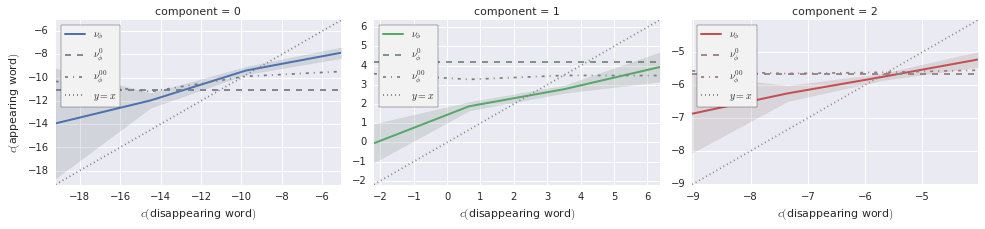

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.68298848  0.19563148]



aoa  frequency  letters_count
Component-0 -0.747822   0.383865      -0.541673
Component-1  0.379124  -0.422859      -0.823077

Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 39875) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   15 of 39875) |                     | Elapsed Time: 0:00:03 ETA: 2:23:30

  0% (   46 of 39875) |                     | Elapsed Time: 0:00:03 ETA: 0:49:44

  0% (   74 of 39875) |                     | Elapsed Time: 0:00:03 ETA: 0:32:44

  0% (  108 of 39875) |                     | Elapsed Time: 0:00:03 ETA: 0:23:40

  0% (  140 of 39875) |                     | Elapsed Time: 0:00:04 ETA: 0:04:26

  0% (  171 of 39875) |                     | Elapsed Time: 0:00:04 ETA: 0:04:24

  0% (  201 of 39875) |                     | Elapsed Time: 0:00:04 ETA: 0:04:22

  0% (  231 of 39875) |                     | Elapsed Time: 0:00:04 ETA: 0:04:26

  0% (  262 of 39875) |                     | Elapsed Time: 0:00:04 ETA: 0:04:29

  0% (  292 of 39875) |                     | Elapsed Time: 0:00:05 ETA: 0:04:31

  0% (  323 of 39875) |                     | Elapsed Time: 0:00:05 ETA: 0:04:30

  0% (  355 of 39875) |                     | Elapsed Time: 0:00:05 ETA: 0:04:27

  0% (  385 of 39875) |                     | Elapsed Time: 0:00:05 ETA: 0:04:26

  1% (  417 of 39875) |                     | Elapsed Time: 0:00:05 ETA: 0:04:23

  1% (  449 of 39875) |                     | Elapsed Time: 0:00:06 ETA: 0:04:19

  1% (  480 of 39875) |                     | Elapsed Time: 0:00:06 ETA: 0:04:20

  1% (  515 of 39875) |                     | Elapsed Time: 0:00:06 ETA: 0:04:20

  1% (  544 of 39875) |                     | Elapsed Time: 0:00:06 ETA: 0:04:23

  1% (  572 of 39875) |                     | Elapsed Time: 0:00:06 ETA: 0:04:29

  1% (  602 of 39875) |                     | Elapsed Time: 0:00:07 ETA: 0:04:33

  1% (  632 of 39875) |                     | Elapsed Time: 0:00:07 ETA: 0:04:33

  1% (  661 of 39875) |                     | Elapsed Time: 0:00:07 ETA: 0:04:38

  1% (  689 of 39875) |                     | Elapsed Time: 0:00:07 ETA: 0:04:38

  1% (  719 of 39875) |                     | Elapsed Time: 0:00:08 ETA: 0:04:36

  1% (  749 of 39875) |                     | Elapsed Time: 0:00:08 ETA: 0:04:35

  1% (  779 of 39875) |                     | Elapsed Time: 0:00:08 ETA: 0:04:35

  2% (  808 of 39875) |                     | Elapsed Time: 0:00:08 ETA: 0:04:34

  2% (  838 of 39875) |                     | Elapsed Time: 0:00:08 ETA: 0:04:31

  2% (  866 of 39875) |                     | Elapsed Time: 0:00:09 ETA: 0:04:35

  2% (  895 of 39875) |                     | Elapsed Time: 0:00:09 ETA: 0:04:33

  2% (  925 of 39875) |                     | Elapsed Time: 0:00:09 ETA: 0:04:33

  2% (  957 of 39875) |                     | Elapsed Time: 0:00:09 ETA: 0:04:30

  2% (  997 of 39875) |                     | Elapsed Time: 0:00:09 ETA: 0:04:23

  2% ( 1029 of 39875) |                     | Elapsed Time: 0:00:10 ETA: 0:04:16

  2% ( 1060 of 39875) |                     | Elapsed Time: 0:00:10 ETA: 0:04:14

  2% ( 1091 of 39875) |                     | Elapsed Time: 0:00:10 ETA: 0:04:13

  2% ( 1123 of 39875) |                     | Elapsed Time: 0:00:10 ETA: 0:04:12

  2% ( 1157 of 39875) |                     | Elapsed Time: 0:00:10 ETA: 0:04:09

  2% ( 1191 of 39875) |                     | Elapsed Time: 0:00:11 ETA: 0:04:05

  3% ( 1224 of 39875) |                     | Elapsed Time: 0:00:11 ETA: 0:04:04

  3% ( 1255 of 39875) |                     | Elapsed Time: 0:00:11 ETA: 0:04:03

  3% ( 1288 of 39875) |                     | Elapsed Time: 0:00:11 ETA: 0:04:03

  3% ( 1320 of 39875) |                     | Elapsed Time: 0:00:12 ETA: 0:04:06

  3% ( 1352 of 39875) |                     | Elapsed Time: 0:00:12 ETA: 0:04:09

  3% ( 1385 of 39875) |                     | Elapsed Time: 0:00:12 ETA: 0:04:06

  3% ( 1419 of 39875) |                     | Elapsed Time: 0:00:12 ETA: 0:04:04

  3% ( 1451 of 39875) |                     | Elapsed Time: 0:00:12 ETA: 0:04:04

  3% ( 1496 of 39875) |                     | Elapsed Time: 0:00:13 ETA: 0:04:04

  3% ( 1528 of 39875) |                     | Elapsed Time: 0:00:13 ETA: 0:04:02

  3% ( 1561 of 39875) |                     | Elapsed Time: 0:00:13 ETA: 0:04:03

  4% ( 1595 of 39875) |                     | Elapsed Time: 0:00:13 ETA: 0:04:01

  4% ( 1627 of 39875) |                     | Elapsed Time: 0:00:13 ETA: 0:04:02

  4% ( 1660 of 39875) |                     | Elapsed Time: 0:00:14 ETA: 0:04:03

  4% ( 1694 of 39875) |                     | Elapsed Time: 0:00:14 ETA: 0:04:00

  4% ( 1725 of 39875) |                     | Elapsed Time: 0:00:14 ETA: 0:04:03

  4% ( 1756 of 39875) |                     | Elapsed Time: 0:00:14 ETA: 0:04:04

  4% ( 1788 of 39875) |                     | Elapsed Time: 0:00:15 ETA: 0:04:06

  4% ( 1820 of 39875) |                     | Elapsed Time: 0:00:15 ETA: 0:04:07

  4% ( 1850 of 39875) |                     | Elapsed Time: 0:00:15 ETA: 0:04:15

  4% ( 1882 of 39875) |                     | Elapsed Time: 0:00:15 ETA: 0:04:11

  4% ( 1912 of 39875) |#                    | Elapsed Time: 0:00:15 ETA: 0:04:13

  4% ( 1943 of 39875) |#                    | Elapsed Time: 0:00:16 ETA: 0:04:13

  4% ( 1972 of 39875) |#                    | Elapsed Time: 0:00:16 ETA: 0:04:13

  5% ( 2009 of 39875) |#                    | Elapsed Time: 0:00:16 ETA: 0:04:16

  5% ( 2041 of 39875) |#                    | Elapsed Time: 0:00:16 ETA: 0:04:15

  5% ( 2071 of 39875) |#                    | Elapsed Time: 0:00:16 ETA: 0:04:16

  5% ( 2102 of 39875) |#                    | Elapsed Time: 0:00:17 ETA: 0:04:16

  5% ( 2132 of 39875) |#                    | Elapsed Time: 0:00:17 ETA: 0:04:16

  5% ( 2161 of 39875) |#                    | Elapsed Time: 0:00:17 ETA: 0:04:18

  5% ( 2192 of 39875) |#                    | Elapsed Time: 0:00:17 ETA: 0:04:17

  5% ( 2224 of 39875) |#                    | Elapsed Time: 0:00:17 ETA: 0:04:16

  5% ( 2257 of 39875) |#                    | Elapsed Time: 0:00:18 ETA: 0:04:10

  5% ( 2293 of 39875) |#                    | Elapsed Time: 0:00:18 ETA: 0:03:57

  5% ( 2328 of 39875) |#                    | Elapsed Time: 0:00:18 ETA: 0:03:51

  5% ( 2360 of 39875) |#                    | Elapsed Time: 0:00:18 ETA: 0:03:50

  5% ( 2392 of 39875) |#                    | Elapsed Time: 0:00:18 ETA: 0:03:47

  6% ( 2424 of 39875) |#                    | Elapsed Time: 0:00:19 ETA: 0:03:54

  6% ( 2459 of 39875) |#                    | Elapsed Time: 0:00:19 ETA: 0:03:54

  6% ( 2509 of 39875) |#                    | Elapsed Time: 0:00:19 ETA: 0:03:52

  6% ( 2542 of 39875) |#                    | Elapsed Time: 0:00:19 ETA: 0:03:50

  6% ( 2575 of 39875) |#                    | Elapsed Time: 0:00:20 ETA: 0:03:47

  6% ( 2609 of 39875) |#                    | Elapsed Time: 0:00:20 ETA: 0:03:46

  6% ( 2645 of 39875) |#                    | Elapsed Time: 0:00:20 ETA: 0:03:44

  6% ( 2681 of 39875) |#                    | Elapsed Time: 0:00:20 ETA: 0:03:39

  6% ( 2717 of 39875) |#                    | Elapsed Time: 0:00:20 ETA: 0:03:34

  6% ( 2753 of 39875) |#                    | Elapsed Time: 0:00:21 ETA: 0:03:30

  6% ( 2789 of 39875) |#                    | Elapsed Time: 0:00:21 ETA: 0:03:30

  7% ( 2825 of 39875) |#                    | Elapsed Time: 0:00:21 ETA: 0:03:30

  7% ( 2861 of 39875) |#                    | Elapsed Time: 0:00:21 ETA: 0:03:29

  7% ( 2895 of 39875) |#                    | Elapsed Time: 0:00:21 ETA: 0:03:33

  7% ( 2928 of 39875) |#                    | Elapsed Time: 0:00:22 ETA: 0:03:37

  7% ( 2958 of 39875) |#                    | Elapsed Time: 0:00:22 ETA: 0:03:46

  7% ( 2991 of 39875) |#                    | Elapsed Time: 0:00:22 ETA: 0:03:56

  7% ( 3020 of 39875) |#                    | Elapsed Time: 0:00:22 ETA: 0:04:09

  7% ( 3040 of 39875) |#                    | Elapsed Time: 0:00:23 ETA: 0:04:37

  7% ( 3059 of 39875) |#                    | Elapsed Time: 0:00:23 ETA: 0:05:05

  7% ( 3079 of 39875) |#                    | Elapsed Time: 0:00:23 ETA: 0:05:37

  7% ( 3099 of 39875) |#                    | Elapsed Time: 0:00:23 ETA: 0:06:16

  7% ( 3119 of 39875) |#                    | Elapsed Time: 0:00:23 ETA: 0:06:35

  7% ( 3139 of 39875) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:33

  7% ( 3159 of 39875) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:29

  7% ( 3179 of 39875) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:28

  8% ( 3199 of 39875) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:25

  8% ( 3219 of 39875) |#                    | Elapsed Time: 0:00:24 ETA: 0:06:24

  8% ( 3239 of 39875) |#                    | Elapsed Time: 0:00:25 ETA: 0:06:22

  8% ( 3259 of 39875) |#                    | Elapsed Time: 0:00:25 ETA: 0:06:22

  8% ( 3279 of 39875) |#                    | Elapsed Time: 0:00:25 ETA: 0:06:21

  8% ( 3303 of 39875) |#                    | Elapsed Time: 0:00:25 ETA: 0:06:03

  8% ( 3323 of 39875) |#                    | Elapsed Time: 0:00:25 ETA: 0:06:02

  8% ( 3342 of 39875) |#                    | Elapsed Time: 0:00:26 ETA: 0:06:04

  8% ( 3362 of 39875) |#                    | Elapsed Time: 0:00:26 ETA: 0:06:05

  8% ( 3383 of 39875) |#                    | Elapsed Time: 0:00:26 ETA: 0:06:13

  8% ( 3416 of 39875) |#                    | Elapsed Time: 0:00:26 ETA: 0:05:33

  8% ( 3452 of 39875) |#                    | Elapsed Time: 0:00:26 ETA: 0:04:46

  8% ( 3490 of 39875) |#                    | Elapsed Time: 0:00:27 ETA: 0:04:13

  8% ( 3524 of 39875) |#                    | Elapsed Time: 0:00:27 ETA: 0:03:48

  8% ( 3556 of 39875) |#                    | Elapsed Time: 0:00:27 ETA: 0:03:38

  8% ( 3588 of 39875) |#                    | Elapsed Time: 0:00:27 ETA: 0:03:43

  9% ( 3618 of 39875) |#                    | Elapsed Time: 0:00:28 ETA: 0:03:51

  9% ( 3650 of 39875) |#                    | Elapsed Time: 0:00:28 ETA: 0:03:59

  9% ( 3681 of 39875) |#                    | Elapsed Time: 0:00:28 ETA: 0:04:01

  9% ( 3711 of 39875) |#                    | Elapsed Time: 0:00:28 ETA: 0:04:05

  9% ( 3744 of 39875) |#                    | Elapsed Time: 0:00:28 ETA: 0:03:58

  9% ( 3777 of 39875) |#                    | Elapsed Time: 0:00:29 ETA: 0:03:55

  9% ( 3810 of 39875) |##                   | Elapsed Time: 0:00:29 ETA: 0:03:52

  9% ( 3844 of 39875) |##                   | Elapsed Time: 0:00:29 ETA: 0:03:47

  9% ( 3878 of 39875) |##                   | Elapsed Time: 0:00:29 ETA: 0:03:44

  9% ( 3910 of 39875) |##                   | Elapsed Time: 0:00:29 ETA: 0:03:43

  9% ( 3944 of 39875) |##                   | Elapsed Time: 0:00:30 ETA: 0:03:42

 10% ( 3988 of 39875) |##                   | Elapsed Time: 0:00:30 ETA: 0:03:39

 10% ( 4022 of 39875) |##                   | Elapsed Time: 0:00:30 ETA: 0:03:38

 10% ( 4054 of 39875) |##                   | Elapsed Time: 0:00:30 ETA: 0:03:38

 10% ( 4088 of 39875) |##                   | Elapsed Time: 0:00:30 ETA: 0:03:39

 10% ( 4122 of 39875) |##                   | Elapsed Time: 0:00:31 ETA: 0:03:39

 10% ( 4156 of 39875) |##                   | Elapsed Time: 0:00:31 ETA: 0:03:39

 10% ( 4190 of 39875) |##                   | Elapsed Time: 0:00:31 ETA: 0:03:38

 10% ( 4224 of 39875) |##                   | Elapsed Time: 0:00:31 ETA: 0:03:37

 10% ( 4255 of 39875) |##                   | Elapsed Time: 0:00:32 ETA: 0:03:42

 10% ( 4282 of 39875) |##                   | Elapsed Time: 0:00:32 ETA: 0:03:52

 10% ( 4310 of 39875) |##                   | Elapsed Time: 0:00:32 ETA: 0:04:02

 10% ( 4346 of 39875) |##                   | Elapsed Time: 0:00:32 ETA: 0:03:57

 10% ( 4381 of 39875) |##                   | Elapsed Time: 0:00:32 ETA: 0:03:53

 11% ( 4417 of 39875) |##                   | Elapsed Time: 0:00:33 ETA: 0:03:40

 11% ( 4451 of 39875) |##                   | Elapsed Time: 0:00:33 ETA: 0:03:27

 11% ( 4486 of 39875) |##                   | Elapsed Time: 0:00:33 ETA: 0:03:29

 11% ( 4519 of 39875) |##                   | Elapsed Time: 0:00:33 ETA: 0:03:33

 11% ( 4554 of 39875) |##                   | Elapsed Time: 0:00:33 ETA: 0:03:34

 11% ( 4590 of 39875) |##                   | Elapsed Time: 0:00:34 ETA: 0:03:31

 11% ( 4630 of 39875) |##                   | Elapsed Time: 0:00:34 ETA: 0:03:23

 11% ( 4659 of 39875) |##                   | Elapsed Time: 0:00:34 ETA: 0:03:26

 11% ( 4690 of 39875) |##                   | Elapsed Time: 0:00:34 ETA: 0:03:32

 11% ( 4722 of 39875) |##                   | Elapsed Time: 0:00:34 ETA: 0:03:38

 11% ( 4750 of 39875) |##                   | Elapsed Time: 0:00:35 ETA: 0:03:54

 12% ( 4786 of 39875) |##                   | Elapsed Time: 0:00:35 ETA: 0:03:57

 12% ( 4816 of 39875) |##                   | Elapsed Time: 0:00:35 ETA: 0:03:48

 12% ( 4840 of 39875) |##                   | Elapsed Time: 0:00:35 ETA: 0:04:02

 12% ( 4864 of 39875) |##                   | Elapsed Time: 0:00:35 ETA: 0:04:14

 12% ( 4889 of 39875) |##                   | Elapsed Time: 0:00:36 ETA: 0:04:31

 12% ( 4913 of 39875) |##                   | Elapsed Time: 0:00:36 ETA: 0:04:56

 12% ( 4937 of 39875) |##                   | Elapsed Time: 0:00:36 ETA: 0:05:01

 12% ( 4962 of 39875) |##                   | Elapsed Time: 0:00:36 ETA: 0:04:57

 12% ( 4998 of 39875) |##                   | Elapsed Time: 0:00:37 ETA: 0:04:55

 12% ( 5033 of 39875) |##                   | Elapsed Time: 0:00:37 ETA: 0:04:27

 12% ( 5069 of 39875) |##                   | Elapsed Time: 0:00:37 ETA: 0:04:04

 12% ( 5107 of 39875) |##                   | Elapsed Time: 0:00:37 ETA: 0:03:44

 12% ( 5139 of 39875) |##                   | Elapsed Time: 0:00:37 ETA: 0:03:35

 12% ( 5167 of 39875) |##                   | Elapsed Time: 0:00:38 ETA: 0:03:33

 13% ( 5196 of 39875) |##                   | Elapsed Time: 0:00:38 ETA: 0:03:45

 13% ( 5224 of 39875) |##                   | Elapsed Time: 0:00:38 ETA: 0:03:59

 13% ( 5252 of 39875) |##                   | Elapsed Time: 0:00:38 ETA: 0:04:14

 13% ( 5284 of 39875) |##                   | Elapsed Time: 0:00:38 ETA: 0:04:07

 13% ( 5312 of 39875) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:07

 13% ( 5340 of 39875) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:10

 13% ( 5368 of 39875) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:09

 13% ( 5396 of 39875) |##                   | Elapsed Time: 0:00:39 ETA: 0:04:14

 13% ( 5424 of 39875) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:18

 13% ( 5451 of 39875) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:18

 13% ( 5483 of 39875) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:17

 13% ( 5511 of 39875) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:18

 13% ( 5539 of 39875) |##                   | Elapsed Time: 0:00:40 ETA: 0:04:18

 13% ( 5567 of 39875) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:17

 14% ( 5595 of 39875) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:16

 14% ( 5624 of 39875) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:15

 14% ( 5653 of 39875) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:12

 14% ( 5681 of 39875) |##                   | Elapsed Time: 0:00:41 ETA: 0:04:12

 14% ( 5708 of 39875) |###                  | Elapsed Time: 0:00:42 ETA: 0:04:13

 14% ( 5736 of 39875) |###                  | Elapsed Time: 0:00:42 ETA: 0:04:15

 14% ( 5764 of 39875) |###                  | Elapsed Time: 0:00:42 ETA: 0:04:17

 14% ( 5792 of 39875) |###                  | Elapsed Time: 0:00:42 ETA: 0:04:17

 14% ( 5820 of 39875) |###                  | Elapsed Time: 0:00:42 ETA: 0:04:17

 14% ( 5849 of 39875) |###                  | Elapsed Time: 0:00:43 ETA: 0:04:14

 14% ( 5879 of 39875) |###                  | Elapsed Time: 0:00:43 ETA: 0:04:10

 14% ( 5907 of 39875) |###                  | Elapsed Time: 0:00:43 ETA: 0:04:07

 14% ( 5936 of 39875) |###                  | Elapsed Time: 0:00:43 ETA: 0:04:04

 14% ( 5964 of 39875) |###                  | Elapsed Time: 0:00:44 ETA: 0:04:03

 15% ( 5997 of 39875) |###                  | Elapsed Time: 0:00:44 ETA: 0:04:05

 15% ( 6026 of 39875) |###                  | Elapsed Time: 0:00:44 ETA: 0:04:06

 15% ( 6054 of 39875) |###                  | Elapsed Time: 0:00:44 ETA: 0:04:06

 15% ( 6082 of 39875) |###                  | Elapsed Time: 0:00:44 ETA: 0:04:08

 15% ( 6111 of 39875) |###                  | Elapsed Time: 0:00:45 ETA: 0:04:04

 15% ( 6140 of 39875) |###                  | Elapsed Time: 0:00:45 ETA: 0:04:04

 15% ( 6169 of 39875) |###                  | Elapsed Time: 0:00:45 ETA: 0:04:04

 15% ( 6199 of 39875) |###                  | Elapsed Time: 0:00:45 ETA: 0:04:00

 15% ( 6228 of 39875) |###                  | Elapsed Time: 0:00:45 ETA: 0:04:02

 15% ( 6256 of 39875) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:04

 15% ( 6285 of 39875) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:02

 15% ( 6314 of 39875) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:03

 15% ( 6342 of 39875) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:07

 15% ( 6372 of 39875) |###                  | Elapsed Time: 0:00:46 ETA: 0:04:05

 16% ( 6401 of 39875) |###                  | Elapsed Time: 0:00:47 ETA: 0:04:02

 16% ( 6429 of 39875) |###                  | Elapsed Time: 0:00:47 ETA: 0:04:04

 16% ( 6457 of 39875) |###                  | Elapsed Time: 0:00:47 ETA: 0:04:02

 16% ( 6494 of 39875) |###                  | Elapsed Time: 0:00:47 ETA: 0:04:05

 16% ( 6522 of 39875) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:06

 16% ( 6550 of 39875) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:08

 16% ( 6579 of 39875) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:06

 16% ( 6608 of 39875) |###                  | Elapsed Time: 0:00:48 ETA: 0:04:03

 16% ( 6638 of 39875) |###                  | Elapsed Time: 0:00:48 ETA: 0:03:57

 16% ( 6666 of 39875) |###                  | Elapsed Time: 0:00:49 ETA: 0:03:54

 16% ( 6696 of 39875) |###                  | Elapsed Time: 0:00:49 ETA: 0:03:55

 16% ( 6725 of 39875) |###                  | Elapsed Time: 0:00:49 ETA: 0:03:53

 16% ( 6755 of 39875) |###                  | Elapsed Time: 0:00:49 ETA: 0:03:54

 17% ( 6784 of 39875) |###                  | Elapsed Time: 0:00:49 ETA: 0:03:53

 17% ( 6826 of 39875) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:53

 17% ( 6857 of 39875) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:52

 17% ( 6887 of 39875) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:53

 17% ( 6918 of 39875) |###                  | Elapsed Time: 0:00:50 ETA: 0:03:51

 17% ( 6946 of 39875) |###                  | Elapsed Time: 0:00:51 ETA: 0:03:50

 17% ( 6979 of 39875) |###                  | Elapsed Time: 0:00:51 ETA: 0:03:53

 17% ( 7007 of 39875) |###                  | Elapsed Time: 0:00:51 ETA: 0:03:54

 17% ( 7034 of 39875) |###                  | Elapsed Time: 0:00:51 ETA: 0:04:00

 17% ( 7062 of 39875) |###                  | Elapsed Time: 0:00:51 ETA: 0:04:02

 17% ( 7090 of 39875) |###                  | Elapsed Time: 0:00:52 ETA: 0:04:03

 17% ( 7118 of 39875) |###                  | Elapsed Time: 0:00:52 ETA: 0:04:05

 17% ( 7146 of 39875) |###                  | Elapsed Time: 0:00:52 ETA: 0:04:07

 17% ( 7173 of 39875) |###                  | Elapsed Time: 0:00:52 ETA: 0:04:05

 18% ( 7201 of 39875) |###                  | Elapsed Time: 0:00:53 ETA: 0:04:05

 18% ( 7229 of 39875) |###                  | Elapsed Time: 0:00:53 ETA: 0:04:05

 18% ( 7256 of 39875) |###                  | Elapsed Time: 0:00:53 ETA: 0:04:06

 18% ( 7284 of 39875) |###                  | Elapsed Time: 0:00:53 ETA: 0:04:06

 18% ( 7312 of 39875) |###                  | Elapsed Time: 0:00:53 ETA: 0:04:04

 18% ( 7340 of 39875) |###                  | Elapsed Time: 0:00:54 ETA: 0:04:04

 18% ( 7367 of 39875) |###                  | Elapsed Time: 0:00:54 ETA: 0:04:03

 18% ( 7395 of 39875) |###                  | Elapsed Time: 0:00:54 ETA: 0:04:04

 18% ( 7424 of 39875) |###                  | Elapsed Time: 0:00:54 ETA: 0:04:01

 18% ( 7455 of 39875) |###                  | Elapsed Time: 0:00:54 ETA: 0:03:56

 18% ( 7491 of 39875) |###                  | Elapsed Time: 0:00:55 ETA: 0:03:57

 18% ( 7519 of 39875) |###                  | Elapsed Time: 0:00:55 ETA: 0:03:55

 18% ( 7548 of 39875) |###                  | Elapsed Time: 0:00:55 ETA: 0:03:54

 18% ( 7576 of 39875) |###                  | Elapsed Time: 0:00:55 ETA: 0:03:56

 19% ( 7604 of 39875) |####                 | Elapsed Time: 0:00:55 ETA: 0:04:00

 19% ( 7632 of 39875) |####                 | Elapsed Time: 0:00:56 ETA: 0:04:00

 19% ( 7661 of 39875) |####                 | Elapsed Time: 0:00:56 ETA: 0:03:58

 19% ( 7691 of 39875) |####                 | Elapsed Time: 0:00:56 ETA: 0:03:58

 19% ( 7733 of 39875) |####                 | Elapsed Time: 0:00:56 ETA: 0:03:53

 19% ( 7764 of 39875) |####                 | Elapsed Time: 0:00:57 ETA: 0:03:46

 19% ( 7798 of 39875) |####                 | Elapsed Time: 0:00:57 ETA: 0:03:37

 19% ( 7832 of 39875) |####                 | Elapsed Time: 0:00:57 ETA: 0:03:28

 19% ( 7866 of 39875) |####                 | Elapsed Time: 0:00:57 ETA: 0:03:20

 19% ( 7898 of 39875) |####                 | Elapsed Time: 0:00:57 ETA: 0:03:15

 19% ( 7948 of 39875) |####                 | Elapsed Time: 0:00:58 ETA: 0:03:14

 20% ( 7992 of 39875) |####                 | Elapsed Time: 0:00:58 ETA: 0:03:14

 20% ( 8026 of 39875) |####                 | Elapsed Time: 0:00:58 ETA: 0:03:15

 20% ( 8059 of 39875) |####                 | Elapsed Time: 0:00:58 ETA: 0:03:13

 20% ( 8093 of 39875) |####                 | Elapsed Time: 0:00:59 ETA: 0:03:13

 20% ( 8124 of 39875) |####                 | Elapsed Time: 0:00:59 ETA: 0:03:18

 20% ( 8153 of 39875) |####                 | Elapsed Time: 0:00:59 ETA: 0:03:25

 20% ( 8183 of 39875) |####                 | Elapsed Time: 0:00:59 ETA: 0:03:28

 20% ( 8213 of 39875) |####                 | Elapsed Time: 0:00:59 ETA: 0:03:34

 20% ( 8243 of 39875) |####                 | Elapsed Time: 0:01:00 ETA: 0:03:38

 20% ( 8274 of 39875) |####                 | Elapsed Time: 0:01:00 ETA: 0:03:36

 20% ( 8304 of 39875) |####                 | Elapsed Time: 0:01:00 ETA: 0:03:35

 20% ( 8333 of 39875) |####                 | Elapsed Time: 0:01:00 ETA: 0:03:36

 20% ( 8363 of 39875) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:37

 21% ( 8394 of 39875) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:35

 21% ( 8425 of 39875) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:36

 21% ( 8455 of 39875) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:32

 21% ( 8490 of 39875) |####                 | Elapsed Time: 0:01:01 ETA: 0:03:29

 21% ( 8521 of 39875) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:30

 21% ( 8550 of 39875) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:32

 21% ( 8579 of 39875) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:37

 21% ( 8609 of 39875) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:39

 21% ( 8638 of 39875) |####                 | Elapsed Time: 0:01:02 ETA: 0:03:41

 21% ( 8667 of 39875) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:41

 21% ( 8694 of 39875) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:42

 21% ( 8725 of 39875) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:39

 21% ( 8754 of 39875) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:41

 22% ( 8785 of 39875) |####                 | Elapsed Time: 0:01:03 ETA: 0:03:38

 22% ( 8816 of 39875) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:33

 22% ( 8846 of 39875) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:32

 22% ( 8875 of 39875) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:33

 22% ( 8907 of 39875) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:31

 22% ( 8937 of 39875) |####                 | Elapsed Time: 0:01:04 ETA: 0:03:31

 22% ( 8972 of 39875) |####                 | Elapsed Time: 0:01:05 ETA: 0:03:29

 22% ( 9002 of 39875) |####                 | Elapsed Time: 0:01:05 ETA: 0:03:28

 22% ( 9034 of 39875) |####                 | Elapsed Time: 0:01:05 ETA: 0:03:25

 22% ( 9065 of 39875) |####                 | Elapsed Time: 0:01:05 ETA: 0:03:23

 22% ( 9094 of 39875) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:26

 22% ( 9122 of 39875) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:32

 22% ( 9151 of 39875) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:35

 23% ( 9181 of 39875) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:34

 23% ( 9211 of 39875) |####                 | Elapsed Time: 0:01:06 ETA: 0:03:36

 23% ( 9243 of 39875) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:28

 23% ( 9275 of 39875) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:22

 23% ( 9307 of 39875) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:18

 23% ( 9340 of 39875) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:14

 23% ( 9371 of 39875) |####                 | Elapsed Time: 0:01:07 ETA: 0:03:16

 23% ( 9404 of 39875) |####                 | Elapsed Time: 0:01:08 ETA: 0:03:14

 23% ( 9435 of 39875) |####                 | Elapsed Time: 0:01:08 ETA: 0:03:15

 23% ( 9471 of 39875) |####                 | Elapsed Time: 0:01:08 ETA: 0:03:13

 23% ( 9503 of 39875) |#####                | Elapsed Time: 0:01:08 ETA: 0:03:13

 23% ( 9534 of 39875) |#####                | Elapsed Time: 0:01:08 ETA: 0:03:14

 23% ( 9566 of 39875) |#####                | Elapsed Time: 0:01:09 ETA: 0:03:16

 24% ( 9598 of 39875) |#####                | Elapsed Time: 0:01:09 ETA: 0:03:17

 24% ( 9631 of 39875) |#####                | Elapsed Time: 0:01:09 ETA: 0:03:16

 24% ( 9665 of 39875) |#####                | Elapsed Time: 0:01:09 ETA: 0:03:15

 24% ( 9697 of 39875) |#####                | Elapsed Time: 0:01:09 ETA: 0:03:14

 24% ( 9730 of 39875) |#####                | Elapsed Time: 0:01:10 ETA: 0:03:11

 24% ( 9762 of 39875) |#####                | Elapsed Time: 0:01:10 ETA: 0:03:11

 24% ( 9794 of 39875) |#####                | Elapsed Time: 0:01:10 ETA: 0:03:13

 24% ( 9828 of 39875) |#####                | Elapsed Time: 0:01:10 ETA: 0:03:12

 24% ( 9861 of 39875) |#####                | Elapsed Time: 0:01:11 ETA: 0:03:11

 24% ( 9894 of 39875) |#####                | Elapsed Time: 0:01:11 ETA: 0:03:10

 24% ( 9925 of 39875) |#####                | Elapsed Time: 0:01:11 ETA: 0:03:10

 25% ( 9969 of 39875) |#####                | Elapsed Time: 0:01:11 ETA: 0:03:11

 25% (10002 of 39875) |#####                | Elapsed Time: 0:01:11 ETA: 0:03:12

 25% (10035 of 39875) |#####                | Elapsed Time: 0:01:12 ETA: 0:03:13

 25% (10067 of 39875) |#####                | Elapsed Time: 0:01:12 ETA: 0:03:14

 25% (10101 of 39875) |#####                | Elapsed Time: 0:01:12 ETA: 0:03:11

 25% (10135 of 39875) |#####                | Elapsed Time: 0:01:12 ETA: 0:03:07

 25% (10169 of 39875) |#####                | Elapsed Time: 0:01:12 ETA: 0:03:06

 25% (10203 of 39875) |#####                | Elapsed Time: 0:01:13 ETA: 0:03:03

 25% (10236 of 39875) |#####                | Elapsed Time: 0:01:13 ETA: 0:03:03

 25% (10269 of 39875) |#####                | Elapsed Time: 0:01:13 ETA: 0:03:04

 25% (10299 of 39875) |#####                | Elapsed Time: 0:01:13 ETA: 0:03:07

 25% (10331 of 39875) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:10

 25% (10362 of 39875) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:13

 26% (10394 of 39875) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:14

 26% (10425 of 39875) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:14

 26% (10468 of 39875) |#####                | Elapsed Time: 0:01:14 ETA: 0:03:15

 26% (10497 of 39875) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:18

 26% (10528 of 39875) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:18

 26% (10554 of 39875) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:25

 26% (10580 of 39875) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:33

 26% (10606 of 39875) |#####                | Elapsed Time: 0:01:15 ETA: 0:03:41

 26% (10636 of 39875) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:43

 26% (10664 of 39875) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:48

 26% (10693 of 39875) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:38

 26% (10720 of 39875) |#####                | Elapsed Time: 0:01:16 ETA: 0:03:35

 26% (10754 of 39875) |#####                | Elapsed Time: 0:01:17 ETA: 0:03:27

 27% (10787 of 39875) |#####                | Elapsed Time: 0:01:17 ETA: 0:03:17

 27% (10820 of 39875) |#####                | Elapsed Time: 0:01:17 ETA: 0:03:15

 27% (10852 of 39875) |#####                | Elapsed Time: 0:01:17 ETA: 0:03:01

 27% (10885 of 39875) |#####                | Elapsed Time: 0:01:17 ETA: 0:03:02

 27% (10917 of 39875) |#####                | Elapsed Time: 0:01:18 ETA: 0:03:02

 27% (10966 of 39875) |#####                | Elapsed Time: 0:01:18 ETA: 0:03:01

 27% (10999 of 39875) |#####                | Elapsed Time: 0:01:18 ETA: 0:03:00

 27% (11030 of 39875) |#####                | Elapsed Time: 0:01:18 ETA: 0:03:02

 27% (11060 of 39875) |#####                | Elapsed Time: 0:01:18 ETA: 0:03:06

 27% (11087 of 39875) |#####                | Elapsed Time: 0:01:19 ETA: 0:03:12

 27% (11121 of 39875) |#####                | Elapsed Time: 0:01:19 ETA: 0:03:12

 27% (11155 of 39875) |#####                | Elapsed Time: 0:01:19 ETA: 0:03:07

 28% (11189 of 39875) |#####                | Elapsed Time: 0:01:19 ETA: 0:03:04

 28% (11223 of 39875) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:56

 28% (11257 of 39875) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:52

 28% (11291 of 39875) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:53

 28% (11326 of 39875) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:52

 28% (11358 of 39875) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:52

 28% (11390 of 39875) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:55

 28% (11425 of 39875) |######               | Elapsed Time: 0:01:21 ETA: 0:02:54

 28% (11465 of 39875) |######               | Elapsed Time: 0:01:21 ETA: 0:02:59

 28% (11497 of 39875) |######               | Elapsed Time: 0:01:21 ETA: 0:03:02

 28% (11528 of 39875) |######               | Elapsed Time: 0:01:21 ETA: 0:03:02

 28% (11559 of 39875) |######               | Elapsed Time: 0:01:22 ETA: 0:03:05

 29% (11590 of 39875) |######               | Elapsed Time: 0:01:22 ETA: 0:03:07

 29% (11620 of 39875) |######               | Elapsed Time: 0:01:22 ETA: 0:03:07

 29% (11651 of 39875) |######               | Elapsed Time: 0:01:22 ETA: 0:03:09

 29% (11681 of 39875) |######               | Elapsed Time: 0:01:22 ETA: 0:03:10

 29% (11715 of 39875) |######               | Elapsed Time: 0:01:23 ETA: 0:03:06

 29% (11750 of 39875) |######               | Elapsed Time: 0:01:23 ETA: 0:02:59

 29% (11786 of 39875) |######               | Elapsed Time: 0:01:23 ETA: 0:02:52

 29% (11822 of 39875) |######               | Elapsed Time: 0:01:23 ETA: 0:02:46

 29% (11857 of 39875) |######               | Elapsed Time: 0:01:23 ETA: 0:02:42

 29% (11891 of 39875) |######               | Elapsed Time: 0:01:24 ETA: 0:02:44

 29% (11923 of 39875) |######               | Elapsed Time: 0:01:24 ETA: 0:02:47

 29% (11948 of 39875) |######               | Elapsed Time: 0:01:24 ETA: 0:02:59

 30% (11976 of 39875) |######               | Elapsed Time: 0:01:24 ETA: 0:03:14

 30% (12002 of 39875) |######               | Elapsed Time: 0:01:25 ETA: 0:03:28

 30% (12028 of 39875) |######               | Elapsed Time: 0:01:25 ETA: 0:03:45

 30% (12054 of 39875) |######               | Elapsed Time: 0:01:25 ETA: 0:03:48

 30% (12079 of 39875) |######               | Elapsed Time: 0:01:25 ETA: 0:03:48

 30% (12105 of 39875) |######               | Elapsed Time: 0:01:25 ETA: 0:03:49

 30% (12131 of 39875) |######               | Elapsed Time: 0:01:26 ETA: 0:03:49

 30% (12156 of 39875) |######               | Elapsed Time: 0:01:26 ETA: 0:03:49

 30% (12182 of 39875) |######               | Elapsed Time: 0:01:26 ETA: 0:03:46

 30% (12208 of 39875) |######               | Elapsed Time: 0:01:26 ETA: 0:03:44

 30% (12234 of 39875) |######               | Elapsed Time: 0:01:26 ETA: 0:03:41

 30% (12266 of 39875) |######               | Elapsed Time: 0:01:27 ETA: 0:03:27

 30% (12300 of 39875) |######               | Elapsed Time: 0:01:27 ETA: 0:03:15

 30% (12334 of 39875) |######               | Elapsed Time: 0:01:27 ETA: 0:03:03

 31% (12368 of 39875) |######               | Elapsed Time: 0:01:27 ETA: 0:02:52

 31% (12402 of 39875) |######               | Elapsed Time: 0:01:27 ETA: 0:02:45

 31% (12436 of 39875) |######               | Elapsed Time: 0:01:28 ETA: 0:02:44

 31% (12478 of 39875) |######               | Elapsed Time: 0:01:28 ETA: 0:02:43

 31% (12513 of 39875) |######               | Elapsed Time: 0:01:28 ETA: 0:02:44

 31% (12547 of 39875) |######               | Elapsed Time: 0:01:28 ETA: 0:02:45

 31% (12581 of 39875) |######               | Elapsed Time: 0:01:29 ETA: 0:02:45

 31% (12615 of 39875) |######               | Elapsed Time: 0:01:29 ETA: 0:02:45

 31% (12649 of 39875) |######               | Elapsed Time: 0:01:29 ETA: 0:02:44

 31% (12682 of 39875) |######               | Elapsed Time: 0:01:29 ETA: 0:02:45

 31% (12715 of 39875) |######               | Elapsed Time: 0:01:29 ETA: 0:02:46

 31% (12748 of 39875) |######               | Elapsed Time: 0:01:30 ETA: 0:02:47

 32% (12780 of 39875) |######               | Elapsed Time: 0:01:30 ETA: 0:02:49

 32% (12808 of 39875) |######               | Elapsed Time: 0:01:30 ETA: 0:02:56

 32% (12836 of 39875) |######               | Elapsed Time: 0:01:30 ETA: 0:03:01

 32% (12864 of 39875) |######               | Elapsed Time: 0:01:30 ETA: 0:03:06

 32% (12892 of 39875) |######               | Elapsed Time: 0:01:31 ETA: 0:03:15

 32% (12920 of 39875) |######               | Elapsed Time: 0:01:31 ETA: 0:03:18

 32% (12960 of 39875) |######               | Elapsed Time: 0:01:31 ETA: 0:03:09

 32% (12998 of 39875) |######               | Elapsed Time: 0:01:31 ETA: 0:02:54

 32% (13034 of 39875) |######               | Elapsed Time: 0:01:31 ETA: 0:02:45

 32% (13067 of 39875) |######               | Elapsed Time: 0:01:32 ETA: 0:02:40

 32% (13099 of 39875) |######               | Elapsed Time: 0:01:32 ETA: 0:02:36

 32% (13130 of 39875) |######               | Elapsed Time: 0:01:32 ETA: 0:02:43

 33% (13159 of 39875) |######               | Elapsed Time: 0:01:32 ETA: 0:02:53

 33% (13188 of 39875) |######               | Elapsed Time: 0:01:32 ETA: 0:02:58

 33% (13220 of 39875) |######               | Elapsed Time: 0:01:33 ETA: 0:02:58

 33% (13253 of 39875) |######               | Elapsed Time: 0:01:33 ETA: 0:02:59

 33% (13285 of 39875) |######               | Elapsed Time: 0:01:33 ETA: 0:02:54

 33% (13318 of 39875) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:49

 33% (13350 of 39875) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:45

 33% (13383 of 39875) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:47

 33% (13417 of 39875) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:44

 33% (13458 of 39875) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:44

 33% (13490 of 39875) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:43

 33% (13524 of 39875) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:41

 34% (13561 of 39875) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:38

 34% (13597 of 39875) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:36

 34% (13631 of 39875) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:33

 34% (13665 of 39875) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:32

 34% (13699 of 39875) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:33

 34% (13733 of 39875) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:35

 34% (13765 of 39875) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:39

 34% (13796 of 39875) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:42

 34% (13826 of 39875) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:46

 34% (13858 of 39875) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:49

 34% (13889 of 39875) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:53

 34% (13920 of 39875) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:53

 35% (13957 of 39875) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:47

 35% (13992 of 39875) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:42

 35% (14023 of 39875) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:41

 35% (14049 of 39875) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:48

 35% (14085 of 39875) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:43

 35% (14122 of 39875) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:41

 35% (14157 of 39875) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:40

 35% (14189 of 39875) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:33

 35% (14225 of 39875) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:30

 35% (14262 of 39875) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:29

 35% (14300 of 39875) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:28

 35% (14338 of 39875) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:24

 36% (14376 of 39875) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:19

 36% (14414 of 39875) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:19

 36% (14455 of 39875) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:19

 36% (14492 of 39875) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:19

 36% (14529 of 39875) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:20

 36% (14566 of 39875) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:20

 36% (14601 of 39875) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:22

 36% (14635 of 39875) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:24

 36% (14669 of 39875) |#######              | Elapsed Time: 0:01:41 ETA: 0:02:26

 36% (14703 of 39875) |#######              | Elapsed Time: 0:01:42 ETA: 0:02:29

 36% (14733 of 39875) |#######              | Elapsed Time: 0:01:42 ETA: 0:02:34

 37% (14762 of 39875) |#######              | Elapsed Time: 0:01:42 ETA: 0:02:40

 37% (14788 of 39875) |#######              | Elapsed Time: 0:01:42 ETA: 0:02:51

 37% (14812 of 39875) |#######              | Elapsed Time: 0:01:42 ETA: 0:03:05

 37% (14836 of 39875) |#######              | Elapsed Time: 0:01:43 ETA: 0:03:21

 37% (14866 of 39875) |#######              | Elapsed Time: 0:01:43 ETA: 0:03:17

 37% (14899 of 39875) |#######              | Elapsed Time: 0:01:43 ETA: 0:03:05

 37% (14925 of 39875) |#######              | Elapsed Time: 0:01:43 ETA: 0:03:03

 37% (14954 of 39875) |#######              | Elapsed Time: 0:01:43 ETA: 0:02:59

 37% (14982 of 39875) |#######              | Elapsed Time: 0:01:44 ETA: 0:02:57

 37% (15010 of 39875) |#######              | Elapsed Time: 0:01:44 ETA: 0:03:04

 37% (15038 of 39875) |#######              | Elapsed Time: 0:01:44 ETA: 0:03:06

 37% (15066 of 39875) |#######              | Elapsed Time: 0:01:44 ETA: 0:03:05

 37% (15094 of 39875) |#######              | Elapsed Time: 0:01:45 ETA: 0:03:02

 37% (15125 of 39875) |#######              | Elapsed Time: 0:01:45 ETA: 0:02:59

 38% (15159 of 39875) |#######              | Elapsed Time: 0:01:45 ETA: 0:02:50

 38% (15193 of 39875) |########             | Elapsed Time: 0:01:45 ETA: 0:02:43

 38% (15227 of 39875) |########             | Elapsed Time: 0:01:45 ETA: 0:02:36

 38% (15261 of 39875) |########             | Elapsed Time: 0:01:46 ETA: 0:02:29

 38% (15296 of 39875) |########             | Elapsed Time: 0:01:46 ETA: 0:02:28

 38% (15331 of 39875) |########             | Elapsed Time: 0:01:46 ETA: 0:02:27

 38% (15366 of 39875) |########             | Elapsed Time: 0:01:46 ETA: 0:02:26

 38% (15401 of 39875) |########             | Elapsed Time: 0:01:46 ETA: 0:02:24

 38% (15432 of 39875) |########             | Elapsed Time: 0:01:47 ETA: 0:02:27

 38% (15467 of 39875) |########             | Elapsed Time: 0:01:47 ETA: 0:02:33

 38% (15497 of 39875) |########             | Elapsed Time: 0:01:47 ETA: 0:02:38

 38% (15521 of 39875) |########             | Elapsed Time: 0:01:47 ETA: 0:02:51

 39% (15555 of 39875) |########             | Elapsed Time: 0:01:47 ETA: 0:02:52

 39% (15587 of 39875) |########             | Elapsed Time: 0:01:48 ETA: 0:02:50

 39% (15622 of 39875) |########             | Elapsed Time: 0:01:48 ETA: 0:02:44

 39% (15657 of 39875) |########             | Elapsed Time: 0:01:48 ETA: 0:02:37

 39% (15689 of 39875) |########             | Elapsed Time: 0:01:48 ETA: 0:02:30

 39% (15726 of 39875) |########             | Elapsed Time: 0:01:48 ETA: 0:02:25

 39% (15762 of 39875) |########             | Elapsed Time: 0:01:49 ETA: 0:02:21

 39% (15796 of 39875) |########             | Elapsed Time: 0:01:49 ETA: 0:02:19

 39% (15831 of 39875) |########             | Elapsed Time: 0:01:49 ETA: 0:02:20

 39% (15866 of 39875) |########             | Elapsed Time: 0:01:49 ETA: 0:02:18

 39% (15897 of 39875) |########             | Elapsed Time: 0:01:50 ETA: 0:02:23

 39% (15928 of 39875) |########             | Elapsed Time: 0:01:50 ETA: 0:02:29

 40% (15965 of 39875) |########             | Elapsed Time: 0:01:50 ETA: 0:02:37

 40% (15996 of 39875) |########             | Elapsed Time: 0:01:50 ETA: 0:02:42

 40% (16032 of 39875) |########             | Elapsed Time: 0:01:50 ETA: 0:02:36

 40% (16067 of 39875) |########             | Elapsed Time: 0:01:51 ETA: 0:02:33

 40% (16102 of 39875) |########             | Elapsed Time: 0:01:51 ETA: 0:02:26

 40% (16136 of 39875) |########             | Elapsed Time: 0:01:51 ETA: 0:02:19

 40% (16170 of 39875) |########             | Elapsed Time: 0:01:51 ETA: 0:02:20

 40% (16203 of 39875) |########             | Elapsed Time: 0:01:51 ETA: 0:02:22

 40% (16237 of 39875) |########             | Elapsed Time: 0:01:52 ETA: 0:02:23

 40% (16269 of 39875) |########             | Elapsed Time: 0:01:52 ETA: 0:02:26

 40% (16300 of 39875) |########             | Elapsed Time: 0:01:52 ETA: 0:02:30

 40% (16321 of 39875) |########             | Elapsed Time: 0:01:52 ETA: 0:02:43

 40% (16343 of 39875) |########             | Elapsed Time: 0:01:52 ETA: 0:03:00

 41% (16362 of 39875) |########             | Elapsed Time: 0:01:53 ETA: 0:03:26

 41% (16384 of 39875) |########             | Elapsed Time: 0:01:53 ETA: 0:03:43

 41% (16402 of 39875) |########             | Elapsed Time: 0:01:53 ETA: 0:03:36

 41% (16449 of 39875) |########             | Elapsed Time: 0:01:59 ETA: 0:22:42

 41% (16485 of 39875) |########             | Elapsed Time: 0:01:59 ETA: 0:18:07

 41% (16520 of 39875) |########             | Elapsed Time: 0:01:59 ETA: 0:16:16

 41% (16550 of 39875) |########             | Elapsed Time: 0:02:00 ETA: 0:15:27

 41% (16578 of 39875) |########             | Elapsed Time: 0:02:00 ETA: 0:02:27

 41% (16608 of 39875) |########             | Elapsed Time: 0:02:00 ETA: 0:02:34

 41% (16638 of 39875) |########             | Elapsed Time: 0:02:00 ETA: 0:02:41

 41% (16668 of 39875) |########             | Elapsed Time: 0:02:00 ETA: 0:02:47

 41% (16696 of 39875) |########             | Elapsed Time: 0:02:01 ETA: 0:02:46

 41% (16744 of 39875) |########             | Elapsed Time: 0:02:01 ETA: 0:02:39

 42% (16781 of 39875) |########             | Elapsed Time: 0:02:01 ETA: 0:02:31

 42% (16814 of 39875) |########             | Elapsed Time: 0:02:01 ETA: 0:02:27

 42% (16845 of 39875) |########             | Elapsed Time: 0:02:01 ETA: 0:02:23

 42% (16876 of 39875) |########             | Elapsed Time: 0:02:02 ETA: 0:02:23

 42% (16910 of 39875) |########             | Elapsed Time: 0:02:02 ETA: 0:02:23

 42% (16947 of 39875) |########             | Elapsed Time: 0:02:02 ETA: 0:02:31

 42% (16981 of 39875) |########             | Elapsed Time: 0:02:02 ETA: 0:02:26

 42% (17016 of 39875) |########             | Elapsed Time: 0:02:03 ETA: 0:02:22

 42% (17050 of 39875) |########             | Elapsed Time: 0:02:03 ETA: 0:02:21

 42% (17084 of 39875) |########             | Elapsed Time: 0:02:03 ETA: 0:02:20

 42% (17118 of 39875) |#########            | Elapsed Time: 0:02:03 ETA: 0:02:17

 43% (17155 of 39875) |#########            | Elapsed Time: 0:02:03 ETA: 0:02:16

 43% (17190 of 39875) |#########            | Elapsed Time: 0:02:04 ETA: 0:02:14

 43% (17223 of 39875) |#########            | Elapsed Time: 0:02:04 ETA: 0:02:15

 43% (17256 of 39875) |#########            | Elapsed Time: 0:02:04 ETA: 0:02:13

 43% (17290 of 39875) |#########            | Elapsed Time: 0:02:04 ETA: 0:02:15

 43% (17324 of 39875) |#########            | Elapsed Time: 0:02:04 ETA: 0:02:18

 43% (17357 of 39875) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:18

 43% (17390 of 39875) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:19

 43% (17422 of 39875) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:20

 43% (17462 of 39875) |#########            | Elapsed Time: 0:02:05 ETA: 0:02:22

 43% (17494 of 39875) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:23

 43% (17527 of 39875) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:23

 44% (17558 of 39875) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:24

 44% (17589 of 39875) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:25

 44% (17619 of 39875) |#########            | Elapsed Time: 0:02:06 ETA: 0:02:26

 44% (17649 of 39875) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:27

 44% (17680 of 39875) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:30

 44% (17711 of 39875) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:28

 44% (17741 of 39875) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:29

 44% (17767 of 39875) |#########            | Elapsed Time: 0:02:07 ETA: 0:02:33

 44% (17793 of 39875) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:38

 44% (17820 of 39875) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:43

 44% (17847 of 39875) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:50

 44% (17873 of 39875) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:51

 44% (17905 of 39875) |#########            | Elapsed Time: 0:02:08 ETA: 0:02:43

 45% (17944 of 39875) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:35

 45% (17976 of 39875) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:29

 45% (18010 of 39875) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:22

 45% (18039 of 39875) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:22

 45% (18071 of 39875) |#########            | Elapsed Time: 0:02:09 ETA: 0:02:22

 45% (18101 of 39875) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:23

 45% (18132 of 39875) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:25

 45% (18164 of 39875) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:24

 45% (18197 of 39875) |#########            | Elapsed Time: 0:02:10 ETA: 0:02:22

 45% (18230 of 39875) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:19

 45% (18263 of 39875) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:18

 45% (18295 of 39875) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:17

 45% (18329 of 39875) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:15

 46% (18366 of 39875) |#########            | Elapsed Time: 0:02:11 ETA: 0:02:11

 46% (18400 of 39875) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:09

 46% (18443 of 39875) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:09

 46% (18475 of 39875) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:12

 46% (18508 of 39875) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:14

 46% (18542 of 39875) |#########            | Elapsed Time: 0:02:12 ETA: 0:02:16

 46% (18576 of 39875) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:12

 46% (18606 of 39875) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:14

 46% (18632 of 39875) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:19

 46% (18659 of 39875) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:27

 46% (18685 of 39875) |#########            | Elapsed Time: 0:02:13 ETA: 0:02:35

 46% (18711 of 39875) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:44

 46% (18739 of 39875) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:42

 47% (18771 of 39875) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:36

 47% (18798 of 39875) |#########            | Elapsed Time: 0:02:14 ETA: 0:02:35

 47% (18828 of 39875) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:31

 47% (18860 of 39875) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:24

 47% (18893 of 39875) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:21

 47% (18941 of 39875) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:17

 47% (18975 of 39875) |#########            | Elapsed Time: 0:02:15 ETA: 0:02:10

 47% (19006 of 39875) |##########           | Elapsed Time: 0:02:16 ETA: 0:02:11

 47% (19036 of 39875) |##########           | Elapsed Time: 0:02:16 ETA: 0:02:12

 47% (19066 of 39875) |##########           | Elapsed Time: 0:02:16 ETA: 0:02:14

 47% (19096 of 39875) |##########           | Elapsed Time: 0:02:16 ETA: 0:02:18

 47% (19128 of 39875) |##########           | Elapsed Time: 0:02:16 ETA: 0:02:18

 48% (19159 of 39875) |##########           | Elapsed Time: 0:02:17 ETA: 0:02:17

 48% (19194 of 39875) |##########           | Elapsed Time: 0:02:17 ETA: 0:02:12

 48% (19226 of 39875) |##########           | Elapsed Time: 0:02:17 ETA: 0:02:11

 48% (19252 of 39875) |##########           | Elapsed Time: 0:02:17 ETA: 0:02:16

 48% (19282 of 39875) |##########           | Elapsed Time: 0:02:17 ETA: 0:02:18

 48% (19315 of 39875) |##########           | Elapsed Time: 0:02:18 ETA: 0:02:17

 48% (19347 of 39875) |##########           | Elapsed Time: 0:02:18 ETA: 0:02:22

 48% (19381 of 39875) |##########           | Elapsed Time: 0:02:18 ETA: 0:02:15

 48% (19413 of 39875) |##########           | Elapsed Time: 0:02:18 ETA: 0:02:10

 48% (19456 of 39875) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:11

 48% (19488 of 39875) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:10

 48% (19520 of 39875) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:11

 49% (19552 of 39875) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:10

 49% (19584 of 39875) |##########           | Elapsed Time: 0:02:19 ETA: 0:02:10

 49% (19616 of 39875) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:09

 49% (19647 of 39875) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:10

 49% (19679 of 39875) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:10

 49% (19710 of 39875) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:11

 49% (19744 of 39875) |##########           | Elapsed Time: 0:02:20 ETA: 0:02:09

 49% (19779 of 39875) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:05

 49% (19814 of 39875) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:03

 49% (19844 of 39875) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:04

 49% (19869 of 39875) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:11

 49% (19895 of 39875) |##########           | Elapsed Time: 0:02:21 ETA: 0:02:20

 49% (19921 of 39875) |##########           | Elapsed Time: 0:02:22 ETA: 0:02:29

 50% (19951 of 39875) |##########           | Elapsed Time: 0:02:22 ETA: 0:02:41

 50% (19977 of 39875) |##########           | Elapsed Time: 0:02:22 ETA: 0:02:41

 50% (20008 of 39875) |##########           | Elapsed Time: 0:02:22 ETA: 0:02:32

 50% (20040 of 39875) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:24

 50% (20072 of 39875) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:17

 50% (20120 of 39875) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:06

 50% (20168 of 39875) |##########           | Elapsed Time: 0:02:23 ETA: 0:02:04

 50% (20201 of 39875) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:03

 50% (20237 of 39875) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:00

 50% (20260 of 39875) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:08

 50% (20296 of 39875) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:05

 50% (20331 of 39875) |##########           | Elapsed Time: 0:02:24 ETA: 0:02:03

 51% (20365 of 39875) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:03

 51% (20397 of 39875) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:00

 51% (20436 of 39875) |##########           | Elapsed Time: 0:02:25 ETA: 0:01:58

 51% (20467 of 39875) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:03

 51% (20497 of 39875) |##########           | Elapsed Time: 0:02:25 ETA: 0:02:06

 51% (20527 of 39875) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:09

 51% (20558 of 39875) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:10

 51% (20588 of 39875) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:12

 51% (20619 of 39875) |##########           | Elapsed Time: 0:02:26 ETA: 0:02:10

 51% (20644 of 39875) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:16

 51% (20673 of 39875) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:17

 51% (20707 of 39875) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:13

 52% (20738 of 39875) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:12

 52% (20768 of 39875) |##########           | Elapsed Time: 0:02:27 ETA: 0:02:10

 52% (20802 of 39875) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:03

 52% (20828 of 39875) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:07

 52% (20862 of 39875) |##########           | Elapsed Time: 0:02:28 ETA: 0:02:05

 52% (20896 of 39875) |###########          | Elapsed Time: 0:02:28 ETA: 0:02:03

 52% (20935 of 39875) |###########          | Elapsed Time: 0:02:28 ETA: 0:02:03

 52% (20966 of 39875) |###########          | Elapsed Time: 0:02:29 ETA: 0:02:05

 52% (20994 of 39875) |###########          | Elapsed Time: 0:02:29 ETA: 0:02:04

 52% (21025 of 39875) |###########          | Elapsed Time: 0:02:29 ETA: 0:02:07

 52% (21057 of 39875) |###########          | Elapsed Time: 0:02:29 ETA: 0:02:08

 52% (21087 of 39875) |###########          | Elapsed Time: 0:02:29 ETA: 0:02:09

 52% (21123 of 39875) |###########          | Elapsed Time: 0:02:30 ETA: 0:02:03

 53% (21157 of 39875) |###########          | Elapsed Time: 0:02:30 ETA: 0:01:58

 53% (21186 of 39875) |###########          | Elapsed Time: 0:02:30 ETA: 0:02:00

 53% (21211 of 39875) |###########          | Elapsed Time: 0:02:30 ETA: 0:02:04

 53% (21235 of 39875) |###########          | Elapsed Time: 0:02:30 ETA: 0:02:12

 53% (21263 of 39875) |###########          | Elapsed Time: 0:02:31 ETA: 0:02:20

 53% (21296 of 39875) |###########          | Elapsed Time: 0:02:31 ETA: 0:02:17

 53% (21343 of 39875) |###########          | Elapsed Time: 0:02:31 ETA: 0:02:08

 53% (21372 of 39875) |###########          | Elapsed Time: 0:02:31 ETA: 0:02:04

 53% (21402 of 39875) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:02

 53% (21433 of 39875) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:06

 53% (21463 of 39875) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:08

 53% (21495 of 39875) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:06

 53% (21528 of 39875) |###########          | Elapsed Time: 0:02:32 ETA: 0:02:01

 54% (21565 of 39875) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:56

 54% (21597 of 39875) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:54

 54% (21629 of 39875) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:52

 54% (21660 of 39875) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:53

 54% (21690 of 39875) |###########          | Elapsed Time: 0:02:33 ETA: 0:01:58

 54% (21721 of 39875) |###########          | Elapsed Time: 0:02:34 ETA: 0:02:00

 54% (21757 of 39875) |###########          | Elapsed Time: 0:02:34 ETA: 0:01:56

 54% (21792 of 39875) |###########          | Elapsed Time: 0:02:34 ETA: 0:01:53

 54% (21830 of 39875) |###########          | Elapsed Time: 0:02:34 ETA: 0:01:47

 54% (21862 of 39875) |###########          | Elapsed Time: 0:02:35 ETA: 0:01:46

 54% (21892 of 39875) |###########          | Elapsed Time: 0:02:35 ETA: 0:01:48

 55% (21932 of 39875) |###########          | Elapsed Time: 0:02:35 ETA: 0:01:53

 55% (21962 of 39875) |###########          | Elapsed Time: 0:02:35 ETA: 0:02:00

 55% (21992 of 39875) |###########          | Elapsed Time: 0:02:35 ETA: 0:02:04

 55% (22022 of 39875) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:04

 55% (22051 of 39875) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:04

 55% (22081 of 39875) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:03

 55% (22111 of 39875) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:03

 55% (22142 of 39875) |###########          | Elapsed Time: 0:02:36 ETA: 0:02:02

 55% (22174 of 39875) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:59

 55% (22204 of 39875) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:59

 55% (22237 of 39875) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:57

 55% (22273 of 39875) |###########          | Elapsed Time: 0:02:37 ETA: 0:01:52

 55% (22309 of 39875) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:49

 56% (22345 of 39875) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:45

 56% (22377 of 39875) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:44

 56% (22408 of 39875) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:46

 56% (22445 of 39875) |###########          | Elapsed Time: 0:02:38 ETA: 0:01:50

 56% (22476 of 39875) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:53

 56% (22507 of 39875) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:55

 56% (22538 of 39875) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:56

 56% (22569 of 39875) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:55

 56% (22599 of 39875) |###########          | Elapsed Time: 0:02:39 ETA: 0:01:55

 56% (22644 of 39875) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:55

 56% (22676 of 39875) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:55

 56% (22707 of 39875) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:55

 57% (22738 of 39875) |###########          | Elapsed Time: 0:02:40 ETA: 0:01:54

 57% (22771 of 39875) |###########          | Elapsed Time: 0:02:41 ETA: 0:01:52

 57% (22807 of 39875) |############         | Elapsed Time: 0:02:41 ETA: 0:01:49

 57% (22839 of 39875) |############         | Elapsed Time: 0:02:41 ETA: 0:01:47

 57% (22871 of 39875) |############         | Elapsed Time: 0:02:41 ETA: 0:01:46

 57% (22906 of 39875) |############         | Elapsed Time: 0:02:41 ETA: 0:01:43

 57% (22947 of 39875) |############         | Elapsed Time: 0:02:42 ETA: 0:01:44

 57% (22982 of 39875) |############         | Elapsed Time: 0:02:42 ETA: 0:01:42

 57% (23018 of 39875) |############         | Elapsed Time: 0:02:42 ETA: 0:01:39

 57% (23053 of 39875) |############         | Elapsed Time: 0:02:42 ETA: 0:01:39

 57% (23087 of 39875) |############         | Elapsed Time: 0:02:42 ETA: 0:01:38

 57% (23122 of 39875) |############         | Elapsed Time: 0:02:43 ETA: 0:01:38

 58% (23160 of 39875) |############         | Elapsed Time: 0:02:43 ETA: 0:01:36

 58% (23193 of 39875) |############         | Elapsed Time: 0:02:43 ETA: 0:01:37

 58% (23226 of 39875) |############         | Elapsed Time: 0:02:43 ETA: 0:01:38

 58% (23257 of 39875) |############         | Elapsed Time: 0:02:43 ETA: 0:01:39

 58% (23289 of 39875) |############         | Elapsed Time: 0:02:44 ETA: 0:01:43

 58% (23319 of 39875) |############         | Elapsed Time: 0:02:44 ETA: 0:01:47

 58% (23348 of 39875) |############         | Elapsed Time: 0:02:44 ETA: 0:01:51

 58% (23374 of 39875) |############         | Elapsed Time: 0:02:44 ETA: 0:01:56

 58% (23397 of 39875) |############         | Elapsed Time: 0:02:45 ETA: 0:02:03

 58% (23427 of 39875) |############         | Elapsed Time: 0:02:45 ETA: 0:02:04

 58% (23460 of 39875) |############         | Elapsed Time: 0:02:45 ETA: 0:01:59

 58% (23495 of 39875) |############         | Elapsed Time: 0:02:45 ETA: 0:01:54

 59% (23528 of 39875) |############         | Elapsed Time: 0:02:45 ETA: 0:01:49

 59% (23560 of 39875) |############         | Elapsed Time: 0:02:46 ETA: 0:01:43

 59% (23592 of 39875) |############         | Elapsed Time: 0:02:46 ETA: 0:01:42

 59% (23625 of 39875) |############         | Elapsed Time: 0:02:46 ETA: 0:01:43

 59% (23659 of 39875) |############         | Elapsed Time: 0:02:46 ETA: 0:01:42

 59% (23693 of 39875) |############         | Elapsed Time: 0:02:46 ETA: 0:01:40

 59% (23727 of 39875) |############         | Elapsed Time: 0:02:47 ETA: 0:01:39

 59% (23761 of 39875) |############         | Elapsed Time: 0:02:47 ETA: 0:01:37

 59% (23795 of 39875) |############         | Elapsed Time: 0:02:47 ETA: 0:01:37

 59% (23829 of 39875) |############         | Elapsed Time: 0:02:47 ETA: 0:01:37

 59% (23863 of 39875) |############         | Elapsed Time: 0:02:47 ETA: 0:01:37

 59% (23897 of 39875) |############         | Elapsed Time: 0:02:48 ETA: 0:01:36

 60% (23942 of 39875) |############         | Elapsed Time: 0:02:48 ETA: 0:01:36

 60% (23976 of 39875) |############         | Elapsed Time: 0:02:48 ETA: 0:01:36

 60% (24008 of 39875) |############         | Elapsed Time: 0:02:48 ETA: 0:01:37

 60% (24041 of 39875) |############         | Elapsed Time: 0:02:48 ETA: 0:01:38

 60% (24073 of 39875) |############         | Elapsed Time: 0:02:49 ETA: 0:01:39

 60% (24104 of 39875) |############         | Elapsed Time: 0:02:49 ETA: 0:01:40

 60% (24136 of 39875) |############         | Elapsed Time: 0:02:49 ETA: 0:01:41

 60% (24167 of 39875) |############         | Elapsed Time: 0:02:49 ETA: 0:01:43

 60% (24197 of 39875) |############         | Elapsed Time: 0:02:50 ETA: 0:01:44

 60% (24227 of 39875) |############         | Elapsed Time: 0:02:50 ETA: 0:01:46

 60% (24258 of 39875) |############         | Elapsed Time: 0:02:50 ETA: 0:01:46

 60% (24289 of 39875) |############         | Elapsed Time: 0:02:50 ETA: 0:01:46

 60% (24320 of 39875) |############         | Elapsed Time: 0:02:50 ETA: 0:01:45

 61% (24352 of 39875) |############         | Elapsed Time: 0:02:51 ETA: 0:01:43

 61% (24383 of 39875) |############         | Elapsed Time: 0:02:51 ETA: 0:01:43

 61% (24424 of 39875) |############         | Elapsed Time: 0:02:51 ETA: 0:01:44

 61% (24452 of 39875) |############         | Elapsed Time: 0:02:51 ETA: 0:01:45

 61% (24486 of 39875) |############         | Elapsed Time: 0:02:51 ETA: 0:01:43

 61% (24521 of 39875) |############         | Elapsed Time: 0:02:52 ETA: 0:01:41

 61% (24558 of 39875) |############         | Elapsed Time: 0:02:52 ETA: 0:01:37

 61% (24596 of 39875) |############         | Elapsed Time: 0:02:52 ETA: 0:01:30

 61% (24634 of 39875) |############         | Elapsed Time: 0:02:52 ETA: 0:01:25

 61% (24674 of 39875) |############         | Elapsed Time: 0:02:53 ETA: 0:01:22

 61% (24711 of 39875) |#############        | Elapsed Time: 0:02:53 ETA: 0:01:21

 62% (24747 of 39875) |#############        | Elapsed Time: 0:02:53 ETA: 0:01:22

 62% (24783 of 39875) |#############        | Elapsed Time: 0:02:53 ETA: 0:01:22

 62% (24819 of 39875) |#############        | Elapsed Time: 0:02:53 ETA: 0:01:23

 62% (24855 of 39875) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:24

 62% (24893 of 39875) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:24

 62% (24937 of 39875) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:25

 62% (24970 of 39875) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:27

 62% (25004 of 39875) |#############        | Elapsed Time: 0:02:54 ETA: 0:01:28

 62% (25039 of 39875) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:28

 62% (25073 of 39875) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:31

 62% (25107 of 39875) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:28

 63% (25142 of 39875) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:28

 63% (25177 of 39875) |#############        | Elapsed Time: 0:02:55 ETA: 0:01:28

 63% (25213 of 39875) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:27

 63% (25249 of 39875) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:25

 63% (25284 of 39875) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:25

 63% (25318 of 39875) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:24

 63% (25353 of 39875) |#############        | Elapsed Time: 0:02:56 ETA: 0:01:25

 63% (25392 of 39875) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:22

 63% (25436 of 39875) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:26

 63% (25472 of 39875) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:26

 63% (25504 of 39875) |#############        | Elapsed Time: 0:02:57 ETA: 0:01:27

 64% (25536 of 39875) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:30

 64% (25568 of 39875) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:31

 64% (25602 of 39875) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:29

 64% (25632 of 39875) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:32

 64% (25665 of 39875) |#############        | Elapsed Time: 0:02:58 ETA: 0:01:30

 64% (25703 of 39875) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:26

 64% (25741 of 39875) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:23

 64% (25778 of 39875) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:21

 64% (25810 of 39875) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:19

 64% (25844 of 39875) |#############        | Elapsed Time: 0:02:59 ETA: 0:01:21

 64% (25883 of 39875) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:20

 65% (25919 of 39875) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:21

 65% (25953 of 39875) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:21

 65% (25986 of 39875) |#############        | Elapsed Time: 0:03:00 ETA: 0:01:21

 65% (26018 of 39875) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:23

 65% (26050 of 39875) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:26

 65% (26083 of 39875) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:26

 65% (26117 of 39875) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:26

 65% (26149 of 39875) |#############        | Elapsed Time: 0:03:01 ETA: 0:01:26

 65% (26181 of 39875) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:26

 65% (26213 of 39875) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:26

 65% (26247 of 39875) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:25

 65% (26279 of 39875) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:25

 65% (26311 of 39875) |#############        | Elapsed Time: 0:03:02 ETA: 0:01:25

 66% (26343 of 39875) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:24

 66% (26376 of 39875) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:25

 66% (26418 of 39875) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:23

 66% (26455 of 39875) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:20

 66% (26488 of 39875) |#############        | Elapsed Time: 0:03:03 ETA: 0:01:19

 66% (26515 of 39875) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:22

 66% (26539 of 39875) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:28

 66% (26569 of 39875) |#############        | Elapsed Time: 0:03:04 ETA: 0:01:32

 66% (26619 of 39875) |##############       | Elapsed Time: 0:03:04 ETA: 0:01:32

 66% (26651 of 39875) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:28

 66% (26681 of 39875) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:24

 66% (26710 of 39875) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:25

 67% (26740 of 39875) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:28

 67% (26769 of 39875) |##############       | Elapsed Time: 0:03:05 ETA: 0:01:30

 67% (26805 of 39875) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:28

 67% (26831 of 39875) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:30

 67% (26849 of 39875) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:39

 67% (26867 of 39875) |##############       | Elapsed Time: 0:03:06 ETA: 0:01:50

 67% (26886 of 39875) |##############       | Elapsed Time: 0:03:06 ETA: 0:02:06

 67% (26905 of 39875) |##############       | Elapsed Time: 0:03:07 ETA: 0:02:31

 67% (26925 of 39875) |##############       | Elapsed Time: 0:03:07 ETA: 0:02:31

 67% (26943 of 39875) |##############       | Elapsed Time: 0:03:07 ETA: 0:02:31

 67% (26961 of 39875) |##############       | Elapsed Time: 0:03:07 ETA: 0:02:29

 67% (26990 of 39875) |##############       | Elapsed Time: 0:03:08 ETA: 0:02:13

 67% (27018 of 39875) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:58

 67% (27051 of 39875) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:41

 67% (27085 of 39875) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:29

 68% (27120 of 39875) |##############       | Elapsed Time: 0:03:08 ETA: 0:01:20

 68% (27156 of 39875) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:17

 68% (27192 of 39875) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:14

 68% (27228 of 39875) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:13

 68% (27266 of 39875) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:11

 68% (27302 of 39875) |##############       | Elapsed Time: 0:03:09 ETA: 0:01:11

 68% (27331 of 39875) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:14

 68% (27363 of 39875) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:15

 68% (27415 of 39875) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:16

 68% (27452 of 39875) |##############       | Elapsed Time: 0:03:10 ETA: 0:01:15

 68% (27489 of 39875) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:12

 69% (27524 of 39875) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:10

 69% (27560 of 39875) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:09

 69% (27590 of 39875) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:12

 69% (27625 of 39875) |##############       | Elapsed Time: 0:03:11 ETA: 0:01:12

 69% (27663 of 39875) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:11

 69% (27701 of 39875) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:10

 69% (27732 of 39875) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:09

 69% (27766 of 39875) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:10

 69% (27799 of 39875) |##############       | Elapsed Time: 0:03:12 ETA: 0:01:12

 69% (27835 of 39875) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:12

 69% (27873 of 39875) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:12

 70% (27913 of 39875) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:09

 70% (27951 of 39875) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:07

 70% (27985 of 39875) |##############       | Elapsed Time: 0:03:13 ETA: 0:01:08

 70% (28018 of 39875) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:09

 70% (28051 of 39875) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:11

 70% (28084 of 39875) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:12

 70% (28117 of 39875) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:13

 70% (28150 of 39875) |##############       | Elapsed Time: 0:03:14 ETA: 0:01:13

 70% (28175 of 39875) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:17

 70% (28203 of 39875) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:19

 70% (28232 of 39875) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:22

 70% (28262 of 39875) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:24

 70% (28291 of 39875) |##############       | Elapsed Time: 0:03:15 ETA: 0:01:25

 71% (28321 of 39875) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:21

 71% (28357 of 39875) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:16

 71% (28392 of 39875) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:13

 71% (28426 of 39875) |##############       | Elapsed Time: 0:03:16 ETA: 0:01:12

 71% (28462 of 39875) |##############       | Elapsed Time: 0:03:17 ETA: 0:01:08

 71% (28492 of 39875) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:10

 71% (28522 of 39875) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:13

 71% (28554 of 39875) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:14

 71% (28589 of 39875) |###############      | Elapsed Time: 0:03:17 ETA: 0:01:12

 71% (28626 of 39875) |###############      | Elapsed Time: 0:03:18 ETA: 0:01:10

 71% (28664 of 39875) |###############      | Elapsed Time: 0:03:18 ETA: 0:01:06

 71% (28696 of 39875) |###############      | Elapsed Time: 0:03:18 ETA: 0:01:04

 72% (28717 of 39875) |###############      | Elapsed Time: 0:03:18 ETA: 0:01:11

 72% (28737 of 39875) |###############      | Elapsed Time: 0:03:18 ETA: 0:01:19

 72% (28757 of 39875) |###############      | Elapsed Time: 0:03:19 ETA: 0:01:32

 72% (28788 of 39875) |###############      | Elapsed Time: 0:03:19 ETA: 0:01:38

 72% (28823 of 39875) |###############      | Elapsed Time: 0:03:19 ETA: 0:01:28

 72% (28853 of 39875) |###############      | Elapsed Time: 0:03:19 ETA: 0:01:21

 72% (28890 of 39875) |###############      | Elapsed Time: 0:03:19 ETA: 0:01:11

 72% (28930 of 39875) |###############      | Elapsed Time: 0:03:20 ETA: 0:01:04

 72% (28966 of 39875) |###############      | Elapsed Time: 0:03:20 ETA: 0:01:03

 72% (29001 of 39875) |###############      | Elapsed Time: 0:03:20 ETA: 0:01:03

 72% (29037 of 39875) |###############      | Elapsed Time: 0:03:20 ETA: 0:01:00

 72% (29073 of 39875) |###############      | Elapsed Time: 0:03:20 ETA: 0:01:01

 73% (29111 of 39875) |###############      | Elapsed Time: 0:03:21 ETA: 0:01:01

 73% (29144 of 39875) |###############      | Elapsed Time: 0:03:21 ETA: 0:01:02

 73% (29181 of 39875) |###############      | Elapsed Time: 0:03:21 ETA: 0:01:01

 73% (29215 of 39875) |###############      | Elapsed Time: 0:03:21 ETA: 0:01:01

 73% (29243 of 39875) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:05

 73% (29266 of 39875) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:10

 73% (29300 of 39875) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:11

 73% (29335 of 39875) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:11

 73% (29372 of 39875) |###############      | Elapsed Time: 0:03:22 ETA: 0:01:08

 73% (29408 of 39875) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:06

 73% (29440 of 39875) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:06

 73% (29472 of 39875) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:07

 73% (29502 of 39875) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:09

 74% (29537 of 39875) |###############      | Elapsed Time: 0:03:23 ETA: 0:01:09

 74% (29570 of 39875) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:05

 74% (29606 of 39875) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:03

 74% (29637 of 39875) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:02

 74% (29671 of 39875) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:01

 74% (29703 of 39875) |###############      | Elapsed Time: 0:03:24 ETA: 0:01:02

 74% (29737 of 39875) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:03

 74% (29774 of 39875) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:01

 74% (29808 of 39875) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:00

 74% (29840 of 39875) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:00

 74% (29872 of 39875) |###############      | Elapsed Time: 0:03:25 ETA: 0:01:00

 75% (29907 of 39875) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:01

 75% (29939 of 39875) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:02

 75% (29970 of 39875) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:03

 75% (30003 of 39875) |###############      | Elapsed Time: 0:03:26 ETA: 0:01:03

 75% (30037 of 39875) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:02

 75% (30069 of 39875) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:01

 75% (30102 of 39875) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:01

 75% (30132 of 39875) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:02

 75% (30160 of 39875) |###############      | Elapsed Time: 0:03:27 ETA: 0:01:04

 75% (30191 of 39875) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:04

 75% (30225 of 39875) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:03

 75% (30261 of 39875) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:02

 75% (30291 of 39875) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:01

 76% (30321 of 39875) |###############      | Elapsed Time: 0:03:28 ETA: 0:01:01

 76% (30357 of 39875) |###############      | Elapsed Time: 0:03:29 ETA: 0:00:59

 76% (30405 of 39875) |################     | Elapsed Time: 0:03:29 ETA: 0:01:00

 76% (30440 of 39875) |################     | Elapsed Time: 0:03:29 ETA: 0:00:58

 76% (30475 of 39875) |################     | Elapsed Time: 0:03:29 ETA: 0:00:56

 76% (30507 of 39875) |################     | Elapsed Time: 0:03:30 ETA: 0:00:57

 76% (30527 of 39875) |################     | Elapsed Time: 0:03:30 ETA: 0:01:02

 76% (30557 of 39875) |################     | Elapsed Time: 0:03:30 ETA: 0:01:05

 76% (30593 of 39875) |################     | Elapsed Time: 0:03:30 ETA: 0:01:04

 76% (30630 of 39875) |################     | Elapsed Time: 0:03:30 ETA: 0:01:01

 76% (30667 of 39875) |################     | Elapsed Time: 0:03:31 ETA: 0:00:57

 76% (30703 of 39875) |################     | Elapsed Time: 0:03:31 ETA: 0:00:51

 77% (30739 of 39875) |################     | Elapsed Time: 0:03:31 ETA: 0:00:51

 77% (30774 of 39875) |################     | Elapsed Time: 0:03:31 ETA: 0:00:52

 77% (30808 of 39875) |################     | Elapsed Time: 0:03:31 ETA: 0:00:52

 77% (30840 of 39875) |################     | Elapsed Time: 0:03:32 ETA: 0:00:54

 77% (30876 of 39875) |################     | Elapsed Time: 0:03:32 ETA: 0:00:53

 77% (30920 of 39875) |################     | Elapsed Time: 0:03:32 ETA: 0:00:54

 77% (30952 of 39875) |################     | Elapsed Time: 0:03:32 ETA: 0:00:55

 77% (30985 of 39875) |################     | Elapsed Time: 0:03:32 ETA: 0:00:55

 77% (31016 of 39875) |################     | Elapsed Time: 0:03:33 ETA: 0:00:56

 77% (31044 of 39875) |################     | Elapsed Time: 0:03:33 ETA: 0:00:57

 77% (31079 of 39875) |################     | Elapsed Time: 0:03:33 ETA: 0:00:56

 78% (31113 of 39875) |################     | Elapsed Time: 0:03:33 ETA: 0:00:55

 78% (31146 of 39875) |################     | Elapsed Time: 0:03:34 ETA: 0:00:56

 78% (31180 of 39875) |################     | Elapsed Time: 0:03:34 ETA: 0:00:53

 78% (31212 of 39875) |################     | Elapsed Time: 0:03:34 ETA: 0:00:53

 78% (31246 of 39875) |################     | Elapsed Time: 0:03:34 ETA: 0:00:53

 78% (31279 of 39875) |################     | Elapsed Time: 0:03:34 ETA: 0:00:53

 78% (31307 of 39875) |################     | Elapsed Time: 0:03:35 ETA: 0:00:55

 78% (31333 of 39875) |################     | Elapsed Time: 0:03:35 ETA: 0:00:58

 78% (31366 of 39875) |################     | Elapsed Time: 0:03:35 ETA: 0:00:58

 78% (31402 of 39875) |################     | Elapsed Time: 0:03:35 ETA: 0:00:57

 78% (31440 of 39875) |################     | Elapsed Time: 0:03:35 ETA: 0:00:54

 78% (31476 of 39875) |################     | Elapsed Time: 0:03:36 ETA: 0:00:49

 79% (31510 of 39875) |################     | Elapsed Time: 0:03:36 ETA: 0:00:48

 79% (31544 of 39875) |################     | Elapsed Time: 0:03:36 ETA: 0:00:48

 79% (31599 of 39875) |################     | Elapsed Time: 0:03:36 ETA: 0:00:48

 79% (31621 of 39875) |################     | Elapsed Time: 0:03:37 ETA: 0:00:52

 79% (31651 of 39875) |################     | Elapsed Time: 0:03:37 ETA: 0:00:54

 79% (31681 of 39875) |################     | Elapsed Time: 0:03:37 ETA: 0:00:55

 79% (31712 of 39875) |################     | Elapsed Time: 0:03:37 ETA: 0:00:58

 79% (31747 of 39875) |################     | Elapsed Time: 0:03:37 ETA: 0:00:56

 79% (31773 of 39875) |################     | Elapsed Time: 0:03:38 ETA: 0:00:54

 79% (31797 of 39875) |################     | Elapsed Time: 0:03:38 ETA: 0:00:57

 79% (31823 of 39875) |################     | Elapsed Time: 0:03:38 ETA: 0:00:59

 79% (31852 of 39875) |################     | Elapsed Time: 0:03:38 ETA: 0:01:01

 80% (31900 of 39875) |################     | Elapsed Time: 0:03:38 ETA: 0:00:56

 80% (31928 of 39875) |################     | Elapsed Time: 0:03:39 ETA: 0:00:54

 80% (31958 of 39875) |################     | Elapsed Time: 0:03:39 ETA: 0:00:52

 80% (31987 of 39875) |################     | Elapsed Time: 0:03:39 ETA: 0:00:51

 80% (32017 of 39875) |################     | Elapsed Time: 0:03:39 ETA: 0:00:53

 80% (32048 of 39875) |################     | Elapsed Time: 0:03:39 ETA: 0:00:55

 80% (32082 of 39875) |################     | Elapsed Time: 0:03:40 ETA: 0:00:52

 80% (32118 of 39875) |################     | Elapsed Time: 0:03:40 ETA: 0:00:49

 80% (32153 of 39875) |################     | Elapsed Time: 0:03:40 ETA: 0:00:47

 80% (32187 of 39875) |################     | Elapsed Time: 0:03:40 ETA: 0:00:45

 80% (32221 of 39875) |################     | Elapsed Time: 0:03:41 ETA: 0:00:45

 80% (32252 of 39875) |################     | Elapsed Time: 0:03:41 ETA: 0:00:46

 80% (32286 of 39875) |#################    | Elapsed Time: 0:03:41 ETA: 0:00:46

 81% (32316 of 39875) |#################    | Elapsed Time: 0:03:41 ETA: 0:00:47

 81% (32352 of 39875) |#################    | Elapsed Time: 0:03:41 ETA: 0:00:47

 81% (32385 of 39875) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:46

 81% (32412 of 39875) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:48

 81% (32450 of 39875) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:46

 81% (32485 of 39875) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:45

 81% (32522 of 39875) |#################    | Elapsed Time: 0:03:42 ETA: 0:00:45

 81% (32559 of 39875) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:42

 81% (32588 of 39875) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:43

 81% (32608 of 39875) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:47

 81% (32638 of 39875) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:49

 81% (32663 of 39875) |#################    | Elapsed Time: 0:03:43 ETA: 0:00:54

 81% (32687 of 39875) |#################    | Elapsed Time: 0:03:44 ETA: 0:01:01

 82% (32722 of 39875) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:53

 82% (32759 of 39875) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:47

 82% (32794 of 39875) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:46

 82% (32830 of 39875) |#################    | Elapsed Time: 0:03:44 ETA: 0:00:42

 82% (32865 of 39875) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:40

 82% (32897 of 39875) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:42

 82% (32918 of 39875) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:48

 82% (32940 of 39875) |#################    | Elapsed Time: 0:03:45 ETA: 0:00:52

 82% (32965 of 39875) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:57

 82% (32986 of 39875) |#################    | Elapsed Time: 0:03:46 ETA: 0:01:03

 82% (33025 of 39875) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:53

 82% (33054 of 39875) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:49

 82% (33074 of 39875) |#################    | Elapsed Time: 0:03:46 ETA: 0:00:53

 83% (33108 of 39875) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:47

 83% (33142 of 39875) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:46

 83% (33172 of 39875) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:48

 83% (33203 of 39875) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:44

 83% (33235 of 39875) |#################    | Elapsed Time: 0:03:47 ETA: 0:00:42

 83% (33269 of 39875) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:42

 83% (33307 of 39875) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:40

 83% (33343 of 39875) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:39

 83% (33396 of 39875) |#################    | Elapsed Time: 0:03:48 ETA: 0:00:37

 83% (33421 of 39875) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:38

 83% (33458 of 39875) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:38

 83% (33488 of 39875) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:40

 84% (33522 of 39875) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:39

 84% (33541 of 39875) |#################    | Elapsed Time: 0:03:49 ETA: 0:00:44

 84% (33560 of 39875) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:49

 84% (33589 of 39875) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:50

 84% (33624 of 39875) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:48

 84% (33657 of 39875) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:46

 84% (33686 of 39875) |#################    | Elapsed Time: 0:03:50 ETA: 0:00:42

 84% (33716 of 39875) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:40

 84% (33753 of 39875) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:38

 84% (33791 of 39875) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:37

 84% (33825 of 39875) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:36

 84% (33852 of 39875) |#################    | Elapsed Time: 0:03:51 ETA: 0:00:37

 85% (33894 of 39875) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:36

 85% (33926 of 39875) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:38

 85% (33963 of 39875) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:37

 85% (33996 of 39875) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:36

 85% (34027 of 39875) |#################    | Elapsed Time: 0:03:52 ETA: 0:00:36

 85% (34055 of 39875) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:36

 85% (34084 of 39875) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:38

 85% (34119 of 39875) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:38

 85% (34153 of 39875) |#################    | Elapsed Time: 0:03:53 ETA: 0:00:37

 85% (34189 of 39875) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:35

 85% (34224 of 39875) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:33

 85% (34255 of 39875) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:34

 85% (34287 of 39875) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:34

 86% (34321 of 39875) |##################   | Elapsed Time: 0:03:54 ETA: 0:00:34

 86% (34353 of 39875) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:34

 86% (34393 of 39875) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:35

 86% (34430 of 39875) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:33

 86% (34466 of 39875) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:33

 86% (34499 of 39875) |##################   | Elapsed Time: 0:03:55 ETA: 0:00:33

 86% (34531 of 39875) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:32

 86% (34564 of 39875) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:31

 86% (34601 of 39875) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:31

 86% (34636 of 39875) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:31

 86% (34669 of 39875) |##################   | Elapsed Time: 0:03:56 ETA: 0:00:31

 87% (34699 of 39875) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:31

 87% (34732 of 39875) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:31

 87% (34767 of 39875) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:32

 87% (34799 of 39875) |##################   | Elapsed Time: 0:03:57 ETA: 0:00:32

 87% (34833 of 39875) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:31

 87% (34868 of 39875) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:30

 87% (34908 of 39875) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:30

 87% (34942 of 39875) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:30

 87% (34975 of 39875) |##################   | Elapsed Time: 0:03:58 ETA: 0:00:30

 87% (35011 of 39875) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:29

 87% (35047 of 39875) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:28

 87% (35081 of 39875) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:28

 88% (35117 of 39875) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:27

 88% (35153 of 39875) |##################   | Elapsed Time: 0:03:59 ETA: 0:00:27

 88% (35186 of 39875) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:27

 88% (35224 of 39875) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:26

 88% (35261 of 39875) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:26

 88% (35296 of 39875) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:26

 88% (35333 of 39875) |##################   | Elapsed Time: 0:04:00 ETA: 0:00:25

 88% (35390 of 39875) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:24

 88% (35424 of 39875) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:25

 88% (35460 of 39875) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:24

 89% (35495 of 39875) |##################   | Elapsed Time: 0:04:01 ETA: 0:00:24

 89% (35531 of 39875) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:25

 89% (35566 of 39875) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:25

 89% (35602 of 39875) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:24

 89% (35637 of 39875) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:24

 89% (35675 of 39875) |##################   | Elapsed Time: 0:04:02 ETA: 0:00:23

 89% (35702 of 39875) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:25

 89% (35735 of 39875) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:25

 89% (35767 of 39875) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:26

 89% (35801 of 39875) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:26

 89% (35836 of 39875) |##################   | Elapsed Time: 0:04:03 ETA: 0:00:25

 89% (35863 of 39875) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:26

 90% (35888 of 39875) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:27

 90% (35921 of 39875) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:27

 90% (35959 of 39875) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:26

 90% (35993 of 39875) |##################   | Elapsed Time: 0:04:04 ETA: 0:00:25

 90% (36028 of 39875) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:23

 90% (36059 of 39875) |##################   | Elapsed Time: 0:04:05 ETA: 0:00:22

 90% (36095 of 39875) |###################  | Elapsed Time: 0:04:05 ETA: 0:00:22

 90% (36129 of 39875) |###################  | Elapsed Time: 0:04:05 ETA: 0:00:22

 90% (36157 of 39875) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:23

 90% (36184 of 39875) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:24

 90% (36218 of 39875) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:23

 90% (36252 of 39875) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:24

 90% (36282 of 39875) |###################  | Elapsed Time: 0:04:06 ETA: 0:00:24

 91% (36315 of 39875) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:23

 91% (36345 of 39875) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:22

 91% (36386 of 39875) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:22

 91% (36421 of 39875) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:22

 91% (36455 of 39875) |###################  | Elapsed Time: 0:04:07 ETA: 0:00:20

 91% (36490 of 39875) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:20

 91% (36526 of 39875) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:19

 91% (36563 of 39875) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:19

 91% (36600 of 39875) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:18

 91% (36634 of 39875) |###################  | Elapsed Time: 0:04:08 ETA: 0:00:18

 91% (36667 of 39875) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:18

 92% (36700 of 39875) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:18

 92% (36732 of 39875) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:19

 92% (36765 of 39875) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:19

 92% (36793 of 39875) |###################  | Elapsed Time: 0:04:09 ETA: 0:00:20

 92% (36815 of 39875) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:21

 92% (36849 of 39875) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:21

 92% (36885 of 39875) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:20

 92% (36921 of 39875) |###################  | Elapsed Time: 0:04:10 ETA: 0:00:19

 92% (36957 of 39875) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:17

 92% (36995 of 39875) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:16

 92% (37019 of 39875) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:17

 92% (37040 of 39875) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:19

 92% (37073 of 39875) |###################  | Elapsed Time: 0:04:11 ETA: 0:00:19

 93% (37106 of 39875) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:20

 93% (37142 of 39875) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:19

 93% (37182 of 39875) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:16

 93% (37219 of 39875) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:15

 93% (37252 of 39875) |###################  | Elapsed Time: 0:04:12 ETA: 0:00:15

 93% (37288 of 39875) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:14

 93% (37322 of 39875) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:14

 93% (37352 of 39875) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:15

 93% (37383 of 39875) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:16

 93% (37419 of 39875) |###################  | Elapsed Time: 0:04:13 ETA: 0:00:15

 93% (37456 of 39875) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:15

 93% (37480 of 39875) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:15

 94% (37502 of 39875) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:16

 94% (37538 of 39875) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:15

 94% (37574 of 39875) |###################  | Elapsed Time: 0:04:14 ETA: 0:00:15

 94% (37606 of 39875) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:15

 94% (37637 of 39875) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:14

 94% (37671 of 39875) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:13

 94% (37706 of 39875) |###################  | Elapsed Time: 0:04:15 ETA: 0:00:13

 94% (37757 of 39875) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:12

 94% (37793 of 39875) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:12

 94% (37830 of 39875) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:11

 94% (37863 of 39875) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:11

 95% (37899 of 39875) |###################  | Elapsed Time: 0:04:16 ETA: 0:00:11

 95% (37934 of 39875) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:11

 95% (37967 of 39875) |###################  | Elapsed Time: 0:04:17 ETA: 0:00:11

 95% (38003 of 39875) |#################### | Elapsed Time: 0:04:17 ETA: 0:00:11

 95% (38039 of 39875) |#################### | Elapsed Time: 0:04:17 ETA: 0:00:10

 95% (38070 of 39875) |#################### | Elapsed Time: 0:04:17 ETA: 0:00:10

 95% (38108 of 39875) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:10

 95% (38140 of 39875) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:10

 95% (38172 of 39875) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:10

 95% (38201 of 39875) |#################### | Elapsed Time: 0:04:18 ETA: 0:00:10

 95% (38236 of 39875) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:10

 95% (38274 of 39875) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:10

 96% (38308 of 39875) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:09

 96% (38342 of 39875) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:09

 96% (38380 of 39875) |#################### | Elapsed Time: 0:04:19 ETA: 0:00:08

 96% (38416 of 39875) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:08

 96% (38454 of 39875) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:08

 96% (38492 of 39875) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:07

 96% (38528 of 39875) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:07

 96% (38563 of 39875) |#################### | Elapsed Time: 0:04:20 ETA: 0:00:07

 96% (38598 of 39875) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:07

 96% (38634 of 39875) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:07

 96% (38672 of 39875) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:06

 97% (38705 of 39875) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:06

 97% (38739 of 39875) |#################### | Elapsed Time: 0:04:21 ETA: 0:00:06

 97% (38769 of 39875) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:06

 97% (38801 of 39875) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:06

 97% (38835 of 39875) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:06

 97% (38879 of 39875) |#################### | Elapsed Time: 0:04:22 ETA: 0:00:06

 97% (38916 of 39875) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:05

 97% (38950 of 39875) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:05

 97% (38982 of 39875) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:05

 97% (39017 of 39875) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:05

 97% (39051 of 39875) |#################### | Elapsed Time: 0:04:23 ETA: 0:00:05

 98% (39082 of 39875) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:04

 98% (39117 of 39875) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:04

 98% (39155 of 39875) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:04

 98% (39191 of 39875) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:04

 98% (39229 of 39875) |#################### | Elapsed Time: 0:04:24 ETA: 0:00:03

 98% (39262 of 39875) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:03

 98% (39299 of 39875) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:03

 98% (39334 of 39875) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:03

 98% (39377 of 39875) |#################### | Elapsed Time: 0:04:25 ETA: 0:00:02

 98% (39413 of 39875) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:02

 98% (39446 of 39875) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:02

 99% (39479 of 39875) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:02

 99% (39517 of 39875) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:02

 99% (39554 of 39875) |#################### | Elapsed Time: 0:04:26 ETA: 0:00:01

 99% (39588 of 39875) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:01

 99% (39618 of 39875) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:01

 99% (39655 of 39875) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:01

 99% (39704 of 39875) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:01

 99% (39734 of 39875) |#################### | Elapsed Time: 0:04:27 ETA: 0:00:00

 99% (39768 of 39875) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:00

 99% (39807 of 39875) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:00

 99% (39843 of 39875) |#################### | Elapsed Time: 0:04:28 ETA: 0:00:00

100% (39875 of 39875) |####################| Elapsed Time: 0:04:28 Time: 0:04:28


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


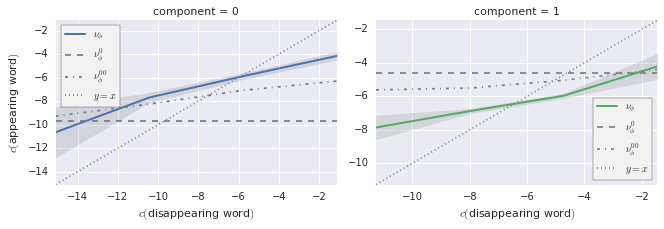

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1462 (cluster-unique) substitutions, but the PCA is in fact computed on 1137 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


   ** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


   ** global -> sentence-relative


    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
   ** global -> global
    * global -> sentence-relative


  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
   ** global -> sentence-relative


   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 916 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.12576524594451877

intercept                      5.336622
global_aoa                     0.077836
global_clustering              0.111482
global_frequency               0.452088
global_letters_count          -0.059705
global_orthographic_density   -0.069771
global_synonyms_count         -0.023569
dtype: float64

Regressing global frequency with 916 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.14795837944006807

intercept                                              13.235179
global_aoa                                             -0.258813
global_clustering                                       1.894700
global_frequency                                        0.344360
global_letters_count                                   -0.568262
global_orthographic_density                             0.722636
globa

intercept                  -1.214164
rel_aoa                     0.066505
rel_clustering              0.160144
rel_frequency               0.636118
rel_letters_count          -0.093645
rel_orthographic_density   -0.225000
rel_synonyms_count          0.037975
dtype: float64

Regressing rel frequency with 916 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.30117437504759625

intercept                                       -1.322056
rel_aoa                                          0.077498
rel_clustering                                   0.154940
rel_frequency                                    0.660798
rel_letters_count                               -0.000200
rel_orthographic_density                        -0.514867
rel_synonyms_count                               0.263599
rel_aoa * rel_clustering                        -0.053928
rel_aoa * rel_frequency                         -0.015226
rel_aoa * rel_letters_count                      0.004937
rel_aoa * rel_orthographic_dens

Regressing global aoa with 835 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.15903318281317536

intercept                      4.127336
global_aoa                     0.407612
global_clustering             -0.092151
global_frequency              -0.042421
global_letters_count           0.030305
global_orthographic_density   -0.059005
global_synonyms_count          0.060732
dtype: float64

Regressing global aoa with 835 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.1861539469460648

intercept                                              5.472163
global_aoa                                             0.859646
global_clustering                                      0.018140
global_frequency                                       0.092001
global_letters_count                                  -0.214492
global_orthographic_density                           -3.255002
global_synonyms_count                                 -2.098122
global_aoa * global_clustering             

Regressing rel aoa with 835 measures, with interactions
           ^^^^^^^
R^2 = 0.2712306471092165

intercept                                        0.561445
rel_aoa                                          0.392006
rel_clustering                                  -0.205029
rel_frequency                                   -0.011524
rel_letters_count                                0.073218
rel_orthographic_density                         0.435114
rel_synonyms_count                               0.133380
rel_aoa * rel_clustering                         0.029922
rel_aoa * rel_frequency                         -0.072623
rel_aoa * rel_letters_count                     -0.047440
rel_aoa * rel_orthographic_density              -0.031596
rel_aoa * rel_synonyms_count                     0.005317
rel_clustering * rel_frequency                   0.046565
rel_clustering * rel_letters_count               0.032736
rel_clustering * rel_orthographic_density       -0.219235
rel_clustering * rel_synonyms

Regressing global clustering with 756 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.17174510605199256

intercept                                             -4.776451
global_aoa                                             0.273745
global_clustering                                     -0.095461
global_frequency                                      -0.336956
global_letters_count                                   0.226757
global_orthographic_density                            0.212506
global_synonyms_count                                 -0.800829
global_aoa * global_clustering                         0.052576
global_aoa * global_frequency                         -0.005055
global_aoa * global_letters_count                      0.005069
global_aoa * global_orthographic_density               0.013188
global_aoa * global_synonyms_count                     0.018428
global_clustering * global_frequency                  -0.038726
global_clustering * global_letters_count      

Regressing global clustering with 756 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.14035734940902078

intercept                     -1.150288
global_aoa                    -0.036184
global_clustering              0.408787
global_frequency              -0.115757
global_letters_count          -0.083517
global_orthographic_density   -0.175657
global_synonyms_count         -0.121098
rel_aoa                        0.014019
rel_clustering                -0.070117
rel_frequency                  0.078877
rel_letters_count              0.080155
rel_orthographic_density       0.144413
rel_synonyms_count             0.088391
dtype: float64

Regressing global clustering with 756 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2615572231990728

intercept                                                 12.639389
global_aoa                                                 0.027492
global_clustering                                          3.235353
global_frequency   

Regressing rel letters_count with 916 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.0673340433536288

intercept                     -0.288824
global_aoa                    -0.044285
global_clustering             -0.191994
global_frequency               0.013653
global_letters_count           0.296935
global_orthographic_density   -0.035957
global_synonyms_count         -0.251433
dtype: float64

Regressing rel letters_count with 916 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.09032936645711653

intercept                                             -5.709652
global_aoa                                             0.465934
global_clustering                                     -2.166707
global_frequency                                       0.258288
global_letters_count                                  -0.307890
global_orthographic_density                           -2.093874
global_synonyms_count                                 -0.206443
global_aoa * gl

Regressing global letters_count with 916 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.21128243578774164

intercept                                                 10.809658
global_aoa                                                 1.689153
global_clustering                                          1.269882
global_frequency                                          -0.220974
global_letters_count                                      -2.260321
global_orthographic_density                               -3.958919
global_synonyms_count                                      4.912576
rel_aoa                                                   -3.254560
rel_clustering                                            -6.020520
rel_frequency                                              1.830121
rel_letters_count                                          1.926089
rel_orthographic_density                                  -1.739529
rel_synonyms_count                                      

Regressing rel synonyms_count with 889 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.08752307672995452

intercept                                              1.917442
global_aoa                                             0.000935
global_clustering                                      0.498738
global_frequency                                      -0.044105
global_letters_count                                   0.030331
global_orthographic_density                           -0.093323
global_synonyms_count                                  0.342386
global_aoa * global_clustering                        -0.015574
global_aoa * global_frequency                         -0.005705
global_aoa * global_letters_count                     -0.006766
global_aoa * global_orthographic_density              -0.017220
global_aoa * global_synonyms_count                     0.025160
global_clustering * global_frequency                  -0.025980
global_clustering * global_letters_count    

intercept                                                 6.277285
global_aoa                                               -0.082010
global_clustering                                         1.653434
global_frequency                                         -0.234125
global_letters_count                                      0.120092
global_orthographic_density                               0.403236
global_synonyms_count                                     2.657418
rel_aoa                                                  -0.197459
rel_clustering                                           -1.131238
rel_frequency                                             0.046798
rel_letters_count                                        -0.181572
rel_orthographic_density                                 -0.535255
rel_synonyms_count                                       -3.356617
global_aoa * global_clustering                           -0.038067
global_aoa * global_frequency                            -0.00

Regressing global orthographic_density with 791 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1270025900227072

intercept                   1.499778
rel_aoa                     0.003814
rel_clustering             -0.012240
rel_frequency              -0.036377
rel_letters_count           0.001519
rel_orthographic_density    0.387401
rel_synonyms_count          0.074083
dtype: float64

Regressing global orthographic_density with 791 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.1497927624285017

intercept                                        1.464158
rel_aoa                                          0.076406
rel_clustering                                   0.121422
rel_frequency                                   -0.064022
rel_letters_count                               -0.021754
rel_orthographic_density                         0.325563
rel_synonyms_count                               0.320381
rel_aoa * rel_clustering               

intercept                      1.945900
global_aoa                    -0.022475
global_clustering              0.191132
global_frequency              -0.009526
global_letters_count          -0.035257
global_orthographic_density   -0.451137
global_synonyms_count         -0.018577
rel_aoa                        0.021174
rel_clustering                -0.148172
rel_frequency                  0.003756
rel_letters_count              0.034523
rel_orthographic_density       0.875194
rel_synonyms_count             0.079765
dtype: float64

Regressing rel orthographic_density with 791 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.30541027066376647

intercept                                                 3.395187
global_aoa                                               -0.880207
global_clustering                                         0.630962
global_frequency                                          0.159685
global_letters_count                                      0.